<a href="https://colab.research.google.com/github/dsk-yshkw/CryptoMarketFactor/blob/main/crypt_research_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ToDo
- アンサンブルでstackingをするとうまくいかないので解決できないか検討(kaggle本にstackingについて一章割かれている）
記述
- バージョン固定で動作安定を検討
## データソースについて
- データソースはBiBitがよい？いずれにせよデータ範囲は拡大が必要
## データの前処理
- 最適な足の長さの検討
    - 当面は5分足をつかう
    - 文献精査は終了
    - おそらくサブサンプリング法がよいが機械学習ファイナンス独特の振る舞いがあるかもしれない
    - これだけで論文一本かけるかもしれない
- ハイパーパラメータの検討
    - optuna()で実装済み
- 特徴量の検討
    - 14分・10分のウィンドウ選定の根拠明示と感度分析追加
    - オートエンコーダをつかった最適化を実装
## ターゲット、定常性について
- 予測の信頼区間を計算(確率分布の予測）
- 価格モデルなので定常性について検討。今回、log-returnを使わなかった理由＋将来的な比較検討の- 利回りモデルの再検討。差分で分類問題にすることも検討
## 学習モデルについて
- Treeモデルのmean decrease in impurityや他の手法も使うべき
- **モデル比較と評価:** MAなどの単純ベースラインとの比較、MSE/MAPE導入      
## 特徴量分析について
- ICEも特徴量評価で実施
    - PFI には multicollinearity に弱いという既知の欠点があります。これを明記した上で、今後の改善方針（SHAPや特徴選択）を示す。
    - **PFIの限界と補完:** SHAP、MDI、クラスタリング、ALEの導入方針を反映.
- 株式、ETF,通貨など他市場との相互依存も検証
## 論文の記述の問題
- **導入と構成:** 問い・仮説・貢献の提示を明確に（特にSection 2）      
- **図・可視化:** 精度・読みやすさ・解釈性を意識した修正予定あり           
- **経済的直感:** BTCが代理変数となり得る理論的背景の補強（市場構造、流動性など） .CAPMやFFモデルのような「理論的支柱」がない
## トレーディングとの関連
- モデルの戦型近似でAPTに近づける。たとえば、$P(t) = f(P(t-1),F_1,F_2,\ldots)$を
\begin{align*}
    P(t) \approx {\partial f \over \partial P(t-1)} P(t-1)
    + {\partial f \over \partial F_1} F_1 + \cdots
\end{align*}
などとするのもよい。定常性の問題があるのなら、$R(t) = f(F_1,F_2,\ldots)$のようにモデル化して、線形近似してもよい。さらにTetherを安全資産につかってリスク・プレミアムのモデル化を試みるのもよさそうだ。Tetherを安全資産に、というのは暗号資産のオプションプライシングに関する論文を参照のこと。




## Note
- 利回りはモデル化しない。そのかわり、$P_{t+1}$を$P_t$で説明するモデルをつくる。そもそも利回りのモデルも予測可能性がほしいのだから大きな問題はないはず。
    - ただし、定常世については指摘されたので考えるべきか
- PCAなど共通ファクターを求めることも検討の価値はあるが、結局BTCに引きずられる部分が大きそうだからあまり意味はないだろう。








# 手順
- データ収集
    - 投資対象資産
        - BTC, ETH, SOL
        - Chainlink (LINK), Polygon (MATIC), Avalanche (AVAX)
        - fiat currency (法定通貨）
        - 株式、ETF等
    - テクニカル指標
        - 移動平均 (MA): 短期・長期トレンドを把握するために有効。
        - 相対力指数 (RSI): 過買い・過売りの判断に使用。
        - ボリンジャーバンド: 価格のボラティリティを捉える。
        - MACD: トレンドの転換点を示唆。
        - VWAP(出来高加重平均価格): 価格に加えて出来高データも必要
        - 他にもmomentum, volume trendsなどあるようだが？
        - 取引量
    - マクロ経済指標    
        - 金利
        - 物価指数
        - 政策（規制動向）
        - GDP Growth
        - 基本的には金利か物価、それにファンダメンタルズくらいが説明変数になる。また、金利を使う場合は先渡し価格との裁定で使うことが多いようだ。
    - ニュースや市場感情
    - オンチェーンデータ: ネットワークのアクティビティを反映するデータ
        - トランザクション数
        - アドレス数
        - ガス代

- モデル構築
    - 予測モデルもしくは現時点の価格を説明するモデルの構築
        - 前者はもちろん、後者も役にたつ
        - 実際、ある時点のモデル価格と実精緻に乖離があれば、割安割高等の取引機会を示唆
    - 機械学習をつかったモデル構築
        - Random Forest, Deep-learning等のアンサンブルモデル
        - Transformer
    - 分布予測して確率過程モデルの特定
- 取引戦略構築
    - 取引期間を決める（たとえば1年間など）
        - バイアンドホールドとして最適ポートフォリオに焦点を当てる
        - 定期的な組み替えを前提にした最適ポートフォリオを考える
        - 所与のポートフォリオのもとでの最適停止問題を考える
        - 最適停止問題と最適ポートフォリオ問題を同時に解く
    - 長期的な資産配分問題を考える
        - VaRやES、ケリー基準も考慮したリスクマネジメントの問題として
        - 取引コストの問題にも取り組む


# データ収集
## 価格データ
- Mikioさんから暗号資産の過去データは入手できる
- OpenBBも使えるがタイムインターバルは日次が基本になる。
- CoinMarketCap, CoinGeckoといったプラットフォーム
- Binance or Coinbaseといった取引業者

## マクロ経済指標

- 規制の動向は数値化が難しいデータとなる
    - 法的な変更や政策発表は、通常テキスト形式で提供され、定量的な指標としては扱いにくい
    - しかし、以下の方法で数値化する試みは可能
        - ニュース記事の感情分析: ニュースやレポートに基づく規制に対する市場の反応をスコア化する。
        - レポート数: 規制に関する発表や議論の数をトラッキングする。
        - 政策スコア: 政府の発表や法律変更を専門家がスコア化するアプローチ。

- Macroeconomic Indicators: Sources like the Federal Reserve Economic Data (FRED), World Bank, or OECD.

## オンチェーンデータ
- Glassnode
- IntoTheBlock

## ニュースと市場感情
- Sentiment Analysis APIs
    - Lexalytics
    - Google Natural Language
    - Natural Language APIs
- Scraping: scrape news from trusted financial sites like Bloomberg, CoinDesk or CryptoPanic for regulatory updates.
- Social Media Trackers
    - LunarCrush

# パッケージインストール・パス設定

In [ ]:
# Transformerのパッケージをインストールする
# 今回は時系列モデルなのでdartsを採用しますが、ほかにもHugging FaceやPytorch Lightningなども選択肢の一つのようです。
!pip install darts

In [ ]:
!pip install dask

In [ ]:
!pip install interpret

In [ ]:
!pip install optuna


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
!ls drive/MyDrive/ColabNotebooks/price_feed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
backup				 history_price_SOL.snappy.parquet
histominute_BNB.snappy.parquet	 history_price_SUI.snappy.parquet
histominute_BTC.snappy.parquet	 history_price_USDC.snappy.parquet
histominute_ETH.snappy.parquet	 history_price_WBNB.snappy.parquet
histominute_SOL.snappy.parquet	 history_price_WBTC.snappy.parquet
histominute_SUI.snappy.parquet	 history_price_WETH.snappy.parquet
histominute_USDC.snappy.parquet  price_feed_check.ipynb


# データの取得

In [ ]:
#dir = "drive/MyDrive/ColabNotebooks/CryptTrade/Libraries"

# 計算ライブラリが保存されているフォルダ
lib_dir = 'drive/MyDrive/ColabNotebooks/price_prediction/libs'
#sub_dir = "drive/MyDrive/ColabNotebooks/CryptTrade/Libraries/price_prediction"

# 生データが格納されているフォルダ
data_dir = 'drive/MyDrive/ColabNotebooks/price_feed'

# 加工したデータや検証結果などを保存するフォルダ
file_path = "drive/MyDrive/ColabNotebooks/CryptMarket/"

import sys
sys.path.append(lib_dir)
#sys.path.append(sub_dir)

import data_collector


In [ ]:
# ボリュームのあるデータを用いるか否か
is_volume = True
#is_volume = False


if is_volume: # Volumeを必要とする場合
#    symbols = ["SOL", "SUI", "BTC", "USDC", "BNB", "ETH"] # BNB, BTC, ETHはwrappedではないことに注意
    symbols = ["SOL", "BTC", "ETH","SUI","BNB"] # BNB, BTC, ETHはwrappedではないことに注意
else: # Volumeを必要としない場合
    symbols = ["WBTC", "SOL", "SUI", "USDC", "WBNB", "WETH"]


dc = data_collector.DataCollector(data_dir)
df = dc.collect_price_data(symbols = symbols, is_volume = is_volume)


SOL
*** histominute_SOL.snappy.parquet ***
BTC
*** histominute_BTC.snappy.parquet ***
ETH
*** histominute_ETH.snappy.parquet ***
SUI
*** histominute_SUI.snappy.parquet ***
BNB
*** histominute_BNB.snappy.parquet ***
                          open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:49:00    240.490    240.850    240.480    240.480   806190.88   
2024-11-30 21:49:00  96866.750  96866.750  96861.720  96862.640   197722.39   
2024-11-30 21:49:00   3708.460   3713.970   3708.460   3713.970  1890347.32   
2024-11-30 21:49:00      3.512      3.516      3.512      3.516    17932.23   
2024-11-30 21:49:00    656.770    657.740    657.000    657.000     5135.12   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340    BTC  2024     11   

In [ ]:
# 取得日のデータをcsv出力する
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")




In [ ]:
file_name = "Data/price_data_" + today + ".csv"
df.to_csv(file_path + file_name)


In [ ]:
today

'2025-08-26'

In [ ]:
# 過去の結果を再現したい場合
# 出力したデータを取得する
#file_name = "Data/price_data_" + today + ".csv"
date = '2025-01-15'
date = '2025-07-13'
date = '2025-08-15'
#date = today
file_name = "Data/price_data_" + date + ".csv"
df = dc.collect_price_data_from_csv(file_path,file_name)

In [ ]:
df[df['symbol'] == 'BTC']

open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:49:00   96866.75   96866.75   96861.72   96862.64   197722.39   
2024-11-30 21:50:00   96862.64   96899.00   96861.51   96898.31   914553.38   
2024-11-30 21:51:00   96898.31   96944.33   96883.88   96921.96  1977440.16   
2024-11-30 21:52:00   96921.96   96935.99   96906.61   96935.98   685769.76   
2024-11-30 21:53:00   96935.98   96936.57   96912.26   96916.85   812914.20   
...                        ...        ...        ...        ...         ...   
2025-08-15 12:05:00  119110.93  119124.00  119110.93  119111.87   434550.60   
2025-08-15 12:06:00  119111.87  119122.34  119100.13  119104.70   679321.12   
2025-08-15 12:07:00  119104.70  119130.37  119104.70  119127.91   503460.76   
2025-08-15 12:08:00  119127.91  119156.98  119127.23  119156.98   632181.11   
2025-08-15 12:09:00  119156.98  119156.98  119156.01  119156.01        0.00   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    BTC  2024     11   30  
2024-11-30 21:50:00  1733003400    BTC  2024     11   30  
2024-11-30 21:51:00  1733003460    BTC  2024     11   30  
2024-11-30 21:52:00  1733003520    BTC  2024     11   30  
2024-11-30 21:53:00  1733003580    BTC  2024     11   30  
...                         ...    ...   ...    ...  ...  
2025-08-15 12:05:00  1755259500    BTC  2025      8   15  
2025-08-15 12:06:00  1755259560    BTC  2025      8   15  
2025-08-15 12:07:00  1755259620    BTC  2025      8   15  
2025-08-15 12:08:00  1755259680    BTC  2025      8   15  
2025-08-15 12:09:00  1755259740    BTC  2025      8   15  

[370941 rows x 10 columns]

## データの足の長さを調整する

- 金融時系列データはほかの時系列データと同様、クロスセクションとは異なる注意がされてきた。
    - まずiidの仮定はsしばしば非現実となる
    - 代替的な条件として定常性の担保が求められることが多い（そうでなければ、分布が時間依存してしまうので安定的な推定ができない）。ただし、ディープラーニング時系列では不要、という議論もある）。
    - さらに、エルゴード性も求められる（そうでなければ、サンプル平均のサンプル数を増やしても、真の平均に近づかない）。
- これらは金融時系列に限らず、一般の時系列解析においても求められる要件だが、金融時系列の場合は金融市場独特の特徴があるので、特に取り扱いが難しい。
    - たとえば極値におけるファットテールの問題
    - 自己相関がポジティブとネガティブが交互に現れる(Heston, Korajczyk andSadka, 2010)
    - 資産間の相関
    - 様々なアノマリーなど。。。
- 2000年以前のデータの扱いについてはCont (2001)に要約されている
- 2000年以降は、realized volatilityを計算する際のサンプリング間隔に議論が集中しているようだ。
    - 特に議論されたのはあまりに高頻度のサンプリングをするとマーケット・マイクロストラクチャーノイズがデータに入り込むので、サンプルデータをすやすことでかえって推定制度が下がるのでは、という議論がされたことだ。
    - いくつかの文献を見る限り、Andersen , Bollerslev, Diebold and Labys (2001)あたりからこういったことが意識されたような気がする。読んでないが、どうやら明示的にマーケットマイクロストラクチャーノイズを含めたモデルをつくってrealized volatiilityの計算をしたようだ。かれらはその後もいくつかの論文でrealized volatilityの推定方法を議論している（たとえば、Andersen, Bollerslev, Diebold and Labys (2003))。
    - かれらがマーケット・マイクロストラクチャー・ノイズを除去するためにとった方法は単純で、サンプリング間隔を5分程度に広げることだ。
    - この5分というのは慣習的に合意されたもので、Cont (2000)も5分足のデータをつかっている（もっとも、この論文でContは20分間隔ですでにマーケット・マイクロストラクチャーノイズは現れる、としている）。
- サンプリング間隔を5分にすることがアドホックなやり方にすぎないとして批判したのがAit-Sahalia, Mykland and Zhang (2005)だ。
    - かれらはマーケット・マイクロストラクチャーノイズが存在する場合の最適なサンプリング間隔を最尤法を用いて決めている。
    - しかし、ノイズを除去するためにサンプリング間隔を広げたら、その分使われないデータで出てくる。これはもったいない。
    - そこで彼らはさらにノイズがあることを前提に、すべてのデータを使いつつ、ノイズを除去するようなrealized volatility の計算方法も提案している。
    - ただし、彼らが同論文で提案した方法は簡便ではない上、realized volatilityの計算に特化しすぎている。
    - 同じ著者等が同時期に公表したZhang, Mykland and Ait-Sahalia (2005)はサブサンプリング法というより簡便な方法を提案している。
- 他方でサンプルを無駄なく使う、というのは意外と手続き的には煩雑だ。計算の簡単さからいえば、Bandi and Russell (2006, 2008) の提案する、最適なサンプリング間隔を決めてしまうほうが扱いやすいだろう。
- 2015年までの研究についてはLiu, Patton and Sheppard (2015)が包括的にまとめて比較検討している。彼らの研究成果のうち、特に重要な点を取り上げると、以下のようになる。
    - transaction priceか中値か？
        - データはビッド・アスク価格のうち取引に用いられた価格を用いるべきか、取引内容にかかわらず中値を用いるべきか、という議論がある。
        - 1分足未満のデータを使うならば取引価格を、1分足以上のデータを使うならば中値がよい
    - カレンダータイムかティックタイムか？
        - 売買が成立したタイミングでサンプリングしていくのか、定期的なタイミングでサンプリングしたほうがいいのか、という議論も重要だ
        - 1分足未満ならばティックタイムで、1分足以上ならばカレンダータイムでサンプリングした方がよい
    - サブサンプル推定かそうでないか？
        - サブサンプル法がまだ飲み込めてないのでちょっとあやふやだが。。。
        - 1分足以上ならばおおむねサブサンプルがいいようだ
    - 比較の仕方にもよるが、5分足で単純にrealized volatilityを計算した場合とより精緻な方法でrealized volatilityを計算した場合とで優位な差はみられない
    - しかし、すこし比較の方法を変えて5分足単純RVをベンチマークにおかないならば、1分足のサブサンプル法（Zhang, Mykland and Ait-Sahali, 2005が提案した方法）がいいようだ。
- また、上の議論は精緻にRVを計算する場合の話だが、端に金融時系列の日中パターンを捉えたいだけならば30分足で十分だという議論もある。実際、Heston, Korajczyk and Sadka (2005)は金融時系列の日中パターンを調べ、自己相関が1日遡るくらいならネタティブだが、それ以降はポジティブとネガティブが繰り返し泡割れると指摘している。この傾向は30分足のデータをつかって示しているが、これを5分足に縮めたところで変わらないこをを確かめている。
- 以上の議論は2015年あたりまでの研究をまとめたものだが、以下の点に注意する必要がある
    - 2015年以降の研究結果は見ていない
    - 最適なサンプリング間隔や最適なサンプリング方法についての議論といっても基本的にRVの計算に特化しているので、我々がやりたいような価格（あるいはリターン、あるいは上昇確率）の分布推定にそのまま使えるとは限らない
    - 機械学習独特の傾向はないかわからない
    - 今回は以下のいずれかの方法を使いたい
        - アドホックに5分足でやる
        - 比較的簡単なBandi and Russell (2006, 2008)による最適なサンプリング間隔をつかう
        - Zhang, Mykland and Ait-Sahali(2005)によるサブサンプリング法をつかう（これはLiu, Patton and Sheppard (2015)も推奨している）
    - しかし、できれば我々のセッティングにおける最適なサンプリング法もしくはサンプリング間隔についても考えてみたい（ひょっとしたら『機械学習ファイナンス』あたりですでに議論されていないか？）

In [ ]:
import pandas as pd
#BTC_data = df[df['symbol'] == 'BTC']
#BTC_data.index = pd.to_datetime(BTC_data.index)

# BTCデータを日足に変換
'''
BTC_daily = BTC_data.resample('1D').agg({ # '5T','10T','1H','2H','1D','1W'
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'unixTime': 'last',  # 最後のunixTimeを代表値として残す（任意）
    'symbol': 'first',   # 同じ銘柄であれば任意で 'first' でもよい
    'year': 'first',
    'month': 'first',
    'day': 'first'
})

BTC_daily
'''

dfs_5min = {}

# すべてのデータを5分足に変換する
for symbol in symbols:
    print(symbol)

    tmp_data = df[df['symbol'] == symbol]
    tmp_data.index = pd.to_datetime(tmp_data.index)

    dfs_5min[symbol] = tmp_data.resample('5min').agg({ # '5T','10T','1H','2H','1D','1W'
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'unixTime': 'last',  # 最後のunixTimeを代表値として残す（任意）
    'symbol': 'first',   # 同じ銘柄であれば任意で 'first' でもよい
    'year': 'first',
    'month': 'first',
    'day': 'first'
})



SOL
BTC
ETH
SUI
BNB


In [ ]:
dfs_5min['BTC']

open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:45:00   96866.75   96866.75   96861.72   96862.64   197722.39   
2024-11-30 21:50:00   96862.64   96944.33   96861.51   96907.02  5042530.78   
2024-11-30 21:55:00   96907.02   96922.30   96840.09   96840.18  2719446.60   
2024-11-30 22:00:00   96840.18   96877.33   96773.49   96873.40  4459168.11   
2024-11-30 22:05:00   96873.40   96877.92   96828.52   96832.63  2819766.81   
...                        ...        ...        ...        ...         ...   
2025-08-15 11:45:00  119155.41  119187.98  119114.57  119148.34  1553783.50   
2025-08-15 11:50:00  119148.34  119160.06  119115.83  119119.67  1595696.62   
2025-08-15 11:55:00  119119.67  119121.25  119086.60  119087.93  1676947.21   
2025-08-15 12:00:00  119087.93  119113.49  119034.61  119110.93  3940230.58   
2025-08-15 12:05:00  119110.93  119156.98  119100.13  119156.01  2249513.59   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:45:00  1733003340    BTC  2024     11   30  
2024-11-30 21:50:00  1733003640    BTC  2024     11   30  
2024-11-30 21:55:00  1733003940    BTC  2024     11   30  
2024-11-30 22:00:00  1733004240    BTC  2024     11   30  
2024-11-30 22:05:00  1733004540    BTC  2024     11   30  
...                         ...    ...   ...    ...  ...  
2025-08-15 11:45:00  1755258540    BTC  2025      8   15  
2025-08-15 11:50:00  1755258840    BTC  2025      8   15  
2025-08-15 11:55:00  1755259140    BTC  2025      8   15  
2025-08-15 12:00:00  1755259440    BTC  2025      8   15  
2025-08-15 12:05:00  1755259740    BTC  2025      8   15  

[74189 rows x 10 columns]

# MA, Momentumなどのウィンドウ幅を設定

In [ ]:
import pandas as pd
import crypto_technical_indicators

#windows = [3,6,12,24,48]
#opt_windows = {}
#for symbol in symbols:
#    print(symbol)
#    indicators = crypto_technical_indicators.CryptoTechnicalIndicators(dfs_5min[symbol])
#    opt_windows[symbol] = indicators.opt_window(windows, tech_indicators = ['MA','Momentum'])


opt_windows = {'SOL': {'MA': 24, 'Momentum': 24},
               'BTC': {'MA': 24, 'Momentum': 6},
               'ETH': {'MA': 3, 'Momentum': 24},
               'SUI': {'MA': 24, 'Momentum': 24},
               'BNB': {'MA': 6, 'Momentum': 6}}

opt_windows

{'SOL': {'MA': 24, 'Momentum': 24},
 'BTC': {'MA': 24, 'Momentum': 6},
 'ETH': {'MA': 3, 'Momentum': 24},
 'SUI': {'MA': 24, 'Momentum': 24},
 'BNB': {'MA': 6, 'Momentum': 6}}

## データの特徴量を生成する

In [ ]:
import pandas as pd
import crypto_technical_indicators

# ターゲットの設定
target = 'diff' # 'ret', 'diff', 'close', 'open'

# 各通貨のテクニカル指標をまとめたデータフレームを作成する
dfs = {}
# volumeデータ(特にBTC)はゼロになることがあるので処理する
if is_volume:
    df['volume'] = df['volume'].replace(0, 1e-10)

# 予測時間の設定
forecast_horizon = 12*24 # 5分足の場合×12で1時間

for symbol in symbols:
    indicators = crypto_technical_indicators.CryptoTechnicalIndicators(dfs_5min[symbol], is_volume = is_volume)
#    dfs[symbol] = indicators.all_indicators()
    tech_indexes = {'MA','Amihud Measure','Momentum'}
    dfs[symbol] = indicators.selected_indicators(tech_indexes=tech_indexes,
                                                 target = target,
                                                 forecast_horizon = forecast_horizon,
                                                 windows = opt_windows[symbol])



    # BTC以外のコインにはBTC価格、ラグつきBTC価格、BTC利回りを特徴量に加える
    # 'BTC' または 'WBTC' を特定
    btc_symbol = 'BTC' if 'BTC' in symbols else 'WBTC' if 'WBTC' in symbols else None
    # 特徴量追加処理
    # 変化率やラグは予測時間time_diffに合わせて設定する
    if symbol != btc_symbol and btc_symbol is not None:
        dfs[symbol] = indicators.add_coin_features(dfs[symbol],dfs_5min[btc_symbol], 'btc', time_diff = forecast_horizon)



    # 同様にUSDC以外のコインにはUSDC価格、ラグつきUSDC価格、USDC利回りを特徴量に加える
    # と思ったけど、USDCはほぼつねに１付近になるので、意味がない。
    # そこで、やめた
#    if symbol != 'USDC':
#        dfs[symbol] = indicators.add_coin_features(dfs[symbol],df[df['symbol'] == 'USDC'],'usdc')



    # インデックスはdatetimeに変換しておく必要がある
    dfs[symbol].index = pd.to_datetime(dfs[symbol].index)

    # ラグ付き価格データの作成：ターゲットになる
    if target == 'diff':
        dfs[symbol]['target_lag'] = dfs[symbol]['diff'].shift(-forecast_horizon)
    elif target == 'ret':
        dfs[symbol]['target_lag'] = dfs[symbol]['ret'].shift(-forecast_horizon)
    elif target == 'close' or 'open':
        dfs[symbol]['target_lag'] = dfs[symbol]['value'].shift(-forecast_horizon)
#    dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(0).pct_change()
    dfs[symbol] = dfs[symbol].dropna()


# Data analysis
今回の検証の目標は暗号資産価格の形成にビットコインがどのように寄与しているかを分析することだ。
対象資産は主要コインであるETH, SOLに加えて、SUI, BNBを選んだ。
これらのコインの一分足のデータを作成して以下の分析に用いた。
データはCryptCompare(\url{https://www.cryptocompare.com/})から取得した。
取得期間は2024年11月30日21時49分から2025年1月24日0時1分までで、データ総数は77893だ。
なお、取得にあたってはMikio Oba氏にコードを組んでもらった。ここに謝辞を示したい。







In [ ]:
for symbol in symbols:
    print(symbol, df.head(), df.tail())

SOL                           open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:49:00    240.490    240.850    240.480    240.480   806190.88   
2024-11-30 21:49:00  96866.750  96866.750  96861.720  96862.640   197722.39   
2024-11-30 21:49:00   3708.460   3713.970   3708.460   3713.970  1890347.32   
2024-11-30 21:49:00      3.512      3.516      3.512      3.516    17932.23   
2024-11-30 21:49:00    656.770    657.740    657.000    657.000     5135.12   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340    BTC  2024     11   30  
2024-11-30 21:49:00  1733003340    ETH  2024     11   30  
2024-11-30 21:49:00  1733003340    SUI  2024     11   30  
2024-11-30 21:49:00  1733003340    BNB  2024     11   30                              op

ここでは基本的なデータの特性を述べておこう。

まず、各コインの基本統計量だ。


In [ ]:
for symbol in symbols:
    print(symbol, df[df['symbol'] == symbol].describe())

SOL                 open           high            low          close  \
count  370941.000000  370941.000000  370941.000000  370941.000000   
mean      171.324415     171.436129     171.210684     171.324283   
std        34.927193      34.962784      34.889421      34.927049   
min        95.670000      96.200000      95.240000      95.670000   
25%       145.330000     145.400000     145.250000     145.330000   
50%       167.470000     167.560000     167.370000     167.470000   
75%       193.390000     193.500000     193.270000     193.390000   
max       294.830000     294.950000     293.660000     294.830000   

             volume      unixTime           year          month            day  
count  3.709410e+05  3.709410e+05  370941.000000  370941.000000  370941.000000  
mean   2.424488e+05  1.744132e+09    2024.879304       5.206006      15.261511  
std    4.529126e+05  6.424895e+06       0.325774       3.236255       8.793054  
min    1.000000e-10  1.733003e+09    2024.000000  

しかし、ターゲットには終値データを使うものの、特徴量は加工したデータも用いる。
先日したように、移動平均、モーメンタム、そしてAmihud尺度だ。
移動平均とモーメンタムを計算する際のウィンドウの長さはそれぞれ14分と10分とした。
またAmihud尺度は1分ごとに更新しなおしている。

なお、ターゲットである$P_m(t+1)$の$t+1$は1時間先とした。
これに併せて、特徴量に加えるビットコイン価格のタイムラグは1時間先のものと2時間先のものを加えた。またビットコイン価格の変化は1時間の変化率を加えた。

さて、これらの特徴量の基本統計量だが、以下のとおりだ。
Random ForestやLight GBMのようなツリー系のモデルではこれらの特徴量をそのまま入力するが、線型回帰やtransformerの場合は標準化スケーリングを施すことに注意されたい。


In [ ]:
# 'value'の系列相関をチェック
for symbol in symbols:
    print(symbol)
    print(dfs[symbol].corr())

SOL
                   value      diff        MA  Momentum  Amihud Measure  \
value           1.000000  0.057448  0.999239  0.000656        0.001225   
diff            0.057448  1.000000  0.051886 -0.012140        0.013709   
MA              0.999239  0.051886  1.000000 -0.022643       -0.005224   
Momentum        0.000656 -0.012140 -0.022643  1.000000        0.061976   
Amihud Measure  0.001225  0.013709 -0.005224  0.061976        1.000000   
btc             0.417586  0.102316  0.416614 -0.001429        0.009465   
btc_lag1        0.404386 -0.018530  0.404619  0.002185        0.006431   
btc_lag2        0.394165 -0.009312  0.394582 -0.001006        0.005025   
btc_return      0.079333  0.579506  0.073717 -0.018628        0.014025   
target_lag     -0.114184 -0.008453 -0.113331 -0.007383       -0.000689   

                     btc  btc_lag1  btc_lag2  btc_return  target_lag  
value           0.417586  0.404386  0.394165    0.079333   -0.114184  
diff            0.102316 -0.018530 -0.0

相関の高い特徴量からは多重共線性の懸念はある。
しかし、機械学習系のモデルでは正則化の処理が行われるので通常大きな問題とはならないことが多い。
また、線型回帰も今回はRidge回帰を採用した。

ここで相関係数を挙げておいたのは、特徴量の重要性分析を行った後、あらためて考察を加えるためである。


## その他のデータ分析
- ヒストグラムの作成
- データの足の長さを変えた検証
- 系列相関の検証は上記でいいのか検証？

# Model learning
それでは学習しよう。データは8割を訓練データ、残りの2割をテストデータとした。各モデルのハイパーパラメータは12月末までのデータの8割を訓練、残りを検証データとして決めたのちは調整をしないことでデータのスヌーピングに対応した。

最初に線型回帰を当てはめてみたが、これはベンチマーク程度の意味しかない。
BNBでR値0.797のハイスコアを叩き出した他はR値が0を下回っている。
つまり、単純な平均値でモデルを構築したほうがよほど当てはまりがよいということだ。
そこで、Random forest, Light GBM, そしてtransformerを試みてみた。
結果、SOLとETHはtransformer, BTCはRandom forest, そしてSUIとBNBはLight GBMがもっとも当てはまりがよかった。

詳細な結果は表にまとめたので参照してほしい。


# モデルの概要

特徴量が入力される
「まず、ランダムフォレストでは入力データ、ここでは特徴量A, B, Cが、それぞれの決定木に同時に入ります。」

複数の決定木が独立して予測する
「各決定木は少しずつ異なる構造になっていて、個別に予測を出します。ここに描かれているT1, T2, T3がそれぞれ独立した木です。」

葉ノードで予測が得られる
「それぞれの木は最終的に葉に到達し、クラスや数値の予測を返します。」

アンサンブルでまとめる
「最後に、それらの予測をまとめて平均をとったり、多数決をとったりするのが“ランダムフォレスト”です。」

強調ポイント（まとめ）
「一つの木だけだと偏りやすいですが、たくさんの木の意見を合わせることで、より安定して精度の高い予測ができる、というのがランダムフォレストの考え方です。」

口頭での表現イメージ（60〜90秒）

「ランダムフォレストは、たくさんの決定木を組み合わせて使うアルゴリズムです。入力の特徴量がそれぞれの木に渡され、木ごとに予測をします。そして最後に、それらを平均したり多数決をとることで最終的な予測を出します。1本の木よりも偏りにくく、安定して高い精度が得られるのが大きな特徴です。」

「回帰の場合は、各木がクラスラベルではなく数値を返します。」

「最後に、その数値を平均することで予測値を出すのがランダムフォレスト回帰です。」

「分類なら多数決、回帰なら平均、と覚えてください。」

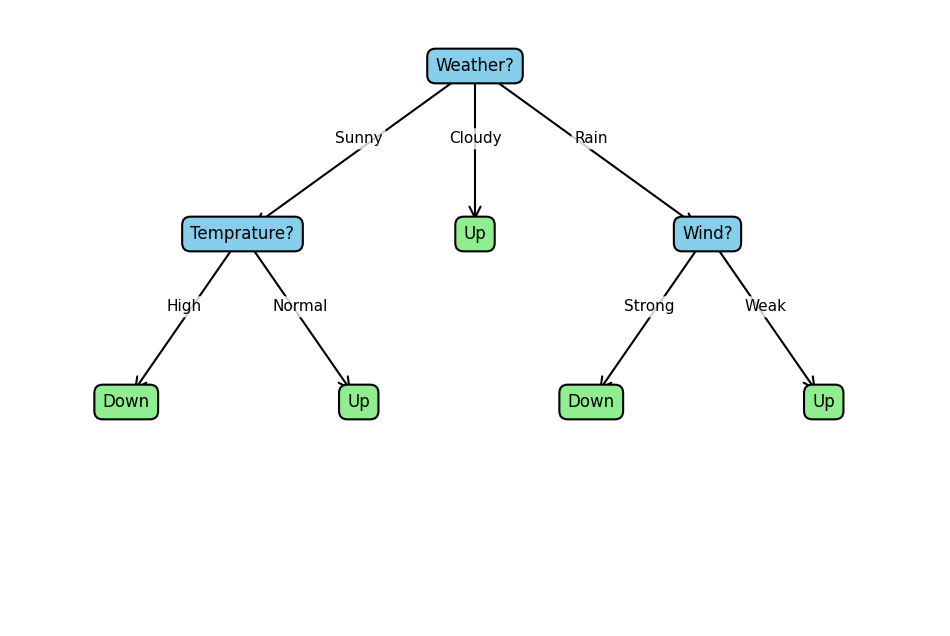

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 日本語フォントの設定 (お使いの環境に合わせて調整してください)
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'MS Gothic', 'Noto Sans CJK JP', 'sans-serif']

def create_decision_tree():
    """
    決定木のイメージ図を生成します。
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 11)
    ax.axis('off')

    # --- スタイル定義 ---
    # 決定ノード (質問) のスタイル
    decision_node_props = dict(boxstyle="round,pad=0.5", fc="skyblue", ec="k", lw=1.5)
    # 葉ノード (最終的な答え) のスタイル
    leaf_node_props = dict(boxstyle="round,pad=0.5", fc="lightgreen", ec="k", lw=1.5)
    # 矢印のスタイル
    arrow_props = dict(arrowstyle="->", connectionstyle="arc3,rad=0", mutation_scale=20, lw=1.5, color="k", shrinkA=10, shrinkB=10)
    # テキストの基本スタイル
    text_props = {'ha': 'center', 'va': 'center', 'fontsize': 12}

    # --- ノードの定義 (座標とテキスト) ---
    # { 'pos': (x, y), 'text': '表示テキスト', 'props': スタイル } の形式で定義
    nodes = {
        # 深さ 0 (ルート)
        'root': {'pos': (8, 10), 'text': 'Weather?', 'props': decision_node_props},
        # 深さ 1
        'L1_sunny': {'pos': (4, 7), 'text': 'Temprature?', 'props': decision_node_props},
        'L1_overcast': {'pos': (8, 7), 'text': 'Up', 'props': leaf_node_props},
        'L1_rainy': {'pos': (12, 7), 'text': 'Wind?', 'props': decision_node_props},
        # 深さ 2
        'L2_high': {'pos': (2, 4), 'text': 'Down', 'props': leaf_node_props},
        'L2_normal': {'pos': (6, 4), 'text': 'Up', 'props': leaf_node_props},
        'L2_strong': {'pos': (10, 4), 'text': 'Down', 'props': leaf_node_props},
        'L2_weak': {'pos': (14, 4), 'text': 'Up', 'props': leaf_node_props},
    }

    # --- ノードの描画 ---
    for key, node in nodes.items():
        ax.text(node['pos'][0], node['pos'][1], node['text'], bbox=node['props'], **text_props)

    # --- 枝 (矢印) とラベルの定義と描画 ---
    # [親ノード, 子ノード, ラベル] の形式で定義
    connections = [
        ['root', 'L1_sunny', 'Sunny'],
        ['root', 'L1_overcast', 'Cloudy'],
        ['root', 'L1_rainy', 'Rain'],
        ['L1_sunny', 'L2_high', 'High'],
        ['L1_sunny', 'L2_normal', 'Normal'],
        ['L1_rainy', 'L2_strong', 'Strong'],
        ['L1_rainy', 'L2_weak', 'Weak'],
    ]

    for parent, child, label in connections:
        parent_pos = nodes[parent]['pos']
        child_pos = nodes[child]['pos']

        # 矢印を描画
        ax.add_patch(patches.FancyArrowPatch(parent_pos, child_pos, **arrow_props))

        # ラベルを矢印の中間点に配置
        mid_x = (parent_pos[0] + child_pos[0]) / 2
        mid_y = (parent_pos[1] + child_pos[1]) / 2
        ax.text(mid_x, mid_y + 0.2, label, ha='center', va='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8))

    # --- タイトル ---
#    fig.suptitle("Decision tree", fontsize=16)

    plt.show()

# 関数を実行して図を生成
create_decision_tree()

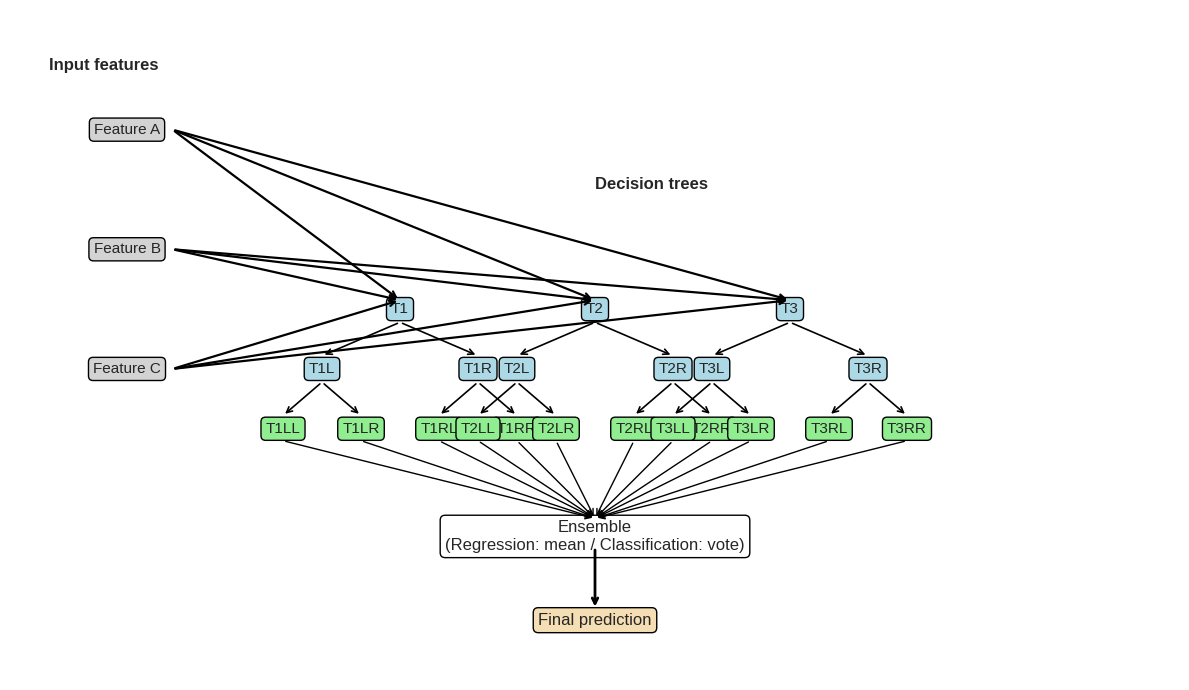

In [ ]:
import matplotlib.pyplot as plt

# --- 再帰的に決定木を描画する関数 ---
def draw_tree(ax, x, y, label, depth=2, spread=1.5, vertical_gap=1.0):
    """決定木を描画し、葉ノードの座標を返す"""
    if depth == 0:
        ax.text(x, y, label, ha='center', va='center', fontsize=11,
                bbox=dict(boxstyle="round", fc="lightgreen", ec="black"))
        return [(x, y)]
    # 内部ノード
    ax.text(x, y, label, ha='center', va='center', fontsize=11,
            bbox=dict(boxstyle="round", fc="lightblue", ec="black"))
    left_x, right_x = x - spread, x + spread
    child_y = y - vertical_gap

    # 矢印
    ax.annotate("", xy=(left_x, child_y+0.22), xytext=(x, y-0.22),
                arrowprops=dict(arrowstyle="->", lw=1.2))
    ax.annotate("", xy=(right_x, child_y+0.22), xytext=(x, y-0.22),
                arrowprops=dict(arrowstyle="->", lw=1.2))

    left_leaves = draw_tree(ax, left_x, child_y, f"{label}L", depth-1, spread/2, vertical_gap)
    right_leaves = draw_tree(ax, right_x, child_y, f"{label}R", depth-1, spread/2, vertical_gap)
    return left_leaves + right_leaves


# --- メイン図作成 ---
fig, ax = plt.subplots(figsize=(12, 7))

# 入力特徴量
input_labels = ["Feature A", "Feature B", "Feature C"]
for i, label in enumerate(input_labels):
    ax.text(-7.2, 4 - i*2, label, ha='center', va='center', fontsize=11,
            bbox=dict(boxstyle="round", fc="lightgray", ec="black"))

# 決定木群
tree_positions = [-3, 0, 3]
all_leaves = []
for i, x in enumerate(tree_positions):
    leaves = draw_tree(ax, x, 1, f"T{i+1}", depth=2, spread=1.2, vertical_gap=1.0)
    all_leaves.extend(leaves)
    # 各特徴量から木の根へ矢印
    for j in range(len(input_labels)):
        ax.annotate("", xy=(x, 1.15), xytext=(-6.5, 4 - j*2),
                    arrowprops=dict(arrowstyle="->", lw=1.6))

# Ensemble ノード
ensemble_y = -2.8
ax.text(0, ensemble_y, "Ensemble\n(Regression: mean / Classification: vote)",
        ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round", fc="white", ec="black"))

# 葉から Ensemble へ矢印
for (lx, ly) in all_leaves:
    ax.annotate("", xy=(0, ensemble_y+0.3), xytext=(lx, ly-0.2),
                arrowprops=dict(arrowstyle="->", lw=1))

# Final prediction
final_y = -4.2
ax.text(0, final_y, "Final prediction", ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round", fc="wheat", ec="black"))
ax.annotate("", xy=(0, final_y+0.18), xytext=(0, ensemble_y-0.18),
            arrowprops=dict(arrowstyle="->", lw=2))

# セクションラベル
ax.text(-8.4, 5.0, "Input features", fontsize=12, weight='bold')
ax.text(0, 3.0, "Decision trees", fontsize=12, weight='bold')

# 軸と余白調整
ax.set_xlim(-9, 9)
ax.set_ylim(-5.2, 6)
ax.axis("off")
plt.tight_layout()

# 保存
plt.savefig("random_forest_ensemble_reg_cls.png", dpi=300)
plt.savefig("random_forest_ensemble_reg_cls.eps")

plt.show()


[スライド表示]
「皆さん、今日は機械学習を使った予測モデル、LightGBMについて簡単に説明します。この図を見てください。
まず、左側にある『Input Features』、つまりデータの中の特徴量—例えば『Feature A』や『Feature B』—がスタート地点です。これらが最初のツリー、Tree 1に渡されます。ここで最初の予測を作ります。
次に、Tree 1の予測が完璧でない場合、その誤差を修正するために、Tree 2やTree 3といった追加のツリーが働きます。図の点線は、この誤差を次のツリーに引き継いでいく流れを示しています。
最終的に、すべてのツリーの予測を合計して、図の下にある『Final prediction』—つまり最終的な答え—を得ます。
LightGBMのポイントは、最初にすべての特徴量を使い、その後のツリーでは誤差だけを扱うことで、計算を効率的に軽量化している点です。これで、大量のデータでも高速に予測ができるんです。
質問があれば後でどうぞ！」

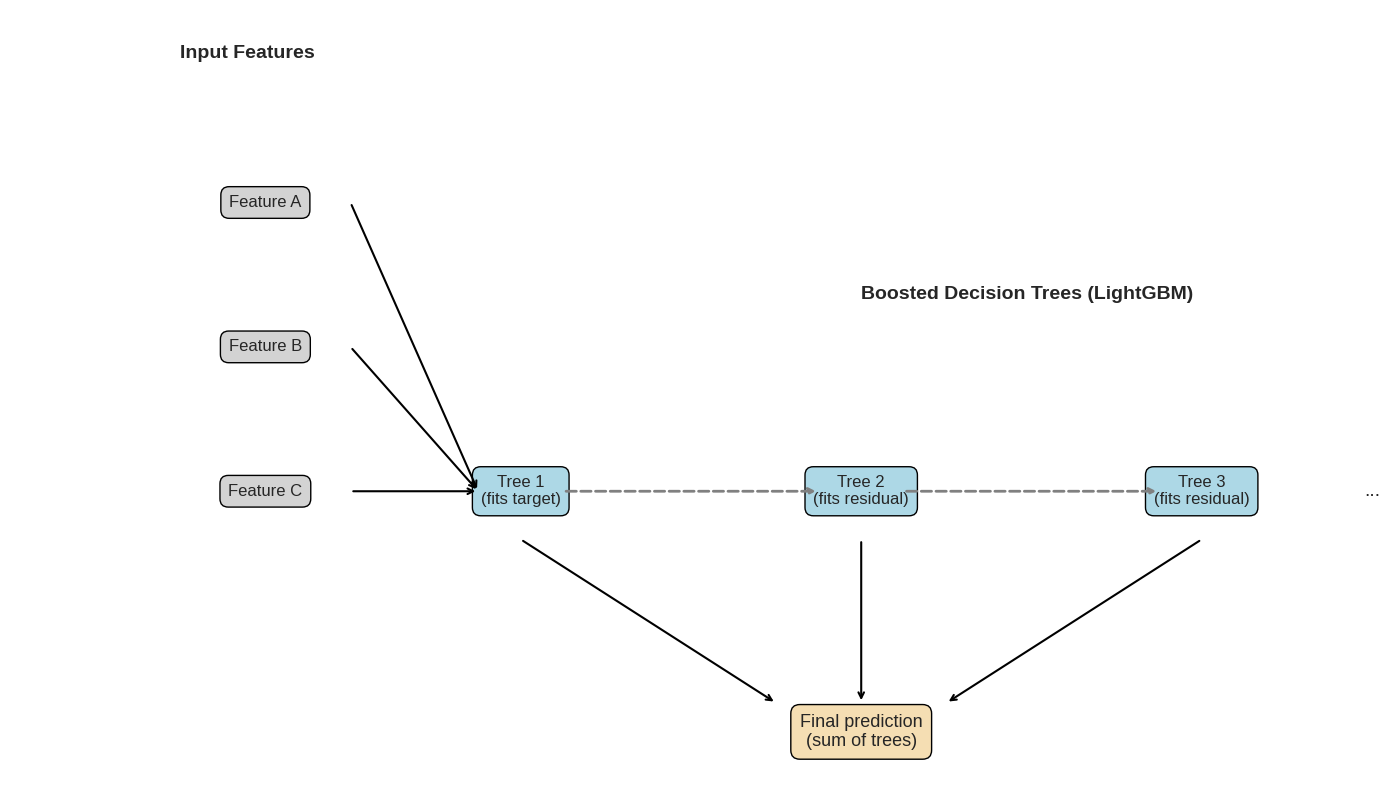

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))  # Increased size for better spacing

# Set limits to ensure all elements are visible
ax.set_xlim(-10, 6)
ax.set_ylim(-3, 5)

# 入力特徴量
input_labels = ["Feature A", "Feature B", "Feature C"]
for i, label in enumerate(input_labels):
    ax.text(-7, 3 - i*1.5, label, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", ec="black", lw=1))

# 初期モデル
ax.text(-4, 0, "Tree 1\n(fits target)", ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="black", lw=1))

# 誤差修正モデル
ax.text(0, 0, "Tree 2\n(fits residual)", ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="black", lw=1))

ax.text(4, 0, "Tree 3\n(fits residual)", ha='center', va='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="black", lw=1))

# 矢印 from inputs to Tree 1
for j in range(len(input_labels)):
    ax.annotate("", xy=(-4.5, 0), xytext=(-6, 3 - j*1.5),
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Dashed arrows between trees
ax.annotate("", xy=(-0.5, 0), xytext=(-3.5, 0),
            arrowprops=dict(arrowstyle="->", lw=2, linestyle="dashed", color='gray'))
ax.annotate("", xy=(3.5, 0), xytext=(0.5, 0),
            arrowprops=dict(arrowstyle="->", lw=2, linestyle="dashed", color='gray'))

# Add '...' to indicate more trees
ax.text(6, 0, "...", ha='center', va='center', fontsize=14)

# 予測
ax.text(0, -2.5, "Final prediction\n(sum of trees)", ha='center', va='center', fontsize=13,
        bbox=dict(boxstyle="round,pad=0.5", fc="wheat", ec="black", lw=1))

# Arrows from trees to final prediction
ax.annotate("", xy=(-1, -2.2), xytext=(-4, -0.5), arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))
ax.annotate("", xy=(0, -2.2), xytext=(0, -0.5), arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))
ax.annotate("", xy=(1, -2.2), xytext=(4, -0.5), arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# ラベル
ax.text(-8, 4.5, "Input Features", fontsize=14, weight='bold')
ax.text(0, 2, "Boosted Decision Trees (LightGBM)", fontsize=14, weight='bold')

ax.axis("off")
plt.tight_layout()
plt.savefig("improved_lightgbm_diagram.png", dpi=300)
plt.show()

皆さん、こんにちは。本日は、現代のAI、特にChatGPTやGoogle翻訳のようなサービスの心臓部である「Transformer」というモデルについて、こちらの図を使いながら簡単にご説明します。

1. Transformerは何がすごいのか？
一言で言うと、Transformerは文章の「文脈」を的確に捉えるのが非常に得意なモデルです。

例えば、昔の翻訳モデルは、文章を単語一つずつ順番に読んで翻訳していました。しかし、それでは長い文章の最初の内容を忘れてしまい、文脈がおかしくなることがありました。

Transformerは、文章全体の関係性を一気に把握することで、この問題を解決しました。その中心的な仕組みが、この図にある「エンコーダ」と「デコーダ」という2つの部分です。

2. エンコーダの役割：文章を深く「理解」する読書家 👨‍🏫
まず、図の左側、「エンコーダブロック」を見てください。これは、入力された文章を理解する専門家、いわば「読書家」の役割をします。

入力: ここに翻訳したい文章、例えば "are great" といった単語が入ってきます。

アテンション (Attention): エンコーダで最も重要なのが、この「アテンション」という部分です。これは、文章中の単語同士が、互いにどれくらい関連が深いかに「注意（Attention）」を向ける仕組みです。例えば、「great」という単語が、文中のどの単語と強く結びついているかを判断します。これにより、単語単体の意味だけでなく、文章全体のニュアンスや文脈を掴むことができます。

状態 (State) の出力: 文章全体の文脈を理解した結果を、「状態」という情報にまとめます。これは、文章の意味を凝縮した、コンピュータが扱いやすい数値データだと考えてください。

エンコーダの仕事は、とにかく原文を完璧に理解し、その意味を「状態」という形で要約することです。

3. デコーダの役割：文脈を元に文章を「生成」する作家 ✍️
次に、図の右側、「デコーダブロック」です。こちらは、エンコーダが作った要約を元に、新しい文章を作り出す「作家」の役割をします。

エンコーダからの情報: まず、デコーダはエンコーダが生み出した「状態」の情報を全て受け取ります。これが、これから何を書くべきかの「指示書」になります。

アテンション: デコーダにも「アテンション」があります。これは2つの重要な働きをします。

1つ目は、エンコーダからの情報（原文の文脈）の「どこに注目しながら」翻訳すべきかを判断します。

2つ目は、自分が既に出力した単語（例えば "Transformer" の次は何が良いか）にも注意を向け、自然な文章の流れを作ります。

出力: これらのプロセスを経て、 "Transformer" "sind" "grossartig" "!" といったように、単語を1つずつ順番に生成していきます。

デコーダの仕事は、エンコーダの理解（状態）を常に参照しながら、最も適切で自然な文章をゼロから書き上げることです。

4. まとめ
このように、Transformerは2つの専門家が連携するチームのようなものです。

エンコーダ (読書家) が、アテンション機構を使って原文の文脈を深く理解し、

デコーダ (作家) が、その理解を元に、やはりアテンションを使って自然な文章を生成する。

この「役割分担」と、文脈を捉える鍵となる「アテンション」という仕組みこそが、Transformerが今日のAIの発展に大きく貢献した理由です。

ご清聴ありがとうございました。

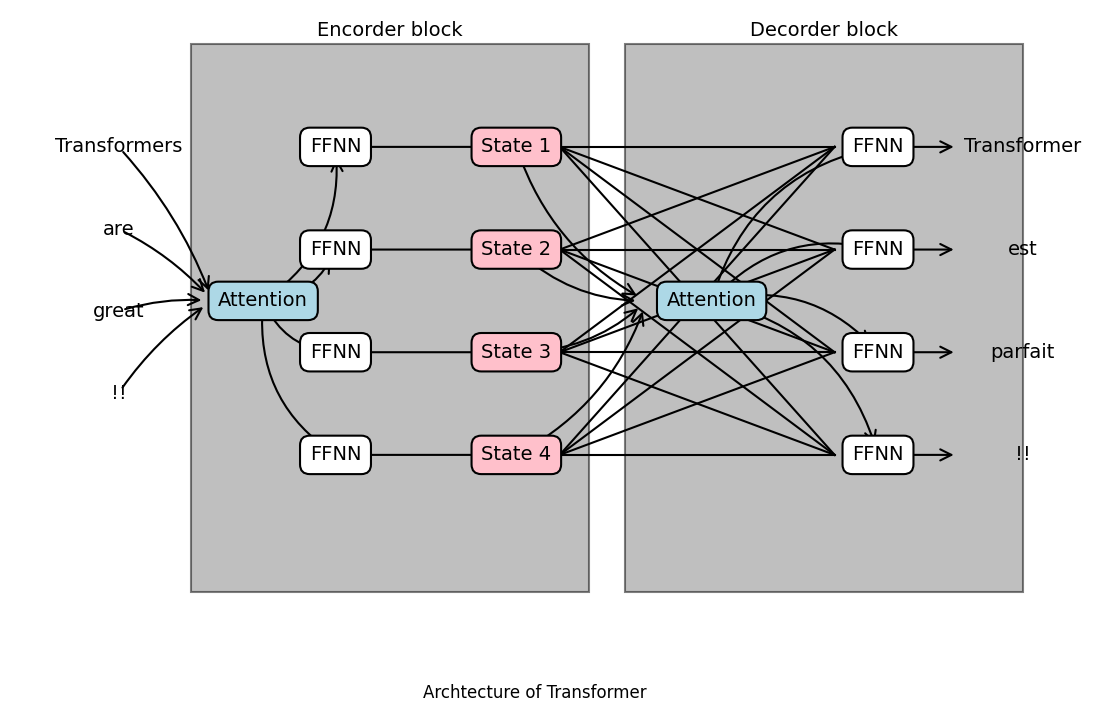

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 日本語フォントの設定 (お使いの環境に合わせて調整してください)
# Windows: 'Yu Gothic', 'MS Gothic'など
# Mac: 'Hiragino Sans'など
# Linux: 'Noto Sans CJK JP'など
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'MS Gothic', 'Noto Sans CJK JP', 'sans-serif']

def create_transformer_diagram():
    """
    Transformerのエンコーダ・デコーダ アーキテクチャ図を生成します。
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 9)
    ax.axis('off')

    # --- スタイル定義 ---
    # テキストボックスのスタイル
    box_props = dict(boxstyle='round,pad=0.5', fc='w', ec='k', lw=1.5)
    # 矢印のスタイル
    arrow_props = dict(arrowstyle='->', mutation_scale=20, lw=1.5, color='k', shrinkA=5, shrinkB=8)
    # テキストの基本スタイル
    text_props = {'ha': 'center', 'va': 'center', 'fontsize': 14}

    # --- 左側: 入力 ---
#    ax.text(0.5, 8.5, 'Transformers', fontsize=18, ha='left')
    inputs = ['Transformers','are', 'great', '!!']
    input_nodes = [ax.text(1.5, 7 - i*1.2, text, **text_props) for i, text in enumerate(inputs)]

    # --- エンコーダブロック ---
    ax.add_patch(patches.Rectangle((2.5, 0.5), 5.5, 8, ec='k', fc='grey', lw=1.5, alpha=0.5))
    ax.text(5.25, 8.7, 'Encorder block', **text_props)

    # エンコーダのコンポーネント
    y_levels = [7, 5.5, 4, 2.5]
    enc_ffnns = [ax.text(4.5, y, 'FFNN', bbox=box_props, **text_props) for y in y_levels]
    enc_attn = ax.text(3.5, 4.75, 'Attention', bbox={**box_props, 'fc':'lightblue'},**text_props)
    states = [ax.text(7, y, f'State {i+1}', bbox={**box_props, 'fc':'pink'}, **text_props) for i, y in enumerate(y_levels)]

    # --- デコーダブロック ---
    ax.add_patch(patches.Rectangle((8.5, 0.5), 5.5, 8, ec='k', fc='grey', lw=1.5, alpha=0.5))
    ax.text(11.25, 8.7, 'Decorder block', **text_props)

    # デコーダのコンポーネント
    dec_ffnns = [ax.text(12, y, 'FFNN', bbox=box_props, **text_props) for y in y_levels]
    # zorderを高く設定して、他の線の上に描画されるようにする
    dec_attn = ax.text(9.7, 4.75, 'Attention', bbox={**box_props, 'fc': 'lightblue'}, **text_props, zorder=5)

    # --- 右側: 出力 ---
    outputs = ['Transformer', 'est', 'parfait', '!!']
    for i, y in enumerate(y_levels):
        ax.text(14, y, outputs[i], **text_props)

    # --- 矢印の描画 ---
    # 入力 -> エンコーダ・アテンション
    for node in input_nodes:
        ax.add_patch(patches.FancyArrowPatch(node.get_position(), (enc_attn.get_position()[0] - 0.7, enc_attn.get_position()[1]), **arrow_props, connectionstyle="arc3,rad=-0.1"))

    # エンコーダ内部
    for ffnn, state in zip(enc_ffnns, states):
        ax.add_patch(patches.FancyArrowPatch(enc_attn.get_position(), ffnn.get_position(), **arrow_props, connectionstyle="arc3,rad=0.3"))
        ax.add_patch(patches.FancyArrowPatch(ffnn.get_position(), state.get_position(), **arrow_props))

    # エンコーダ状態 -> デコーダ
    for state in states:
        # 状態 -> デコーダ・アテンション
        ax.add_patch(patches.FancyArrowPatch(state.get_position(), (dec_attn.get_position()[0] - 0.9, dec_attn.get_position()[1]), **arrow_props, connectionstyle="arc3,rad=0.2"))
        # 状態 -> デコーダ・FFNN (アテンションの背後を通る線)
        for ffnn in dec_ffnns:
            start_pos = state.get_position()
            end_pos = ffnn.get_position()
            ax.plot([start_pos[0] + 0.6, end_pos[0] - 0.6], [start_pos[1], end_pos[1]], color='k', lw=1.5, zorder=1)

    # デコーダ内部
    for ffnn in dec_ffnns:
        ax.add_patch(patches.FancyArrowPatch(dec_attn.get_position(), ffnn.get_position(), **arrow_props, connectionstyle="arc3,rad=-0.3"))

    # デコーダ・FFNN -> 出力
    for i, ffnn in enumerate(dec_ffnns):
        ax.add_patch(patches.FancyArrowPatch(ffnn.get_position(), (13.2, y_levels[i]), **arrow_props))

    # 図のキャプション
    fig.text(0.5, 0.02, "Archtecture of Transformer", ha='center', fontsize=12)

    # 描画
    plt.show()

    plt.savefig('image_trans.png')

# 関数を実行して図を生成
create_transformer_diagram()

## ハイパーパラメータの調整

In [ ]:
import tuner
import json

import optuna


/usr/local/lib/python3.12/dist-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore


In [ ]:
# モデルを作成する
import datetime
from sklearn.model_selection import train_test_split


In [ ]:
params_path = "drive/MyDrive/ColabNotebooks/CryptMarket/HyperParams/"


In [ ]:
dfs['BTC']

value  diff             MA  Momentum  Amihud Measure  \
timestamp                                                                       
2024-11-30 23:40:00   96537.39     0   96634.067500    171.02    1.935730e-05   
2024-11-30 23:45:00   96508.68     0   96619.319167      7.49   -5.448985e-06   
2024-11-30 23:50:00   96505.04     0   96602.570000    150.91   -1.038663e-06   
2024-11-30 23:55:00   96473.51     0   96587.292083    227.08   -1.023657e-05   
2024-12-01 00:00:00   96559.97     0   96574.232500    333.98    1.534060e-05   
...                        ...   ...            ...       ...             ...   
2025-08-14 11:45:00  120895.61     1  121236.595000    195.87    7.480998e-06   
2025-08-14 11:50:00  120965.76     1  121205.259583     89.99    1.060624e-05   
2025-08-14 11:55:00  121009.79     1  121176.285417    135.04    4.355384e-06   
2025-08-14 12:00:00  121030.78     1  121152.370000    362.64    1.396743e-06   
2025-08-14 12:05:00  121023.05     1  121130.649167    275.98   -6.120152e-07   

                     target_lag  
timestamp                        
2024-11-30 23:40:00         1.0  
2024-11-30 23:45:00         1.0  
2024-11-30 23:50:00         1.0  
2024-11-30 23:55:00         1.0  
2024-12-01 00:00:00         1.0  
...                         ...  
2025-08-14 11:45:00         0.0  
2025-08-14 11:50:00         0.0  
2025-08-14 11:55:00         0.0  
2025-08-14 12:00:00         0.0  
2025-08-14 12:05:00         0.0  

[73878 rows x 6 columns]

In [ ]:
import predictors.base
from predictors.linear_regression import LinearRegressionModel
from predictors.logistic_regression import LogisticRegressionModel
from predictors.random_forest import RandomForestModel
from predictors.light_gbm import LightGBMModel
from predictors.transformer import MyTransformerModel


In [ ]:
if target == 'diff':
    task = 'binary'
else:
    task = 'regression'

for symbol in symbols:
    # 説明変数と目的変数を指定
#    X = dfs[symbol].drop(columns=['value', 'value_lag'])
    # 'value_lag'と'value'で時差がある場合は、'value'も特徴量に含める
#    X = dfs[symbol].drop(columns=['value_lag'])
#    y = dfs[symbol]['value_lag']
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)


    # 線形回帰
#    tuner0 = tuner.ModelTuner(LinearRegressionModel, X_train, y_train, X_val, y_val,task = task)
#    params_lr = tuner0.tune()
#    with open(params_path + f"params_lr_{symbol}_{date}.json", "w") as f:
#        json.dump(params_lr, f)

    #ロジスティック回帰
#    tuner1 = tuner.ModelTuner(LogisticRegressionModel, X_train, y_train, X_val, y_val,task = task)
#    params_logReg = tuner1.tune()
#    with open(params_path + f"params_lr_{symbol}_{date}.json", "w") as f:
#        json.dump(params_logReg, f)

    # ランダムフォレスト
#    tuner2 = tuner.ModelTuner(RandomForestModel, X_train, y_train, X_val, y_val,task = task)
#    params_rf = tuner2.tune()
#    with open(params_path + f"params_rf_{symbol}_{date}.json", "w") as f:
#        json.dump(params_rf, f)

    # LightGBM
#    tuner3 = tuner.ModelTuner(LightGBMModel, X_train, y_train, X_val, y_val,task = task)
#    params_lgb = tuner3.tune()
#    with open(params_path + f"params_lgb_{symbol}_{date}.json", "w") as f:
#        json.dump(params_lgb, f)

    ## Transformer
#    tuner4 = tuner.ModelTuner(MyTransformerModel, X_train, y_train, X_val, y_val,task = task)
#    params_trans = tuner4.tune()
#    with open(params_path + f"params_trans_{symbol}_{date}.json", "w") as f:
#        json.dump(params_trans, f)


In [ ]:
import json

params_path = "drive/MyDrive/ColabNotebooks/CryptMarket/HyperParams/"

# LightGBMのパラメータ
'''
params_lgb = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'subsample':0.6,
            'num_leaves': 10, # 20 , 50 #70,
            'n_estimators': 400, # 300,
            'min_child_samples': 10,
            'max_depth': -1,
            'learning_rate': 0.01,
            'colsample_bytree': 0.6
        }
'''
# ハイパーパラメータの保存
#with open(params_path + "params_lgb.json", "w") as f:
#    json.dump(params_lgb, f)
# ハイパーパラメータの読み込み
#with open(params_path + "params_lgb.json", "r") as f:
#    params_lgb = json.load(f)


# RandomForestのパラメータ
'''
params_rf = {
    'max_depth': 10, # 10 #20,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 50, #10,
    'n_estimators': 200, #100
    'objective': 'regression'
}
'''

# ハイパーパラメータの保存
#with open(params_path + "params_rf.json", "w") as f:
#    json.dump(params_rf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_rf.json", "r") as f:
#    params_rf = json.load(f)

# Transformerのパラメータ
'''
params_tf = {
    'input_chunk_length': 100, #100, #50, #100, #10, #8,
    'output_chunk_length':50, #3,
    'num_encoder_layers':1, # updated
    'num_decoder_layers':1, # updated
    'd_model':128,
    'nhead':4,
    'dropout':0.1,
    'batch_size':64, #32, #64,
    'n_epochs':1, #5, #5
    'model_name':"price_prediction_transformer",
    'random_state':42,
    'objective':'regression'
}
'''
# ハイパーパラメータの保存
#with open(params_path + "params_tf.json", "w") as f:
#    json.dump(params_tf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_tf.json", "r") as f:
#    params_tf = json.load(f)


'\nparams_tf = {\n    \'input_chunk_length\': 100, #100, #50, #100, #10, #8,\n    \'output_chunk_length\':50, #3,\n    \'num_encoder_layers\':1, # updated\n    \'num_decoder_layers\':1, # updated\n    \'d_model\':128,\n    \'nhead\':4,\n    \'dropout\':0.1,\n    \'batch_size\':64, #32, #64,\n    \'n_epochs\':1, #5, #5\n    \'model_name\':"price_prediction_transformer",\n    \'random_state\':42,\n    \'objective\':\'regression\'\n}\n'

In [ ]:
# (可能なら)アンサンブルモデルの作成
#import predictors.linear_regression as lr
import predictors.ensemble as ens
#import predictors.light_gbm as lgb
#import predictors.random_forest as rf
#import predictors.transformer as trans

# 初期モデルの設定
#initial_models = [LightGBMModel(params_lgb)]
# アンサンブルモデルのインスタンス作成
#ensemble = ens.EnsembleModel(models=initial_models)

# 新しいモデルを追加
#updated_models = [RandomForestModel(params_rf), LightGBMModel(params_lgb)]
# アンサンブルモデルのインスタンス作成
#ensemble.models = updated_models




In [ ]:
# モデルの辞書（クラスのみ登録）
models = {
    'lr':LinearRegressionModel,
    'rf':RandomForestModel,
    'lgb': LightGBMModel,
    'trans': MyTransformerModel
    #'ens':ensemble,
}



In [ ]:
if target == 'diff':
    models = {
    'lr':LogisticRegressionModel,
    'rf':RandomForestModel,
    'lgb': LightGBMModel,
    'trans': MyTransformerModel
    #'ens':ensemble,
    }
else:
    models = {
    'lr':LinearRegressionModel,
    'rf':RandomForestModel,
    'lgb': LightGBMModel,
    'trans': MyTransformerModel
    #'ens':ensemble,
    }

In [ ]:
# モデルごとのパラメータ
'''params_dict = {
    'LR': {"scaling": True,
           "scaler":"StandardScaler", # "StandardScaler", "MinMaxScaler", "RobustScaler",
           "model_type":"Ridge", # "Ridge","Lasso","None"
           'alpha': 100000},  # Lassoの場合は10、Ridgeの場合は100,000
    'RF': params_rf,
    'LGB': params_lgb,
    'trans': params_tf
}
'''

if target == 'diff':
    params_path = "drive/MyDrive/ColabNotebooks/CryptMarket/HyperParams/params_diffModels/"
elif target == 'ret':
    params_path = "drive/MyDrive/ColabNotebooks/CryptMarket/HyperParams/params_retModels/"
elif target == 'close':
    params_path = "drive/MyDrive/ColabNotebooks/CryptMarket/HyperParams/params_priceModels/"


params_dict = {}
for symbol in symbols:
    params_dict[symbol] = {}
    for model_name, _ in models.items():
        with open(params_path + f"params_{model_name}_{symbol}_{date}.json", "r") as f:
            params_dict[symbol][model_name] = json.load(f)
        if model_name == 'lgb':
            if target == 'diff':
                params_dict[symbol][model_name]['objective'] = 'binary'
                params_dict[symbol][model_name]['metric'] = 'binary_logloss'
            else:
                params_dict[symbol][model_name]['objective'] = 'regression'
                params_dict[symbol][model_name]['metric'] = 'rmse'
            params_dict[symbol][model_name]['boosting_type'] = 'gbdt'
        elif model_name == 'rf':
            if target == 'diff':
                params_dict[symbol][model_name]['objective'] = 'binary'
            else:
                params_dict[symbol][model_name]['objective'] = 'regression'
        elif model_name == 'trans':
            params_dict[symbol][model_name]['batch_size'] = 64
            params_dict[symbol][model_name]['n_epochs'] = 10 # 20
            params_dict[symbol][model_name]['model_name'] = 'price_prediction_transformer'
            params_dict[symbol][model_name]['random_state'] = 42
            params_dict[symbol][model_name]['freq'] = '5min'
            params_dict[symbol][model_name]['early_stopping'] = False
            params_dict[symbol][model_name]['early_stopping_patience'] = 1 #5
            params_dict[symbol][model_name]['early_stopping_min_delta'] = 0.01
            params_dict[symbol][model_name]['base_dir'] = "drive/MyDrive/ColabNotebooks/CryptMarket"
            if target == 'diff':
                params_dict[symbol][model_name]['objective'] = 'binary'
            else:
                params_dict[symbol][model_name]['objective'] = 'regression'



In [ ]:
import evaluators.ts_evaluator as ts_eval

# モデルを作成する
import datetime
from sklearn.model_selection import train_test_split


In [ ]:
# 訓練データ、検証データ、テストデータの期間指定
X = dfs['BTC'].drop(columns=['target_lag'])
y = dfs['BTC']['target_lag']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

print('X_trainの期間')
print(X_train_2.index.min(),X_train_2.index.max())
print('X_valの期間')
print(X_val.index.min(),X_val.index.max())
print('X_testの期間')
print(X_test.index.min(),X_test.index.max())

X_trainの期間
2024-11-30 23:40:00 2025-05-14 03:40:00
X_valの期間
2025-05-14 03:45:00 2025-06-24 04:45:00
X_testの期間
2025-06-24 04:50:00 2025-08-14 12:05:00


In [ ]:
# モデルの保存先
model_path = "drive/MyDrive/ColabNotebooks/CryptMarket/Models/"


In [ ]:
import datetime

# 保存したモデルにつける日付
today = datetime.datetime.now().strftime("%Y-%m-%d")


In [ ]:
# 新たに学習するか学習済みのモデルをロードするか
#is_load = True

In [ ]:

coin_models = {}
predictions = {}
predict_probs = {}
evals = {}

UseSavedModel = False
saved_date = '2025-08-24'


for symbol in ['SOL']:#symbols:
    # 説明変数と目的変数を指定
#    X = dfs[symbol].drop(columns=['value', 'value_lag'])
    # 'value_lag'と'value'で時差がある場合は、'value'も特徴量に含める
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    for model_name, model_class in models.items():
        print(symbol, model_name)

        # モデルをパラメータ付きで再インスタンス化
        try:
#            params = params_dict.get(model_name, {})  # 該当するパラメータを取得
            params = params_dict[symbol][model_name]  # 該当するパラメータを取得
            model = model_class(params)  # パラメータを渡して初期化
        except TypeError as e:
            print(f"Error while initializing {model_name}: {e}")
            continue
        if UseSavedModel:
            # 学習済みモデルの読み込み
            file_name = symbol + '_' + model_name + '_' + saved_date
            try:
                model = model._load_model(model_path, file_name)
            except Exception as e:
                print(symbol,model_name,f"Error loading model with ", e)
        else:
            # モデルの学習と検証
            if model_name == 'trans':
                X_train_trans,X_val_trans,y_train_trans,y_val_trans = train_test_split(X_train,y_train,train_size = 0.9,shuffle = False)
                model.fit(X_train_trans,y_train_trans,X_val = X_val_trans, y_val = y_val_trans)
    #        elif model_name == 'lr' and target == 'diff':
    #            model = LogisticRegressionModel()
    #            model.fit(X_train, y_train)
            else:
                model.fit(X_train, y_train)
            #model.fit(X_train, y_train)

        file_name = symbol + '_' + model_name
#        try:
#            model.save_model(file_path,file_name + '_' + today)
#        except Exception as e:
#            print('cannot save model with '+ str(e))

        coin_models[file_name] = model
        predictions[file_name] = model.predict(X_test)
        if target == 'diff':
            predict_probs[file_name] = model.predict_proba(X_test)

#        # 特徴量と予測値の関係
#        partial_dependence(model,X_test,
#                           features = ['Amihud Measure'],
#                           kind = 'both')
        try:
            evals[symbol + '_' + model_name] = ts_eval.TimeseriesEvaluation(y_test, predictions[symbol + '_' + model_name])
        except ValueError as e:
            print(f"Dataset {symbol}: Skipping due to error - {e}")


        # 学習したモデルを保存する
        if UseSavedModel == False:
#for symbol in symbols:
#    for model_name,_ in models.items():
            file_name = symbol + '_' + model_name + '_' + today
            print(symbol,model_name)
            try:
                coin_models[symbol + '_' + model_name].save_model(model_path,file_name)
            except Exception as e:
                print('cannot save model with '+ str(e))


SOL lr


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SOL lr
SOL rf
SOL rf
SOL lgb
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31701, number of negative: 34291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 65992, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480376 -> initscore=-0.078535
[LightGBM] [Info] Start training from score -0.078535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | BCEWithLogitsLoss   | 0      | train
1 | train_criterion     | BCEWithLogitsLoss   | 0      | train
2 | val_criterion       | BCEWithLogitsLoss   | 0      | train
3 | train_metrics      

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-07-20 01:05:00', '2025-07-20 01:10:00',
               '2025-07-20 01:15:00', '2025-07-20 01:20:00',
               '2025-07-20 01:25:00'],
              dtype='datetime64[ns]', name='timestamp', freq='5min') ... DatetimeIndex(['2025-08-14 11:45:00', '2025-08-14 11:50:00',
               '2025-08-14 11:55:00', '2025-08-14 12:00:00',
               '2025-08-14 12:05:00'],
              dtype='datetime64[ns]', name='timestamp', freq='5min')
X_train tail: DatetimeIndex(['2025-06-27 00:35:00', '2025-06-27 00:40:00',
               '2025-06-27 00:45:00', '2025-06-27 00:50:00',
               '2025-06-27 00:55:00', '2025-06-27 01:00:00',
               '2025-06-27 01:05:00', '2025-06-27 01:10:00',
               '2025-06-27 01:15:00', '2025-06-27 01:20:00',
               '2025-06-27 01:25:00', '2025-06-27 01:30:00',
               '2025-06-27 01:35:00', '2025

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Forecast values: [[4.63362518]
 [4.71315054]
 [4.70008498]
 [4.72912118]
 [4.75368513]]
If forecast includes NaN, then check as follows
Length of scaled_series_target: 59392
input_chunk_length + output_chunk_length: 31
Length of scaled_series_target should be longer than input_chunk_length + output_chunk_length
Any NaNs in input? False
Any NaNs in input? False
Is fitted ? True
n (prediction length): 7333
output_chunk_length: 1
n should be multiple of output_chunk_length
Scaler input cols: Index(['value', 'diff', 'MA', 'Momentum', 'Amihud Measure', 'btc', 'btc_lag1',
       'btc_lag2', 'btc_return'],
      dtype='object')
Transform input cols: Index(['value', 'diff', 'MA', 'Momentum', 'Amihud Measure', 'btc', 'btc_lag1',
       'btc_lag2', 'btc_return'],
      dtype='object')
Std deviation during fit:
<class 'darts.timeseries.TimeSeries'>
value             1.194334e+01
diff              4.957388e-01
MA                1.188620e+01
Momentum          2.803658e+00
Amihud Measure    4.994927

Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast values: [[4.63362518]
 [4.71315054]
 [4.70008498]
 [4.72912118]
 [4.75368513]]
If forecast includes NaN, then check as follows
Length of scaled_series_target: 59392
input_chunk_length + output_chunk_length: 31
Length of scaled_series_target should be longer than input_chunk_length + output_chunk_length
Any NaNs in input? False
Any NaNs in input? False
Is fitted ? True
n (prediction length): 7333
output_chunk_length: 1
n should be multiple of output_chunk_length
Scaler input cols: Index(['value', 'diff', 'MA', 'Momentum', 'Amihud Measure', 'btc', 'btc_lag1',
       'btc_lag2', 'btc_return'],
      dtype='object')
Transform input cols: Index(['value', 'diff', 'MA', 'Momentum', 'Amihud Measure', 'btc', 'btc_lag1',
       'btc_lag2', 'btc_return'],
      dtype='object')
Std deviation during fit:
<class 'darts.timeseries.TimeSeries'>
value             1.194334e+01
diff              4.957388e-01
MA                1.188620e+01
Momentum          2.803658e+00
Amihud Measure    4.994927

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

for symbol in symbols:
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    for model_name, _ in models.items():
        print(symbol, model_name)
        accuracy = accuracy_score(y_test, predictions[f'{symbol}_{model_name}'])
        precision = precision_score(y_test, predictions[f'{symbol}_{model_name}'])
        recall = recall_score(y_test, predictions[f'{symbol}_{model_name}'])
        f1 = f1_score(y_test, predictions[f'{symbol}_{model_name}'])

        print(f'Symbol: {symbol}, Model Name: {model_name}')
        print('accuracy',accuracy)
        print('precision',precision)
        print('recall',recall)
        print('f1',f1)

        print(classification_report(y_test, predictions[f'{symbol}_{model_name}']))

SOL lr
Symbol: SOL, Model Name: lr
accuracy 0.5904813855175235
precision 0.5901738778811161
recall 0.7494223363286264
f1 0.6603325415676959
              precision    recall  f1-score   support

         0.0       0.59      0.41      0.48      3438
         1.0       0.59      0.75      0.66      3895

    accuracy                           0.59      7333
   macro avg       0.59      0.58      0.57      7333
weighted avg       0.59      0.59      0.58      7333

SOL rf
Symbol: SOL, Model Name: rf
accuracy 0.6046638483567435
precision 0.6686991869918699
recall 0.5068035943517329
f1 0.5766028917774207
              precision    recall  f1-score   support

         0.0       0.56      0.72      0.63      3438
         1.0       0.67      0.51      0.58      3895

    accuracy                           0.60      7333
   macro avg       0.62      0.61      0.60      7333
weighted avg       0.62      0.60      0.60      7333

SOL lgb
Symbol: SOL, Model Name: lgb
accuracy 0.5945724805672985
p

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2975
         1.0       0.59      1.00      0.75      4358

    accuracy                           0.59      7333
   macro avg       0.30      0.50      0.37      7333
weighted avg       0.35      0.59      0.44      7333

SUI lr
Symbol: SUI, Model Name: lr
accuracy 0.6063002863766535
precision 0.6873956594323873
recall 0.43513870541611627
f1 0.5329234751658307
              precision    recall  f1-score   support

         0.0       0.57      0.79      0.66      3548
         1.0       0.69      0.44      0.53      3785

    accuracy                           0.61      7333
   macro avg       0.63      0.61      0.60      7333
weighted avg       0.63      0.61      0.59      7333

SUI rf
Symbol: SUI, Model Name: rf
accuracy 0.5092049638619938
precision 0.5248796147672552
recall 0.5183619550858652
f1 0.5216004253622225
              precision    recall  f1-score   support

         0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

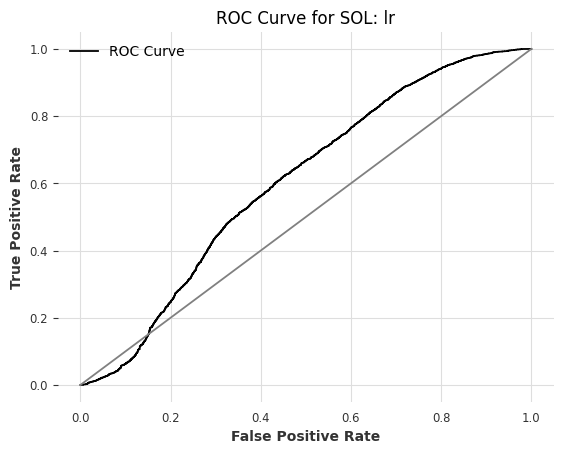

AUCスコア: 0.6036731359322411
AUCスコアは1に近いほどよい


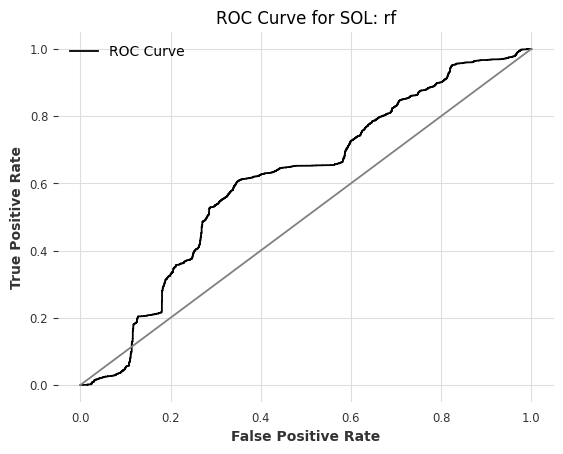

AUCスコア: 0.6118582541570801
AUCスコアは1に近いほどよい


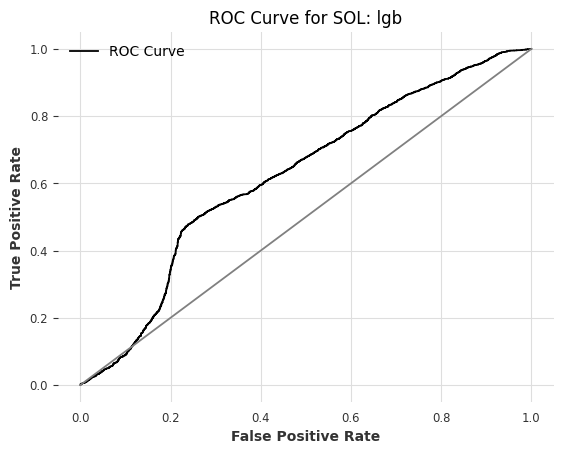

AUCスコア: 0.6217802839367605
AUCスコアは1に近いほどよい


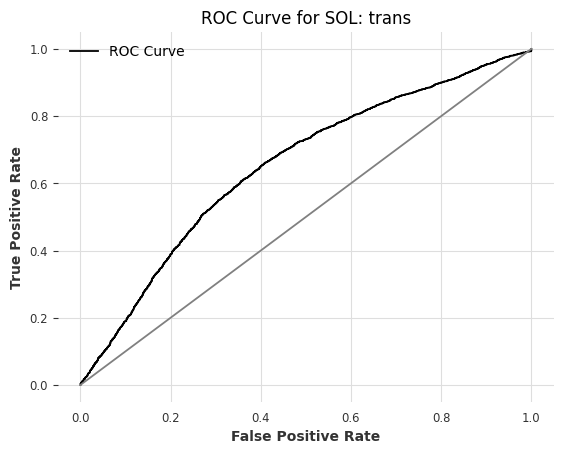

AUCスコア: 0.6514607934726357
AUCスコアは1に近いほどよい


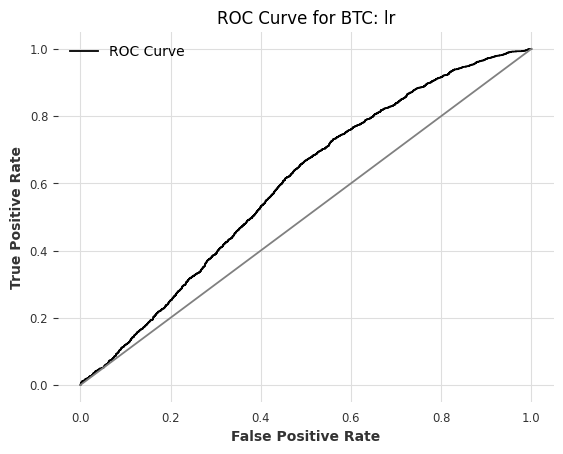

AUCスコア: 0.5956064120483939
AUCスコアは1に近いほどよい


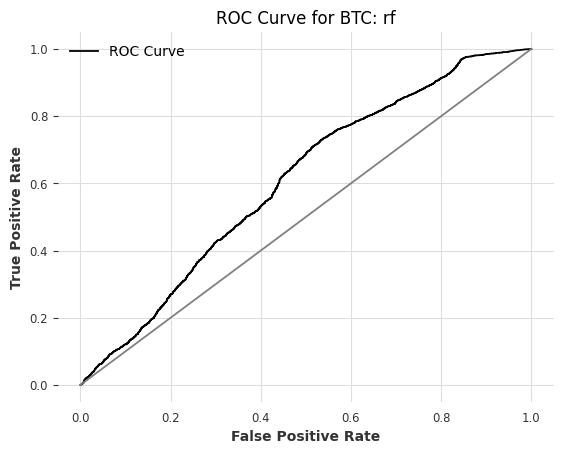

AUCスコア: 0.6063751020646969
AUCスコアは1に近いほどよい


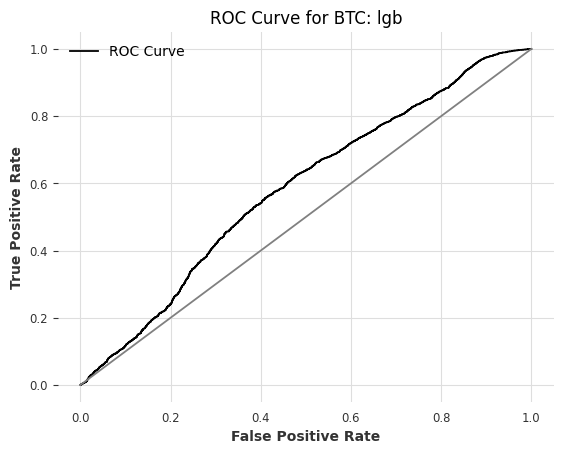

AUCスコア: 0.5841564154471605
AUCスコアは1に近いほどよい


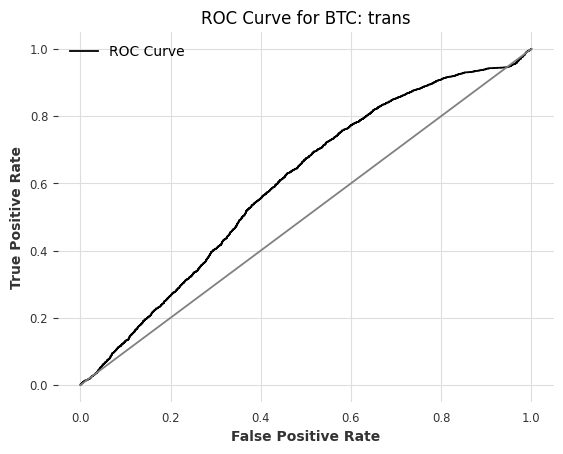

AUCスコア: 0.5995281964843515
AUCスコアは1に近いほどよい


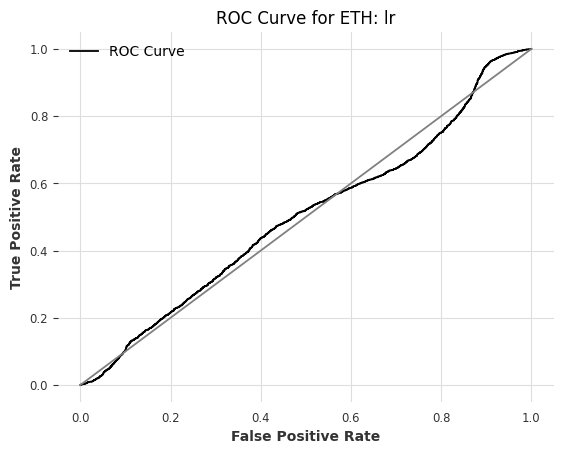

AUCスコア: 0.5008780529191943
AUCスコアは1に近いほどよい


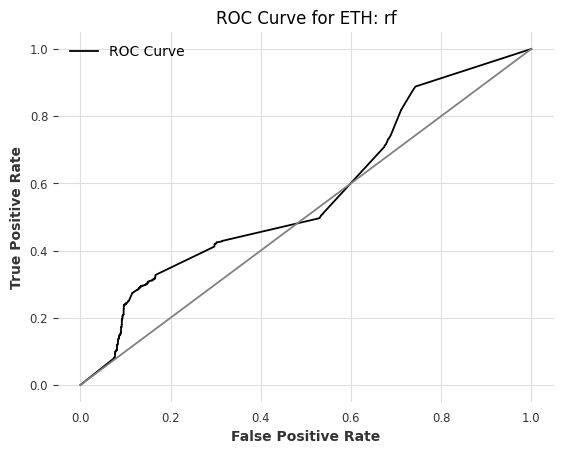

AUCスコア: 0.5663150932699836
AUCスコアは1に近いほどよい


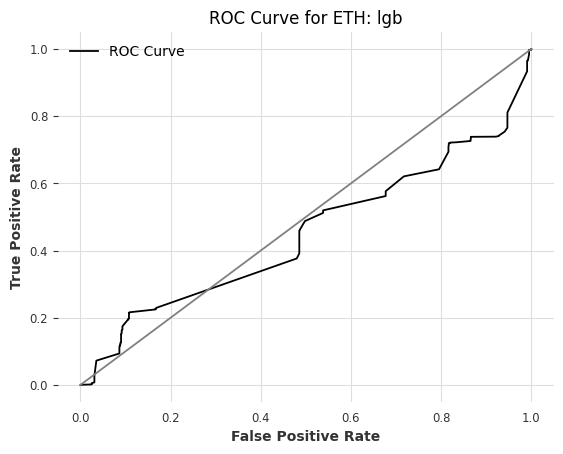

AUCスコア: 0.44986475177496427
AUCスコアは1に近いほどよい


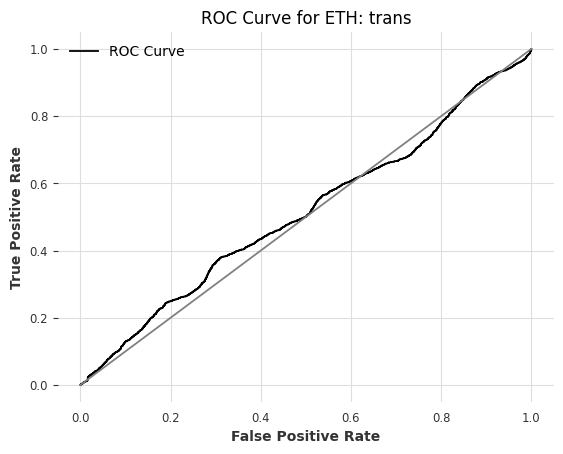

AUCスコア: 0.5120391745500403
AUCスコアは1に近いほどよい


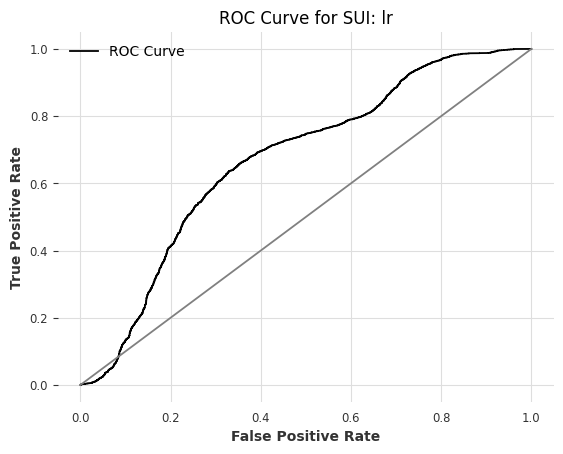

AUCスコア: 0.6705291015534829
AUCスコアは1に近いほどよい


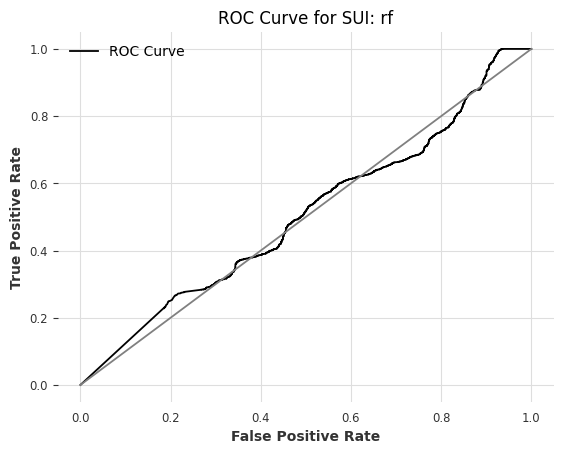

AUCスコア: 0.505389085558463
AUCスコアは1に近いほどよい


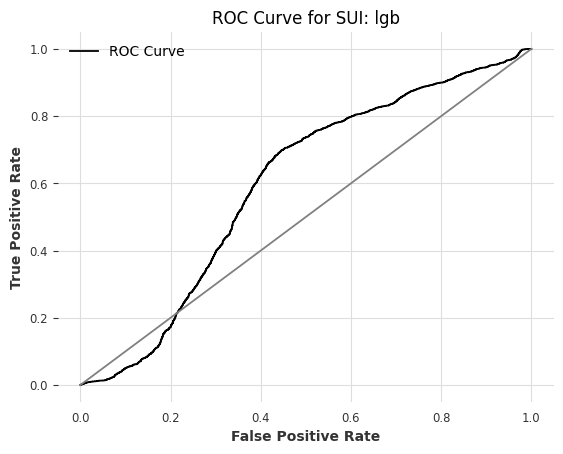

AUCスコア: 0.5964595381102942
AUCスコアは1に近いほどよい


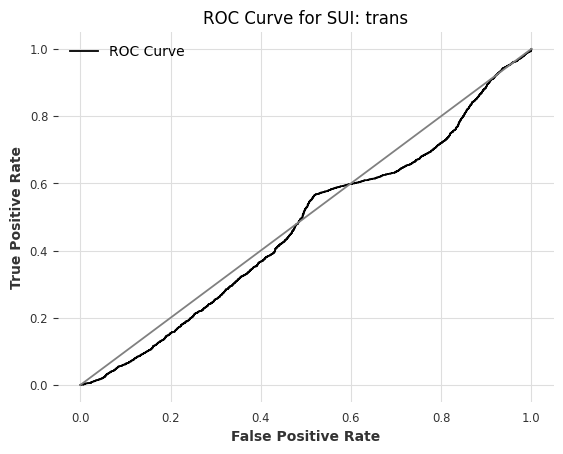

AUCスコア: 0.4693333472334126
AUCスコアは1に近いほどよい


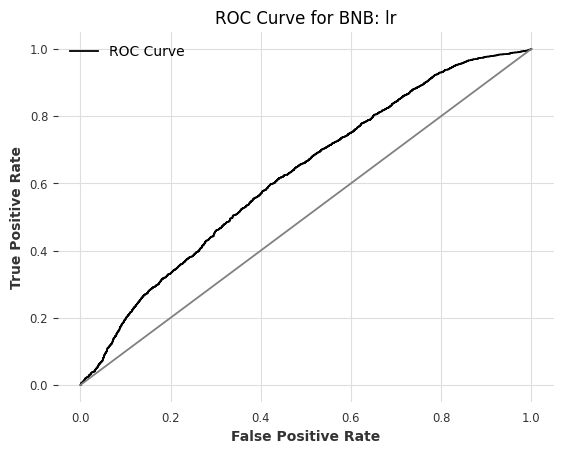

AUCスコア: 0.6223360781151104
AUCスコアは1に近いほどよい


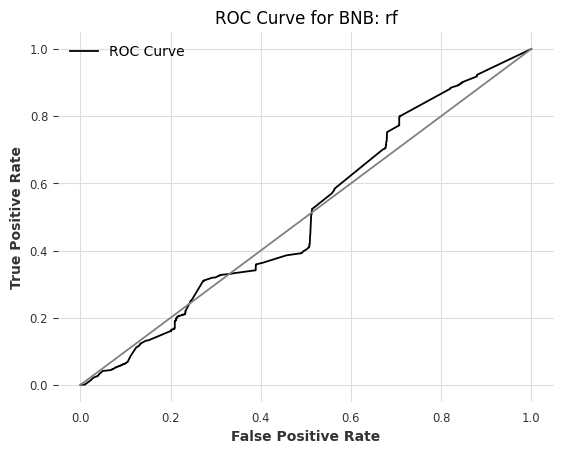

AUCスコア: 0.5071486729681216
AUCスコアは1に近いほどよい


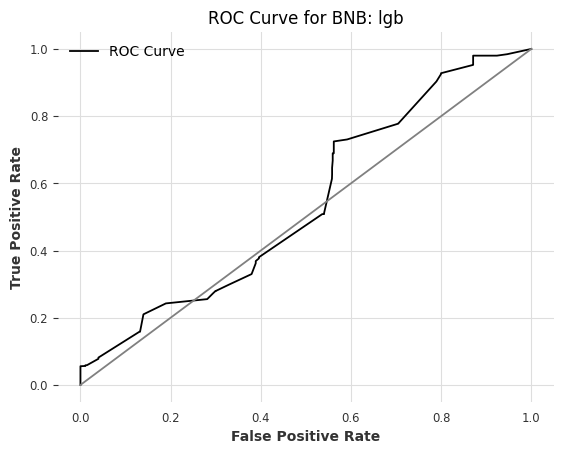

AUCスコア: 0.5429709803046607
AUCスコアは1に近いほどよい


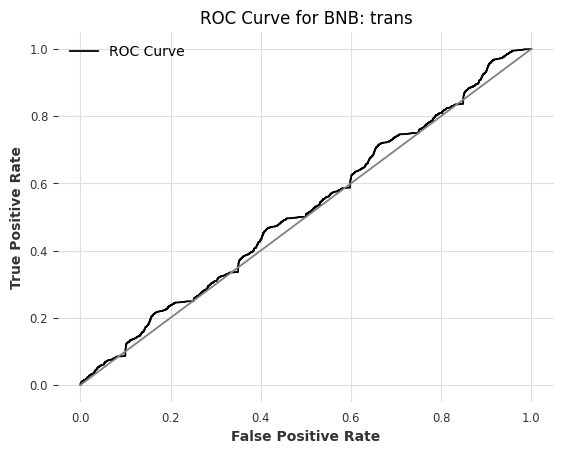

AUCスコア: 0.5197017693500143
AUCスコアは1に近いほどよい


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

for symbol in symbols:
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    for model_name, _ in models.items():
        fpr, tpr, _ = roc_curve(y_test, predict_probs[f'{symbol}_{model_name}'][:,1])
        plt.plot(fpr, tpr, label="ROC Curve")
        plt.plot([0, 1], [0, 1], linestyle="-", color="grey")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {symbol}: {model_name}")
        plt.grid(True)
        plt.legend()
        plt.show()

        print("AUCスコア:", roc_auc_score(y_test, predict_probs[f'{symbol}_{model_name}'][:,1]))
        print("AUCスコアは1に近いほどよい")

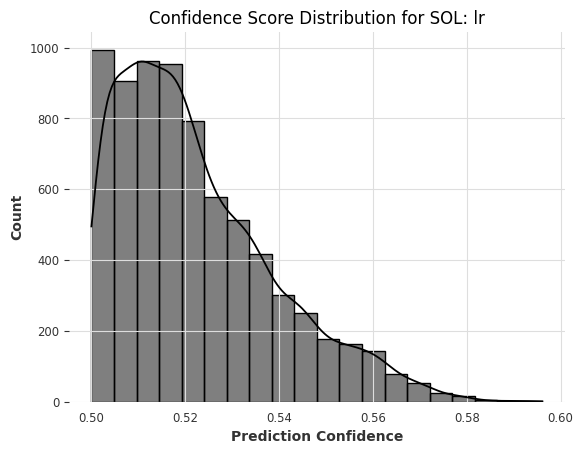

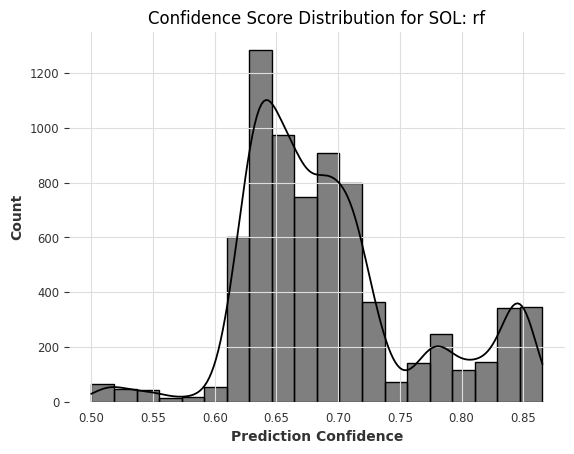

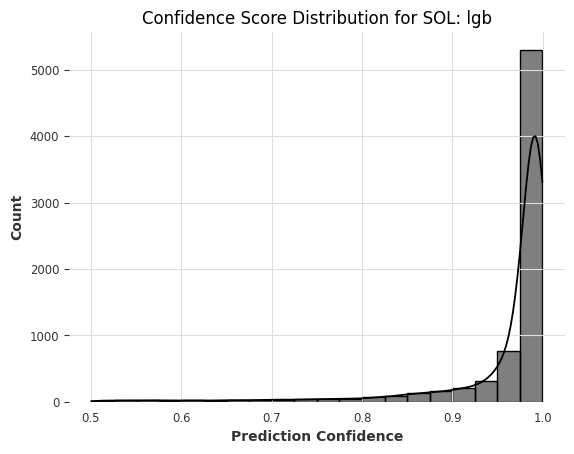

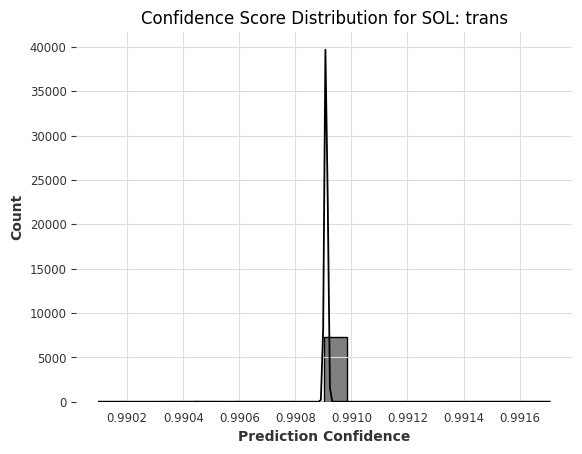

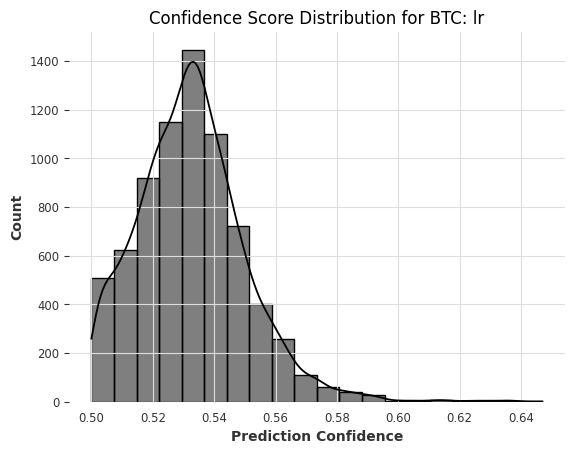

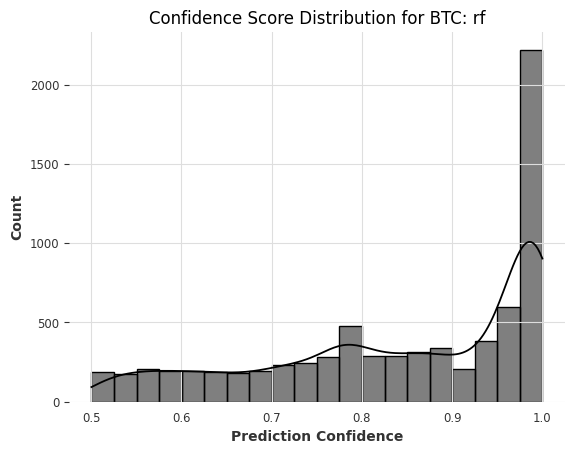

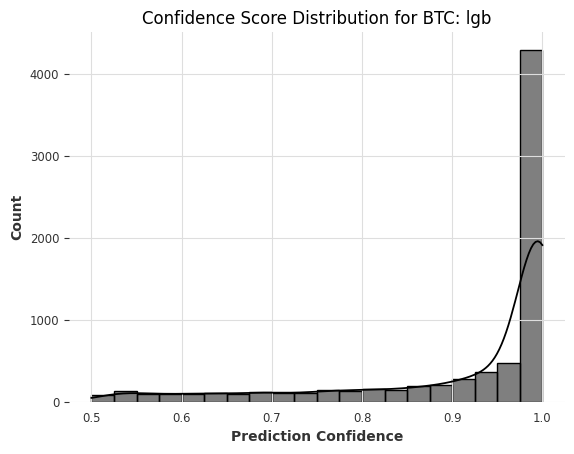

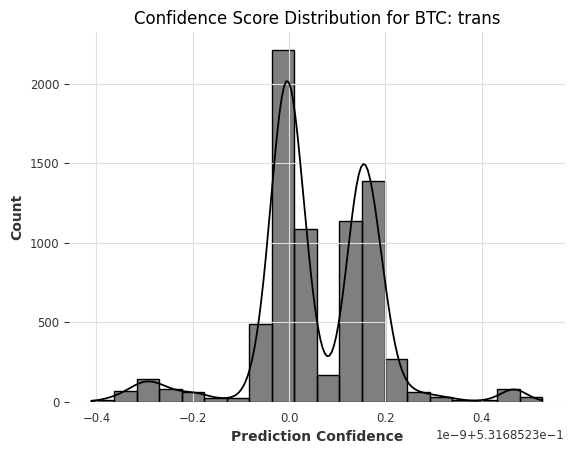

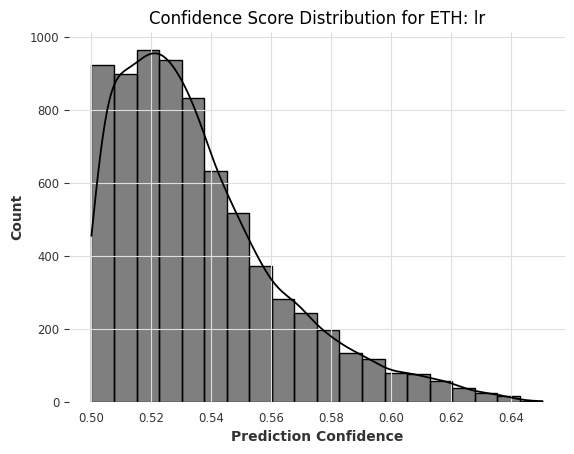

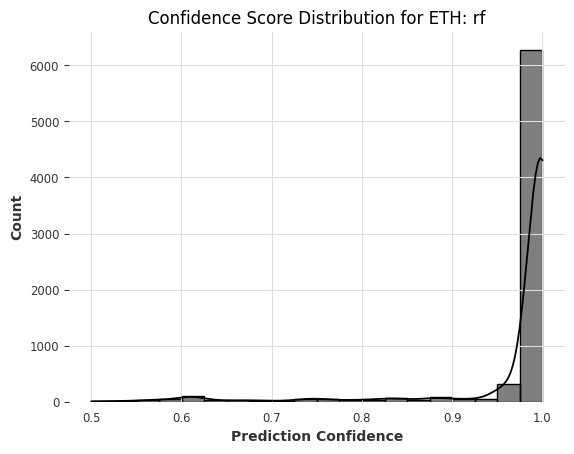

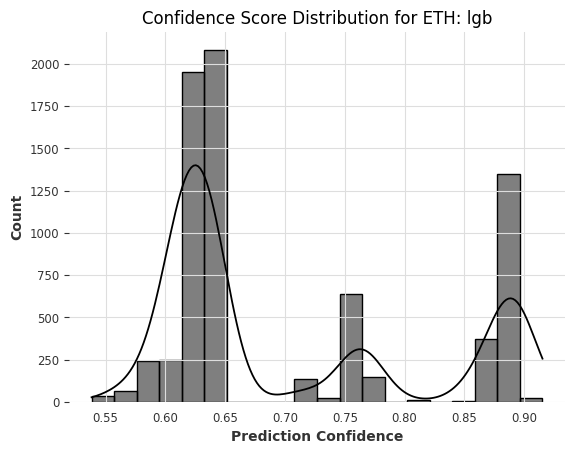

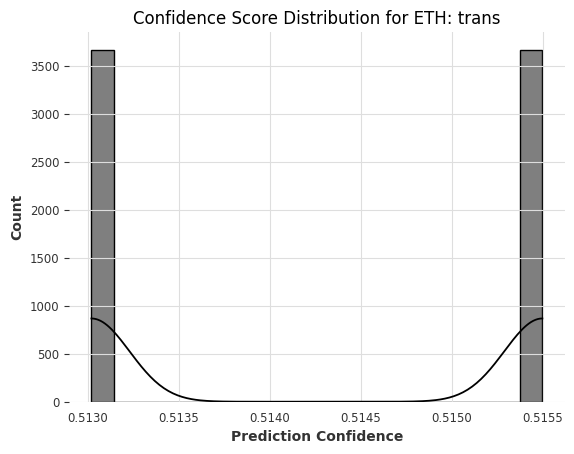

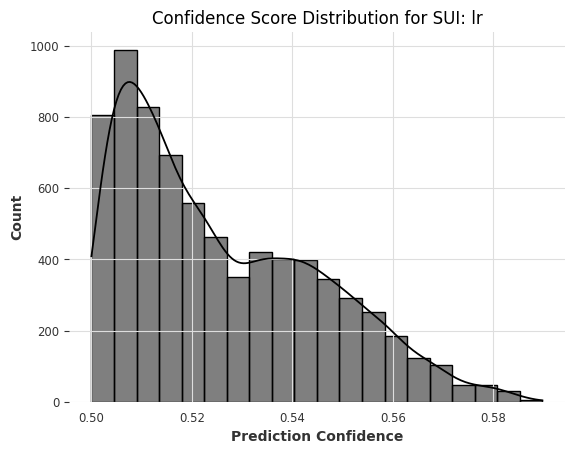

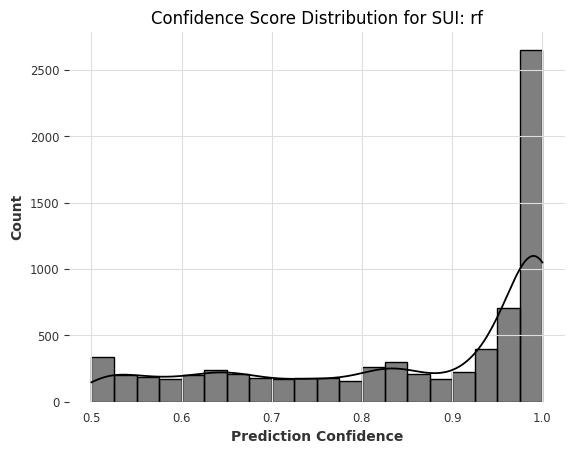

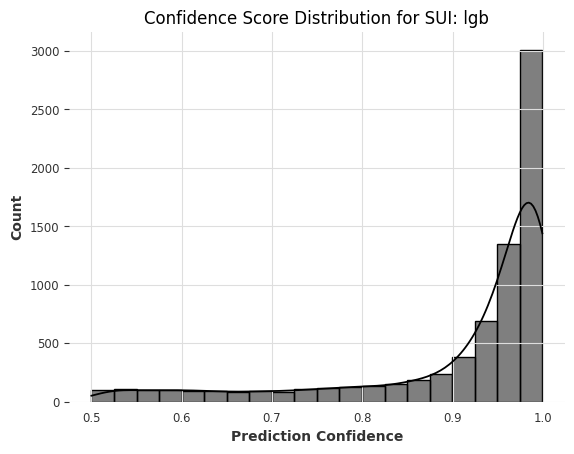

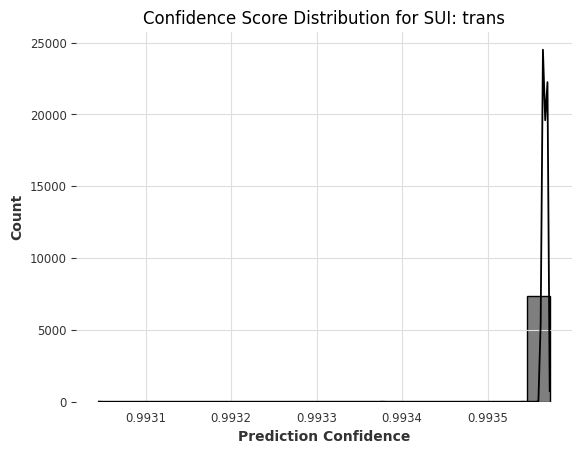

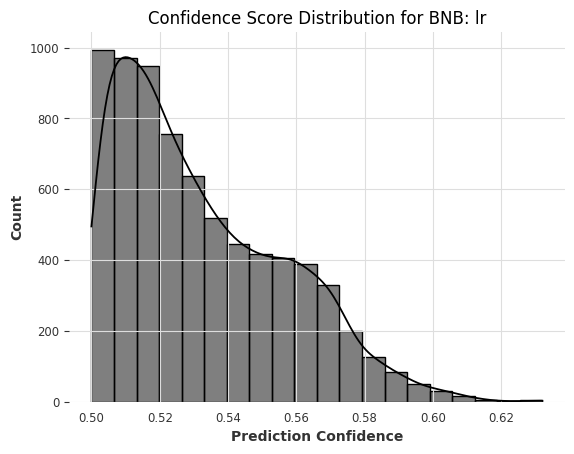

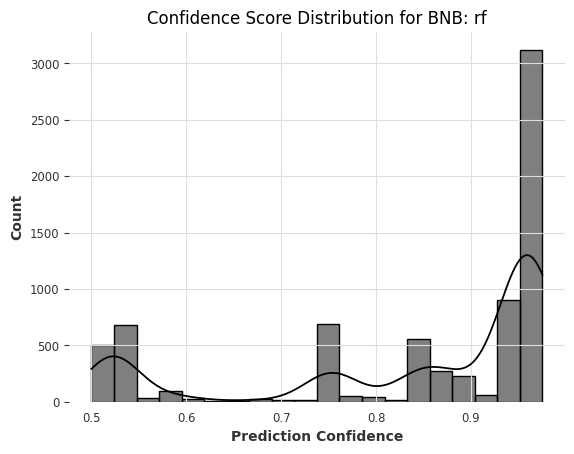

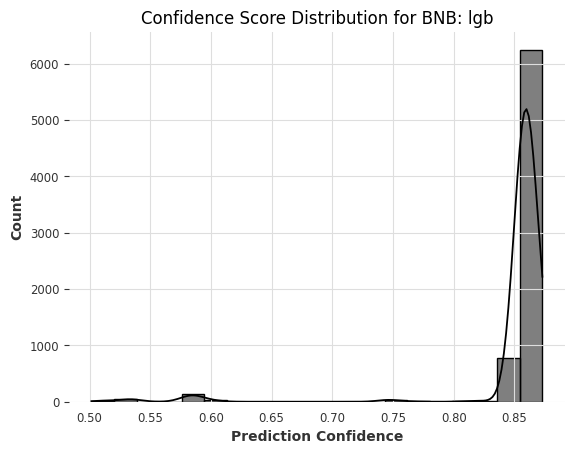

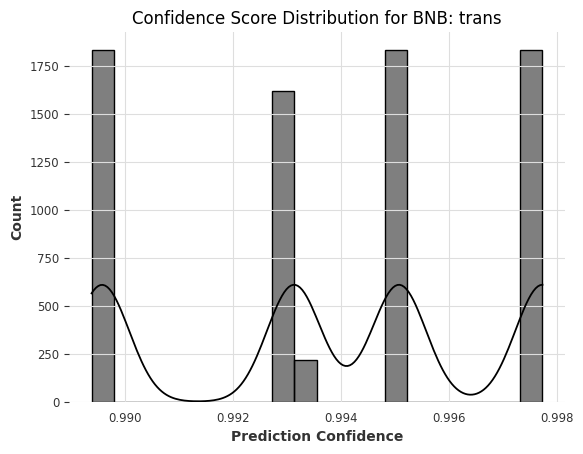

分布の山が右によってるほど予測に確信があり、左に寄っているほど自信がない


In [ ]:
import numpy as np
import seaborn as sns

for symbol in symbols:
#    X = dfs[symbol].drop(columns=['target_lag'])
#    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

    for model_name, _ in models.items():
        #confidences = np.max([y_prob[:,0],1 - y_prob[:,0]], axis=1)
        confidences = np.max(predict_probs[f'{symbol}_{model_name}'], axis=1)
        sns.histplot(confidences, bins=20, kde=True)
        plt.xlabel("Prediction Confidence")
        plt.ylabel("Count")
        plt.title(f"Confidence Score Distribution for {symbol}: {model_name}")
        plt.grid(True)
        plt.show()

print('分布の山が右によってるほど予測に確信があり、左に寄っているほど自信がない')

# Experimental evaluation





In [ ]:
print(date)
# 差分がターゲットの場合はシミュレーションは無意味
if target != 'diff':
    # シミュレーション
    for symbol in symbols:
        for model_name, _  in models.items():
            print(symbol,model_name)
            try:
                evals[symbol + '_' + model_name].print_evaluation()
                evals[symbol + '_' + model_name].plot_evaluation(file_name = f'fig_{symbol}_{model_name}_{date}.eps')
            except:
                print('cannot calculate metrics')


2025-08-15


In [ ]:
# 学習済みモデルを呼び出す
#date = '2025-01-15'
#date = '2025-07-13'
#date = today
saved_date = '2025-08-24'
loaded_coin_models = {}

for symbol in symbols:
    for model_name, model_class in models.items():
        print(symbol, model_name)

        # モデルをパラメータ付きで再インスタンス化
        try:
#            params = params_dict.get(model_name, {})  # 該当するパラメータを取得
            params = params_dict[symbol][model_name]  # 該当するパラメータを取得
            model = model_class(params)  # パラメータを渡して初期化
        except TypeError as e:
            print(f"Error while initializing {model_name}: {e}")
            continue

#    for model in models:
        file_name = symbol + '_' + model_name + '_' + saved_date
        print(symbol,model_name)
        try:
#            loaded_coin_models[symbol + '_' + model] = coin_models[symbol + '_' + model]._load_model(nidek_path, file_name)
            loaded_coin_models[symbol + '_' + model_name] = model._load_model(model_path, file_name)
        except Exception as e:
            print(symbol,model_name,f"Error loading model with ", e)

SOL lr
SOL lr
SOL rf
SOL rf
SOL lgb
SOL lgb
SOL trans
SOL trans
try load 0
Loading pickle file: drive/MyDrive/ColabNotebooks/CryptMarket/Models/SOL_trans_2025-08-24.pkl
Files in drive/MyDrive/ColabNotebooks/CryptMarket/Models/price_prediction_transformer before loading model: ['checkpoints', '_model.pth.tar.ckpt', '_model.pth.tar']
SOL trans Error loading model with  Neither model file (drive/MyDrive/ColabNotebooks/CryptMarket/Models/SOL_trans_2025-08-24.pth) nor checkpoint file (drive/MyDrive/ColabNotebooks/CryptMarket/Models/price_prediction_transformer/checkpoints/SOL_trans_2025-08-24.pth.ckpt) found
BTC lr
BTC lr
BTC rf
BTC rf
BTC lgb
BTC lgb
BTC trans
BTC trans
try load 0
Loading pickle file: drive/MyDrive/ColabNotebooks/CryptMarket/Models/BTC_trans_2025-08-24.pkl
Files in drive/MyDrive/ColabNotebooks/CryptMarket/Models/price_prediction_transformer before loading model: ['checkpoints', '_model.pth.tar.ckpt', '_model.pth.tar']
BTC trans Error loading model with  Neither model file 

In [ ]:
"""
# 学習済みモデルを呼び出す
file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/"
date = '2025-01-15'
date = '2025-07-11'
#date = today

loaded_coin_models = {}

for symbol in symbols:
    for model in models:
        file_name = symbol + '_' + model + '_' + date
        print(symbol,model)
        try:
#            loaded_coin_models[symbol + '_' + model] = coin_models[symbol + '_' + model]._load_model(file_path, file_name)
            loaded_coin_models[symbol + '_' + model] = base.ModelWrapper._load_model(file_path, file_name)
        except Exception as e:
            print(symbol,model,f"Error loading model with ", e)

"""

'\n# 学習済みモデルを呼び出す\nfile_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/"\ndate = \'2025-01-15\'\ndate = \'2025-07-11\'\n#date = today\n\nloaded_coin_models = {}\n\nfor symbol in symbols:\n    for model in models:\n        file_name = symbol + \'_\' + model + \'_\' + date\n        print(symbol,model)\n        try:\n#            loaded_coin_models[symbol + \'_\' + model] = coin_models[symbol + \'_\' + model]._load_model(file_path, file_name)\n            loaded_coin_models[symbol + \'_\' + model] = base.ModelWrapper._load_model(file_path, file_name)\n        except Exception as e:\n            print(symbol,model,f"Error loading model with ", e)\n\n'

In [ ]:
#coin_models['BTC_LR']

#lr = LinearRegressionModel()

In [ ]:
#lr._load_model(file_path,"BTC_LR_2025-01-19")

In [ ]:
#X_tmp = dfs['BTC'].drop(columns=['value_lag'])
#y_tmp = dfs['BTC']['value_lag']

In [ ]:
#lr.predict(X_tmp)

In [ ]:
#coin_models['BTC_trans'].save_model("",'model')
#load_model = coin_models['BTC_trans']._load_model("",'model')
#load_model.Xtrain

In [ ]:
#loaded_coin_models['BTC_trans'].X_train
#coin_models['BTC_trans']._estimator_type

In [ ]:
#loaded_coin_models['BTC_trans'].X_train
#print(type(coin_models['BTC_trans'].X_train))

In [ ]:
#print('original',vars(coin_models['BTC_trans']))
#print('loaded',vars(loaded_coin_models['BTC_trans']))

In [ ]:

#　もとのモデルとロードしたモデルが同じ予測値を出力するかどうかを確認する
for symbol in symbols:
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    for model in models:
        print(symbol,model)
        try:
            print('Current model prediction', coin_models[symbol + '_' + model].predict(X_test))
            print('Loaded model prediction', loaded_coin_models[symbol + '_' + model].predict(X_test))
        except Exception as e:
            print(symbol,model,f"Error loading model with ", e)


SOL lr
Current model prediction [1 1 1 ... 0 0 0]
Loaded model prediction [1 1 1 ... 0 0 0]
SOL rf
Current model prediction [1. 1. 1. ... 0. 0. 0.]
Loaded model prediction [1. 1. 1. ... 0. 0. 0.]
SOL lgb
Current model prediction [1. 1. 1. ... 0. 0. 0.]
Loaded model prediction [1. 1. 1. ... 0. 0. 0.]
SOL trans
I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-06-24 14:05:00', '2025-06-24 14:10:00',
               '2025-06-24 14:15:00', '2025-06-24 14:20:00',
               '2025-06-24 14:25:00'],
              dtype='datetime64[ns]', name='timestamp', freq='5min') ... DatetimeIndex(['2025-08-14 11:45:00', '2025-08-14 11:50:00',
               '2025-08-14 11:55:00', '2025-08-14 12:00:00',
               '2025-08-14 12:05:00'],
              dtype='datetime64[ns]', name='timestamp', freq='5min')
X_train tail: DatetimeIndex(['2025-07-19 22:35:00', '2025-07-19 22:40:00',
               '2025-07-19 22:45:00',

# 特徴量の評価

In [ ]:
#!pip install pdpbox

In [ ]:
#!pip install --upgrade pdpbox

In [ ]:
#!pip --version
#!pip install --upgrade pip


In [ ]:
#!pip uninstall pdpbox -y
#!pip cache purge # キャッシュを完全にクリア
#!pip install pdpbox --upgrade --no-cache-dir

In [ ]:
# 評価指標は回帰と分類で異なる
if target == 'diff':
    scoring = 'neg_log_loss'
else:
    scoring = 'neg_root_mean_squared_error'

from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import traceback
#from pdpbox import pdp, info_plots#, get_dataset
from interpret import show
from interpret.blackbox import PartialDependence

pdp = {}
pfi = {}
result_file_path = "drive/MyDrive/ColabNotebooks/CryptMarket/Results/"


#for model in coin_models:
#    print(model)
#for symbol in symbols:
for symbol in symbols:
    feature_results = {}
    # 説明変数と目的変数を指定
    X = dfs[symbol].drop(columns=['target_lag'])
    y = dfs[symbol]['target_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

#    print('標準的な線形回帰モデルで実験')
#    lr_model = LinearRegression()
#    print(lr_model._estimator_type)
#    lr_model.fit(X_train,y_train)

#    print('パッケージのLightGBMモデルで実験')
#    lgb_model = LightGBMModel(param_lgb)
#    print(lgb_model._estimator_type)
#    lgb_model.fit(X_train,y_train)

#    print('カスタムモデルで実験')
#    tmp_model = LinearRegressionModel()
#    print('tmp_model',tmp_model._estimator_type)
#    tmp_model.fit(X_train, y_train)
 #   print(tmp_model.is_fitted)
#    try:
        # モデルが学習済みか確認
#        print("Is model fitted?", hasattr(tmp_model.model, "coef_"))

        # partial_dependenceの呼び出し
#        pdp_direct = partial_dependence(
#            estimator=tmp_model,
#            X=X_test,
#            features=['Amihud Measure'],
#            kind='both'
#        )

#        pdp_feature = pdp.pdp_isolate(
#            model=lr_model,
#            dataset=X,
#            model_features=X.columns.tolist(),
#            feature='Amihud Measure'
#        )
#        pdp_feature = pdp.PDPIsolate(
#            model=lgb_model,
#            df=X,
#            model_features=X.columns.tolist(),
#            feature = 'Amihud Measure',
#            feature_name='Amihud Measure',
#            pred_func = lgb_model.predict
#        )
#        pdp = PartialDependence(lgb_model, X_train)
#        pdps[symbol] = pdp

#        feature_names = X_train.columns

#        for i, feature_name in enumerate(feature_names):
#            feature_results[feature_name] = pdp.explain_global().data(i)

        # データフレームに変換して保存
#        df_results = pd.DataFrame.from_dict(feature_results, orient='index')
#        df_results.to_csv(file_path + f"pd_results_{symbol}.csv")

        # プロットの表示
#        pdp.pdp_plot(pdp_feature, 'Amihud Measure')



#        print(pdp_direct)
#    except Exception as e:
#        print(f"Error type: {type(e)}")
#        print(f"Error: {e}")
#        print(traceback.format_exc()) # tracebackを出力
#        print(tmp_model.__dict__)
#        print(dir(tmp_model)) # dir()の結果を出力

    for model in models:
        print(f"Permutation Importance:{symbol,model}")
        # 特徴量の重要度を計算する
        try:
            perm_imp_result = \
            permutation_importance(
                coin_models[symbol + '_' + model],
                #loaded_coin_models[symbol + '_' + model],
                X_test,
                y_test,
                n_repeats=3,
                scoring = scoring,
                random_state=42,
                n_jobs=1)
            # データを DataFrame に変換
            feature_importance = pd.DataFrame({
                "Feature": X_test.columns, # Columns name
                "Importance Mean": perm_imp_result.importances_mean,
                "Importance Std": perm_imp_result.importances_std
                })
            feature_importance.to_csv(result_file_path + f"pf_results_{symbol + '_' + model}" + date + ".csv")
            pfi[symbol + '_' + model] = perm_imp_result


        except Exception as e:
            print(f"Error: {str(e)}")

        print(f"Partial Dependence:{symbol,model}")
        try:
#            print('try Partial Dependence of '+model)
#            X_test = X_test.reset_index(drop=True)
#            print(f'Before putting into, index of X_test {X_test.index}')
            pdp[symbol + '_' + model]  = PartialDependence(
#                loaded_coin_models[symbol + '_' + model], X_test)
                coin_models[symbol + '_' + model], X_test)
#            print('We suceed Partial Dependence of ' + model)
            feature_names = X_train.columns

            for i, feature_name in enumerate(feature_names):
                feature_results[feature_name] = pdp[symbol + '_' + model].explain_global().data(i)
                # データフレームに変換して保存
                df_results = pd.DataFrame.from_dict(feature_results, orient='index')
                df_results.to_csv(result_file_path + f"pd_results_{symbol + '_' + model}" + date + ".csv")
                if symbol == 'BTC' and model == 'RF':
                    print(df_results)

        except Exception as e:
            print(f"Partial Dependence") #type(e)
            print(f"Error type: {type(e)}")
            print(f"Error: {str(e)}")
            print(traceback.format_exc()) # tracebackを出力

        # 特徴量と予測値の関係を知る
        #coin_models[symbol + '_' + model].fit(X_train, y_train)
#        pdp[symbol + '_' + model] =\
#            partial_dependence(coin_models[symbol + '_' + model],
#                               X_test,
#                               features = ['Amihud Measure'],
#                               kind = 'both')


NameError: name 'target' is not defined

In [ ]:
#symbol = 'BTC'
#X = dfs[symbol].drop(columns=['value_lag'])
#y = dfs[symbol]['value_lag']

    # トレーニングセットと検証セット、テストセットを指定
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#pd_BTC = PartialDependence(coin_models[symbol + '_' + 'RF'], X_test)

In [ ]:
#x = pd_BTC.explain_global().data(3)['names']
#y = pd_BTC.explain_global().data(3)['scores']

#from matplotlib import pyplot as plt

#plt.plot(x[1:],y[1:])

In [ ]:
result_file_path = "drive/MyDrive/ColabNotebooks/CryptMarket/Results/"
date = '2025-08-15'

import pandas as pd

SOL lgb
BTC rf
ETH rf
SUI lr
BNB lr


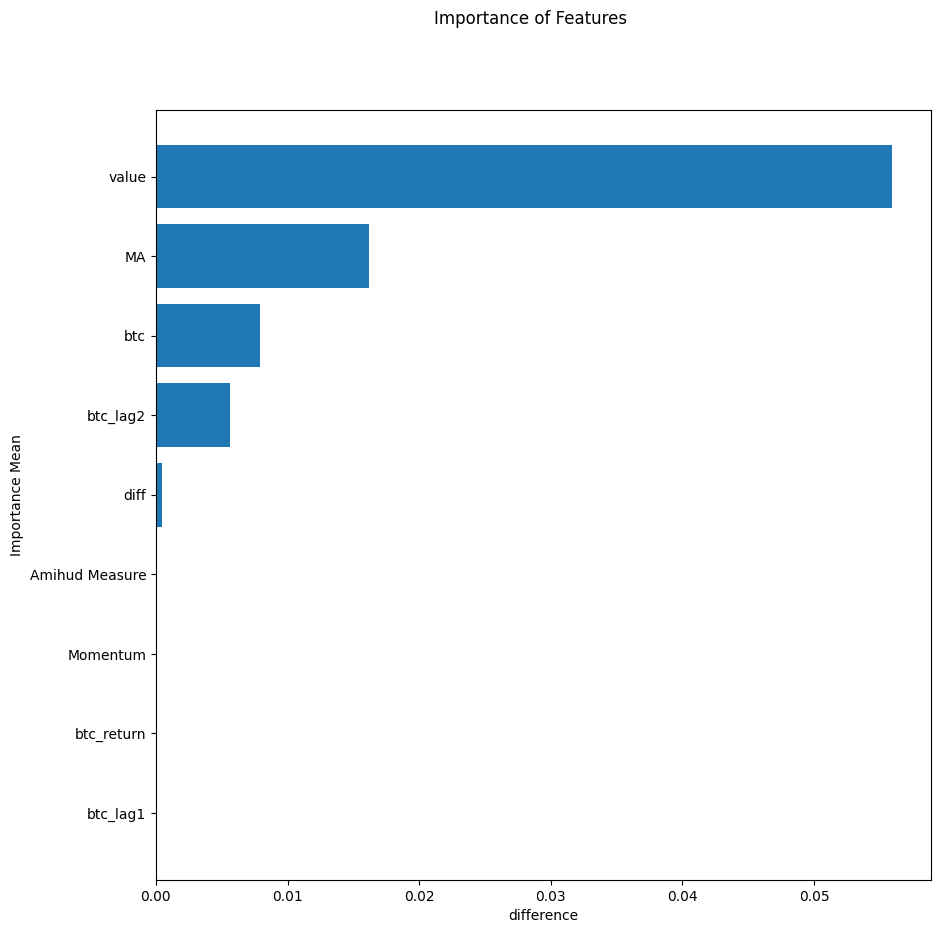

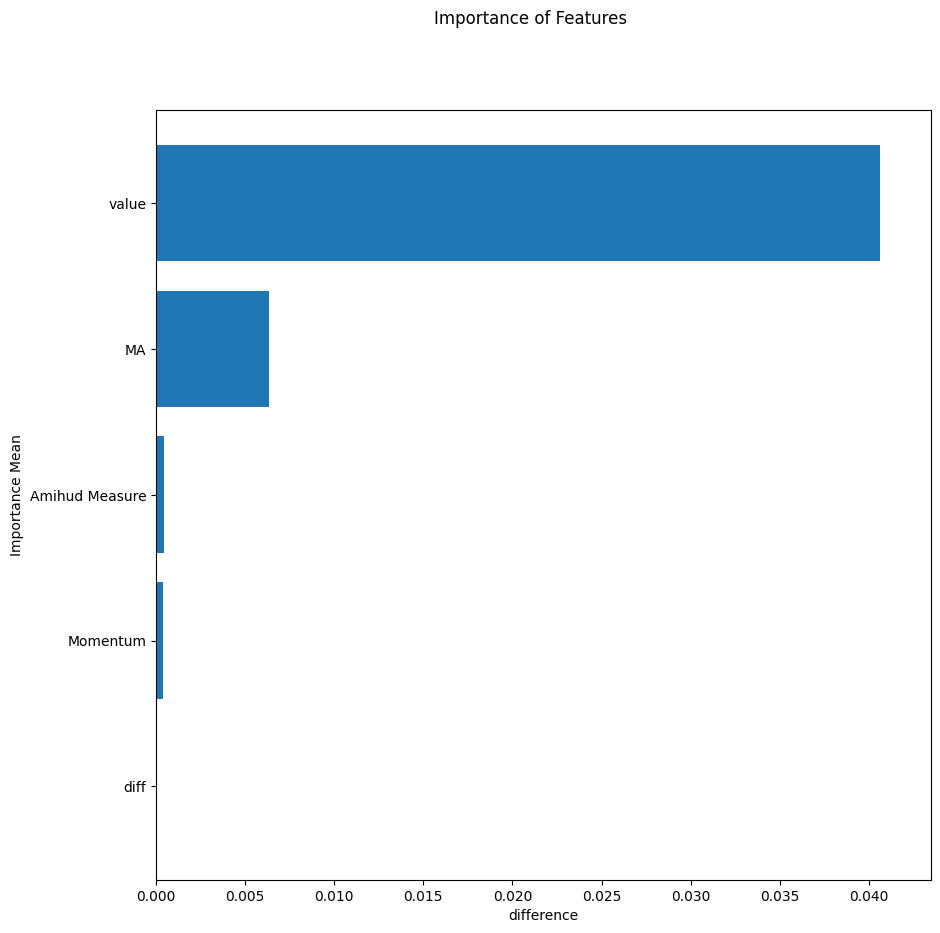

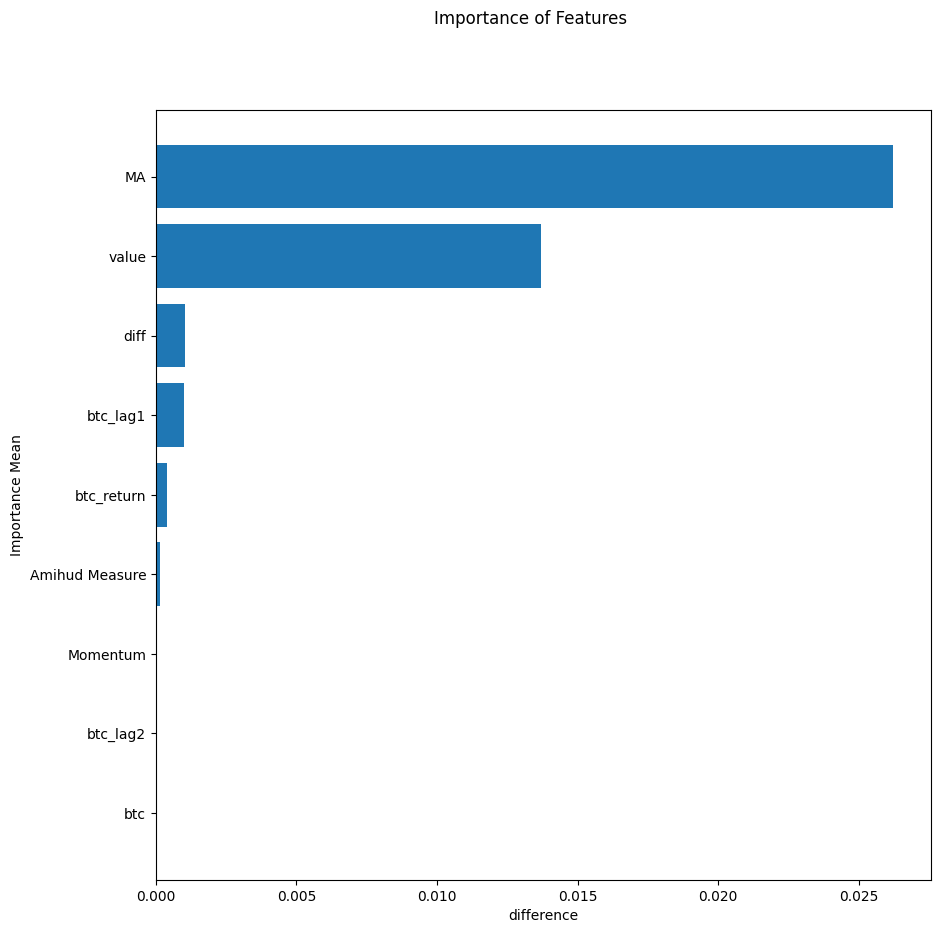

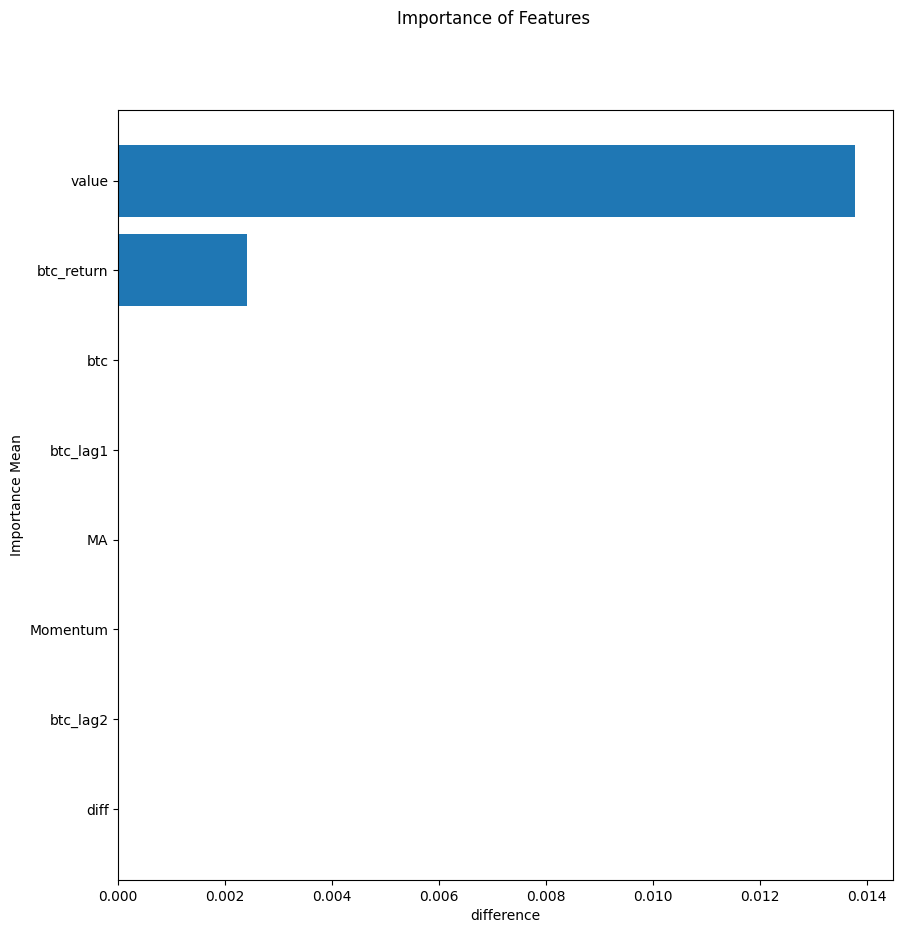

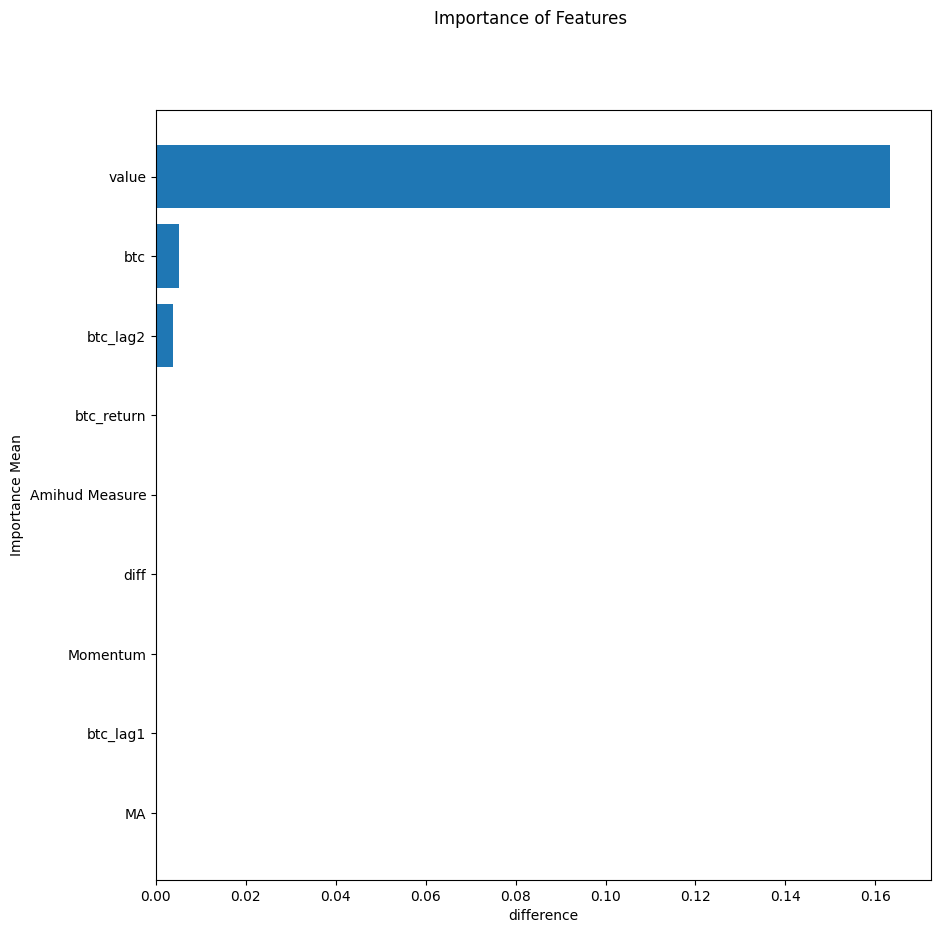

In [ ]:
# PFIの可視化
from matplotlib import pyplot as plt

date
#date = '2025-07-13'

pairs = {'SOL':'lgb',
         'BTC':'rf',
         'ETH':'rf',
         'SUI':'lr',
         'BNB':'lr'}
for pair in pairs:
    print(pair,pairs[pair])
    pfi_result = pd.read_csv(result_file_path + f"pf_results_{pair}_{pairs[pair]}{date}.csv").sort_values(by='Importance Mean', ascending=True)
    fig,ax = plt.subplots(figsize=(10,10))
    ax.barh(pfi_result['Feature'],pfi_result['Importance Mean'])
    ax.set(xlabel = 'difference',ylabel = 'Importance Mean',xlim = (0,None))
    fig.suptitle('Importance of Features')
#    fig.savefig(result_file_path + f"pfi_{pair}_{pairs[pair]}_{date}.eps")


SOL lgb
BTC rf
ETH rf
SUI lr
BNB lr


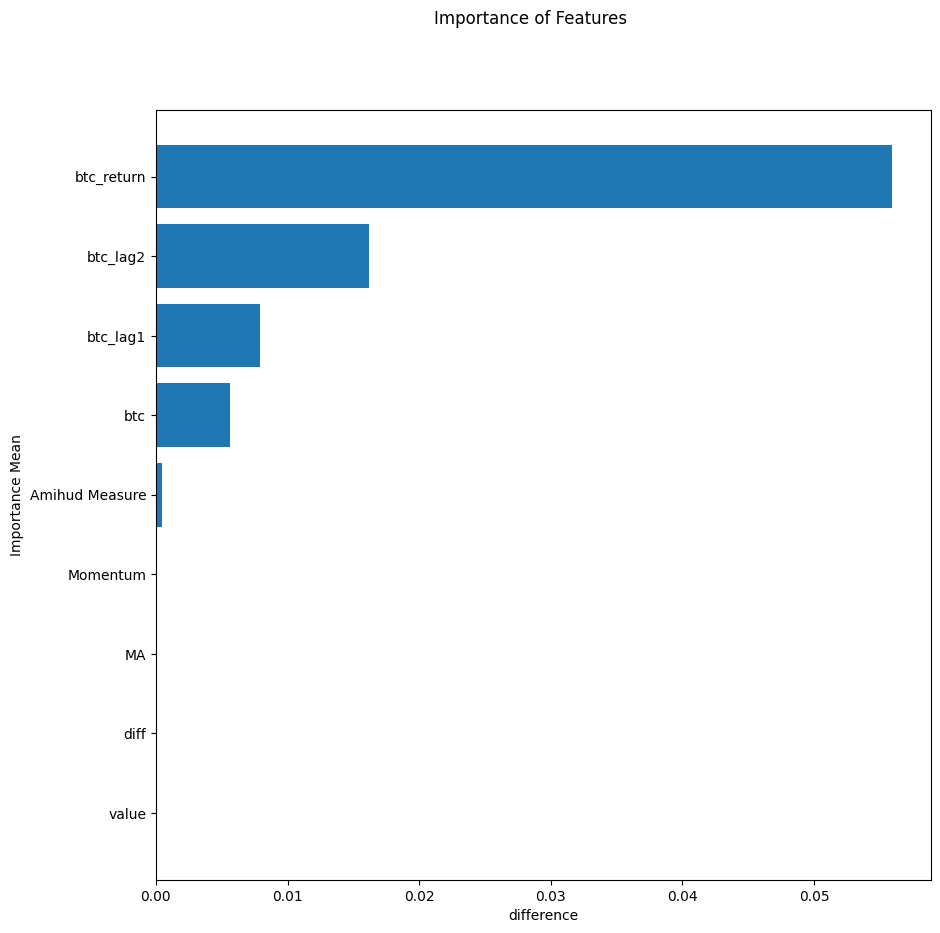

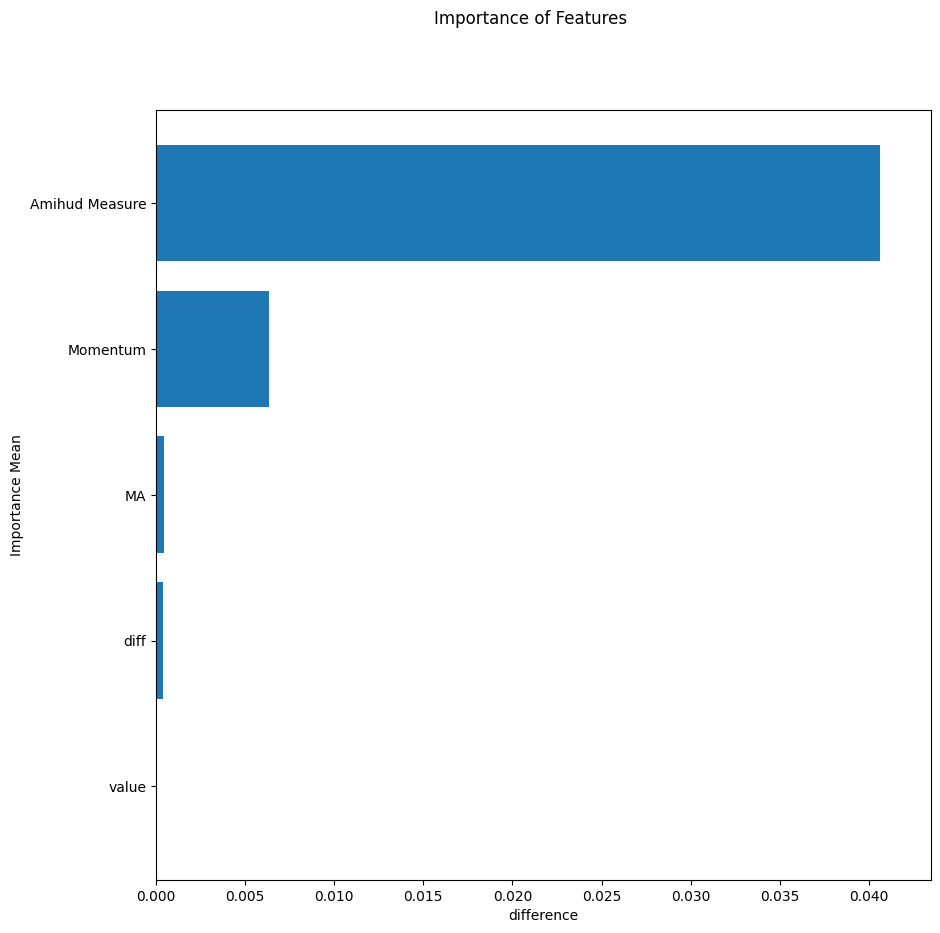

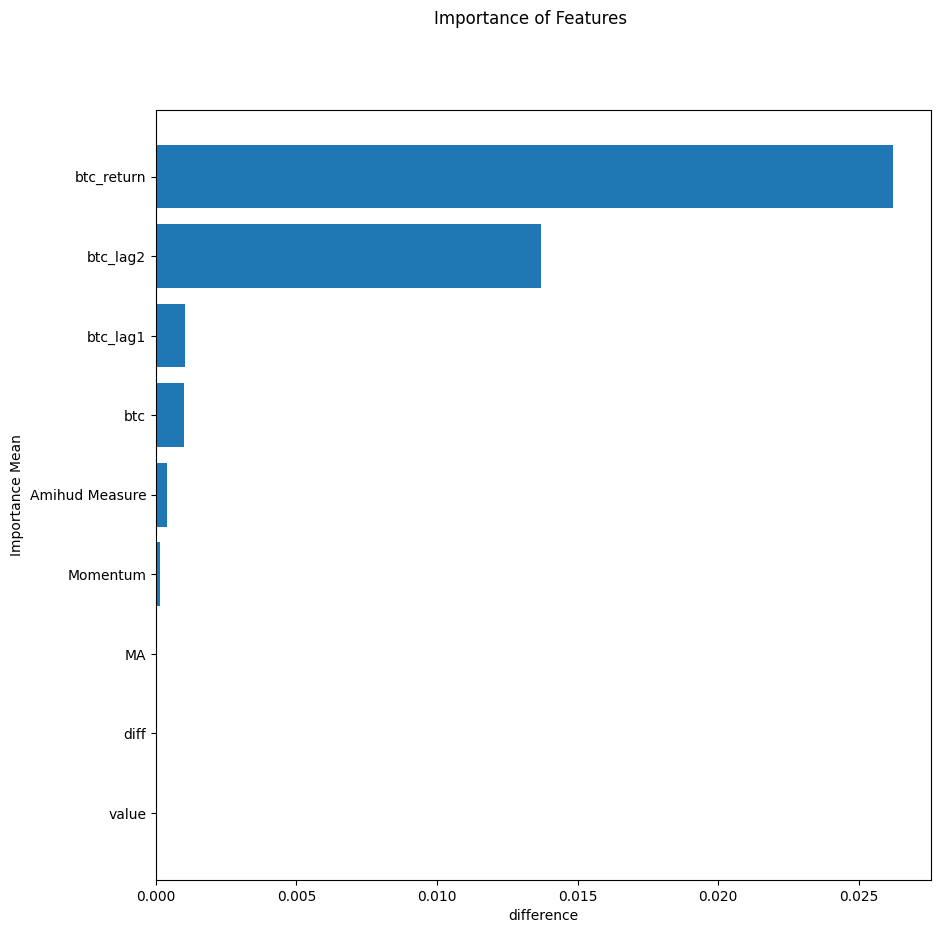

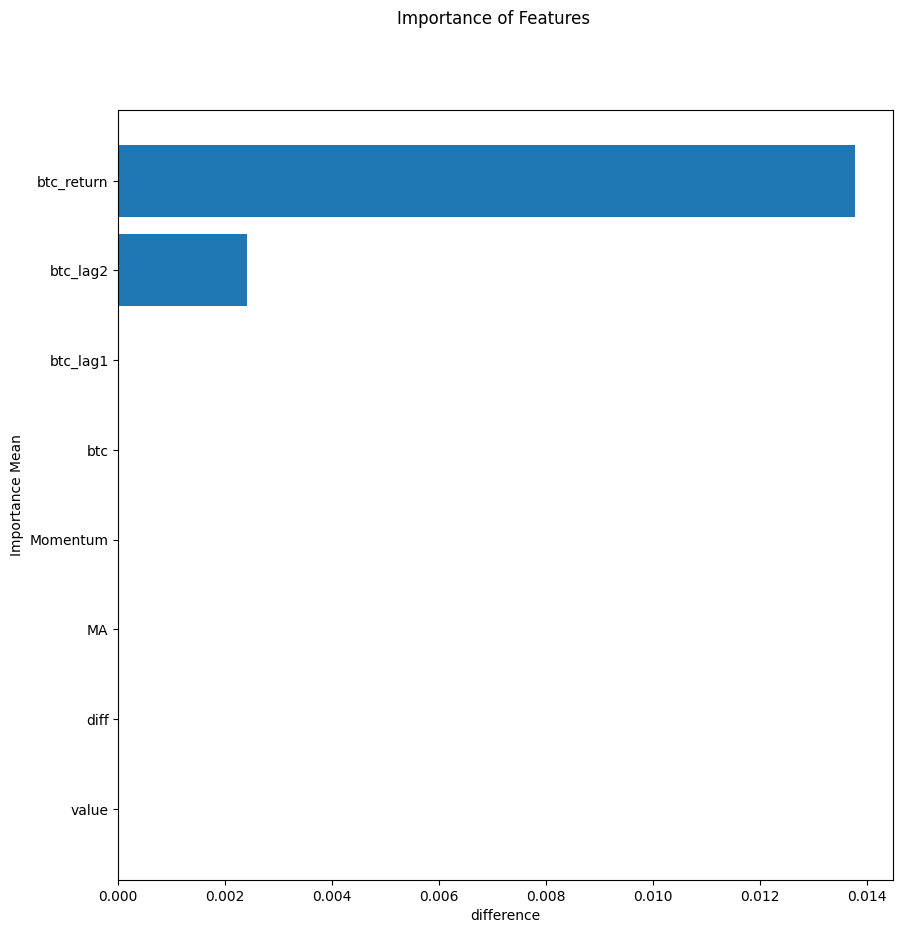

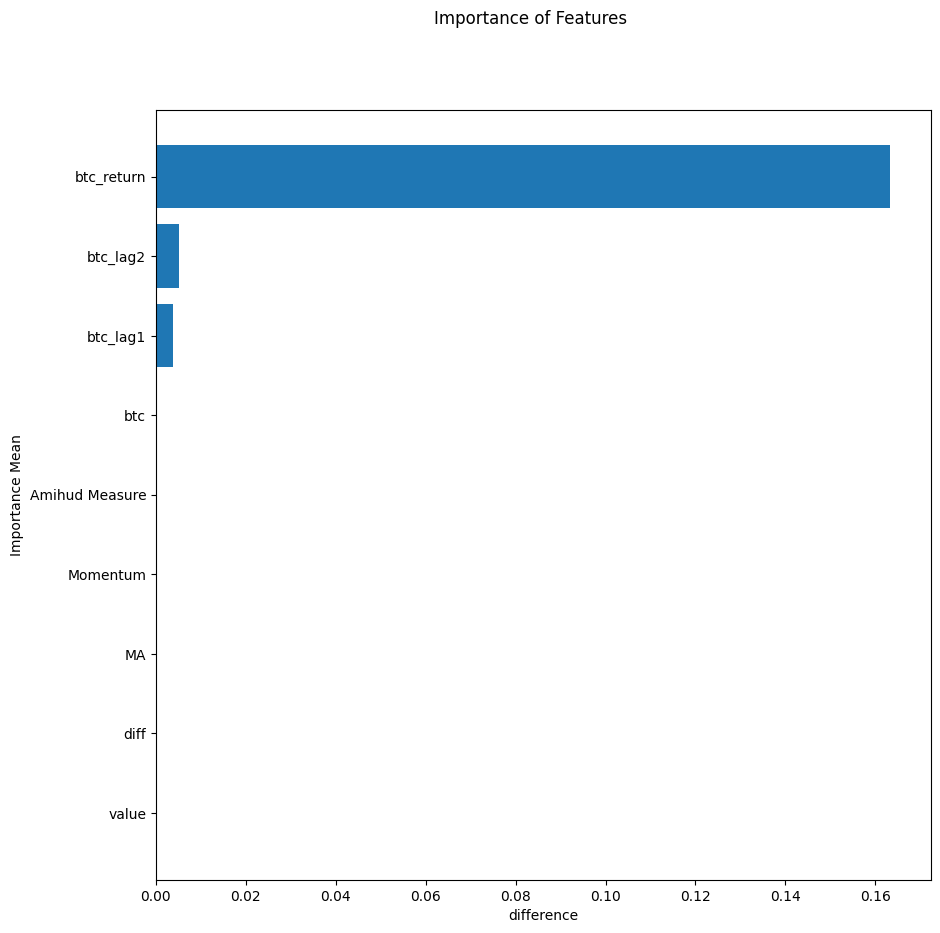

In [ ]:
# PFIの可視化
from matplotlib import pyplot as plt

date
#date = '2025-07-13'

pairs = {'SOL':'lgb',
         'BTC':'rf',
         'ETH':'rf',
         'SUI':'lr',
         'BNB':'lr'}
for pair in pairs:
    print(pair,pairs[pair])
    pfi_result = pd.read_csv(result_file_path + f"pf_results_{pair}_{pairs[pair]}{date}.csv").sort_values(by='Importance Mean', ascending=True)
    fig,ax = plt.subplots(figsize=(10,10))
    ax.barh(dfs[pair].columns[:-1],pfi_result['Importance Mean'])
    ax.set(xlabel = 'difference',ylabel = 'Importance Mean',xlim = (0,None))
    fig.suptitle('Importance of Features')
    fig.savefig(result_file_path + f"pfi_{pair}_{pairs[pair]}_{date}.eps")


まず確認できるのが、SOL, ETH, SUI, BNBいずれのコインにおいてももっとも重要度の高いのがBTCの利回りであり、次にBTCのラグを2時間ほどつけた価格である。BTCの1時間ラグ価格があまり効いてこないのは、BTC利回りが1時間ラグ価格に含まれるため、きちんと影響を除去した結果と解釈できる。つまり、モデルとして解釈しやすいものとなっている。

興味深いのはその他の特徴量がほとんど効いてこないことだ。
自身の過去の価格やトレンド（移動平均やモーメンタム）、そして流動性に至るまで大きなインパクトを与えていない。
ほぼすべてビットコインで説明がついてしまうのだ。

それではビットコイン自体はなにによって説明がつくのか。
もっともインパクトの大きい特徴量はAmihud尺度である。つまり、流動性がもっとも効いているのだ。次に効いてくるのがモーメンタムである。その他の特徴量は互いに相殺しているのか、大きな影響はないようだ。

いずれにせよ、この結果からビットコイン以外のコインの価格はビットコインで説明がつくことがわかる。
したがって、アルトコインの分析においてもっとも重要なのはビットコインであり、ビットコインのダイナミクスが理解できればその他のコインのダイナミクスも理解できる、としても大げさな主張とはいえないだろう。

また、ビットコイン自体の挙動において重要なのは価格トレンドよりも流動性である点も興味深い。
先行研究でもビットコイン価格におけるネットワーク効果の重要性が指摘されている。流動性が重要性をもつのも部分的にはこのことを示唆するのかもしれない。



In [ ]:
# pythonでPDの結果を読み込んでも文字列として認識するので、数値列に変換する必要がある。

def convert_to_float_series(ser):
    try:
        # 1. 不要な記号を削除
        cleaned_string = ser.strip("[]")

        # 2. スペースで区切ってリストに変換
        string_list = cleaned_string.split()

        # 3. 数値に変換（リスト内包表記を使用）
        numbers = [float(num) for num in string_list]

        # 必要に応じてNumPy配列に変換
        array = np.array(numbers)

        return array
    except ValueError:
        return value



SOL lgb
BTC rf
ETH trans


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/ColabNotebooks/CryptMarket/Results/pd_results_ETH_trans2025-08-15.csv'

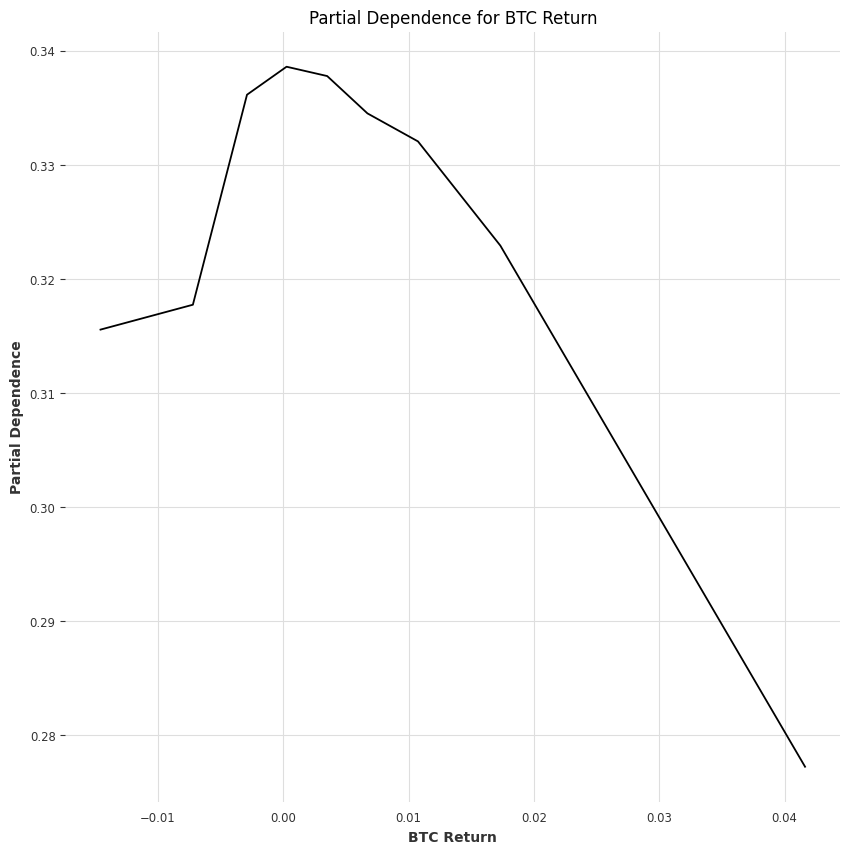

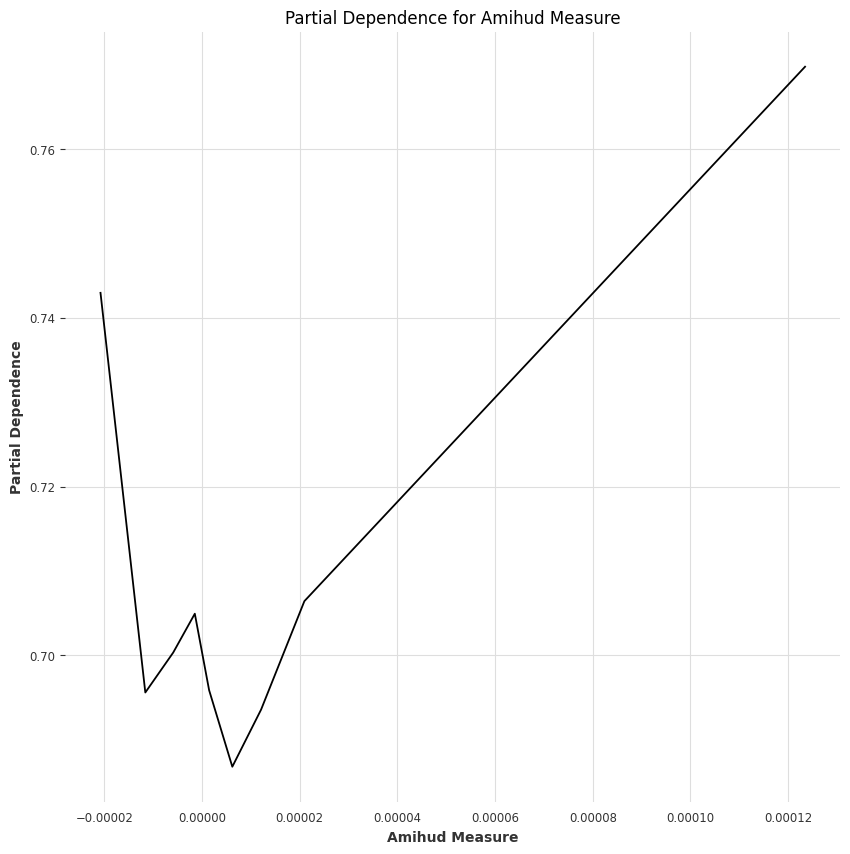

In [ ]:
# Partial Dependenceの可視化1
import numpy as np

for pair in pairs:
    print(pair,pairs[pair])
    pd_result = pd.read_csv(result_file_path + f"pd_results_{pair}_{pairs[pair]}{date}.csv")
    pd_result = pd_result.set_index('Unnamed: 0')
    if pair == 'BTC':
        feature_data = pd_result.loc['Amihud Measure',:]
        feature_name = 'Amihud Measure'
    else:
        feature_data = pd_result.loc['btc_return',:]
        feature_name = 'BTC Return'
    # プロット作成
    x = convert_to_float_series(feature_data['names'])
    y = convert_to_float_series(feature_data['scores'])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(x[1:], y[1:] , label=feature_name) # 最初のデータはノイズが多いので。
    #plt.fill_between(x, feature_0_data['lower_bounds'], feature_0_data['upper_bounds'], color='gray', alpha=0.3, label="Confidence Interval")
    ax.set(xlabel = feature_name, ylabel = "Partial Dependence")
    ax.set_title(f"Partial Dependence for {feature_name}")
#    plt.legend()
#    ax.grid()
    #plt.savefig("feature_0_partial_dependence.png")
    fig.savefig(result_file_path + f"pd_{pair}_{pairs[pair]}_{date}.eps")


重要度の高い特徴量はコインに関わらず共通の特性を示す。
しかし、特徴量の変動にともなう価格変化はまちまちだ。
たとえばSOLはBTCのリターン増にともない単調に価格減少が生じている。
ETHやBNBは下がって上がるが、SUIは増加といった具合だ。
わかりやすいのはBTCの変動で、これは流動性が増すにつれて価格が下がっている。直感的には流動性が低いほうがプレミアムがつくため価格が割高になっていると考えられ、解釈は容易だ。
その他のものについては、これだけではすこし不明な点も多いので、2番めに重要な特徴量についても同じ分析を行ってみよう。

ここで思い出したいのは相関係数だ。
元データで計算した相関係数をみると、たとえばBTC価格とAmihud measureの相関係数は$-0.001396$と小さい。
また、ほかのコインとBTCリターンの相関係数を見ても、
SOLで$0.051671$、
ETHで$0.048859$,
SUIで$0.040666$,
BNBで$0.075475$,と軒並み低い値を示している。
にもかかわらず、特徴量の重要度は高く示している。




In [ ]:
# Partial Dependenceの可視化2
for pair in pairs:
    print(pair,pairs[pair])
    pd_result = pd.read_csv(result_file_path + f"pd_results_{pair}_{pairs[pair]}{date}.csv")
    pd_result = pd_result.set_index('Unnamed: 0')
    if pair == 'BTC':
        feature_data = pd_result.loc['Momentum',:]
        feature_name = 'Momentum'
    else:
        feature_data = pd_result.loc['btc_lag2',:]
        feature_name = 'Lagged BTC'
    # プロット作成
    x = convert_to_float_series(feature_data['names'])
    y = convert_to_float_series(feature_data['scores'])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(x[1:], y[1:] , label=feature_name)
    #plt.fill_between(x, feature_0_data['lower_bounds'], feature_0_data['upper_bounds'], color='gray', alpha=0.3, label="Confidence Interval")
    ax.set(xlabel = feature_name, ylabel = "Partial Dependence")
    ax.set_title(f"Partial Dependence for {feature_name}")
#    plt.legend()
#    ax.grid()
    #plt.savefig("feature_0_partial_dependence.png")
    fig.savefig(result_file_path + f"pd_{pair}_{pairs[pair]}_{date}_supp.eps")


2つ目に重要な特徴量はラグ付きのBTC価格だ。
さきほどの特徴量がBTCの変化率だったので、各コインとの関係を見ても、加速度に対する変動を見ているようなものだったが、今度は以前の価格水準自体に対する関係を表現するものなので、若干解釈しやすいかもしれない。

見てみると、SOLはラグ付きBTC価格の上昇にともなって価格が上昇している。しかし、その他のコインは（BNBがやや不規則な動きをしている個所はあるが）概ね、BTC価格の上昇にともなって価格は減少している。SOLを購入する層が比較的BTCも購入しがちなのに対し、特にETHなどは長くBTCと競合関係にあったことがこのような動きにつながったのかもしれない。



# Robustness check
さて、これで一通りに分析は終了だ。
仮説どおり、BTC以外のコインの価格を説明する要因はBTC、特にそのリターンに依存していることが示された。

しかし、暗号資産市場の変動は大きい。
現在、そうであるからといって将来も長くそうであるとは限らない。
従って、BTCがどこまで支配的な立場を保ち続けるかは誰もわからない。

しかし、幸い1月20日に米国でドナルド・トランプが大統領に就任してから、この市場はひどくボラタイルになっている。
選挙結果がでて就任が決まったあたりで価格に織り込まれているのかと思いきや、ここにきてまた大きな変動が見られるのだ。
そこで、1月20日以降のデータも含めた検証も行ってみよう。



In [ ]:
file_path

In [ ]:
# トランプ就任以後のデータで分析をやり直す

# データの取り直し
date = '2025-01-25'
#file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/"
file_name = "Data/price_data_" + date + ".csv"
df = df_col.collect_price_data_from_csv(file_path,file_name)

# データの加工
# 各通貨のテクニカル指標をまとめたデータフレームを作成する
dfs = {}
# volumeデータ(特にBTC)はゼロになることがあるので処理する
if is_volume:
    df['volume'] = df['volume'].replace(0, 1e-10)

# 予測時間の設定
time_diff = 60

for symbol in symbols:
    indicators = CryptoTechnicalIndicators(df[df['symbol'] == symbol], is_volume = is_volume)
    tech_indexes = {'MA','Amihud Measure','Momentum'}
    dfs[symbol] = indicators.selected_indicators(tech_indexes=tech_indexes,
                                                 time_diff = time_diff)

    # BTC以外のコインにはBTC価格、ラグつきBTC価格、BTC利回りを特徴量に加える
    # 'BTC' または 'WBTC' を特定
    btc_symbol = 'BTC' if 'BTC' in symbols else 'WBTC' if 'WBTC' in symbols else None
    # 特徴量追加処理
    # 変化率やラグは予測時間time_diffに合わせて設定する
    if symbol != btc_symbol and btc_symbol is not None:
        dfs[symbol] = indicators.add_coin_features(dfs[symbol],df[df['symbol'] == btc_symbol], 'btc', time_diff = time_diff)

    # インデックスはdatetimeに変換しておく必要がある
    dfs[symbol].index = pd.to_datetime(dfs[symbol].index)

    # ラグ付き価格データの作成：ターゲットになる
#    dfs[symbol]['value_lag'] = dfs[symbol]['value'].pct_change().shift(-15)
    dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(-time_diff)
#    dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(-600)
#    dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(0).pct_change()
    dfs[symbol] = dfs[symbol].dropna()


トランプが大統領に就任したのは2025年1月20日だ。
この前日あたりから暗号資産市場は不安定化している。
今回はこの就任の影響をみるため1月25日12時1分までのデータを取得してみた。

In [ ]:
for symbol in symbols:
    print(symbol, df.head(), df.tail())

SOL                           open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:49:00    240.490    240.850    240.480    240.480   806190.88   
2024-11-30 21:49:00  96866.750  96866.750  96861.720  96862.640   197722.39   
2024-11-30 21:49:00      3.512      3.516      3.512      3.516    17932.23   
2024-11-30 21:49:00   3708.460   3713.970   3708.460   3713.970  1890347.32   
2024-11-30 21:49:00    656.770    657.740    657.000    657.000     5135.12   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340    BTC  2024     11   30  
2024-11-30 21:49:00  1733003340    SUI  2024     11   30  
2024-11-30 21:49:00  1733003340    ETH  2024     11   30  
2024-11-30 21:49:00  1733003340    BNB  2024     11   30                              op

あらためて基本的なデータの特性を述べておこう。

まず、各コインの基本統計量だ。


In [ ]:
for symbol in symbols:
    print(symbol, df[df['symbol'] == symbol].describe())

SOL                open          high           low         close        volume  \
count  65652.000000  65652.000000  65652.000000  65652.000000  6.565200e+04   
mean     208.018689    208.146066    207.888618    208.017883  2.234963e+05   
std       18.772313     18.774786     18.766501     18.772051  3.378364e+05   
min      169.460000    172.220000    169.140000    169.460000  2.730090e+03   
25%      190.020000    190.120000    189.900000    190.017500  6.636001e+04   
50%      208.150000    208.350000    208.010000    208.150000  1.235559e+05   
75%      224.260000    224.390000    224.110000    224.260000  2.506115e+05   
max      246.940000    247.060000    246.090000    246.940000  1.125816e+07   

           unixTime          year         month           day  
count  6.565200e+04  65652.000000  65652.000000  65652.000000  
mean   1.734973e+09   2024.318056      8.499391     13.406827  
std    1.137135e+06      0.465725      5.121805      8.674710  
min    1.733003e+09   2024.0

特徴量である移動平均、モーメンタム、そしてAmihud尺度、そしてターゲットである1時間さきの価格データの特徴量もあらためて確認しておこう。

In [ ]:
# 'value'の系列相関をチェック
for symbol in symbols:
    print(symbol)
    print(dfs[symbol].corr())

SOL
                   value        MA  Momentum  Amihud Measure       btc  \
value           1.000000  0.999651  0.017850        0.005159  0.624386   
MA              0.999651  1.000000 -0.006998       -0.001587  0.624228   
Momentum        0.017850 -0.006998  1.000000        0.166872  0.009070   
Amihud Measure  0.005159 -0.001587  0.166872        1.000000  0.006920   
btc             0.624386  0.624228  0.009070        0.006920  1.000000   
btc_lag1        0.615019  0.615937 -0.031697        0.000544  0.987451   
btc_lag2        0.606970  0.607831 -0.029598        0.000910  0.975410   
btc_return      0.058943  0.052114  0.258471        0.040523  0.078909   
value_lag       0.995381  0.995137  0.013799        0.005644  0.616121   

                btc_lag1  btc_lag2  btc_return  value_lag  
value           0.615019  0.606970    0.058943   0.995381  
MA              0.615937  0.607831    0.052114   0.995137  
Momentum       -0.031697 -0.029598    0.258471   0.013799  
Amihud Measure 

念の為、相関係数の確認しておく。

Model builiding date is 2025-01-25
SOL LR
Wrapper's prediction
SOL RF
SOL LGB
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 63898, number of used features: 8
[LightGBM] [Info] Start training from score 208.429220
SOL trans


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

BTC LR
Wrapper's prediction
BTC RF
BTC LGB
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 63984, number of used features: 4
[LightGBM] [Info] Start training from score 97620.190106


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

BTC trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

ETH LR
Wrapper's prediction
ETH RF
ETH LGB
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 63898, number of used features: 8
[LightGBM] [Info] Start training from score 3579.592608


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

ETH trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

SUI LR
Wrapper's prediction
SUI RF
SUI LGB
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 63898, number of used features: 8
[LightGBM] [Info] Start training from score 4.396354


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

SUI trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

BNB LR
Wrapper's prediction
BNB RF
BNB LGB
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 63898, number of used features: 8
[LightGBM] [Info] Start training from score 701.191902


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

BNB trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

SOL LR
MSE: 975.7464064482948
MAE: 27.865731010333292
R2: -0.4244699327298991
RMSE: 31.23693977406069


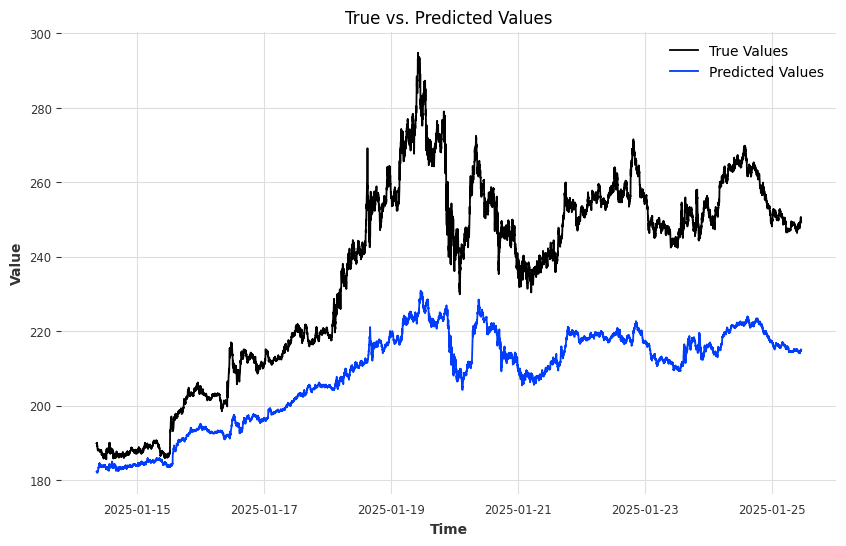

SOL RF
MSE: 355.600689796264
MAE: 13.53666511531256
R2: 0.48086666030716063
RMSE: 18.857377595950716


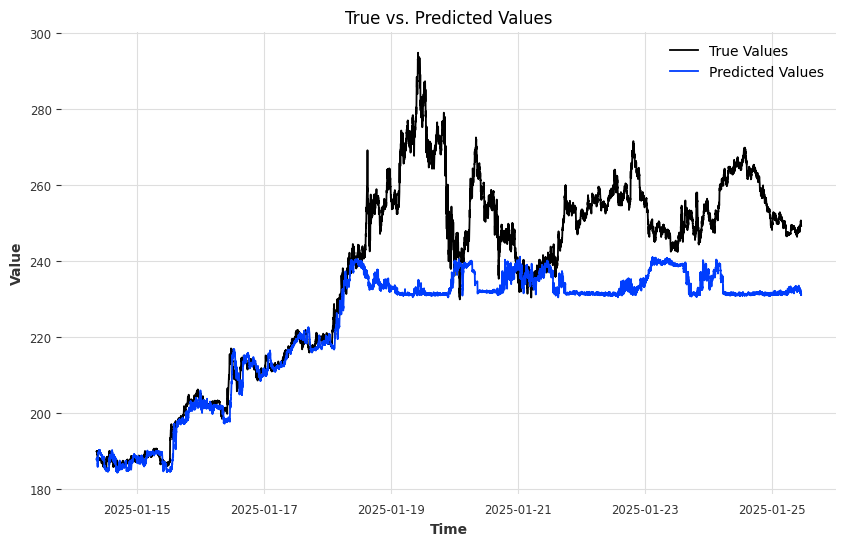

SOL LGB
MSE: 213.37849864518216
MAE: 10.376402311883787
R2: 0.6884935946446491
RMSE: 14.607480913736707


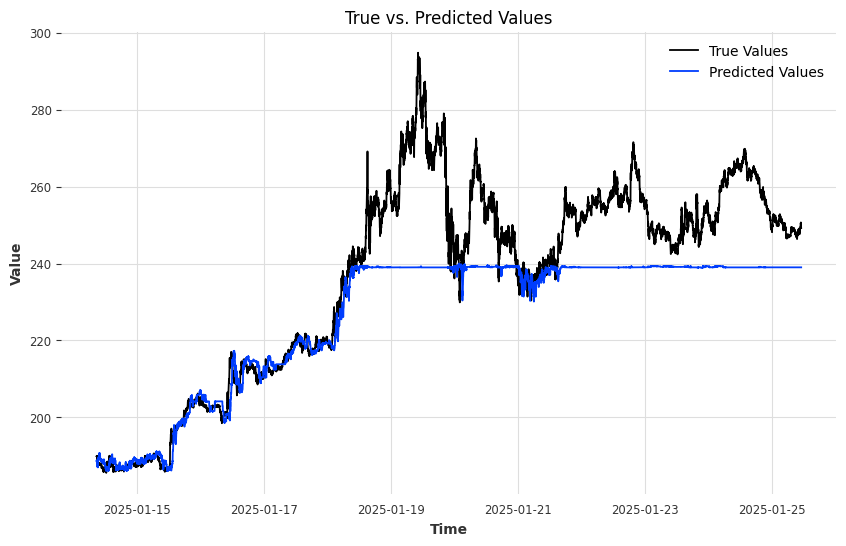

SOL trans
MSE: 102.11221263612535
MAE: 7.9985885186373356
R2: 0.8509287088290287
RMSE: 10.105058764605248


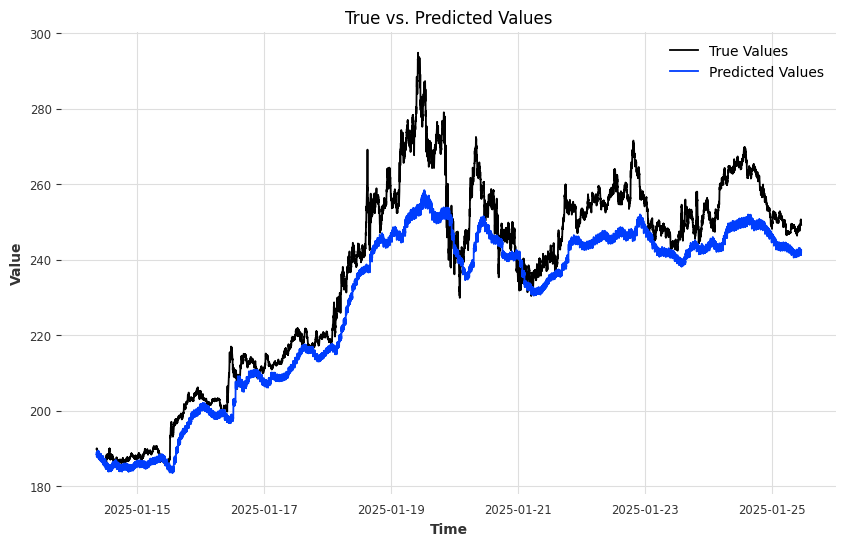

BTC LR
MSE: 27754832.09967116
MAE: 5125.892810702676
R2: -2.1892195225551645
RMSE: 5268.285499066196


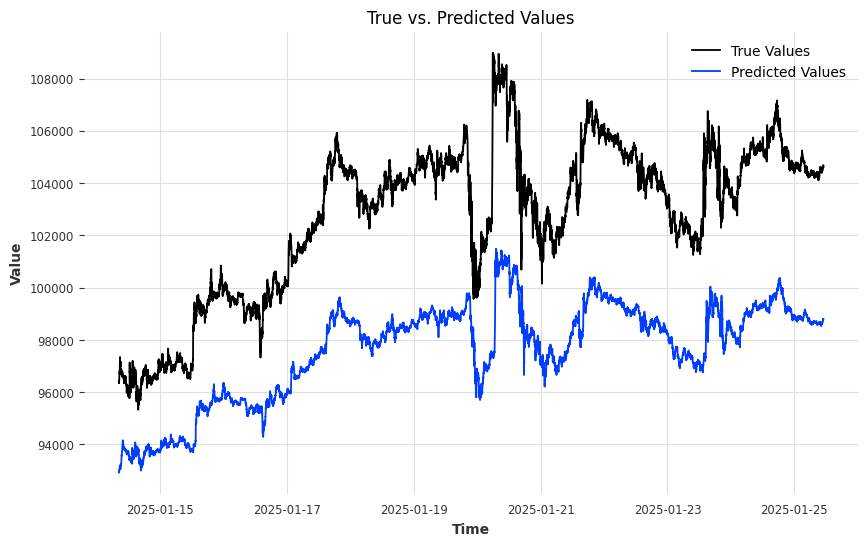

BTC RF
MSE: 632892.2290627372
MAE: 526.4621281633496
R2: 0.9272763659548764
RMSE: 795.545240110666


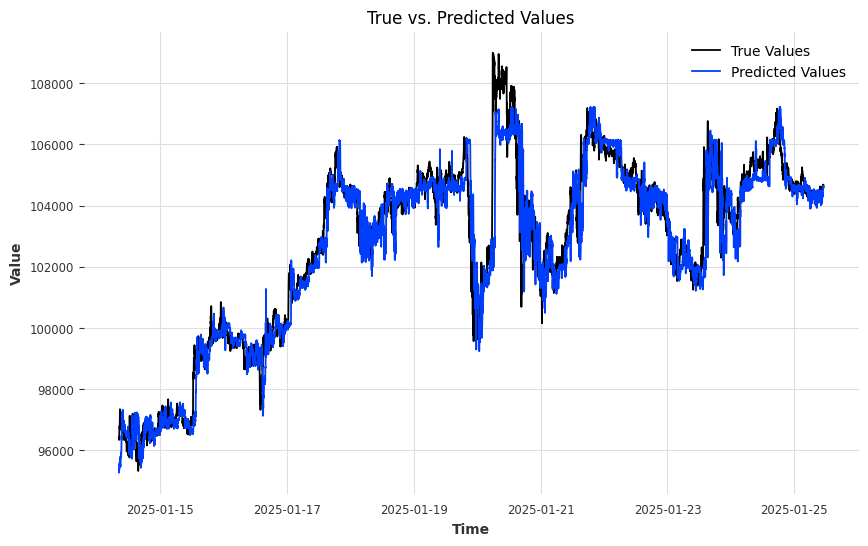

BTC LGB
MSE: 649244.8297292687
MAE: 548.5697405806803
R2: 0.9253973405980316
RMSE: 805.7573020018302


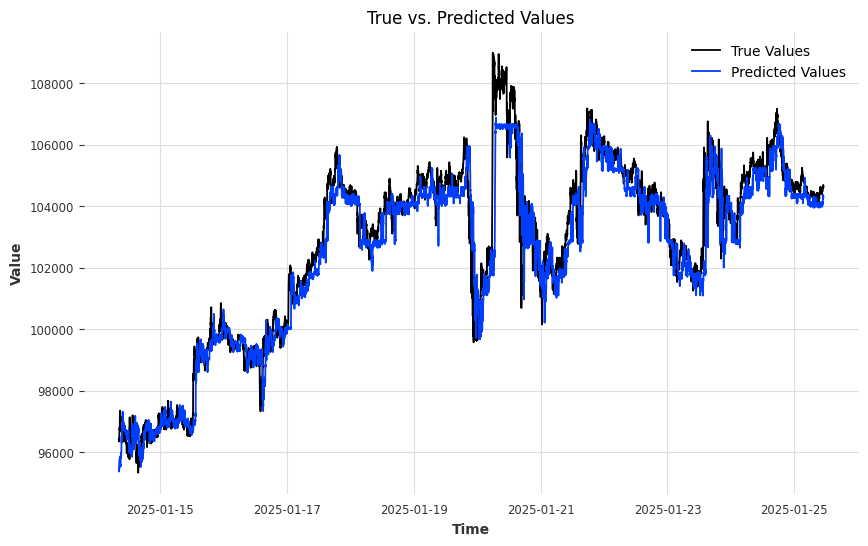

BTC trans
MSE: 1577926.8647706104
MAE: 943.922458229006
R2: 0.8186854402786923
RMSE: 1256.1555893959196


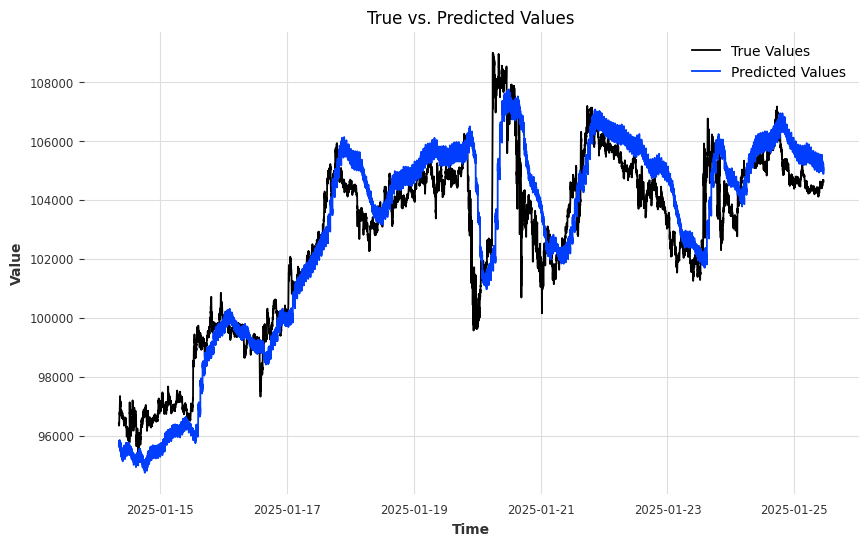

ETH LR
MSE: 83949.99592219645
MAE: 270.2910750400859
R2: -15.061940375625326
RMSE: 289.7412568520342


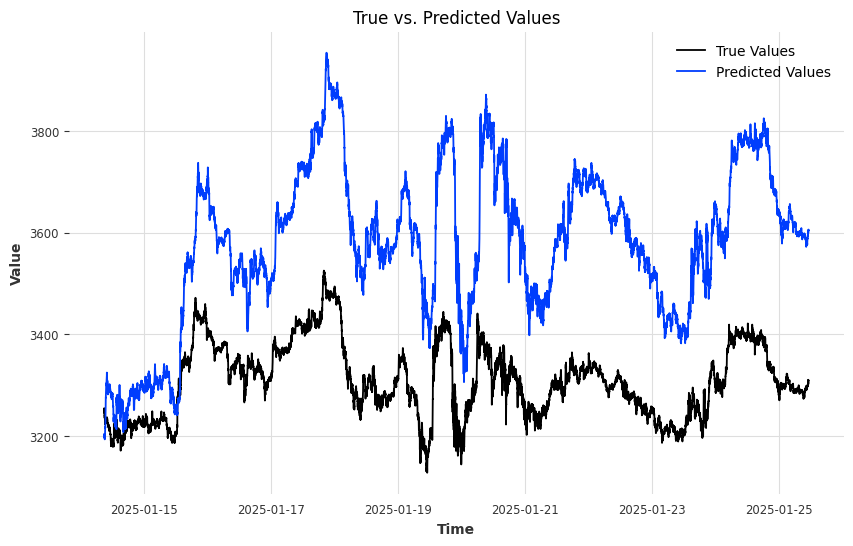

ETH RF
MSE: 13422.148912000675
MAE: 104.23299659032308
R2: -1.5680258011819403
RMSE: 115.8539982564291


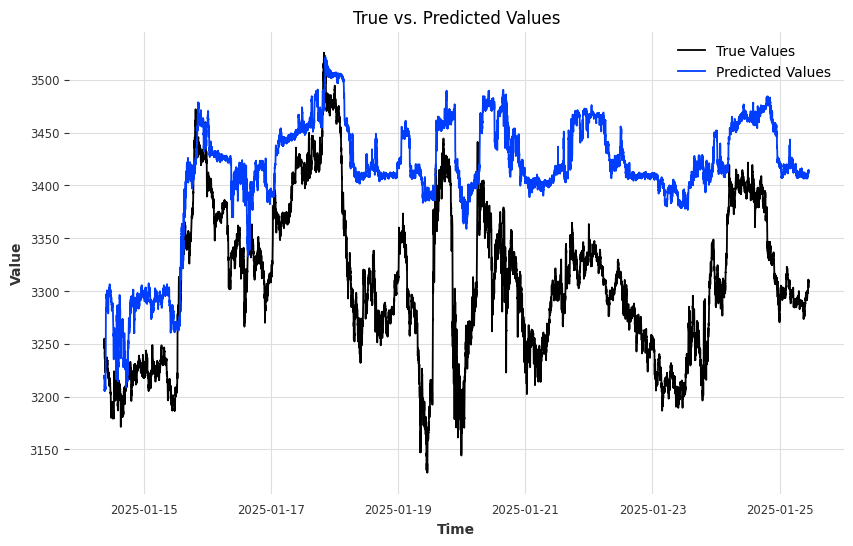

ETH LGB
MSE: 2618.2759623021393
MAE: 44.01016026988742
R2: 0.49905188283266244
RMSE: 51.169091865130255


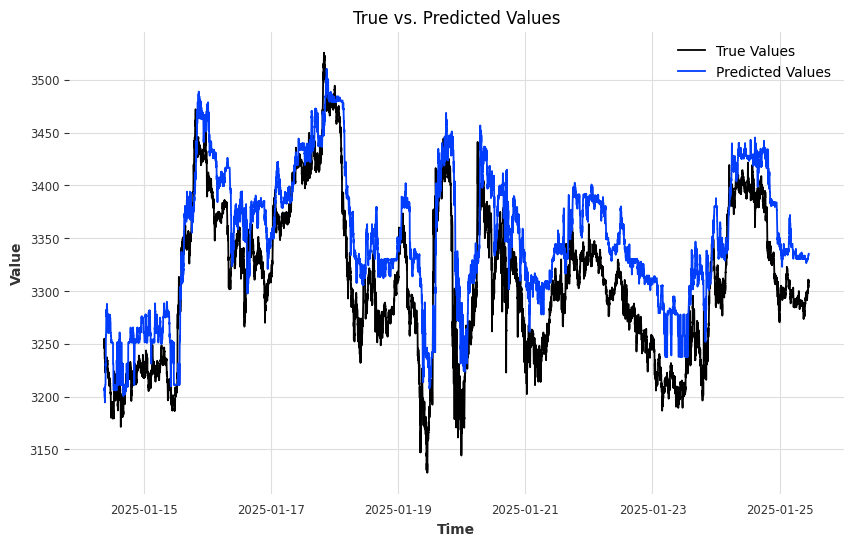

ETH trans
MSE: 4556.226248687345
MAE: 57.74937669458678
R2: 0.1282687564142473
RMSE: 67.49982406412143


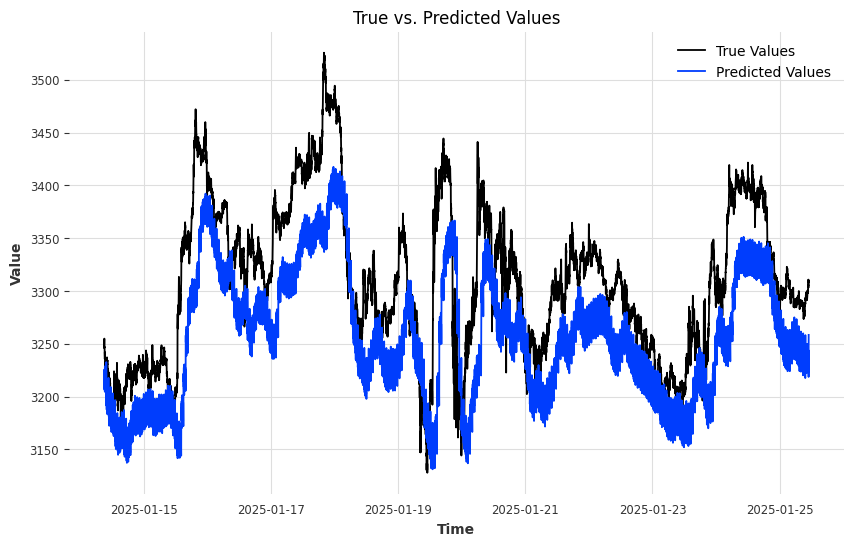

SUI LR
MSE: 0.04719981143966789
MAE: 0.20342965624946127
R2: 0.043972193117947644
RMSE: 0.2172551758639317


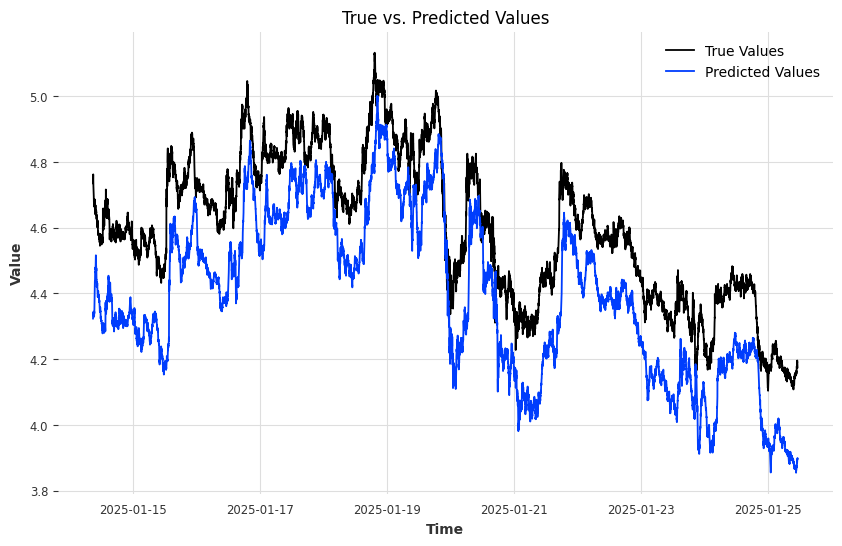

SUI RF
MSE: 0.006801725466935246
MAE: 0.06248014170062744
R2: 0.8622316809574597
RMSE: 0.08247257402879606


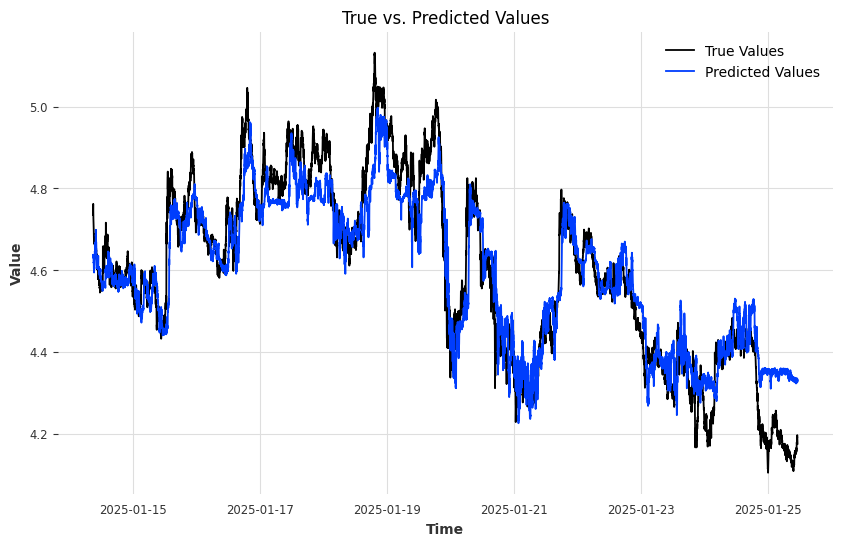

SUI LGB
MSE: 0.00394974649693686
MAE: 0.04616719361851592
R2: 0.9199982507126476
RMSE: 0.06284700865543928


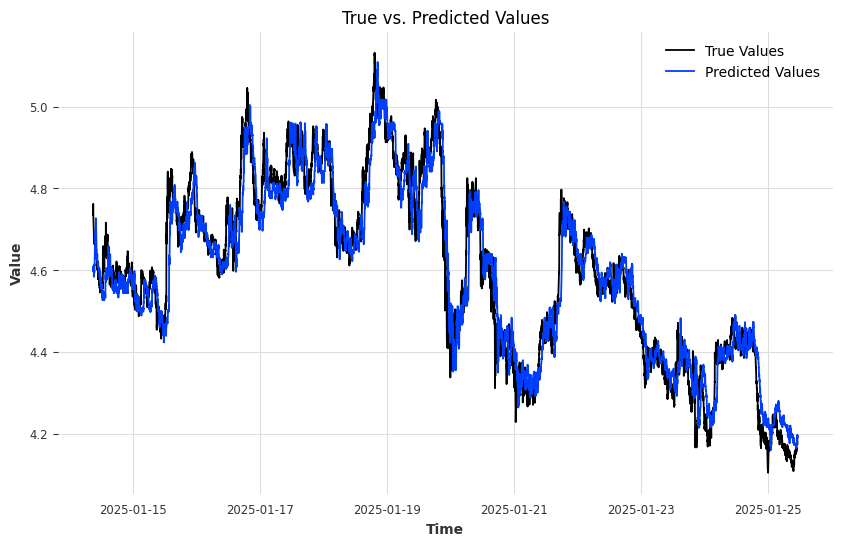

SUI trans
MSE: 0.06690755866625064
MAE: 0.23880588155019072
R2: -0.3552064007139164
RMSE: 0.25866495446088295


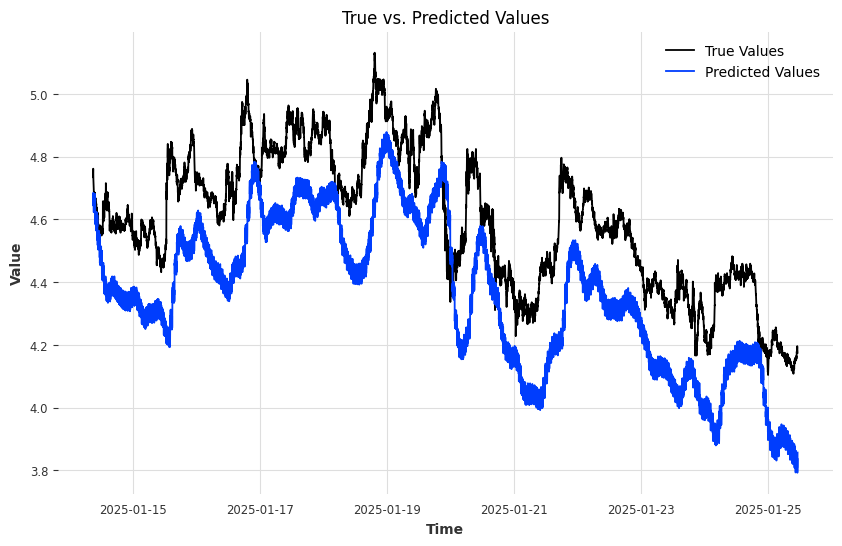

BNB LR
MSE: 42.90673676541955
MAE: 5.36567365224704
R2: 0.7109351778563671
RMSE: 6.550323409223361


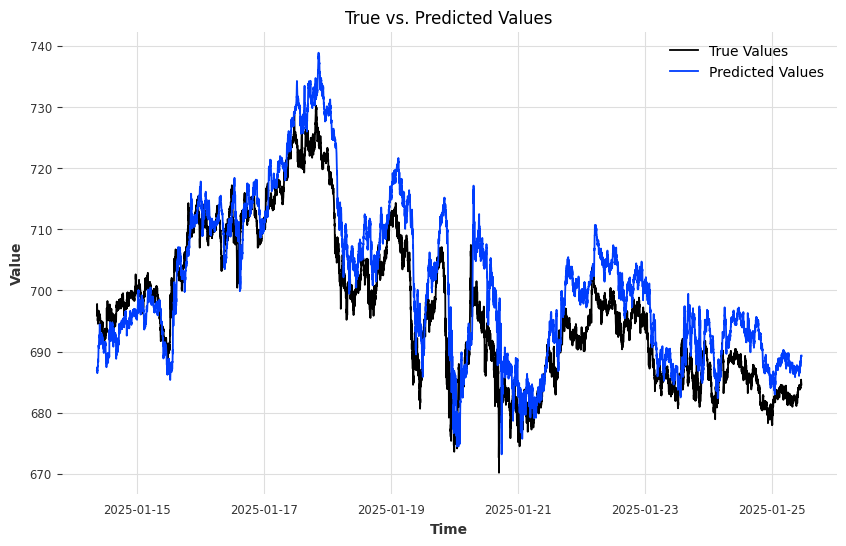

BNB RF
MSE: 37.655257757597425
MAE: 4.81722068111956
R2: 0.7463146534311809
RMSE: 6.136388005789516


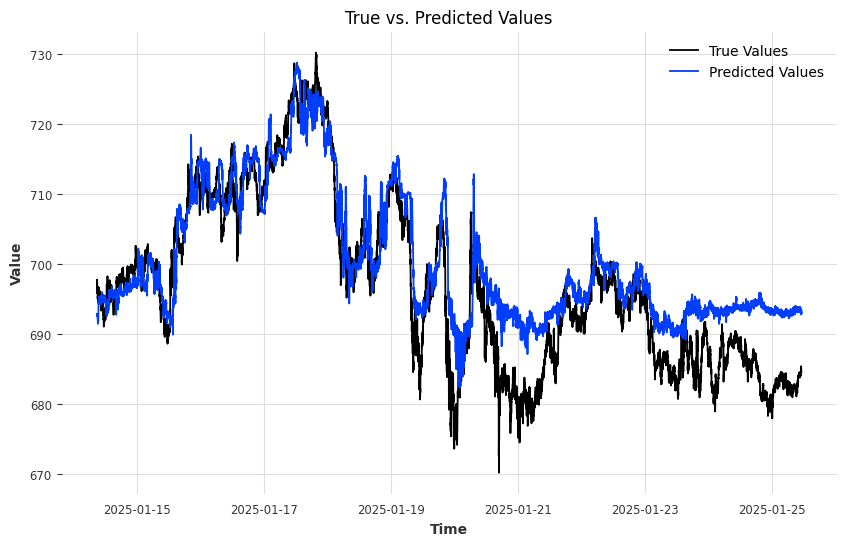

BNB LGB
MSE: 12.63250208408671
MAE: 2.6570069072340563
R2: 0.9148942044199317
RMSE: 3.5542231336941565


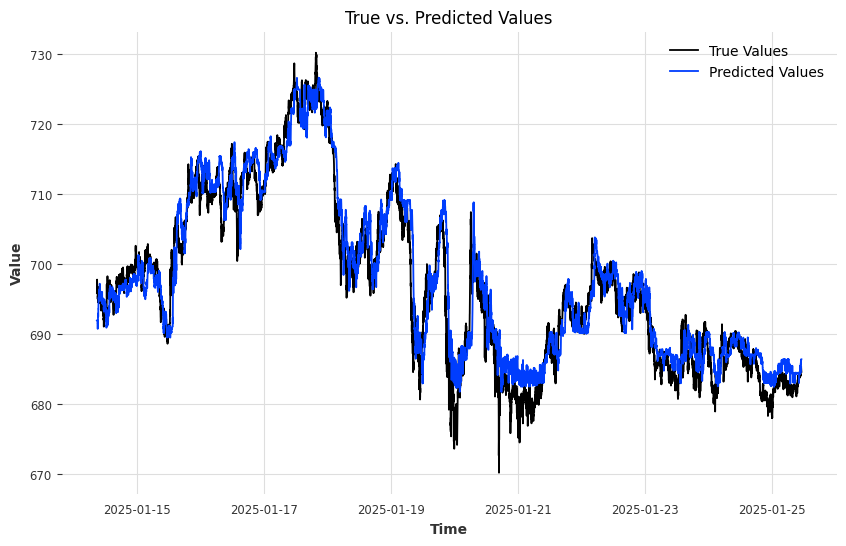

BNB trans
MSE: 1658.0682209379413
MAE: 39.541111655065926
R2: -10.170488168508689
RMSE: 40.71938384771976


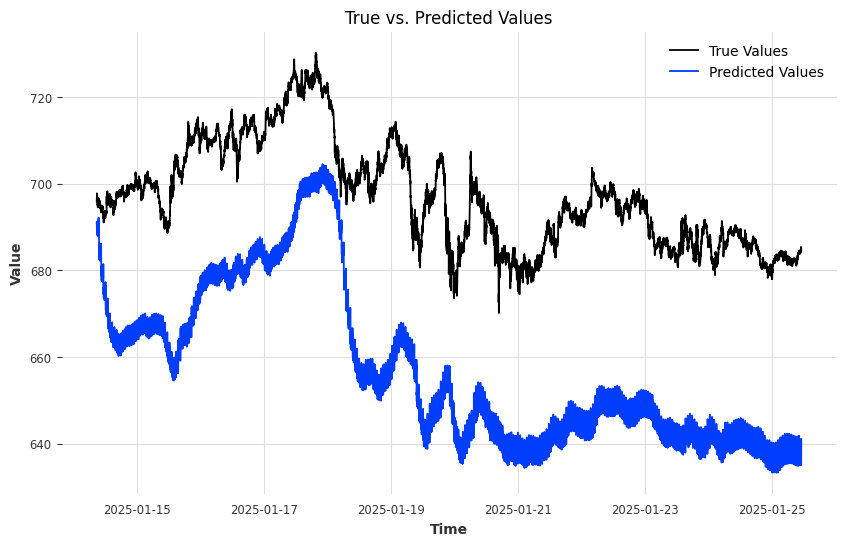

SOL LR
SOL RF
SOL LGB
SOL trans
save model in MyTransformerModel
保存時の学習状態 True
BTC LR
BTC RF
BTC LGB
BTC trans
save model in MyTransformerModel
保存時の学習状態 True
ETH LR
ETH RF
ETH LGB
ETH trans
save model in MyTransformerModel
保存時の学習状態 True
SUI LR
SUI RF
SUI LGB
SUI trans
save model in MyTransformerModel
保存時の学習状態 True
BNB LR
BNB RF
BNB LGB
BNB trans
save model in MyTransformerModel
保存時の学習状態 True


In [ ]:

# 再学習
# モデルを作成する
import datetime

file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/"
#today = datetime.datetime.now().strftime("%Y-%m-%d")

print(f'Model builiding date is {date}')

coin_models = {}
predictions = {}
evals = {}


for symbol in symbols:
    # 説明変数と目的変数を指定
#    X = dfs[symbol].drop(columns=['value', 'value_lag'])
    # 'value_lag'と'value'で時差がある場合は、'value'も特徴量に含める
    X = dfs[symbol].drop(columns=['value_lag'])
    y = dfs[symbol]['value_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    for model_name, model_class in models.items():
        print(symbol, model_name)

        # モデルをパラメータ付きで再インスタンス化
        try:
            params = params_dict.get(model_name, {})  # 該当するパラメータを取得
            model = model_class(params)  # パラメータを渡して初期化
        except TypeError as e:
            print(f"Error while initializing {model_name}: {e}")
            continue

        # モデルの学習と評価
        model.fit(X_train, y_train)
        file_name = symbol + '_' + model_name
#        try:
#            model.save_model(file_path,file_name + '_' + today)
#        except Exception as e:
#            print('cannot save model with '+ str(e))

        coin_models[file_name] = model
        predictions[file_name] = model.predict(X_test)

#        # 特徴量と予測値の関係
#        partial_dependence(model,X_test,
#                           features = ['Amihud Measure'],
#                           kind = 'both')
        try:
            evals[symbol + '_' + model_name] = timeseries_evaluation(y_test, predictions[symbol + '_' + model_name])
        except ValueError as e:
            print(f"Dataset {symbol}: Skipping due to error - {e}")



# 予測と精度確認
for symbol in symbols:
    for model in models:
        print(symbol,model)
        try:
            evals[symbol + '_' + model].print_evaluation()
            evals[symbol + '_' + model].plot_evaluation(file_name = f'fig_{symbol}_{model}_{date}.eps')
        except:
            print('cannot calculate metrics')

# 念の為モデルを保存
for symbol in symbols:
    for model in models:
        file_name = symbol + '_' + model + '_' + date
        print(symbol,model)
        try:
            coin_models[symbol + '_' + model].save_model(file_path,file_name)
        except Exception as e:
            print('cannot save model with '+ str(e))



それでは精度を確認しよう。
市場が荒れているせいか、やはりフィッティングの精度は少し落ちている。
特に、ETHの精度がもっともよいLGBでさえR値$0.49$程度と振るわない。

とはいえ、その他のコインも含めてベストなモデルの組み合わせは変わらないことが確認できる。

In [ ]:
# コインとモデルの組み合わせ
pairs = {'SOL':'trans',
         'BTC':'RF',
         'ETH':'LGB', # ただしR値0.4程度
         'SUI':'LGB',
         'BNB':'LGB'}


Permutation Importance:('SOL', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Partial Dependence:('SOL', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrappe

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Permutation Importance:('SOL', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Partial Dependence:('SOL', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Permutation Importance:('BTC', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Partial Dependence:('BTC', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrappe

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Permutation Importance:('BTC', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Partial Dependence:('BTC', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Permutation Importance:('ETH', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Partial Dependence:('ETH', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrappe

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Permutation Importance:('ETH', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Partial Dependence:('ETH', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Permutation Importance:('SUI', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Partial Dependence:('SUI', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrappe

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Permutation Importance:('SUI', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Partial Dependence:('SUI', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Permutation Importance:('BNB', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Partial Dependence:('BNB', 'LR')
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrapper's prediction
Wrappe

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Permutation Importance:('BNB', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Partial Dependence:('BNB', 'trans')


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

SOL trans
BTC RF
ETH LGB
SUI LGB
BNB LGB


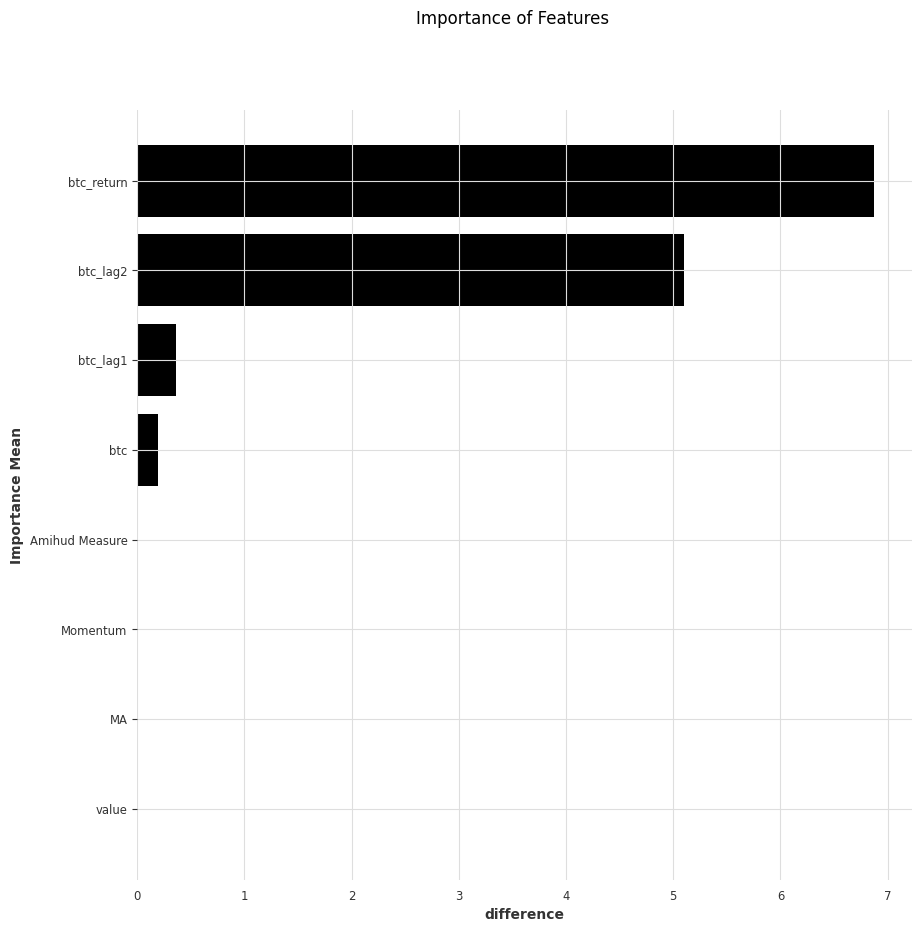

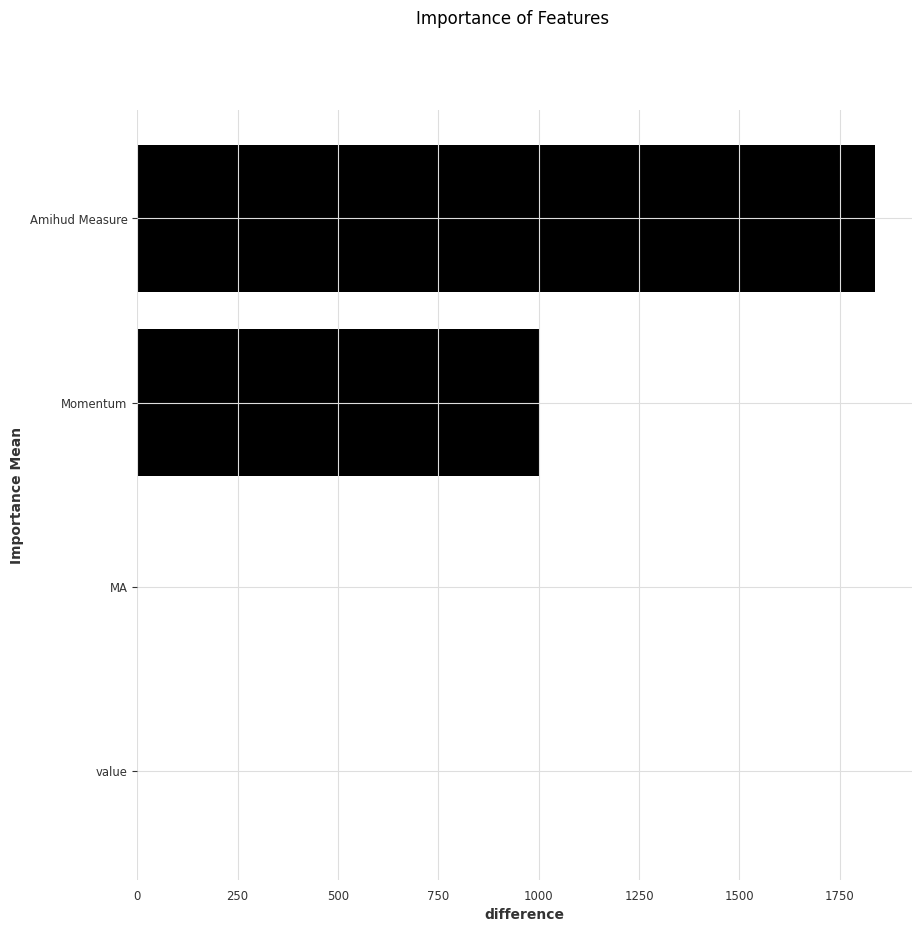

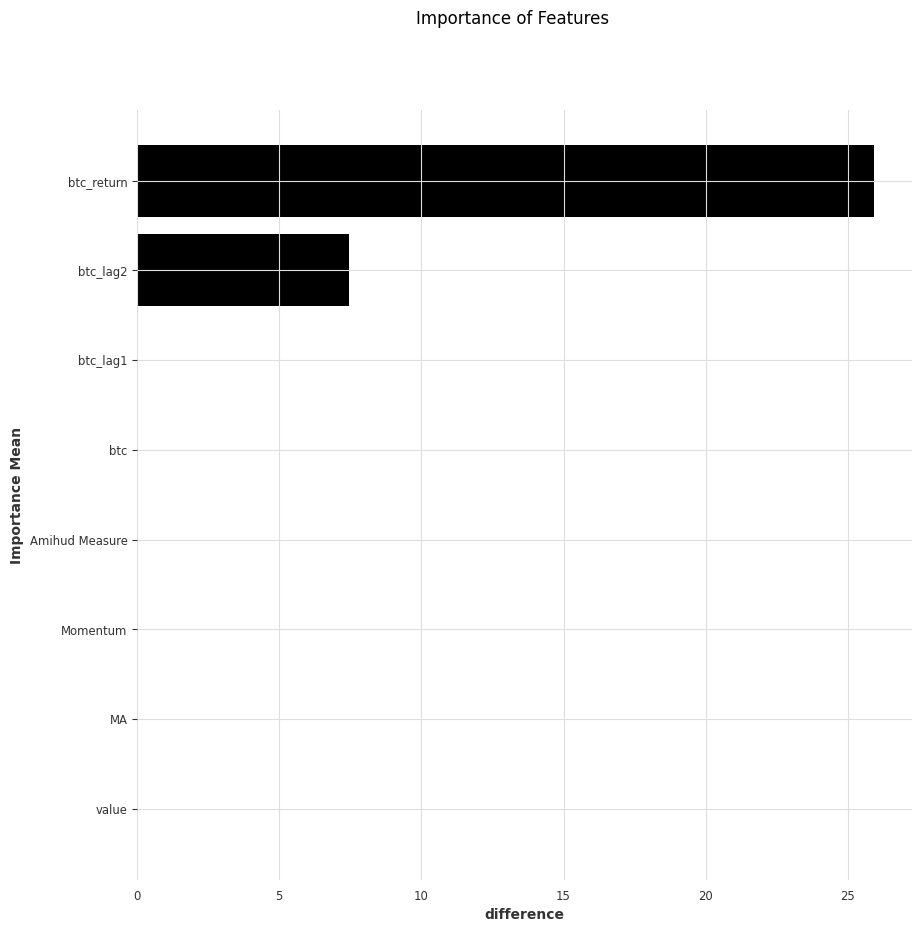

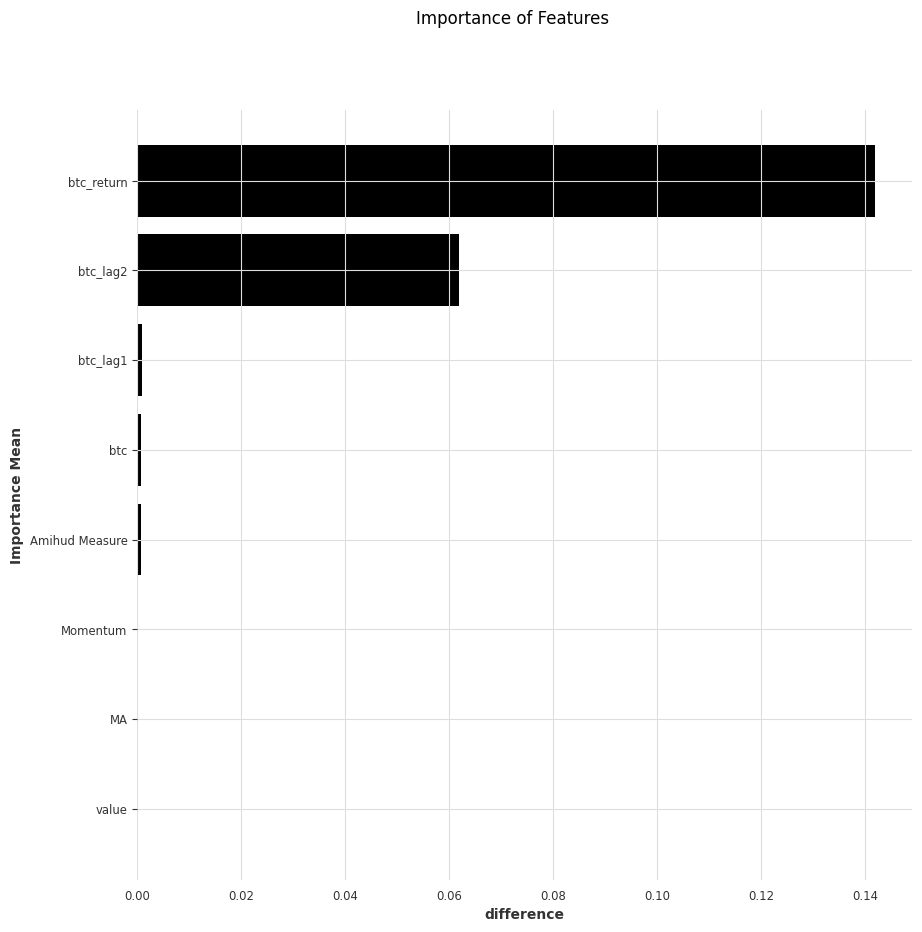

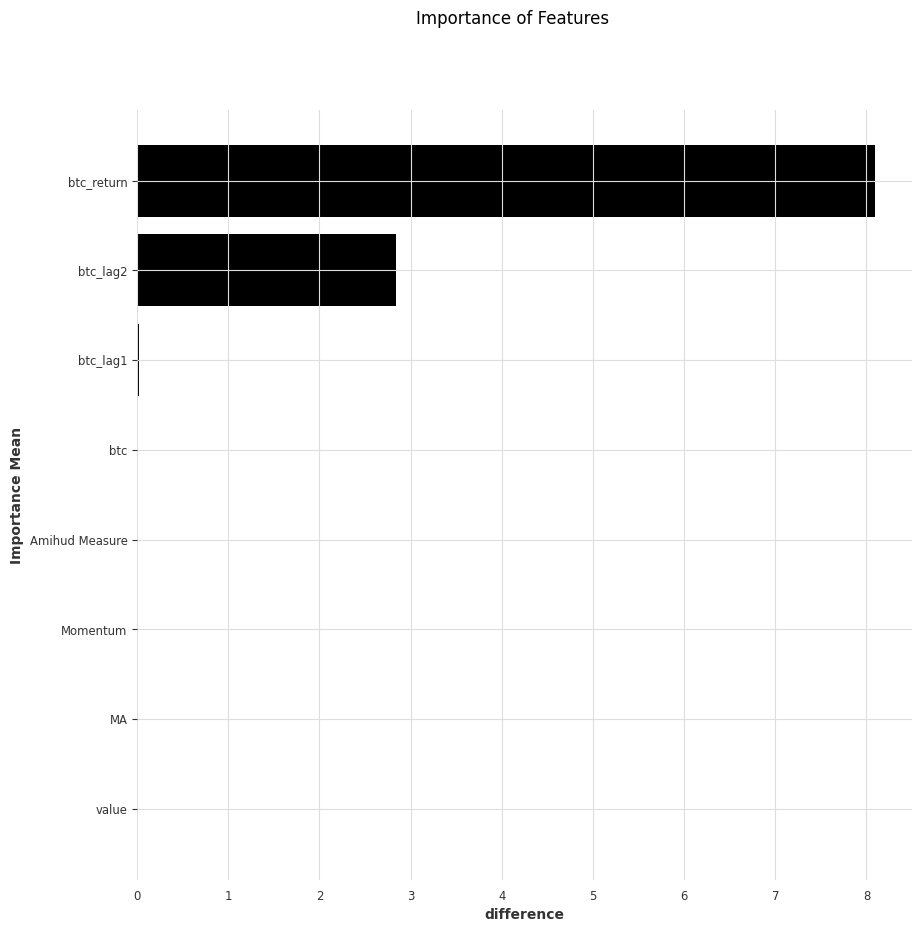

In [ ]:
# 特徴量分析

from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import traceback
#from pdpbox import pdp, info_plots#, get_dataset
from interpret import show
from interpret.blackbox import PartialDependence

pdp = {}
pfi = {}
result_file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Results/"

#for model in coin_models:
#    print(model)
for symbol in symbols:
    feature_results = {}
    # 説明変数と目的変数を指定
    X = dfs[symbol].drop(columns=['value_lag'])
    y = dfs[symbol]['value_lag']

    # トレーニングセットと検証セット、テストセットを指定
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    for model in models:
        print(f"Permutation Importance:{symbol,model}")
        # 特徴量の重要度を計算する
        try:
            perm_imp_result = \
            permutation_importance(coin_models[symbol + '_' + model],
                               X_test,
                               y_test,
                               n_repeats=3,
                               scoring = 'neg_root_mean_squared_error',
                               random_state=42,
                               n_jobs=1)
            # データを DataFrame に変換
            feature_importance = pd.DataFrame({
                "Feature": X_test.columns, # Columns name
                "Importance Mean": perm_imp_result.importances_mean,
                "Importance Std": perm_imp_result.importances_std
                })
            feature_importance.to_csv(result_file_path + f"pf_results_{symbol + '_' + model}" + today + ".csv")
            pfi[symbol + '_' + model] = perm_imp_result


        except Exception as e:
            print(f"Error: {str(e)}")

        print(f"Partial Dependence:{symbol,model}")
        try:
#            print('try Partial Dependence of '+model)
#            X_test = X_test.reset_index(drop=True)
#            print(f'Before putting into, index of X_test {X_test.index}')
            pdp[symbol + '_' + model]  = PartialDependence(coin_models[symbol + '_' + model], X_test)
#            print('We suceed Partial Dependence of ' + model)
            feature_names = X_train.columns

            for i, feature_name in enumerate(feature_names):
                feature_results[feature_name] = pdp[symbol + '_' + model].explain_global().data(i)
                # データフレームに変換して保存
                df_results = pd.DataFrame.from_dict(feature_results, orient='index')
                df_results.to_csv(result_file_path + f"pd_results_{symbol + '_' + model}" + date + ".csv")

        except Exception as e:
            print(f"Partial Dependence") #type(e)
            print(f"Error type: {type(e)}")
            print(f"Error: {str(e)}")
            print(traceback.format_exc()) # tracebackを出力

# PFIの可視化
from matplotlib import pyplot as plt

date
#date = '2025-01-15'

for pair in pairs:
    print(pair,pairs[pair])
    pfi_result = pd.read_csv(result_file_path + f"pf_results_{pair}_{pairs[pair]}{date}.csv").sort_values(by='Importance Mean', ascending=True)
    fig,ax = plt.subplots(figsize=(10,10))
    ax.barh(dfs[pair].columns[:-1],pfi_result['Importance Mean'])
    ax.set(xlabel = 'difference',ylabel = 'Importance Mean',xlim = (0,None))
    fig.suptitle('Importance of Features')
    fig.savefig(result_file_path + f"pfi_{pair}_{pairs[pair]}_{date}.eps")


最初にPermutation importanceで重要な特徴量をピックアップしよう。
すぐにみて取れるように、どのコインにおいても重要なのはBTCの利回りが一番で、次がラグつきのBTC価格だ。
これはトランプ政権成立前と同じ結果だ。
また、BTC自身の価格を決める特徴量も流動性が第一で次がモーメンタムである点は変わらない。
多少の市場の変動では決定要因は変わらないようで、ある種の頑健生チェックになっているといえよう。

SOL trans
BTC RF
ETH LGB
SUI LGB
BNB LGB


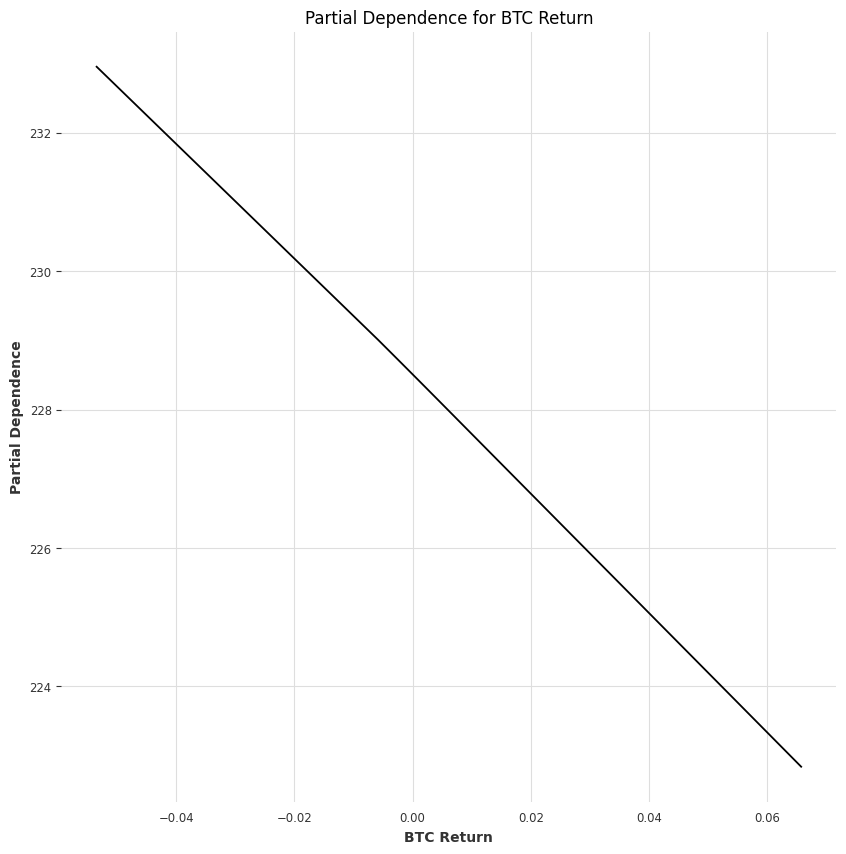

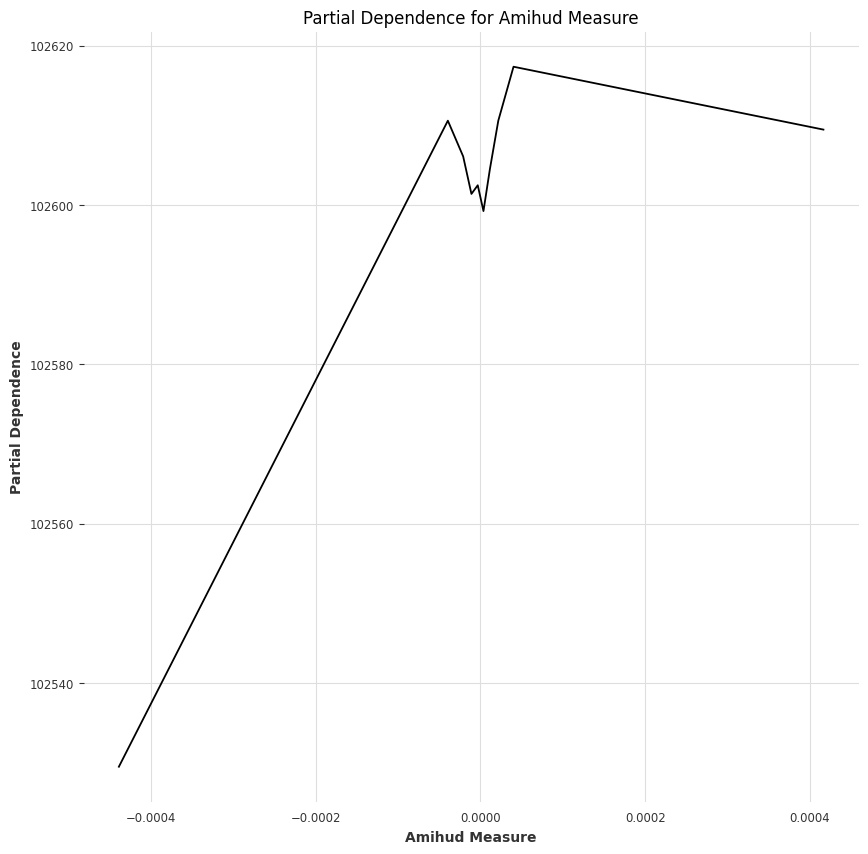

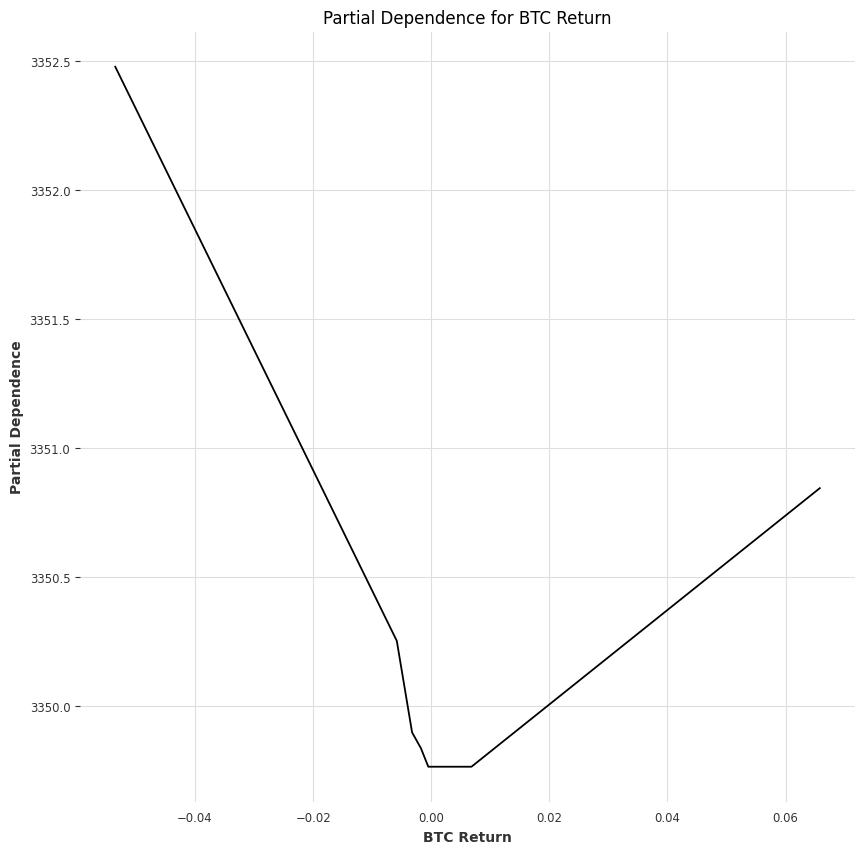

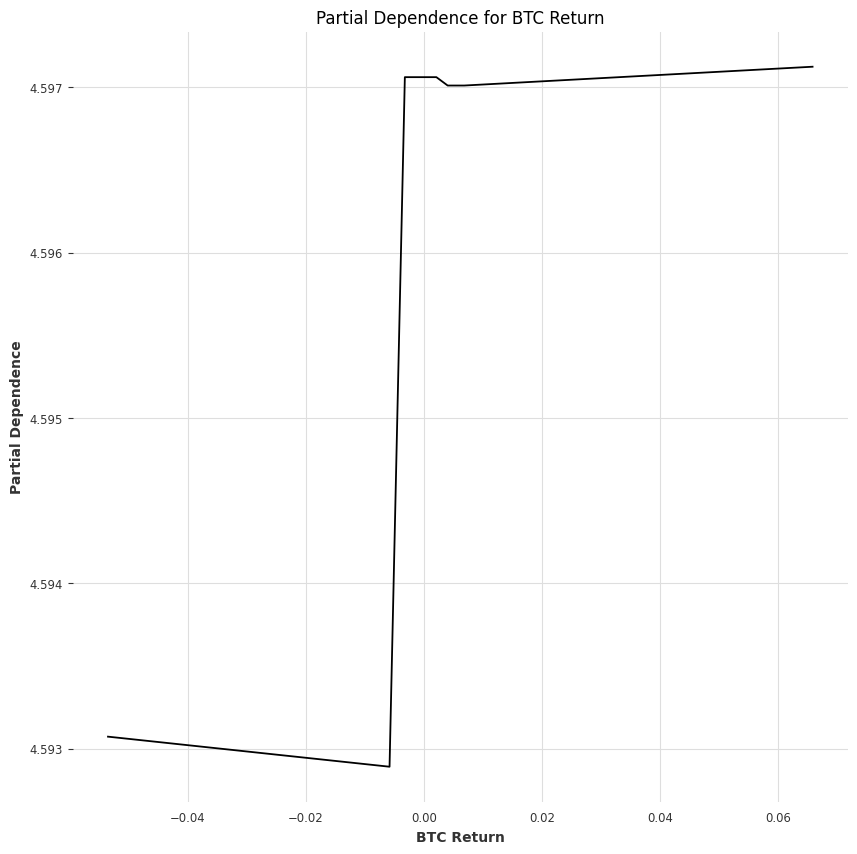

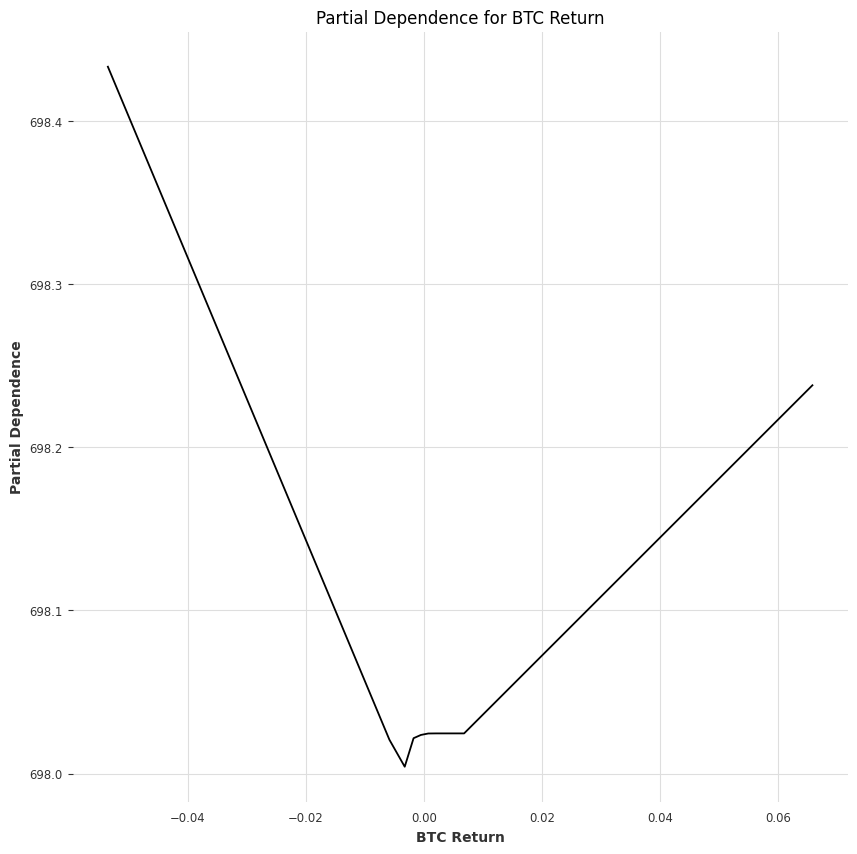

In [ ]:
# Partial Dependenceの可視化1
for pair in pairs:
    print(pair,pairs[pair])
    pd_result = pd.read_csv(result_file_path + f"pd_results_{pair}_{pairs[pair]}{date}.csv")
    pd_result = pd_result.set_index('Unnamed: 0')
    if pair == 'BTC':
        feature_data = pd_result.loc['Amihud Measure',:]
        feature_name = 'Amihud Measure'
    else:
        feature_data = pd_result.loc['btc_return',:]
        feature_name = 'BTC Return'
    # プロット作成
    x = convert_to_float_series(feature_data['names'])
    y = convert_to_float_series(feature_data['scores'])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y , label=feature_name)
    #plt.fill_between(x, feature_0_data['lower_bounds'], feature_0_data['upper_bounds'], color='gray', alpha=0.3, label="Confidence Interval")
    ax.set(xlabel = feature_name, ylabel = "Partial Dependence")
    ax.set_title(f"Partial Dependence for {feature_name}")
#    plt.legend()
#    ax.grid()
    #plt.savefig("feature_0_partial_dependence.png")
    fig.savefig(result_file_path + f"pd_{pair}_{pairs[pair]}_{date}.eps")


partial dependenceも確認してみよう。

SOLはBTCリターン増にともない単調に価格減少している。
ETHやBNBは下がって上がり、SUIは増加するといった特徴もトランプ政権成立前と変わらない。

念の為、二番目に重要な特徴量が与える影響も確認しておこう。


SOL trans
BTC RF
ETH LGB
SUI LGB
BNB LGB


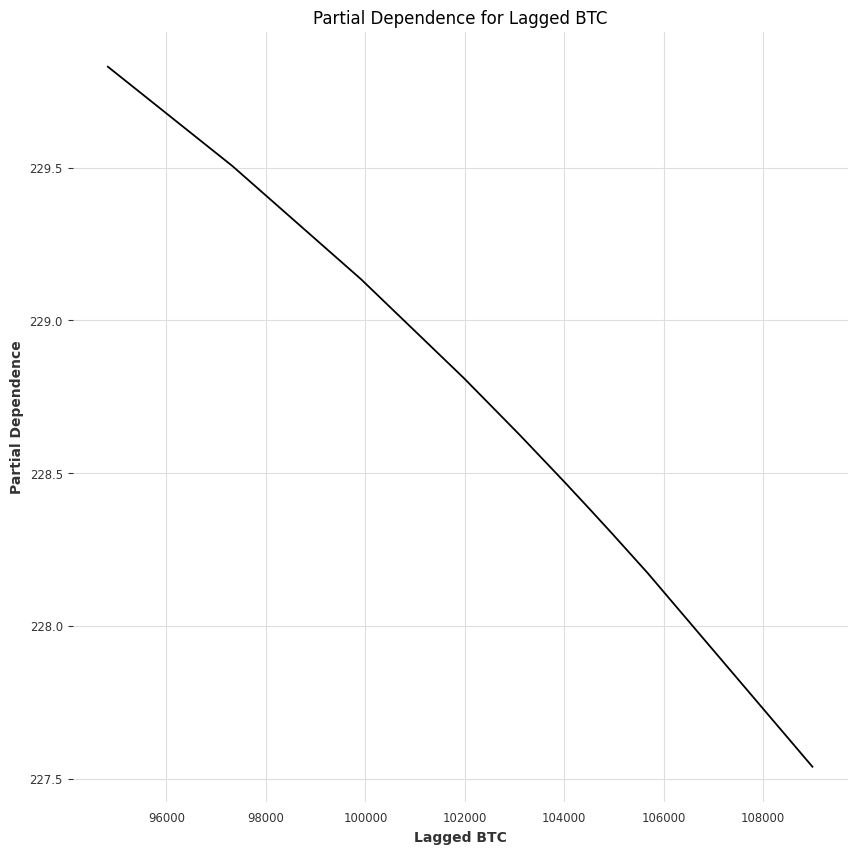

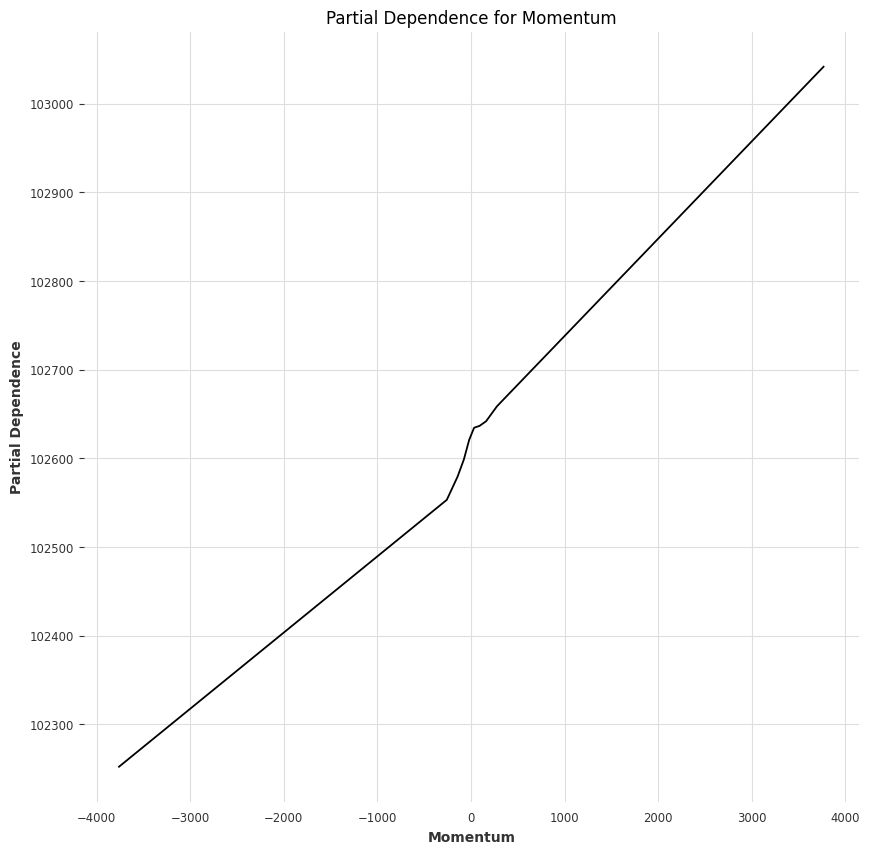

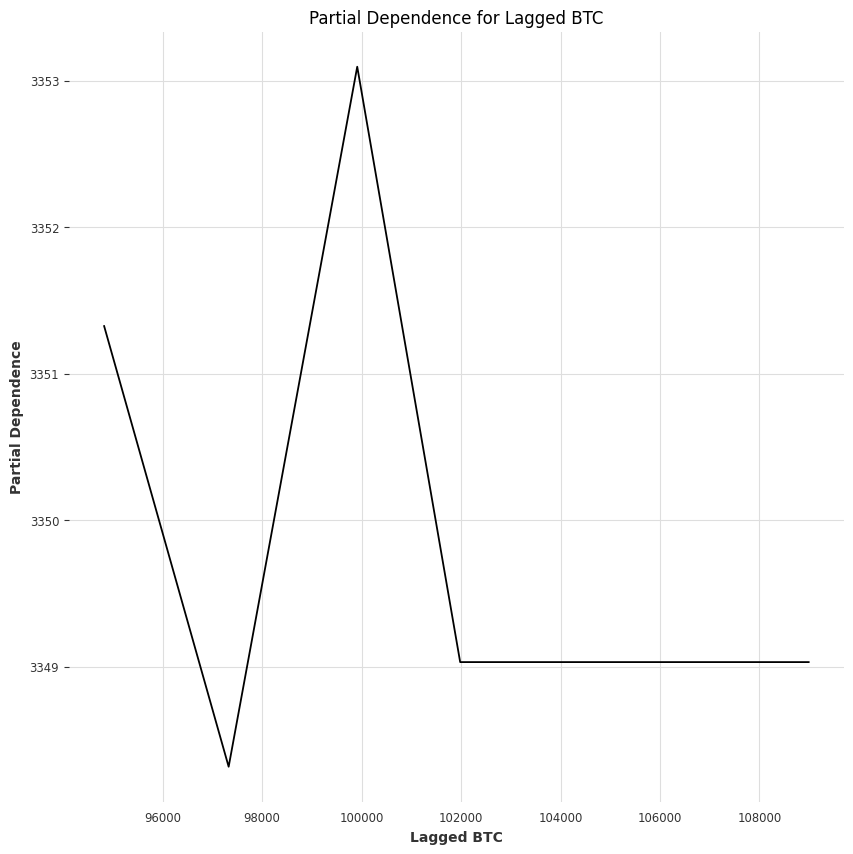

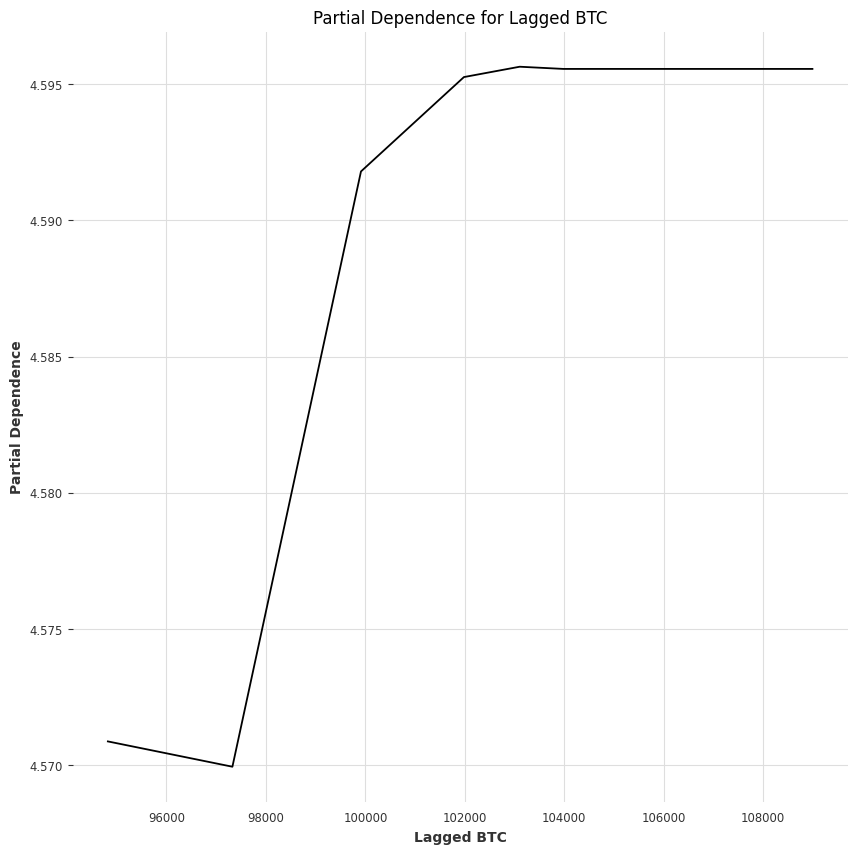

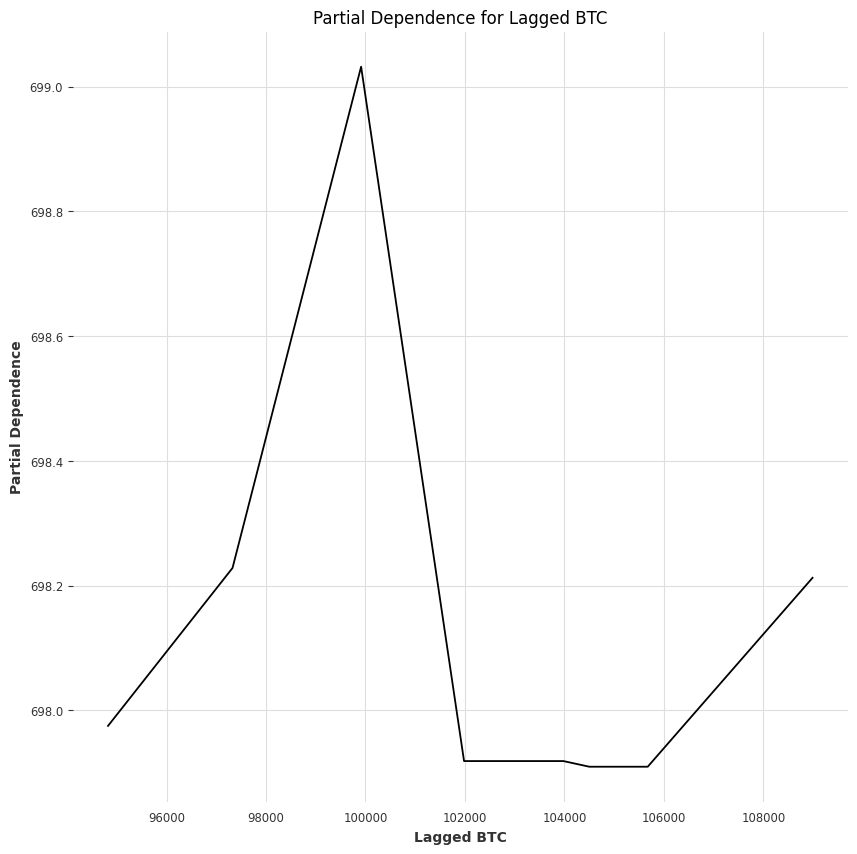

In [ ]:
# Partial Dependenceの可視化2
for pair in pairs:
    print(pair,pairs[pair])
    pd_result = pd.read_csv(result_file_path + f"pd_results_{pair}_{pairs[pair]}{date}.csv")
    pd_result = pd_result.set_index('Unnamed: 0')
    if pair == 'BTC':
        feature_data = pd_result.loc['Momentum',:]
        feature_name = 'Momentum'
    else:
        feature_data = pd_result.loc['btc_lag2',:]
        feature_name = 'Lagged BTC'
    # プロット作成
    x = convert_to_float_series(feature_data['names'])
    y = convert_to_float_series(feature_data['scores'])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y , label=feature_name)
    #plt.fill_between(x, feature_0_data['lower_bounds'], feature_0_data['upper_bounds'], color='gray', alpha=0.3, label="Confidence Interval")
    ax.set(xlabel = feature_name, ylabel = "Partial Dependence")
    ax.set_title(f"Partial Dependence for {feature_name}")
#    plt.legend()
#    ax.grid()
    #plt.savefig("feature_0_partial_dependence.png")
    fig.savefig(result_file_path + f"pd_{pair}_{pairs[pair]}_{date}_supp.eps")


こちらも、SOLではラグつきBTC価格の上昇に対してSOL価格は減少している点は共通だ。
ただし、その他のコインの挙動はすこし変わっている。また、BTCはモーメンタムの増加に対して価格が安定的に上昇している。

これは政権成立後に非常に強いモーメンタムが生じていることに起因するかもしれない。

このことから推測されるのは、価格を決定する主要な特徴量は多少の市場変動によって変わらない可能性があり、頑健だが、どのように価格に作用するかは変動する可能性がある、ということだ。


# Related works

# Conlusion
本論文はBTC以外の暗号資産価格の決定要因がBTCであることを検証した。

このような資産価格の決定要因の推定は通常線形回帰で行われることが多いが、暗号資産市場の複雑さを勘案し、非線形なモデルも候補に加え、もっとも当てはまりのよいモデルで重要な要因を探索したところに本研究の手法上の特色がある。

また、先行研究では暗号資産の重みづけ平均のようなものをマーケット・ポートフォリオの代替変数としたが、暗号資産市場におけるBTCの重要性を鑑み、単にBTCで説明がつくのではないかという仮説を部分的に証明できた点の貢献は大きい。

これにより、今後の暗号資産市場の研究は、第一義的にはBTCの研究に集中してもよいというのが主張である。

もちろん、やり残したこともある。
まず、今回の研究は主要なコインに焦点をあてたが、現状の暗号資産市場では泡沫コインも含め無数のコインがある。泡沫コイン、もおそらくBTCの影響を受けているとは思うが、ETHやSOLといった主要コインの影響を受けている可能性もある。今後は、その点の検証も進めていきたい。

また、マーケット・リターンの代わりにBTCを使う、というのが本研究の主張だが、BTCをつかったほうがマーケット・リターンよりもよい、とまでは言えてない。将来的には、両者を比較して、どの程度のよさがあるのかについても検証したい。

また、BTCとその他主要コインの間の相互関係については、今回行っていない。
理由は、このタイプの検証は主成分分析によることが多いが、主成分分析はファクターと価格の線形性を仮定するもので、暗号資産市場が単純な線形関係で捉えられるかどうかはわからないため、補完的なアプローチを用意する必要があるためだ。さらに、主成分分析は共分散行列が必要だが、やはり暗号資産市場の非線形性から単純なサンプル共分散行列をつかって説明できるかどうかは不透明で、この点も補完的なアプローチが必要になる可能性があるためだ。

実際、今回の検証でわかったことは、相関係数行列では重要に思えない特徴量が、機械学習モデルをつかった分析では重要なインパクトをもっていた。

以上のような課題は残しつつも、当初の目標であるBTCが暗号資産市場に与えるインパクトの大きさを示すことにはおおむね成功できたと思われる。














SOL LR
Wrapper's prediction
SOL RF


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.0 when using v

SOL LGB
SOL trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
<ipython-input-10-9e12ea8d6b16>:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.0 when using v

BTC LR
Wrapper's prediction
BTC LR Error loading model with  X has 8 features, but Ridge is expecting 4 features as input.
BTC RF
BTC RF Error loading model with  The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- btc
- btc_lag1
- btc_lag2
- btc_return

BTC LGB
BTC LGB Error loading model with  Number of features of the model must match the input. Model n_features_ is 4 and input n_features is 8
BTC trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
<ipython-input-10-9e12ea8d6b16>:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

Error in scaling: X has 8 features, but MinMaxScaler is expecting 4 features as input.
series_input_test_full head:
                        value            MA  Momentum  Amihud Measure  btc  \
timestamp                                                                    
2025-01-06 06:45:00  99670.45  99599.490714    152.97       -0.000020  NaN   
2025-01-06 06:46:00  99644.94  99614.108571    157.53       -0.000028  NaN   
2025-01-06 06:47:00  99584.90  99621.622143     18.13       -0.000024  NaN   
2025-01-06 06:48:00  99598.90  99629.646429    -26.08        0.000025  NaN   
2025-01-06 06:49:00  99567.99  99633.254286    -90.67       -0.000022  NaN   

                     btc_lag1  btc_lag2  btc_return  
timestamp                                            
2025-01-06 06:45:00       NaN       NaN         NaN  
2025-01-06 06:46:00       NaN       NaN         NaN  
2025-01-06 06:47:00       NaN       NaN         NaN  
2025-01-06 06:48:00       NaN       NaN         NaN  
2025-01-06 06

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - C

ETH LGB
ETH trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
<ipython-input-10-9e12ea8d6b16>:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

Predicting: |          | 0/? [00:00<?, ?it/s]

SUI LR
Wrapper's prediction
SUI RF


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.0 when using v

SUI LGB
SUI trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
<ipython-input-10-9e12ea8d6b16>:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

Predicting: |          | 0/? [00:00<?, ?it/s]

BNB LR
Wrapper's prediction
BNB RF


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  original_sklearn_version=pickle_version,
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.0 when using v

BNB LGB
BNB trans


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
<ipython-input-10-9e12ea8d6b16>:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

Predicting: |          | 0/? [00:00<?, ?it/s]

SOL LR
cannot calculate metrics
SOL RF
cannot calculate metrics
SOL LGB
cannot calculate metrics
SOL trans
MSE: 220543.95683241833
MAE: 468.6356845478603
R2: -1484.8156192385209
RMSE: 469.62107792604274


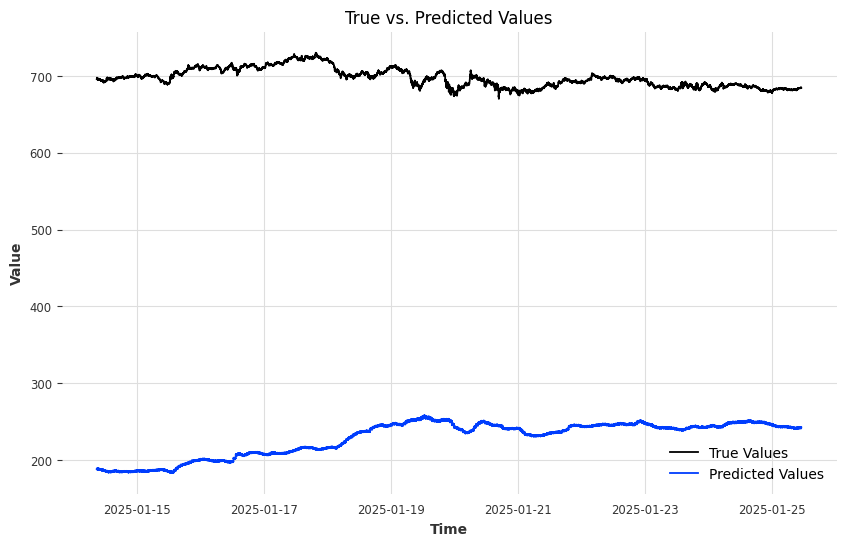

BTC LR
cannot calculate metrics
BTC RF
cannot calculate metrics
BTC LGB
cannot calculate metrics
BTC trans
cannot calculate metrics
ETH LR
cannot calculate metrics
ETH RF
cannot calculate metrics
ETH LGB
cannot calculate metrics
ETH trans
MSE: 6546072.4412857415
MAE: 2557.931083272015
R2: -44100.2160007619
RMSE: 2558.5293512652424


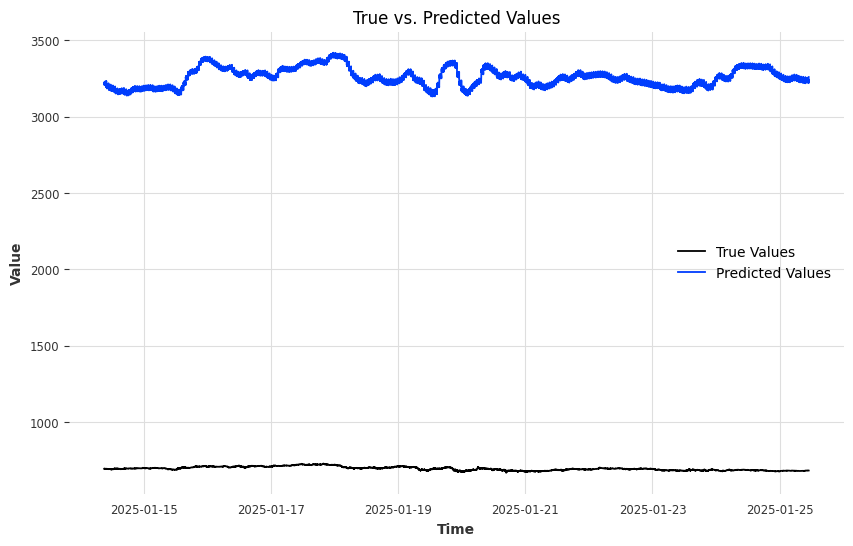

SUI LR
cannot calculate metrics
SUI RF
cannot calculate metrics
SUI LGB
cannot calculate metrics
SUI trans
MSE: 480069.94380605733
MAE: 692.7668112208012
R2: -3233.2551166613953
RMSE: 692.8707987829025


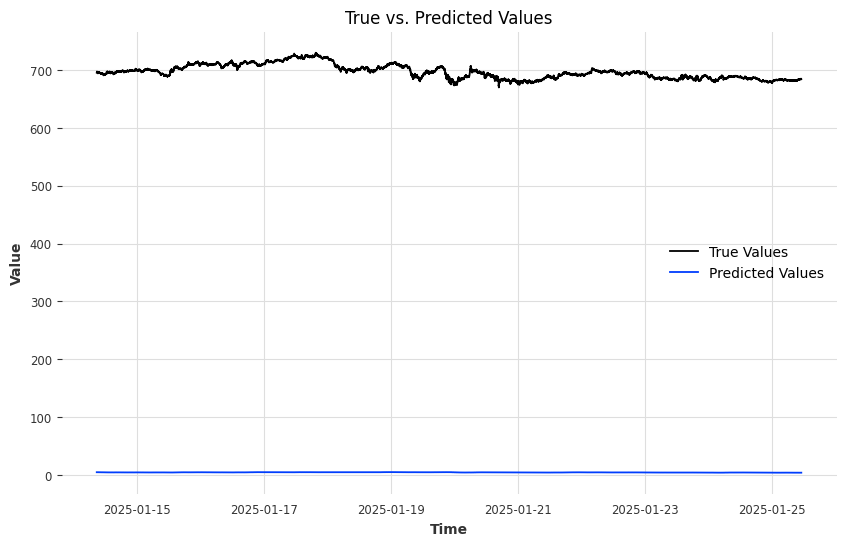

BNB LR
cannot calculate metrics
BNB RF
cannot calculate metrics
BNB LGB
cannot calculate metrics
BNB trans
MSE: 1658.0682209379413
MAE: 39.541111655065926
R2: -10.170488168508689
RMSE: 40.71938384771976


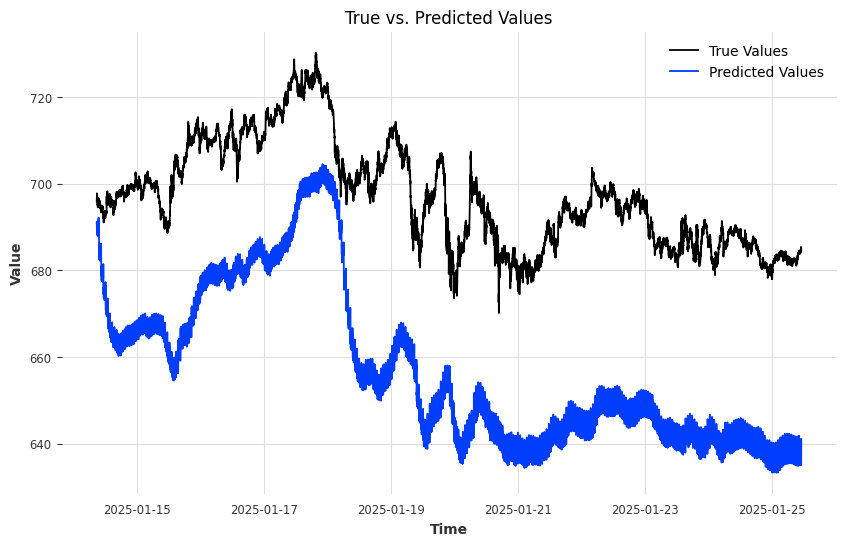

In [ ]:
# トランプ政権前の学習済みモデルを呼び出して予測してみたが、精度が悪すぎるのでやめた

# 学習済みモデルを呼び出す
'''
file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/"
date = '2025-01-15'

loaded_coin_models = {}
loaded_evals = {}
for symbol in symbols:
    for model in models:
        file_name = symbol + '_' + model + '_' + date
        print(symbol,model)
        try:
            loaded_coin_models[symbol + '_' + model] = coin_models[symbol + '_' + model]._load_model(file_path, file_name)
            predictions[file_name] = loaded_coin_models[symbol + '_' + model].predict(X_test)
            loaded_evals[symbol + '_' + model_name] = timeseries_evaluation(y_test, predictions[symbol + '_' + model_name])
        except Exception as e:
            print(symbol,model,f"Error loading model with ", e)


# 予測と精度確認
for symbol in symbols:
    for model in models:
        print(symbol,model)
        try:
            loaded_evals[symbol + '_' + model].print_evaluation()
            loaded_evals[symbol + '_' + model].plot_evaluation(file_name = f'fig_{symbol}_{model}_{date}_after_Trump.eps')
        except:
            print('cannot calculate metrics')

'''

In [ ]:
#pd.read_csv(file_path + f"pd_results_ETH_LR.csv")
#pd.read_csv(file_path + f"pd_results_{symbol + '_' + model}.csv")

# ハイパーパラメータの確定

In [ ]:
# グリッドサーチでランダムフォレストのハイパーパラメータを決める
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# ハイパーパラメータの候補
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# モデルのインスタンス
rf = RandomForestRegressor(random_state=42)

# GridSearch
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# 最適なパラメータとスコア
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: -1.045105553823229


In [ ]:
# ランダムサーチでLightGBMのハイパーパラメータを決める。
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import json  # 結果を保存するため

# ハイパーパラメータの候補
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [10, 20, -1],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# モデルのインスタンス
model = LGBMRegressor(
#    boosting_type='gbdt',
#    objective='regression',
#    device='gpu',  # GPUを利用
    random_state=42)

# RandomizedSearchCVの設定
random_search_lgb = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,                     # 試行回数
    cv=3,                          # クロスバリデーション分割数
    scoring='neg_mean_squared_error',  # 評価指標（MSEの負値）
    n_jobs=-1,                     # 並列処理
    verbose=2,                     # ログの出力レベル
    random_state=42                # 再現性のため
)
# GridSearchCVの設定
#grid_search_lgb = GridSearchCV(
#    estimator=model,
#    param_grid=param_grid,
#    cv=5,                          # クロスバリデーション分割数
#    scoring='neg_mean_squared_error', # 評価指標（MSEの負値）
#    n_jobs=-1,                     # 並列処理
#    verbose=2                      # ログの出力レベル
#)

# ランダムサーチの実行
random_search_lgb.fit(X_train, y_train)
# グリッドサーチの実行
#grid_search_lgb.fit(X_train, y_train)

# 最適なパラメータとスコアの取得
best_params = random_search_lgb.best_params_
best_score = random_search_lgb.best_score_


# 結果をテキストファイルに出力
PATH = "drive/MyDrive/ColabNotebooks/CryptTrade/HyperParams"
output_file = "results.txt"
with open(PATH + output_file, "w") as f:
    f.write("Best Parameters:\n")
    f.write(json.dumps(best_params, indent=4))  # 辞書を整形して保存
    f.write("\n\nBest Negative MSE:\n")
    f.write(f"{best_score:.6f}\n")

# 結果を表示
print("Best Parameters:", best_params)
print("Best Negative MSE:", best_score)
print(f"Results saved to {output_file}")
#print("Best Parameters:", grid_search_lgb.best_params_)
#print("Best Negative MSE:", grid_search_lgb.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 21178, number of used features: 13
[LightGBM] [Info] Start training from score 228.760904
Best Parameters: {'subsample': 0.6, 'num_leaves': 70, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best Negative MSE: -68.06128365027729
Results saved to results.txt


# 以下不要

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import traceback
#from pdpbox import pdp, info_plots#, get_dataset
from interpret import show
from interpret.blackbox import PartialDependence
from sklearn.linear_model import LogisticRegression



# 評価指標は回帰と分類で異なる
if target == 'diff':
    scoring = 'neg_log_loss'
else:
    scoring = 'neg_root_mean_squared_error'

symbol = 'BNB'

X = dfs[symbol].drop(columns=['target_lag'])
y = dfs[symbol]['target_lag']

# トレーニングセットと検証セット、テストセットを指定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

model = coin_models[symbol + '_' + 'lr']
model.predict(X_test)

#clf = LogisticRegression().fit(X_train, y_train)
#clf = coin_models[symbol + '_' + 'lr']
clf = LogisticRegression(C=3.4125189632353266,random_state=42)
clf.fit(X_train, y_train)

perm_imp_result = permutation_importance(
    clf,#loaded_coin_models[symbol + '_' + model],
    X_test,
    y_test,
    n_repeats=3,
    scoring = scoring,
    random_state=42,
    n_jobs=1)

            # データを DataFrame に変換
feature_importance = pd.DataFrame({
    "Feature": X_test.columns, # Columns name
    "Importance Mean": perm_imp_result.importances_mean,
    "Importance Std": perm_imp_result.importances_std
    })

feature_importance

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature  Importance Mean  Importance Std
0           value     1.632574e-01    2.864165e-03
1            diff    -2.083281e-04    3.273569e-05
2              MA    -1.893665e-02    1.322110e-03
3        Momentum    -2.332259e-04    1.264522e-04
4  Amihud Measure    -6.813069e-13    1.559926e-13
5             btc     5.195011e-03    1.452556e-04
6        btc_lag1    -1.013750e-02    5.640907e-04
7        btc_lag2     3.791053e-03    1.389540e-04
8      btc_return     4.974376e-09    6.414904e-10

# Classes

In [ ]:
# データ取得クラス
import pandas as pd

class data_collector:
    def __init__(self, dir):
        self.price_data = None
        self.macro_data = None
        self.onchain_data = None
        self.news_data = None
        self.sentiment_data = None
        self.social_media_data = None
#        self.historical_data = None
#        self.future_data = None
        self.dir = dir

    def collect_price_data(self, symbols, is_volume = True): # Volumeデータを取得する場合はTrue
        df = pd.DataFrame([])
        for symbol in symbols:
            print(symbol)
            if is_volume:
                file_name = f"histominute_{symbol}.snappy.parquet"
            else:
                file_name = f"history_price_{symbol}.snappy.parquet"
            tmp_df = pd.read_parquet(f"{self.dir}/{file_name}")
            tmp_df['symbol'] = symbol
            df = pd.concat([df, tmp_df])
            print(f"*** {file_name} ***")
            if is_volume == False:
                print(tmp_df.agg({"timestamp": ["min", "max", "count"], "value": ["min", "max", "count"]}))

        df.set_index("timestamp", inplace=True)
        df.sort_index(inplace=True)
        print(df.head())
        return(df)

    # 保存済みcsvからデータを取得する
    def collect_price_data_from_csv(self,file_path,file_name):
        tmp_df = pd.read_csv(file_path + file_name)
        tmp_df.set_index("timestamp", inplace=True)
        tmp_df.sort_index(inplace=True)

        return(tmp_df)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# テクニカル指標構築クラス
import pandas as pd
import numpy as np

class CryptoTechnicalIndicators:
#    def __init__(self, price_data, volume_data=None):
    def __init__(self, df, is_volume = True):
        """
        Parameters:
            インデックスは'timestamp'
            カラムは取引量データを含むかどうかで異なる
            取引量データを含まない場合:
                df (pd.DataFrame): 分足の価格データ、カラムには 'value', 'unixTime', 'symbol', 'year', 'month', 'day が含まれる
            取引量データを含む場合:
                df (pd.DataFrame): 分足の価格および取引量データ、カラムには'open', 'high', 'low', 'close', 'volume', 'unixtime','symbol','year','month','day'
                インデックスは'timestamp'
        """
        self.data = df
        self.is_volume = is_volume
#        self.price_data = price_data
#        self.volume_data = volume_data


    def moving_average(self, window=14):
        """単純移動平均 (MA)"""
        if self.is_volume:
            return self.data['close'].rolling(window=window).mean()
        else:
            return self.data['value'].rolling(window=window).mean()
#        return self.price_data['value'].rolling(window=window).mean()

    def rsi(self, window=14):
        """相対力指数 (RSI)"""
        if self.is_volume:
            delta = self.data['close'].diff()
        else:
            delta = self.data['value'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))

    def bollinger_bands(self, window=20, num_std=2):
        """ボリンジャーバンド"""
        ma = self.moving_average(window=window)
        if self.is_volume:
            std_dev = self.data['close'].rolling(window=window).std()
        else:
            std_dev = self.data['value'].rolling(window=window).std()
        upper_band = ma + (std_dev * num_std)
        lower_band = ma - (std_dev * num_std)
        return upper_band, ma, lower_band

    def macd(self, short_window=12, long_window=26, signal_window=9):
        """MACDとシグナルライン"""
        if self.is_volume:
            short_ema = self.data['close'].ewm(span=short_window, adjust=False).mean()
            long_ema = self.data['close'].ewm(span=long_window, adjust=False).mean()
        else:
            short_ema = self.data['value'].ewm(span=short_window, adjust=False).mean()
            long_ema = self.data['value'].ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    def vwap(self):
        """出来高加重平均価格 (VWAP)"""
        if self.is_volume == False:
            raise ValueError("Volume data is required for VWAP calculation.")
        vwap = (self.data['close'] * self.data['volume']).cumsum() / self.data['volume'].cumsum()
        return vwap

    def momentum(self, window=10):
        """モメンタム"""
        if self.is_volume:
            return self.data['close'].diff(window)
        else:
            return self.data['value'].diff(window)

    def volume_trend(self,time_diff = 60):
        """取引量の変化率"""
        if self.is_volume == False:
            raise ValueError("Volume data is required for volume trend calculation.")
        return self.data['volume'].pct_change(time_diff)

    def amihud_measure(self):
        """ Amihud, Y. (2002).
            "Illiquidity and stock returns: cross-section and time-series effects."
            Journal of Financial Markets, 5(1), 31–56.
        """
        if self.is_volume == False:
            raise ValueError("Volume data is required for Amihud measure calculation.")
#        return self.data['close'].diff(1) / self.data['volume']
        return (self.data['close'] - self.data['open']) / self.data['volume']

    def high_low_liq_measure(self):
        """ 高値と安値の変動から流動性を測る"""
        if self.is_volume == False:
            raise ValueError("Volume data is required for high_low_liq_measure calculation.")
        return (self.data['high'] - self.data['low'])/self.data['volume']

    def add_coin_features(self,df,add_coin_price, add_coin_name, time_diff = 60):
        """
            特定のシンボルにBTC、USDC関連の特徴量を追加する。
            この処理はall_indicators()には含めない

            Parameters:
            df: シンボルごとのデータフレームを格納したデータフレーム
            add_coin_price: BTC, USDCなどの価格を格納したデータフレーム
            add_coin_name: add_coin_priceのシンボル名
        """
        if self.is_volume:
            btc = add_coin_price['close']
        else:
            btc = add_coin_price['value']
        # 次の処理は結合するデータフレームのインデックスをdatetimeに変換している場合にのみ必要
        #btc_price.index = pd.to_datetime(btc_price.index)
        df = df.join(btc.rename(add_coin_name))

        # BTC価格の遅延価格を追加
        df[add_coin_name + '_lag1'] = btc.shift(time_diff)
        df[add_coin_name + '_lag2'] = btc.shift(2*time_diff)

        # BTC価格の変化率を追加
        df[add_coin_name + '_return'] = btc.pct_change(time_diff)

        # 欠損値を削除
        return df.dropna()

    def all_indicators(self,time_diff = 60):
        """すべてのテクニカル指標を含むDataFrameを返す"""
#        indicators = pd.DataFrame(index=self.price_data.index)
        indicators = pd.DataFrame(index=self.data.index)
        if self.is_volume:
            indicators['value'] = self.data['close']
        else:
            indicators['value'] = self.data['value']
        indicators['MA'] = self.moving_average()
        indicators['RSI'] = self.rsi()
        upper_band, ma, lower_band = self.bollinger_bands()
        indicators['Bollinger Upper'] = upper_band
        indicators['Bollinger MA'] = ma
        indicators['Bollinger Lower'] = lower_band
        macd, signal_line = self.macd()
        indicators['MACD'] = macd
        indicators['Signal Line'] = signal_line
        indicators['Momentum'] = self.momentum()
        if self.is_volume:
            indicators['VWAP'] = self.vwap()
            indicators['Volume Trend'] = self.volume_trend(time_diff = time_diff)
            indicators['Amihud Measure'] = self.amihud_measure()
            indicators['High-Low Liquidity Measure'] = self.high_low_liq_measure()
            indicators['Volume'] = self.data['volume']
        return indicators

    def selected_indicators(self,
                            tech_indexes = {'MA',
                                            'Momentum',
                                            'Amihud Measure'},
                            time_diff = 60):
        """選択したテクニカル指標を含むDataFrameを返す"""
#        indicators = pd.DataFrame(index=self.price_data.index)
        indicators = pd.DataFrame(index=self.data.index)
        if self.is_volume:
            indicators['value'] = self.data['close']
        else:
            indicators['value'] = self.data['value']
        if 'MA' in tech_indexes:
            indicators['MA'] = self.moving_average()
        if 'RSI' in tech_indexes:
            indicators['RSI'] = self.rsi()
        if 'Bollinger' in tech_indexes:
            upper_band, ma, lower_band = self.bollinger_bands()
            indicators['Bollinger Upper'] = upper_band
            indicators['Bollinger MA'] = ma
            indicators['Bollinger Lower'] = lower_band
        if 'MACD' in tech_indexes:
            macd, signal_line = self.macd()
            indicators['MACD'] = macd
            indicators['Signal Line'] = signal_line
        if 'Momentum' in tech_indexes:
            indicators['Momentum'] = self.momentum()
        if self.is_volume:
            if 'VWAP' in tech_indexes:
                indicators['VWAP'] = self.vwap()
            if 'Volume Trend' in tech_indexes:
                indicators['Volume Trend'] = self.volume_trend(time_diff)
            if 'Amihud Measure' in tech_indexes:
                indicators['Amihud Measure'] = self.amihud_measure()
            if 'High-Low Liquidity Measure' in tech_indexes:
                indicators['High-Low Liquidity Measure'] = self.high_low_liq_measure()
            if 'Volume' in tech_indexes:
                indicators['Volume'] = self.data['volume']
        return indicators



In [ ]:
# 時系列モデルの評価クラス
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

class timeseries_evaluation:
    def __init__(self, y_true, y_pred):
        # numpy 配列に変換（必要に応じて）
#        y_true = np.array(y_true)
#        y_pred = np.array(y_pred)

        # NaN を除去（両方で有効な値を取得）
        valid_indices = ~np.isnan(y_true) & ~np.isnan(y_pred)
        self.y_true = y_true[valid_indices]
        self.y_pred = y_pred[valid_indices]

        # 長さを揃える
#        min_length = min(len(y_true), len(y_pred))
#        self.y_true = y_true[:min_length]
#        self.y_pred = y_pred[:min_length]

        # データが空の場合にエラーを発生させる
        if len(self.y_true) == 0 or len(self.y_pred) == 0:
            raise ValueError("All values are NaN after filtering. Cannot compute metrics.")

#        self.y_true = y_true
#        self.y_pred = y_pred
        self.mse = mean_squared_error(self.y_true, self.y_pred)
        self.mae = mean_absolute_error(self.y_true, self.y_pred)
        self.r2 = r2_score(self.y_true, self.y_pred)
        self.rmse = np.sqrt(self.mse)

    def print_evaluation(self):
        print(f"MSE: {self.mse}")
        print(f"MAE: {self.mae}")
        print(f"R2: {self.r2}")
        print(f"RMSE: {self.rmse}")
        return self.mse, self.mae, self.r2, self.rmse

    def plot_evaluation(self,file_name,
                        file_path = "drive/MyDrive/ColabNotebooks/CryptTrade/Figures/"):
        plt.figure(figsize=(10, 6))
        plt.plot(self.y_true.index, self.y_true.values, label='True Values')
        plt.plot(self.y_true.index, self.y_pred, label='Predicted Values')
#        plt.xticks(np.arange(0,len(self.y_true.index),1000))
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('True vs. Predicted Values')
        plt.legend()
        # 図を保存する
        plt.savefig(file_path + file_name)
        plt.show()
        return None

#    def save_evaluation(self, dir_name, file_name):



In [ ]:
!pip install dask

In [ ]:

# アンサンブルモデルの構築
# ハイパーパラメータの設定もできるようにしたほうがいいだろう。

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted

import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib


#class ModelWrapper(BaseEstimator): # BaseEstimator を継承
#    def __init__(self, model):
#        self.model = model

#    def __getattr__(self, name):
#        try:
#            return getattr(self.model, name)
#        except AttributeError:
#            raise AttributeError(f"'{self.__class__.__name__}' object has no attribute '{name}'")

#    def fit(self, X, y):
#        raise NotImplementedError("fit method not implemented.")

#    def predict(self, X):
#        raise NotImplementedError("predict method not implemented.")

class ModelWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, scaling=False):
        self.model = model
#        self.scaling = scaling
#        self.scaler = None
        self.is_fitted_ = False  # 学習状態を追跡

    def __call__(self, X):
        # __call__ で predict を呼び出す
        return self.predict(X)

    def preprocess(self, X):
#        """Preprocess input data for scaling."""
        if self.scaler is None:
            self.scaler = StandardScaler()
            X = self.scaler.fit_transform(X)
        else:
            X = self.scaler.fit_transform(X)
        return X

    def fit(self, X, y):
        """Fit the model."""
        self.X_train = X # fit時に入力したデータは訓練データとして保持しておく
        self.y_train = y
#        if self.scaling:
#            X = self.preprocess(X)
        self.model.fit(X, y)
        self.is_fitted_ = True  # 学習済み状態を記録
        self.model.is_fitted_ = True
        return self

    def predict(self, X):
        """Predict using the model."""
        print("Wrapper's prediction")
        check_is_fitted(self, 'is_fitted_')  # 学習済み状態を確認
#        print(f"Model is fitted: {self.is_fitted_}")
        if self.scaling:
            X = self.preprocess(X)
        return self.model.predict(X)

    # 学習したモデルを保存する
    def save_model(self,file_path,file_name):
        with open(file_path + file_name+'.joblib', 'wb') as f:
            joblib.dump(self, f)

    # 保存したモデルを呼び出す
    # この場合はモデルのインスタンスはないことに注意
    def _load_model(self,file_path,file_name):
        with open(file_path + file_name+'.joblib', 'rb') as f:
            model = joblib.load(f)
#        self.is_fitted_ = True  # 学習済み状態を記録
        return(model)


class LinearRegressionModel(ModelWrapper):
    def __init__(self,
                 params = {'scaling':False,
                           'scaler':"StandardScaler", # StandardScaler, MinMaxScaler, RobustScaler
                           'model_type':None, # Normal, Ridge, Lasso
                           'alpha': 0.1 # 正則化パラメータ
                 }):
#        super().__init__(LinearRegression()) # 親クラスの__init__を呼び出す
        #super().__init__(LinearRegression()) # 親クラスの__init__を呼び出す
#        self.model = LinearRegression()
        self.scaling = params['scaling']
        self.scaler = None
        if params['scaler'] == "StandardScaler":
            self.scaler = StandardScaler()
        elif params['scaler'] == "MinMaxScaler":
            self.scaler = MinMaxScaler()
        elif params['scaler'] == "RobustScaler":
            self.scaler = RobustScaler()

        self.model_type = params['model_type']
        self.alpha = params['alpha']
        if self.model_type == 'Ridge':
            self.model = Ridge(self.alpha, random_state = 42)
        elif self.model_type == 'Lasso':
            self.model = Lasso(self.alpha, random_state = 42)
        else:
            self.model = LinearRegression()
#        self.model = Lasso(self.alpha)
#        super().__init__(self.model, scaling=params['scaling'])
#        self.scaling = params['scaling']
#        self.model = LinearRegression()
        self._estimator_type = "regressor" # これを追加！

#    def get_feature_names_out(self, feature_names=None):
#        """Get output feature names."""
#        return feature_names if feature_names is not None else np.arange(self.n_features_in_)

    #def n_features_in_(self):
    #    """Number of features seen during fit."""
    #    return self.model.n_features_in_

    #def __sklearn_clone(self, X=None, y=None, **kwargs):
    #    new_model = self.model.clone(X=X, y=y, **kwargs)  # Clone the wrapped model
    #    return LinearRegressionModel(new_model)  # Return a new LinearRegressionModel instance

#    def preprocess(self, X):
#        """Preprocess input data to ensure compatibility."""
#        scaler = StandardScaler()
#        scaler = MinMaxScaler()
#        X = scaler.fit_transform(X)
#        return X

#    def fit(self, X, y):
#        if self.scaling:
#            X = self.preprocess(X)
#        self.model.fit(X, y)
#        self.is_fitted_ = True  # 学習済み状態を記録
#        return self

#    def fit(self, X, y):
#        print("Starting fit method")
#        print(f"X type: {type(X)}, shape: {X.shape}") # Xの型と形状をfit内でも確認
#        print(f"y type: {type(y)}, shape: {y.shape}") # yの型と形状をfit内でも確認
#        if self.scaling:
#            print("Scaling is True, preprocessing data")
#            X = self.preprocess(X)
#            print(f"X after preprocess type: {type(X)}, shape: {X.shape}") # 前処理後のXの型と形状を確認
#        try:
#            print("Calling self.model.fit(X, y)")
#            self.model.fit(X, y)
#            print("self.model.fit(X, y) completed successfully")
#            if hasattr(self.model, 'coef_'):
#                print("Model has coef_ attribute. Fit appears successful.")
#            else:
#                print("Model does NOT have coef_ attribute after fit.")
#        except Exception as e:
#            print(f"Error in fit method: {e}")
#        print("Exiting fit method")

#    def predict(self, X):
        # モデル自体が学習済みか確認
#        if not hasattr(self.model, 'coef_'):
#            raise NotFittedError("Model is not fitted yet.")

 #       if self.scaling:
 #           X = self.preprocess(X)
 #       return self.model.predict(X)
    def fit(self, X, y):
        """Fit the model."""
        self.X_train = X # fit時に入力したデータは訓練データとして保持しておく
        self.y_train = y

        if self.scaling:
            X = self.preprocess(X)
        self.model.fit(X, y)
        self.is_fitted_ = True  # 学習済み状態を記録
        self.model.is_fitted_ = True
        return self

    def get_params(self, deep=True):
        return {"model": self.model}

    def set_params(self, **params):
        self.model = params.get("model", self.model)
        return self

class RandomForestModel(ModelWrapper):
    def __init__(self,
                 param_rf = {
                     'max_depth': 20,
                     'max_features': 'sqrt',
                     'min_samples_leaf': 4,
                     'min_samples_split': 10,
                     'n_estimators': 100
                     }
                 ):
        self.model = RandomForestRegressor(**param_rf)

#    def fit(self, X, y):
#        self.model.fit(X, y)

    '''
        RandomForestでは追加学習は想定していない
        以下のコードも枝を拡張しているだけで、データ追加にともなうツリー全体の再構築はしてない。
        そのため、追加データによりモデルの微調整にはなっておらず、精度が高くなるかは不透明であることに気をつけたい。
        おそらく、再学習したほうが精度は担保されるだろう。
    '''
    def fine_tune(self, X_new, y_new, additional_trees=10):
        """追加データで木を増やして学習"""
        if not self.is_fitted_:
            raise ValueError("モデルが学習されていません。先に fit を実行してください。")
        # データ更新
        self.X_train = pd.concat([self.X_train, X_new])
        self.y_train = pd.concat([self.y_train, y_new])
        # 木の数を増加
        print('Fine tune in RF 1')
        self.model.n_estimators += additional_trees
        print('Fine tune in RF 2')
        self.model.warm_start = True
        print('Fine tune in RF 3')
        self.model.fit(self.X_train, self.y_train)
#        print(f"Model updated with total {self.X_train.shape[0]} samples and {self.model.n_estimators} trees")
        return self



    def predict(self, X):
        return self.model.predict(X)

class LightGBMModel(ModelWrapper):
    def __init__(self,
                 param_lgb = {
                     'objective': 'regression',
                     'metric': 'rmse',
                     'boosting_type': 'gbdt',
                     'subsample':0.6,
                     'num_leaves': 70,
                     'n_estimators': 100,
                     'min_child_samples': 10,
                     'max_depth': -1,
                     'learning_rate': 0.01,
                     'colsample_bytree': 0.6
                     }
                 ):
        # LightGBMのパラメータ
        self.model = lgb.LGBMRegressor(**param_lgb)

#    def fit(self, X, y):
#        self.model.fit(X, y)

    def fine_tune(self, X_new, y_new, num_boost_round=100):
        if not self.is_fitted_:
            raise ValueError("モデルが学習されていません。先に fit を実行してください。")
        # 全データを結合して新しいデータセット作成
        full_X = pd.concat([self.X_train, X_new])
        full_y = pd.concat([self.y_train, y_new])
#        train_data = lgb.Dataset(full_X, label=full_y)
        # 既存モデルを基に追加学習
#        self.model = lgb.train(self.params, train_data, num_boost_round=num_boost_round, init_model=self.model)
        print('Before fine-tune for LightGBM')
#        self.model.fit(full_X, full_y, num_boost_round=num_boost_round, init_model=self.model)
        self.model.fit(full_X, full_y, init_model=self.model)
        print('Fine tune for LightGBM is suceeded')
        self.X_train = full_X
        self.y_train = full_y
        print('Fine tune for LightGBM is suceeded 2')
#        print(f"Model fine-tuned with total {full_X.shape[0]} samples")
        return self

    def predict(self, X):
        return self.model.predict(X)



class FCNNModel(ModelWrapper): #Fully Connected Neural Network
    def __init__(self,
                 layers=2,
                 units=64,
                 l2_lambda=0.01,
                 learning_rate=0.001,
                 batch_size=32,
                 dropout = 0.2):
        self.batch_size = batch_size
        self.model = Sequential()

        # Add the hidden layers
        for _ in range(layers):
            self.model.add(Dense(
                units=units,
                activation='relu',
                kernel_regularizer=l2(l2_lambda)
            ))
            self.model.add(Dropout(dropout))

        # Add the output layer (1 unit for regression, linear activation)
        self.model.add(Dense(1, activation='linear'))

        # Compile the model
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mae',
            metrics=['mae']
        )

    def preprocess(self, X):
        """Preprocess input data to ensure compatibility."""
        scaler = StandardScaler()
#        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        return X if hasattr(X, 'values') else X

    def fit(self, X, y, validation_data=None, epochs=100):
        """Train the model with early stopping."""
        X = self.preprocess(X)
        if validation_data:
            val_X, val_y = validation_data
            val_X = self.preprocess(val_X)
            validation_data = (val_X, val_y)

        early_stopping = EarlyStopping(
            monitor='val_loss' if validation_data else 'loss',
            patience=10,
            restore_best_weights=True
        )

        self.model.fit(
            X, y,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=self.batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

    def predict(self, X):
        """Make predictions."""
        X = self.preprocess(X)
        return self.model.predict(X).ravel()

'''
CNNも実装はしたけれど、タイムステップ分だけ予測値が減るのでモデルを結合する場合に矛盾が生じる。
実質的に使えないといってよいので、お蔵入りだろう。
'''
class CNNModel(ModelWrapper):
    def __init__(self, #input_shape,
                 time_steps = 4,
                 num_filters=32, kernel_size=3, pool_size=2, dropout_rate=0.5, learning_rate=0.001):
        """
        CNNモデルを初期化する
        Args:
            input_shape: 入力データの形状 (タイムステップ数, 特徴量数)
            num_filters: 畳み込みフィルタの数
            kernel_size: 畳み込みカーネルのサイズ
            pool_size: プーリング層のサイズ
            dropout_rate: ドロップアウト率
            learning_rate: 学習率
        """
        self.time_steps = time_steps

        self.model = Sequential()

        # 畳み込み層 + プーリング層
        self.model.add(Conv1D(
            filters=num_filters,
            kernel_size=kernel_size,
            activation='relu'#,
#            input_shape=input_shape
        ))
        self.model.add(MaxPooling1D(pool_size=pool_size))

        # Flatten層
        self.model.add(Flatten())

        # 全結合層
        self.model.add(Dense(64, activation='relu'))  # 隠れ層
        self.model.add(Dropout(dropout_rate))  # ドロップアウト

        # 出力層
        self.model.add(Dense(1, activation='linear'))  # 回帰タスク用

        # モデルのコンパイル
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mse',  # 回帰タスクの場合
            metrics=['mse']
        )

    def create_sequences(self, X, y = None, time_steps = 5):
        """
        特徴量データとターゲットデータを基にタイムステップ形式に変換する
        Args:
            X: 特徴量データ (2次元配列、形状: (サンプル数, 特徴量数))
            y: ターゲットデータ (1次元配列、形状: (サンプル数,))
            time_steps: 使用するタイムステップ数
        Returns:
            X_seq: タイムステップ形式の特徴量データ (サンプル数, タイムステップ数, 特徴量数)
            y_seq: 対応するターゲットデータ (サンプル数,)
        """
        X_seq, y_seq = [], []
        for i in range(len(X) - time_steps):
            X_seq.append(X[i:i + time_steps])  # 特徴量のタイムステップ分のスライス
            if y is not None:
                y_seq.append(y[i + time_steps])   # 対応するターゲット
        if y is not None:
            return np.array(X_seq), np.array(y_seq)
        else:
            return np.array(X_seq)

    def fit(self, X, y, validation_data=None, epochs=100, batch_size=32):
        """
        モデルを訓練する
        Args:
            X: 訓練データ
            y: 訓練データのラベル
            validation_data: 検証データ (X_val, y_val)
            epochs: エポック数
            batch_size: バッチサイズ
        """
        # EarlyStoppingコールバック
        early_stopping = EarlyStopping(
            monitor='val_loss' if validation_data else 'loss',
            patience=10,
            restore_best_weights=True
        )
        # データにシーケンスをもたせる
        X_timestep, y_timestep = self.create_sequences(X, y,self.time_steps)
        print("変換後のX_seqの形状:", X_timestep.shape)  # (2, 3, 3)
        print("変換後のy_seqの形状:", y_timestep.shape)  # (2, )

        # モデルの訓練
        self.model.fit(
            X_timestep, y_timestep,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

    def predict(self, X):
        """
        モデルで予測を行う
        Args:
            X: 入力データ
        Returns:
            モデルの予測結果
        """
        # データにシーケンスをもたせる
        X_timestep = self.create_sequences(X, time_steps = self.time_steps)

        return self.model.predict(X_timestep).ravel()


class GRUModel(ModelWrapper):
    def __init__(self,
                 layers = 1,
                 units=64, # Layerごとにunit数を決めることもできるが、簡単のため全レイヤーでユニット数は共通とする
                 l2_lambda=0.01,
                 learning_rate=0.001,
                 batch_size = 32,
                 dropout = 0.2):
        self.batch_size = batch_size
        self.model = Sequential()
        if layers > 1:
            for _ in range(layers - 1):
                self.model.add(GRU(
                    units=units,
                    activation='relu',#'tanh',
                    return_sequences=True,
                    dropout = dropout,
                    kernel_regularizer=l2(l2_lambda)
                ))
        self.model.add(GRU(
            units=units,
            activation='tanh',#'tanh',
            return_sequences=False,
            dropout = dropout,
            kernel_regularizer=l2(l2_lambda)
        ))
        self.model.add(Dense(1, activation='linear'))
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss="huber", #'huber',
            metrics=['mse']
        )

    def preprocess(self, X):
#        scaler = StandardScaler()
        scaler = MinMaxScaler()
#        scaler = RobustScaler()
        X = scaler.fit_transform(X)
        return X.reshape(X.shape[0], 1, X.shape[1])

    def fit(self, X, y, validation_data=None, epochs=1000):
        X = self.preprocess(X)
        early_stopping = EarlyStopping(
            monitor='val_loss' if validation_data else 'loss',
            patience=10,
            restore_best_weights=True
        )
        self.model.fit(
            X, y,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=self.batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

    def predict(self, X):
        X = self.preprocess(X)
        return self.model.predict(X).ravel()



In [ ]:
class EnsembleModel:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X, method='blending'):
        predictions = [model.predict(X) for model in self.models]

        if method == 'stacking':
            # スタッキング：メタモデルを適用（例として線形回帰を使用）
            from sklearn.linear_model import LinearRegression
            meta_model = LinearRegression()
            meta_model.fit(predictions, y)
            return meta_model.predict(predictions)

        elif method == 'blending':
            # ブレンディング：平均を取る
            return np.mean(predictions, axis=0)

        else:
            raise ValueError("Invalid method. Choose 'stacking' or 'blending'.")


## Transformer

In [ ]:

# Transformerのパッケージをインストールする
# 今回は時系列モデルなのでdartsを採用しますが、ほかにもHugging FaceやPytorch Lightningなども選択肢の一つのようです。
!pip install darts

In [ ]:
# Transformer カスタムクラス
import pandas as pd
from darts import TimeSeries
from darts.models import TransformerModel
from darts.dataprocessing.transformers import Scaler

import pickle

# 計算の高速化のため
import torch
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True

import copy # deepcopy用に追加


class MyTransformerModel(ModelWrapper):
    def __init__(self,
                 params = {
                     'input_chunk_length':8,
                     'output_chunk_length':3,
                     'num_encoder_layers':1, # updated
                     'num_decoder_layers':1, # updated
                     'd_model':128,
                     'nhead':4,
                     'dropout':0.1,
                     'batch_size':64,
                     'n_epochs':1,
                     'model_name':"price_prediction_transformer",
                     'random_state':42
                  }
                 #window_length = 8, # 過去8分のデータを使用(window_length = 8)
                 #output_chunk_length = 3, #len(y_test),  # テスト期間の予測??
                 #num_encoder_layers=1,
                 #num_decoder_layers=1,
                 #d_model=128,  # Added: Dimension of the model
                 #nhead=4,     # Added: Number of heads
                 #dropout=0.1,
                 #batch_size=64,
                 #n_epochs=5, # 100
                 #model_name="price_prediction_transformer",
                 #random_state=42
                 ):
        self._estimator_type = "regressor" # これを追加！
        self.window_length = params['input_chunk_length']#window_length
        self.params = params
        self.model = None #TransformerModel(**self.params)
        self.is_fitted_ = False
        self.scaler_input = None
        self.scaler_target = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.X_test_index = None


#        self.scaled_series_target = None
#        self.scaler_input = None
#        self.scaler_target = None
#        self.model = TransformerModel(
#            input_chunk_length=window_length,
#            output_chunk_length=output_chunk_length,
#            num_encoder_layers=num_encoder_layers, # updated
#            num_decoder_layers=num_decoder_layers, # updated
#            d_model=d_model,
#            nhead=nhead,
#            dropout=dropout,
#            batch_size=batch_size,
#            n_epochs=n_epochs,
#            model_name=model_name,
#            random_state=random_state
#            )

    def __getstate__(self): # 追加
        state = self.__dict__.copy()
        # model は保存しない
        del state['model']
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        # self.model を再構築 ★重要★
        self.model = TransformerModel(**self.params)
        if self.model is None:
            raise ValueError("TransformerModel が正しく復元されませんでした。")
        # 必要な設定を再構築
        if self.scaled_series_target is None:
            print("Warning: scaled_series_target が復元されていません。")


    def preprocess(self, X, y = None):
        series_input = TimeSeries.from_dataframe(X, fill_missing_dates=True, freq=None)  # Or freq=None
        if y is not None:
            series_target = TimeSeries.from_series(y, fill_missing_dates=True, freq=None)  # Or freq=None
        # スケーリング
        self.scaler_input = Scaler() # Scalerは共通して使うので
        self.scaler_target = Scaler() # Scalerは共通して使うので
        scaled_series_input = self.scaler_input.fit_transform(series_input)
        if y is not None:
            self.scaled_series_target = self.scaler_target.fit_transform(series_target)
            return scaled_series_input, self.scaled_series_target
        else:
            return scaled_series_input

    def fit(self, X, y):
        self.X_train = X # fit時に入力したデータは訓練データとして保持しておく
        self.y_train = y
        scaled_series_input, scaled_series_target = self.preprocess(X, y)
        self.model = TransformerModel(**self.params) # fit時にモデルを構築
        self.model.fit(past_covariates = scaled_series_input, series = scaled_series_target)
        self.is_fitted_ = True  # 学習済み状態を記録

    def predict(self, X):

        if not self.is_fitted_:
            raise ValueError("モデルが学習されていません。先に fit を実行してください。")

        if self.X_train is None:
            raise ValueError("X_train が設定されていません。")

        '''
            Partial Dependenceでpredictを複数回実行する際、
            X_testの書き換えが起きているのかもしれない。
        '''
        if self.X_test_index is None:
#            self.X_test = X
            self.X_test_index = X.index
        else:
#            print(f"shape of X:\n{X.shape}")
#            print(f"contents of X:\n{X}")
#            print(f"index of X:\n{X.index}")
            # Xにインデックスself.X_test_indexを与える
            X.index = self.X_test_index
#            print(f"shape of X:\n{X.shape}")
#            print(f"contents of X:\n{X}")
#            print(f"index of X:\n{X.index}")

#            X = self.X_test

        if self.scaled_series_target is None:
            raise ValueError("scaled_series_target が復元されていません。")

#        print('Transformer customized prediction!')
#        print(f"At first, index of X_test:\n{X.index}")
        #print('I want to see I am here!!!')
        #print('In Transformer, X_train', self.X_train)
        #print('index of X_train', self.X_train.index)
        #print('index of X', X.index)
        #print('window length ',self.window_length, 'should be consistent with the shape of X_train',self.X_train.shape)
        #print(f"self.X_train index duplicated: {self.X_train.index.duplicated().any()}")
        #print(f"Duplicate indices in self.X_train: {self.X_train.index[self.X_train.index.duplicated()]}") # 重複しているインデックスを表示

        # 重複のあるインデックスを表示
 #       duplicated_indices = self.X_train.index.intersection(X.index)
 #       print(f"Duplicated indices:\n{duplicated_indices}")


 #       print(f"before concat, index of X_train:\n{self.X_train.index}")
 #       print(f"before concat, index of X:\n{X.index}")

        # 訓練データに基づいてスケーリング済みのテストデータを準備
        series_input_test_full = pd.concat([self.X_train.iloc[-self.window_length:], X], axis=0)


        # 重複を削除（最終行を保持）
#        series_input_test_full = series_input_test_full[~series_input_test_full.index.duplicated(keep='last')]

  #      print('length of series_input_test_full', series_input_test_full.shape)
  #      print('Transformer customized prediction 1')
        #print('Transformer customized prediction 2')
        #print(f"Type of series_input_test_full: {type(series_input_test_full)}")
        #print(f"Shape of series_input_test_full: {series_input_test_full.shape}")
        #print(f"Data types of series_input_test_full:\n{series_input_test_full.dtypes}")
        #print(f"series_input_test_full head:\n{series_input_test_full.head()}") # 先頭の数行を表示
        #print(f"series_input_test_full tail:\n{series_input_test_full.tail()}") # 末尾の数行を表示
        #print(f"series_input_test_full isnull().any():\n{series_input_test_full.isnull().any()}") # 欠損値の有無を確認

        #print(f"self.scaler_input is None: {self.scaler_input is None}")
        # スケーラーの種類を確認
        #print(f"Type of self.scaler_input: {type(self.scaler_input)}")
        #print('Transformer customized prediction 2.1')

        try:
            # DartsのTimeSeriesに変換
   #         print(f"In usual line, before index of series_input_test_full:\n{series_input_test_full.index}")
            series_input_test_scaled = self.scaler_input.transform(
                TimeSeries.from_dataframe(series_input_test_full, fill_missing_dates=True, freq=None))
        except Exception as e:
            print(f"Error in scaling: {e}")
            print(f"series_input_test_full head:\n{series_input_test_full.head()}")
            print(f"series_input_test_full tail:\n{series_input_test_full.tail()}")
            print(f"index of series_input_test_full:\n{series_input_test_full.index}")
            print(f"type of index of series_input_test_full:\n{type(series_index_test_full.index)}")
            raise

    #    print('Transformer customized prediction 3')
        forecast = self.model.predict(
#            n=len(y_test),  # テスト期間の値を予測
            n=X.shape[0],  # テスト期間の値を予測
            series=self.scaled_series_target,
            past_covariates=series_input_test_scaled
            )


     #   print('Transformer customized prediction 4')

        # スケールを元に戻す
        forecast_original = self.scaler_target.inverse_transform(forecast)
      #  print('Transformer customized prediction 5')

        return forecast_original.values().reshape(-1)

    # 学習したモデルを保存する
    def save_model(self,file_path,file_name):
        print("save model in MyTransformerModel")
        # パラメータ、スケーラー、学習データを保存
        data_to_save = {
            "params": self.params,
            "scaler_input": self.scaler_input,
            "scaler_target": self.scaler_target,
            "X_train": self.X_train,
            "y_train": self.y_train,
            "is_fitted_": self.is_fitted_ # is_fitted_を保存 ★追加★
        }
        print('保存時の学習状態',self.is_fitted_)
        joblib.dump(data_to_save, file_path + file_name + '.joblib')

        # モデル本体を保存
        #with open(file_path + file_name+'.joblib', 'wb') as f:
        #    joblib.dump(self, f)

        # PyTorchモデルのstate_dictを保存
        torch.save(self.model.model.state_dict(), file_path + file_name + '_pytorch.pth')

#            pickle.dump(self, f)
#        print("print X_train", self.X_train)

        # TransformerModel の学習状態を別途保存
        #self.model.save(file_path + file_name + '_state')
        # PyTorch モデルの状態を保存
#        torch.save(self.model.model.state_dict(), file_path + file_name + '_pytorch.pth')
#        torch.save(self.model.model, file_path + file_name + '_pytorch.pth')

    # 保存したモデルを呼び出す
    # この場合はモデルのインスタンスはないことに注意
    @staticmethod
    def _load_model(file_path,file_name):
        # モデル本体を復元
       # with open(file_path + file_name+'.joblib', 'rb') as f:
       #     model = joblib.load(f)
#            model = pickle.load(f)
#            print('load pickle')
                # パラメータ、スケーラー、学習データをロード

        loaded_data = joblib.load(file_path + file_name + '.joblib')
        params = loaded_data["params"]
        scaler_input = loaded_data["scaler_input"]
        scaler_target = loaded_data["scaler_target"]
        X_train = loaded_data["X_train"]
        y_train = loaded_data["y_train"]
        is_fitted_ = loaded_data["is_fitted_"] # is_fitted_をロード ★追加★

        # モデルを再構築
        model = MyTransformerModel(params)
        model.scaler_input = scaler_input
        model.scaler_target = scaler_target
        model.X_train = X_train
        model.y_train = y_train
        series_input, series_target = model.preprocess(X_train, y_train)
        model.model = TransformerModel(**params)
        model.model.fit(series=series_target, past_covariates=series_input)

        # state_dictをロード
        state_dict = torch.load(file_path + file_name + '_pytorch.pth')
        model.model.model.load_state_dict(state_dict)
        model.model.model.eval()
        model.is_fitted_ = is_fitted_ # is_fitted_を設定 ★追加★


        # model を再構築
#        model.model = TransformerModel(**model.params) # ★この行が重要★
#        print('modelの内容',model.model.model)

        # TransformerModel の学習状態を復元
#        model.model.load(file_path + file_name + '_state')
        # PyTorch モデルの状態を復元
#        if model.model.model is None:
#            raise ValueError("内部 PyTorch モデルが None です。復元に失敗しました。")
        #model.model.model.load_state_dict(torch.load(file_path + file_name + '_pytorch.pth'))
        #model.model.model.eval()  # 評価モードに切り替え

        # PyTorch モデル自体をロードし、TransformerModelにセット ★変更点★
 #       pytorch_model = torch.load(file_path + file_name + '_pytorch.pth')
        #model.model = _TorchModuleInstance(pytorch_model) # 古いdartsのバージョンでは必要
 #       model.model = copy.deepcopy(pytorch_model) #pytorch_modelをdeepcopyする


        return model


    # PartialDependenceを実行するため
#    def __call__(self, X):
#        # __call__ で predict を呼び出す
#        return self.predict(X)


In [ ]:
# Transformer カスタムクラス
import pandas as pd
from darts import TimeSeries
from darts.models import TransformerModel
from darts.dataprocessing.transformers import Scaler

import pickle

# 計算の高速化のため
import torch
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True

# 追加学習のため
from pytorch_lightning import Trainer
import os
import time

import copy # deepcopy用に追加



class MyTransformerModelSimpler(ModelWrapper):
    def __init__(self,
                 params = {
                     'input_chunk_length':8,
                     'output_chunk_length':3,
                     'num_encoder_layers':1, # updated
                     'num_decoder_layers':1, # updated
                     'd_model':128,
                     'nhead':4,
                     'dropout':0.1,
                     'batch_size':64,
                     'n_epochs':1,
                     'model_name':"price_prediction_transformer",
                     'random_state':42
                  }
                 #window_length = 8, # 過去8分のデータを使用(window_length = 8)
                 #output_chunk_length = 3, #len(y_test),  # テスト期間の予測??
                 #num_encoder_layers=1,
                 #num_decoder_layers=1,
                 #d_model=128,  # Added: Dimension of the model
                 #nhead=4,     # Added: Number of heads
                 #dropout=0.1,
                 #batch_size=64,
                 #n_epochs=5, # 100
                 #model_name="price_prediction_transformer",
                 #random_state=42
                 ):
        self._estimator_type = "regressor" # これを追加！
        self.window_length = params['input_chunk_length']#window_length
        self.params = params
        self.model = None #TransformerModel(**self.params)
        self.is_fitted_ = False
        self.scaler_input = None
        self.scaler_target = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.X_test_index = None
        self.trainer = None
        self.checkpoint_pth = None


#        self.scaled_series_target = None
#        self.scaler_input = None
#        self.scaler_target = None
#        self.model = TransformerModel(
#            input_chunk_length=window_length,
#            output_chunk_length=output_chunk_length,
#            num_encoder_layers=num_encoder_layers, # updated
#            num_decoder_layers=num_decoder_layers, # updated
#            d_model=d_model,
#            nhead=nhead,
#            dropout=dropout,
#            batch_size=batch_size,
#            n_epochs=n_epochs,
#            model_name=model_name,
#            random_state=random_state
#            )

    def __getstate__(self): # 追加
        state = self.__dict__.copy()
        # model は保存しない
        del state['model']
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        # self.model を再構築 ★重要★
        self.model = TransformerModel(**self.params)
        if self.model is None:
            raise ValueError("TransformerModel が正しく復元されませんでした。")
        # 必要な設定を再構築
        if self.scaled_series_target is None:
            print("Warning: scaled_series_target が復元されていません。")


    def preprocess(self, X, y = None):
        print('preprocess 0')
        series_input = TimeSeries.from_dataframe(X, fill_missing_dates=True, freq=None)  # Or freq=None
        print('preprocess 1')
        if y is not None:
            series_target = TimeSeries.from_series(y, fill_missing_dates=True, freq=None)  # Or freq=None
        # スケーリング
        self.scaler_input = Scaler() # Scalerは共通して使うので
        self.scaler_target = Scaler() # Scalerは共通して使うので
        print('preprocess 2')
        scaled_series_input = self.scaler_input.fit_transform(series_input)
        print('preprocess 3')
        if y is not None:
            print('preprocess 4.1')
            self.scaled_series_target = self.scaler_target.fit_transform(series_target)
            print('preprocess 5')
            print(f"Scaled input values in preprocess: {scaled_series_input.values()[-3:]}")
            print(f"Scaled target values in preprocess: {self.scaled_series_target.values()[-3:]}")
            return scaled_series_input,self.scaled_series_target
            #print('can i print?')
        else:
            print('preprocess 4.2')
            return scaled_series_input

    def fit(self, X, y):
        self.X_train = X # fit時に入力したデータは訓練データとして保持しておく
        self.y_train = y
        scaled_series_input, scaled_series_target = self.preprocess(X, y)
        self.model = TransformerModel(**self.params) # fit時にモデルを構築
#        self.trainer = Trainer(max_epochs=self.params['n_epochs'])  # 初回Trainer初期化
        self.model.fit(past_covariates = scaled_series_input, series = scaled_series_target)
        self.is_fitted_ = True  # 学習済み状態を記録



    def fine_tune(self, X, y,n_epochs = 1):
        print('fine tune before fitting 2')
        # X,yが空でなければ以下の作業を実行していく。空ならばもとのモデルをそのまま返す
        if X.empty or y.empty:
            print('fine tunning is not necessariy due to the no renewal of data')
            return self
        # X,yのサイズが150以下でもうまくいかない
        elif X.shape[0] <= 150 or y.size <= 150:
            print('fine tunning is not necessary due to the size of data')
            return self
        else:
            self.X_train = X # fit時に入力したデータは訓練データとして保持しておく
            self.y_train = y
            print('fine tuning before fitting 3')
#            print('Confirmation preprocess()', self.preprocess(self.X_train, self.y_train))
#            print('Confirmation preprocess() 2', self.preprocess(self.X_train, y))
#            print('Confirmation preprocess() 3', self.preprocess(X, self.y_train))
            scaled_series_input, scaled_series_target = self.preprocess(self.X_train, self.y_train)
            # スケーリング後の確認
            print('Confirmation')
            print(f"Scaled input values: {scaled_series_input.values()[-3:]}")
            print(f"Scaled target values: {scaled_series_target.values()[-3:]}")
            # あとで消す
#            scaled_series_input, scaled_series_target = self.preprocess(self.X_train, self.y_train)
#            self.model = TransformerModel(**self.params) # fit時にモデルを構築
#            print('fine tuning before fitting 3')
#            self.params['n_epochs'] = n_epochs
#            self.params['dropout'] = 0.0
#            print('fine tuning before fitting 3.1')
            # モデルの再構築（同じ構造で新しいモデルを作る）
            print('fine tuning before fitting 4')
#            self.model = TransformerModel(**self.params) # fit時にモデルを構築
#            self.model.model.load_state_dict(torch.load("transformer_checkpoint.pth"))
#            print('fine tuning before fitting 5')

            # Trainerが未設定の場合は新しく初期化
#            if self.trainer is None:
#                self.trainer = Trainer(max_epochs=n_epochs)

            print('fine tuning before fitting 5')

#            print(self.trainer)
#            print('fine tuning before fitting 6')
#            print(self.checkpoint_pth)
#            print('fine tuning before fitting 7')
            # 追加データで学習
            print('n_epochs',n_epochs)
            self.model.fit(series = scaled_series_target,
                           past_covariates = scaled_series_input,
                           epochs = n_epochs)#,
#                           trainer = self.trainer)
#                           ckpt_path=self.checkpoint_pth)
#            self.model.fit(series=scaled_series_target, past_covariates=scaled_series_input,epochs = n_epochs)
            print('fine tuning after fitting 8')




#            self.model.epochs = n_epochs
#            print('fine tuning before fitting 3.2',self.model.epochs)
#            self.model.fine_tune(past_covariates = scaled_series_input, series = scaled_series_target)
            #self.model.fit(past_covariates = scaled_series_input, series = scaled_series_target)
#            print('fine tuning before fitting 4')

#            print('fine tune before fitting 5')
 #           self.model = TransformerModel(**self.params) # fit時にモデルを構築
#        self.model.dropout = 0
#        self.model.n_epochs = n_epochs
#            print('fine tune before fitting 6')
#            self.model.fine_tune(past_covariates = scaled_series_input, series = scaled_series_target,
#                                 epochs = n_epochs)
 #           print('fine tune before fitting 7')
    #    self.is_fitted_ = True  # 学習済み状態を記録
 #           print('fine tune',self.is_fitted_,self.model.epochs)
            return self

    def predict(self, X):
        print('I am here in Prediction 1')

        if not self.is_fitted_:
            raise ValueError("モデルが学習されていません。先に fit を実行してください。")

        print('I am here in Prediction 2')
        if self.X_train is None:
            raise ValueError("X_train が設定されていません。")

        print('I am here in Prediction 3')
        '''
            Partial Dependenceでpredictを複数回実行する際、
            X_testの書き換えが起きているのかもしれない。
        '''
        if self.X_test_index is None:
#            self.X_test = X
            self.X_test_index = X.index
        else:
#            print(f"shape of X:\n{X.shape}")
#            print(f"contents of X:\n{X}")
#            print(f"index of X:\n{X.index}")
            # Xにインデックスself.X_test_indexを与える
            X.index = self.X_test_index
#            print(f"shape of X:\n{X.shape}")
#            print(f"contents of X:\n{X}")
#            print(f"index of X:\n{X.index}")

#            X = self.X_test

        print('I am here in Prediction 4')
        if self.scaled_series_target is None:
            raise ValueError("scaled_series_target が復元されていません。")

        # 入力データの確認
        print(f"X index: {X.index[:5]} ... {X.index[-5:]}")
        print(f"X_train tail: {self.X_train.iloc[-self.window_length:].index}")

        # ギャップを補間
#        last_train_index = self.X_train.index[-1]
#        first_test_index = X.index[0]
#        if last_train_index < first_test_index:
#            print(f"Gap detected between {last_train_index} and {first_test_index}")
            # 1分間隔で補間（データが60min間隔なら調整）
#            gap_dates = pd.date_range(last_train_index, first_test_index, freq='1min')[1:-1]
#            gap_df = pd.DataFrame(index=gap_dates, columns=self.X_train.columns)
#            gap_df.fillna(self.X_train.iloc[-1], inplace=True)  # 最後の値で埋める
#            series_input_test_full = pd.concat([self.X_train.iloc[-self.window_length:], gap_df, X], axis=0)
#            print(f"Gap filled with {len(gap_dates)} dummy points")
#        else:
#            series_input_test_full = pd.concat([self.X_train.iloc[-self.window_length:], X], axis=0)

#        print(f"Combined index: {series_input_test_full.index[:5]} ... {series_input_test_full.index[-5:]}")
#        print(f"Combined values: {series_input_test_full.values[:5]}")
    #        print('Transformer customized prediction!')
#        print(f"At first, index of X_test:\n{X.index}")
        #print('I want to see I am here!!!')
        #print('In Transformer, X_train', self.X_train)
        #print('index of X_train', self.X_train.index)
        #print('index of X', X.index)
        #print('window length ',self.window_length, 'should be consistent with the shape of X_train',self.X_train.shape)
        #print(f"self.X_train index duplicated: {self.X_train.index.duplicated().any()}")
        #print(f"Duplicate indices in self.X_train: {self.X_train.index[self.X_train.index.duplicated()]}") # 重複しているインデックスを表示

        # 重複のあるインデックスを表示
 #       duplicated_indices = self.X_train.index.intersection(X.index)
 #       print(f"Duplicated indices:\n{duplicated_indices}")


 #       print(f"before concat, index of X_train:\n{self.X_train.index}")
 #       print(f"before concat, index of X:\n{X.index}")

        # 訓練データに基づいてスケーリング済みのテストデータを準備
        print('I am here in Prediction 5')
        series_input_test_full = pd.concat([self.X_train.iloc[-self.window_length:], X], axis=0)

        print(f"Combined index: {series_input_test_full.index[:5]} ... {series_input_test_full.index[-5:]}")
        print(f"Combined values: {series_input_test_full.values[:5]}")

        # 重複を削除（最終行を保持）
 #       series_input_test_full = series_input_test_full[~series_input_test_full.index.duplicated(keep='last')]

  #      print('length of series_input_test_full', series_input_test_full.shape)
  #      print('Transformer customized prediction 1')
        #print('Transformer customized prediction 2')
        #print(f"Type of series_input_test_full: {type(series_input_test_full)}")
        #print(f"Shape of series_input_test_full: {series_input_test_full.shape}")
        #print(f"Data types of series_input_test_full:\n{series_input_test_full.dtypes}")
        #print(f"series_input_test_full head:\n{series_input_test_full.head()}") # 先頭の数行を表示
        #print(f"series_input_test_full tail:\n{series_input_test_full.tail()}") # 末尾の数行を表示
        #print(f"series_input_test_full isnull().any():\n{series_input_test_full.isnull().any()}") # 欠損値の有無を確認

        #print(f"self.scaler_input is None: {self.scaler_input is None}")
        # スケーラーの種類を確認
        #print(f"Type of self.scaler_input: {type(self.scaler_input)}")
        #print('Transformer customized prediction 2.1')

        print('I am here in Prediction 6')
        try:
            # DartsのTimeSeriesに変換
   #         print(f"In usual line, before index of series_input_test_full:\n{series_input_test_full.index}")
            series_input_test_scaled = self.scaler_input.transform(
                TimeSeries.from_dataframe(series_input_test_full, fill_missing_dates=True, freq=None))
            print(f"Scaled test input: {series_input_test_scaled.values()[:5]}")
        except Exception as e:
            print(f"Error in scaling: {e}")
            print(f"series_input_test_full head:\n{series_input_test_full.head()}")
            print(f"series_input_test_full tail:\n{series_input_test_full.tail()}")
            print(f"index of series_input_test_full:\n{series_input_test_full.index}")
            print(f"type of index of series_input_test_full:\n{type(series_index_test_full.index)}")
            raise
        print('I am here in Prediction 7')

    #    print('Transformer customized prediction 3')
        forecast = self.model.predict(
#            n=len(y_test),  # テスト期間の値を予測
            n=X.shape[0],  # テスト期間の値を予測
            series=self.scaled_series_target,
            past_covariates=series_input_test_scaled
            )
        print(f"Forecast values: {forecast.values()[:5]}")

     #   print('Transformer customized prediction 4')
        print('I am here in Prediction 8')

        # スケールを元に戻す
        forecast_original = self.scaler_target.inverse_transform(forecast)
        print(f"Original forecast: {forecast_original.values()[:5]}")
      #  print('Transformer customized prediction 5')

        return forecast_original.values().reshape(-1)


    # 学習したモデルを保存する
    def save_model(self,file_path,file_name):
        with open(file_path + file_name+'.joblib', 'wb') as f:
            joblib.dump(self, f)
        self.model.save(file_path + file_name + ".pth")

    # 保存したモデルを呼び出す
    # この場合はモデルのインスタンスはないことに注意
    def _load_model(self,file_path,file_name):
        print('try load 0')
        with open(file_path + file_name+'.joblib', 'rb') as f:
            loaded_model = joblib.load(f)
        print('try load 1')
#        model = loaded_data.model.load(file_path + file_name + ".pth")
        checkpoint_file = file_path + file_name + ".pth.ckpt"
        print('checkpoint_file',checkpoint_file)
        print('try load 2')

        print('model name',loaded_model.params['model_name'])
        print('try load 3')
        loaded_model.model = TransformerModel.load(file_path + file_name + ".pth")
        #model = TransformerModel.load_from_checkpoint(file_path + file_name + ".pth.ckpt")
#        try:
#            loaded_model.model = TransformerModel.load_from_checkpoint(
#                model_name=loaded_model.params['model_name'],  # 初期化時のmodel_name
#                file_name=checkpoint_file,  # フルパスを指定
#                work_dir=file_path,  # デフォルトディレクトリを無視
#                map_location='cpu'  # Colabで安全にロード
#            )
#        except Exception as e:
#            print(f"Failed to load model from checkpoint: {e}")


#        model = loaded_model.model.load(file_path + file_name + ".pth")
        print('try load 4')
#        print('try load params')
#        print('params',loaded_model.model.n_epochs)
#        print('params',loaded_model.params['n_epochs'])
#        loaded_model.params['n_epochs'] = 0
#        print('params',loaded_model.params['n_epochs'])
#        loaded_model.fit(loaded_model.X_train,loaded_model.y_train)
#        loaded_model.model = model
#        print('try load 4')

        # .ckptファイルの確認
#        loaded_model.checkpoint_pth = file_path + file_name + ".pth.ckpt"
#        print(f"Checking checkpoint: {checkpoint_file}")
#        if os.path.exists(checkpoint_file):
#            print(f"Found checkpoint: {checkpoint_file}")
#            file_size = os.path.getsize(checkpoint_file)
#            print(f"Checkpoint file size: {file_size} bytes (approx {file_size / 1024 / 1024:.2f} MB)")
#        else:
#            print(f"No .ckpt file found at {checkpoint_file}")


        # 既存のモデルのロード（通常の .pth ではなく .chkt を使う）
#        print('try load 5')
#        if checkpoint_file and os.path.exists(checkpoint_file):
#            try:
#                import time
#                print("Waiting for Google Drive sync...")
#                time.sleep(2)  # Google Driveの同期待ち
#                print("Loading checkpoint manually...")
                # チェックポイントを手動でロード
#                checkpoint = torch.load(checkpoint_file, map_location='cpu')
                # Trainerを初期化（必要最低限の設定）
 #               loaded_model.trainer = Trainer(accelerator='cpu')  # GPU問題を回避
                # モデルの状態を復元
#                loaded_model.trainer = Trainer.model.load_state_dict(checkpoint['state_dict'])
#                loaded_model.model.load_state_dict(checkpoint['state_dict'])
#                print('try load 6 - Successfully loaded model state from checkpoint')
#            except Exception as e:
#                print(f"Failed to load trainer from checkpoint: {e}")
#                loaded_model.trainer = Trainer()
#                print('Initialized new Trainer due to load failure')
#        else:
#            loaded_model.trainer = Trainer()
#            print('No valid checkpoint found, initialized new Trainer')


#        checkpoint_file = os.path.join(file_path, file_name + ".pth.ckpt")  # 最新のものを選択
#        print('try load 5')
#        print(f"Found checkpoint: {checkpoint_file}")

#        print("Waiting for Google Drive sync...")
#        time.sleep(5)  # Google Driveからの読み込み遅延を考慮
#        print("Attempting to load Trainer from checkpoint...")
        # Trainerのロード（必要最低限の設定で試す）
#        loaded_model.trainer = Trainer(
#            resume_from_checkpoint=checkpoint_file,
#            accelerator='cpu'  # GPUが原因の場合を除外
#        )

        #trainer = Trainer(resume_from_checkpoint=checkpoint_file)
        print('try load 6')

        #loaded_model.trainer = Trainer(resume_from_checkpoint=checkpoint_file)

        #print('try load 7')


        return(loaded_model)





    # PartialDependenceを実行するため
#    def __call__(self, X):
#        # __call__ で predict を呼び出す
#        return self.predict(X)


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

class SklearnCompatibleWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, scaling=False):
        self.scaling = scaling
        self.model = LinearRegression()
        self.scaler = None
        self.is_fitted_ = False  # 学習済み状態を追跡

    def fit(self, X, y):
        """Fit the model."""
        if self.scaling:
            self.scaler = StandardScaler()
            X = self.scaler.fit_transform(X)
        self.model.fit(X, y)
        self.is_fitted_ = True  # 学習済み状態を追跡
        return self

    def predict(self, X):
        """Predict using the model."""
        check_is_fitted(self, 'is_fitted_')  # 学習済み状態を確認
        if self.scaling and self.scaler:
            X = self.scaler.transform(X)
        return self.model.predict(X)

    def __getattr__(self, name):
        """Forward attribute access to the wrapped model."""
        if hasattr(self.model, name):
            return getattr(self.model, name)
        raise AttributeError(f"'{self.__class__.__name__}' object has no attribute '{name}'")


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import pandas as pd
from darts import TimeSeries
from darts.models import TransformerModel
from darts.dataprocessing.transformers import Scaler

class SklearnTransformerWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, params):
        self.params = params
        self.window_length = params['input_chunk_length']
        self.model = TransformerModel(**params)
        self.scaler_input = Scaler()
        self.scaler_target = Scaler()
        self.X_train = None
        self.fitted = False

    def fit(self, X, y):
        # データを TimeSeries に変換
        series_input = TimeSeries.from_dataframe(X, fill_missing_dates=True, freq=None)
        series_target = TimeSeries.from_series(y, fill_missing_dates=True, freq=None)
        self.scaled_series_input = self.scaler_input.fit_transform(series_input)
        self.scaled_series_target = self.scaler_target.fit_transform(series_target)

        # モデルの学習
        self.model.fit(past_covariates=self.scaled_series_input, series=self.scaled_series_target)
        self.X_train = X
        self.fitted = True
        return self

    def predict(self, X):
        if not self.fitted:
            raise ValueError("The model must be fitted before calling predict.")

        # テストデータをスケーリング
        series_input_test_full = pd.concat([self.X_train.iloc[-self.window_length:], X], axis=0)
        series_input_test_scaled = self.scaler_input.transform(
            TimeSeries.from_dataframe(series_input_test_full, fill_missing_dates=True, freq=None)
        )

        # モデルの予測状態をリセットして設定
        self.model = TransformerModel(**self.params)
        self.model.fit(past_covariates=self.scaled_series_input, series=self.scaled_series_target)


        # 予測
        forecast = self.model.predict(
            n=X.shape[0],
            series=self.scaled_series_target,
            past_covariates=series_input_test_scaled
        )

        # 元のスケールに戻す
        forecast_original = self.scaler_target.inverse_transform(forecast)
        return forecast_original.values()

In [ ]:
# 通貨を指定してテクニカル指標を構築する
indicators = CryptoTechnicalIndicators(df[df['symbol'] == 'SOL'], is_volume = is_volume)
all_indicators_df = indicators.all_indicators()
print(all_indicators_df.iloc[:15,:])
print(all_indicators_df.iloc[-15:,:])

#df_sol = all_indicators_df[all_indicators_df.columns[all_indicators_df.columns != 'Volume']].dropna()
df_sol = all_indicators_df.dropna()

# インデックスはdatetimeに変換しておく必要がある
df_sol.index = pd.to_datetime(df_sol.index)

# ラグ付き価格データの作成
#df_sol['value_lag'] = df_sol['value'].shift(-6000)
#df_sol['value_lag'] = df_sol['value'].shift(-1000)
df_sol['value_lag'] = df_sol['value'].shift(0)#.pct_change()
#df_sol['value_lag'] = df_sol['value'].shift(-60)
df_sol = df_sol.dropna()
df_sol

                      value          MA         RSI  Bollinger Upper  \
timestamp                                                              
2024-11-30 21:49:00  240.48         NaN         NaN              NaN   
2024-11-30 21:50:00  240.60         NaN  100.000000              NaN   
2024-11-30 21:51:00  240.77         NaN  100.000000              NaN   
2024-11-30 21:52:00  240.97         NaN  100.000000              NaN   
2024-11-30 21:53:00  240.92         NaN   90.740741              NaN   
2024-11-30 21:54:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:55:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:56:00  240.82         NaN   76.562500              NaN   
2024-11-30 21:57:00  240.76         NaN   70.000000              NaN   
2024-11-30 21:58:00  240.69         NaN   63.636364              NaN   
2024-11-30 21:59:00  240.73         NaN   65.432099              NaN   
2024-11-30 22:00:00  240.54         NaN   53.000000             

<ipython-input-15-7afd44097db6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sol['value_lag'] = df_sol['value'].shift(0)#.pct_change()


value          MA        RSI  Bollinger Upper  \
timestamp                                                             
2024-11-30 22:08:00  239.66  240.370714  13.872832       241.252875   
2024-11-30 22:09:00  239.60  240.277143  13.407821       241.307219   
2024-11-30 22:10:00  239.63  240.192143  15.606936       241.329208   
2024-11-30 22:11:00  239.73  240.118571  20.903955       241.305851   
2024-11-30 22:12:00  239.66  240.045000  20.903955       241.240279   
...                     ...         ...        ...              ...   
2024-12-27 23:57:00  183.78  183.671429  58.333333       184.085421   
2024-12-27 23:58:00  183.87  183.690714  59.854015       184.073798   
2024-12-27 23:59:00  183.94  183.717857  63.571429       184.087219   
2024-12-28 00:00:00  184.03  183.752857  66.666667       184.087809   
2024-12-28 00:01:00  184.15  183.791429  67.763158       184.153658   

                     Bollinger MA  Bollinger Lower      MACD  Signal Line  \
timestamp                                                                   
2024-11-30 22:08:00      240.4920       239.731125 -0.171107    -0.074309   
2024-11-30 22:09:00      240.4480       239.588781 -0.206817    -0.100810   
2024-11-30 22:10:00      240.3995       239.469792 -0.230046    -0.126657   
2024-11-30 22:11:00      240.3475       239.389149 -0.237646    -0.148855   
2024-11-30 22:12:00      240.2820       239.323721 -0.246476    -0.168379   
...                           ...              ...       ...          ...   
2024-12-27 23:57:00      183.5580       183.030579  0.026930    -0.035791   
2024-12-27 23:58:00      183.6020       183.130202  0.037082    -0.021216   
2024-12-27 23:59:00      183.6410       183.194781  0.050196    -0.006934   
2024-12-28 00:00:00      183.6875       183.287191  0.067079     0.007869   
2024-12-28 00:01:00      183.7240       183.294342  0.089114     0.024118   

                     Momentum        VWAP  Volume Trend  Amihud Measure  \
timestamp                                                                 
2024-11-30 22:08:00     -1.03  240.279403      1.080216   -1.806313e-07   
2024-11-30 22:09:00     -1.13  240.255948     -0.857424   -2.375461e-07   
2024-11-30 22:10:00     -0.91  240.251879     -0.810456    6.266249e-07   
2024-11-30 22:11:00     -0.72  240.236167      3.774650    4.374665e-07   
2024-11-30 22:12:00     -0.47  240.233649     -0.854171   -2.099909e-06   
...                       ...         ...           ...             ...   
2024-12-27 23:57:00      0.17  217.122456     -0.240333    1.074063e-07   
2024-12-27 23:58:00      0.53  217.122264     -0.362172    1.515545e-06   
2024-12-27 23:59:00      0.52  217.122115     -0.219419    1.510103e-06   
2024-12-28 00:00:00      0.49  217.121548      2.816175    5.087714e-07   
2024-12-28 00:01:00      0.38  217.121288     -0.538796    1.470849e-06   

                     High-Low Liquidity Measure      Volume  value_lag  
timestamp                                                               
2024-11-30 22:08:00                4.120652e-07  1771564.13     239.66  
2024-11-30 22:09:00                3.167281e-07   252582.59     239.60  
2024-11-30 22:10:00                1.462125e-06    47875.53     239.63  
2024-11-30 22:11:00                6.561998e-07   228588.92     239.73  
2024-11-30 22:12:00                3.599844e-06    33334.78     239.66  
...                                         ...         ...        ...  
2024-12-27 23:57:00                9.666564e-07    93104.44     183.78  
2024-12-27 23:58:00                2.020726e-06    59384.59     183.87  
2024-12-27 23:59:00                2.373019e-06    46354.46     183.94  
2024-12-28 00:00:00                1.130603e-06   176896.74     184.03  
2024-12-28 00:01:00                1.838561e-06    81585.55     184.15  

[38994 rows x 15 columns]

In [ ]:
df_sol.corr()

value        MA       RSI  Bollinger Upper  \
value                       1.000000e+00  0.999557  0.022580         0.998906   
MA                          9.995573e-01  1.000000  0.000569         0.999452   
RSI                         2.258044e-02  0.000569  1.000000        -0.007080   
Bollinger Upper             9.989057e-01  0.999452 -0.007080         1.000000   
Bollinger MA                9.993569e-01  0.999936 -0.006890         0.999510   
Bollinger Lower             9.988346e-01  0.999446 -0.006695         0.998052   
MACD                        4.948993e-02  0.032429  0.660560         0.021686   
Signal Line                 5.194736e-02  0.042209  0.477410         0.031253   
Momentum                    2.595721e-02 -0.002015  0.736274        -0.006094   
VWAP                        9.001664e-01  0.900801 -0.013680         0.903641   
Volume Trend                6.238041e-03  0.006668 -0.008630         0.005628   
Amihud Measure             -5.421074e-08 -0.007646  0.176802        -0.007336   
High-Low Liquidity Measure -2.150510e-01 -0.215142 -0.013920        -0.221244   
Volume                      6.047387e-02  0.062658 -0.036986         0.077805   
value_lag                   1.000000e+00  0.999557  0.022580         0.998906   

                            Bollinger MA  Bollinger Lower      MACD  \
value                           0.999357         0.998835  0.049490   
MA                              0.999936         0.999446  0.032429   
RSI                            -0.006890        -0.006695  0.660560   
Bollinger Upper                 0.999510         0.998052  0.021686   
Bollinger MA                    1.000000         0.999515  0.023104   
Bollinger Lower                 0.999515         1.000000  0.024493   
MACD                            0.023104         0.024493  1.000000   
Signal Line                     0.033712         0.036125  0.951135   
Momentum                       -0.007107        -0.008107  0.617332   
VWAP                            0.901082         0.897658 -0.021037   
Volume Trend                    0.006677         0.007715 -0.003009   
Amihud Measure                 -0.007591        -0.007837  0.018690   
High-Low Liquidity Measure     -0.215022        -0.208620 -0.015199   
Volume                          0.063221         0.048646 -0.084654   
value_lag                       0.999357         0.998835  0.049490   

                            Signal Line  Momentum      VWAP  Volume Trend  \
value                          0.051947  0.025957  0.900166      0.006238   
MA                             0.042209 -0.002015  0.900801      0.006668   
RSI                            0.477410  0.736274 -0.013680     -0.008630   
Bollinger Upper                0.031253 -0.006094  0.903641      0.005628   
Bollinger MA                   0.033712 -0.007107  0.901082      0.006677   
Bollinger Lower                0.036125 -0.008107  0.897658      0.007715   
MACD                           0.951135  0.617332 -0.021037     -0.003009   
Signal Line                    1.000000  0.373824 -0.022035     -0.000886   
Momentum                       0.373824  1.000000 -0.011128     -0.009023   
VWAP                          -0.022035 -0.011128  1.000000      0.002329   
Volume Trend                  -0.000886 -0.009023  0.002329      1.000000   
Amihud Measure                -0.012765  0.167414 -0.001130     -0.003031   
High-Low Liquidity Measure    -0.016574 -0.002665 -0.240177     -0.233905   
Volume                        -0.081684 -0.063140  0.113443      0.359865   
value_lag                      0.051947  0.025957  0.900166      0.006238   

                            Amihud Measure  High-Low Liquidity Measure  \
value                        -5.421074e-08                   -0.215051   
MA                           -7.646001e-03                   -0.215142   
RSI                           1.768021e-01                   -0.013920   
Bollinger Upper              -7.335872e-03                   -0.221244  

MSE: 0.016788119503133477
MAE: 0.09924881688882382
R2: 0.999514598248944
RMSE: 0.12956897585121785


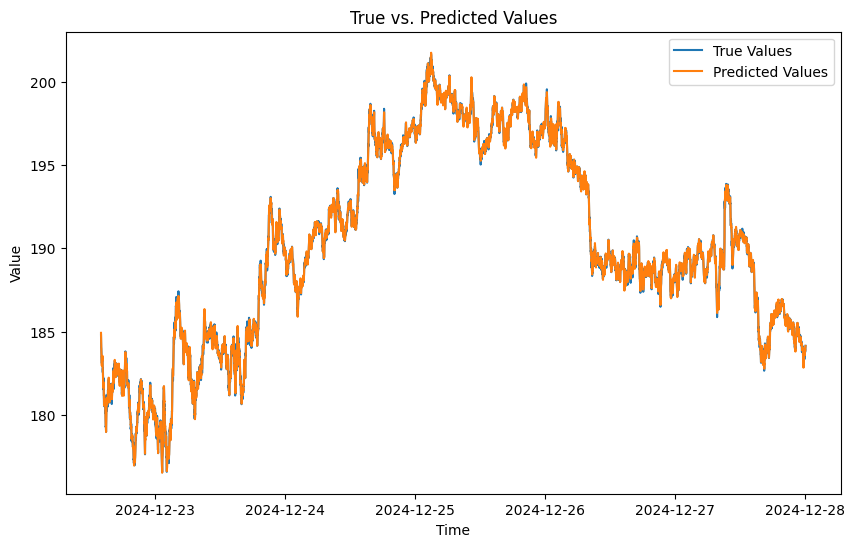

In [ ]:

# 線型回帰でウォームアップ

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 説明変数と目的変数を指定
X = df_sol.drop(columns=['value','value_lag'])
y = df_sol['value_lag']

# トレーニングセットと検証セット、テストセットを指定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# 線形回帰モデルをトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# テストセットを使ってモデルを評価
"""
    特徴量の予測を行うわけではなく、あくまで価格をうまく予測する特徴量を探そうということをやっていることに注意。
    自己回帰モデルのように予測した値をつかってさらに予測する、といったことはできない。
"""
y_pred = model.predict(X_test)

# モデルの評価
eval = timeseries_evaluation(y_test, y_pred)
eval.print_evaluation()
eval.plot_evaluation()
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f"Mean Squared Error: {mse}")
#print(f"R-squared: {r2}")



思った以上に線型回帰の性能がいいので、これを深堀するのもあり。
たとえば、$X^2$や$X^3$といった項を加えたり、$X_1X_2$の交互作業項、リッジ回帰などへの拡張もよいだろう。

# Ensemble Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 31195, number of used features: 13
[LightGBM] [Info] Start training from score 221.770180
MSE: 2.630347719256597
MAE: 1.5394121992342542
R2: 0.9239476828494677
RMSE: 1.621834676918889


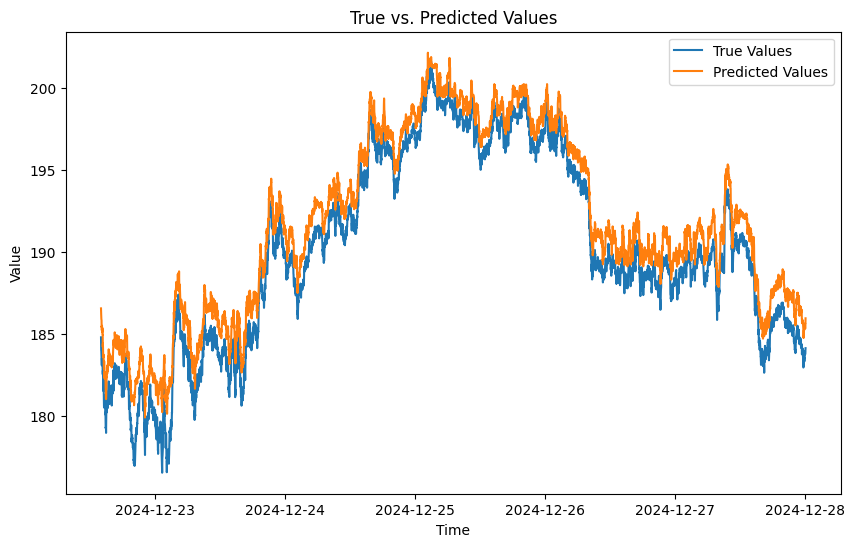

In [ ]:
#input_shape = (X_train.shape[1], X_train.shape[2])  # (タイムステップ数, 特徴量数)



# モデルの初期セット
#initial_models = [RandomForestModel(), LightGBMModel()]
initial_models = [LightGBMModel(param_lgb)]
#initial_models = [RandomForestModel(param_rf)]
#time_steps = 5
#initial_models = [CNNModel(time_steps = time_steps)]
#initial_models = [GRUModel(layers = 2, # 2
#                           units = 128,  # 128
#                           l2_lambda = 0.001, # 0.001
#                           learning_rate = 0.001, # 0.001
#                           batch_size = 128, #128,
#                           dropout = 0.1)]

#initial_models = [FCNNModel(layers = 2, # 2
#                           units = 124,  # 124
#                           l2_lambda = 0.001, # 0.001
#                           learning_rate = 0.01,
#                           batch_size = 64,
#                           dropout = 0.1)]

# アンサンブルモデルのインスタンス作成
ensemble = EnsembleModel(models=initial_models)

# 学習と予測
ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test, method='blending')


#eval = timeseries_evaluation(y_test[time_steps:], predictions)
eval = timeseries_evaluation(y_test, predictions)
eval.print_evaluation()
eval.plot_evaluation()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 31195, number of used features: 13
[LightGBM] [Info] Start training from score 221.770180
MSE: 2.630347719256597
MAE: 1.5394121992342542
R2: 0.9239476828494677
RMSE: 1.621834676918889


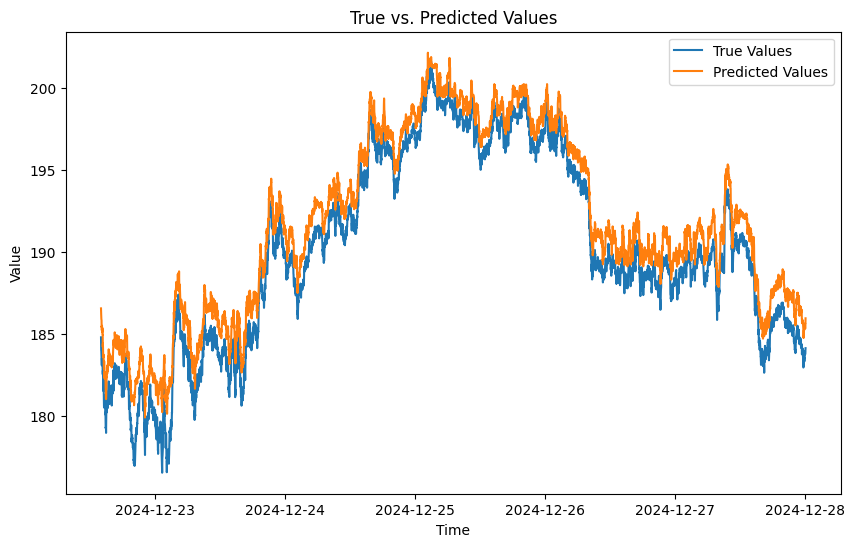

In [ ]:
# LightGBMのパラメータ
param_lgb = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'subsample':0.6,
            'num_leaves': 70,
            'n_estimators': 300,
            'min_child_samples': 10,
            'max_depth': -1,
            'learning_rate': 0.01,
            'colsample_bytree': 0.6
        }

# RandomForestのパラメータ
param_rf = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100
}



model = LightGBMModel(param_lgb)


model.fit(X_train, y_train)
predictions = model.predict(X_test)


#eval = timeseries_evaluation(y_test[time_steps:], predictions)
eval = timeseries_evaluation(y_test, predictions)
eval.print_evaluation()
eval.plot_evaluation()

MSE: 399.17949428170607
MAE: 19.00945573310936
R2: 0.920580901209842
RMSE: 19.97947682702693


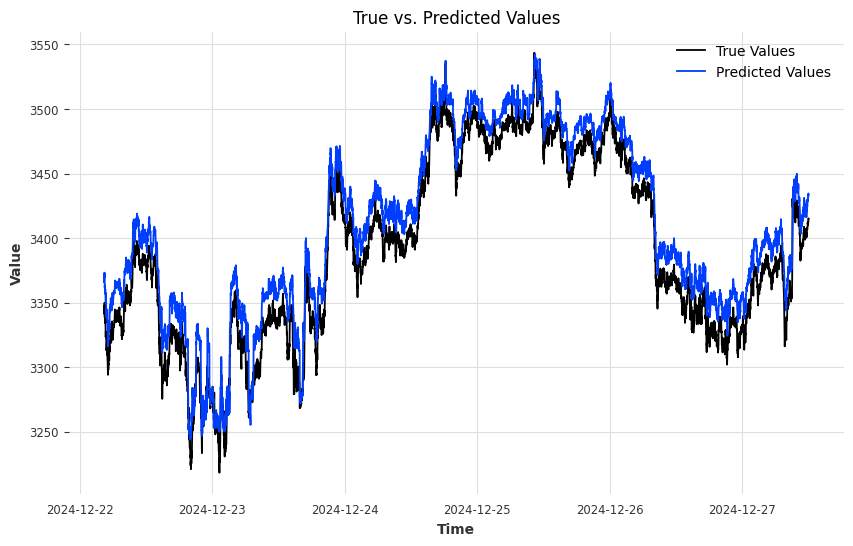

In [ ]:
eval = timeseries_evaluation(y_test, predictions)
eval.print_evaluation()
eval.plot_evaluation()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 30618, number of used features: 13
[LightGBM] [Info] Start training from score 3784.077959
MSE: 7356.96882816114
MAE: 83.21061444628985
R2: -0.4637120456581012
RMSE: 85.7727743993462


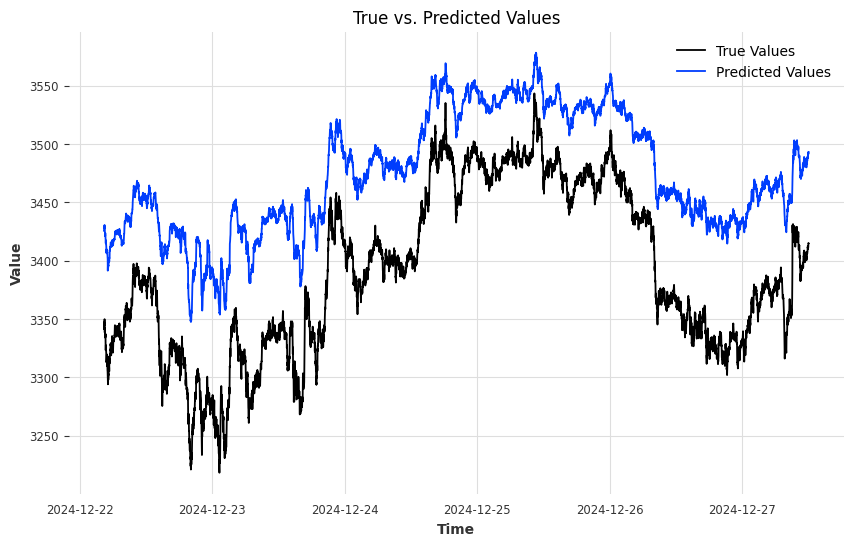

In [ ]:
# 新しいモデルを追加
updated_models = [RandomForestModel(), LightGBMModel()]
# アンサンブルモデルのインスタンス作成
ensemble.models = updated_models
ensemble.fit(X_train, y_train)
predictions_renewal = ensemble.predict(X_test, method='blending')

eval = timeseries_evaluation(y_test, predictions_renewal)
eval.print_evaluation()
eval.plot_evaluation()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

MSE: 55323.52260002265
MAE: 227.84849698472905
R2: -10.00693890776367
RMSE: 235.2095291437459


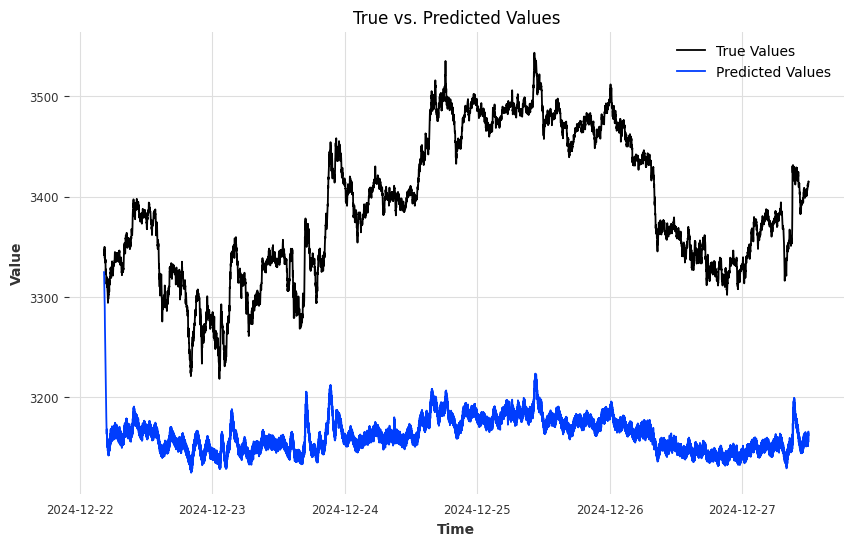

In [ ]:
# メモリ不足で動かなくなった場合の対応
# キャッシュされたメモリを解放
#torch.cuda.empty_cache()

# 未使用のテンソルを削除
#import gc
#gc.collect()

transformer_model = MyTransformerModel()

# 学習と予測
transformer_model.fit(X_train, y_train)
predictions = transformer_model.predict(X_test)

# 評価
eval = timeseries_evaluation(y_test, predictions)
eval.print_evaluation()
eval.plot_evaluation()

In [ ]:
# モデルの保存
today = pd.Timestamp.today().strftime('%Y%m%d')
dir_name_EXPM = "drive/MyDrive/ColabNotebooks/CryptTrade" # 実験用保存先ディレクトリ
#dir_name2 = "drive/MyDrive/ColabNotebooks/CryptTrade"
model_name = f"price_prediction_transformer_model_{today}.pth"
transformer_model.save(f"{dir_name_EXPM}/{model_name}")

In [ ]:
# モデルの読み込み
date = "20241214"
model_name = f"price_prediction_transformer_model_{date}.pth"
# モデルのインスタンスを作成して読み込み（保存ファイルが存在するか確認）
try:
    loaded_model = TransformerModel.load(f"{dir_name_EXPM}/{model_name}")
except Exception as e:
    print(f"モデルのロード中にエラーが発生しました: {e}")


/usr/local/lib/python3.10/dist-packages/darts/models/forecasting/torch_forecasting_model.py:1747: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model: TorchForecastingModel 

In [ ]:
# 保存済みモデルで予測
forecast = loaded_model.predict(
    n=len(y_test),  # テスト期間の値を予測
    series=scaled_series_target,
    past_covariates=series_input_test_scaled
)

# スケールを元に戻す
forecast_original = scaler_target.inverse_transform(forecast)

# 予測結果がNaNではないか確認
forecast_df = forecast.pd_dataframe()  # Pandas DataFrameに変換
if forecast_df.isna().any().any():
    print("予測結果にNaNが含まれています。")
else:
    print("予測結果は正常です。")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

予測結果は正常です。


In [ ]:
# メモリ不足で動かなくなった場合の対応
# キャッシュされたメモリを解放
#torch.cuda.empty_cache()

# 未使用のテンソルを削除
#import gc
#gc.collect()


In [ ]:
window_length = 8#16 #64 #32 #500

In [ ]:
# TimeSeriesオブジェクトに変換
#series_input = TimeSeries.from_dataframe(input_features, fill_missing_dates=True, freq=None)  # Or freq=None
#series_target = TimeSeries.from_dataframe(target, fill_missing_dates=True, freq=None)  # Or freq=None
series_input = TimeSeries.from_dataframe(X_train, fill_missing_dates=True, freq=None)  # Or freq=None
series_target = TimeSeries.from_series(y_train, fill_missing_dates=True, freq=None)  # Or freq=None

series_input_test = TimeSeries.from_dataframe(pd.concat([X_train.iloc[-window_length:,:],X_test],axis = 0), fill_missing_dates=True, freq=None)  # Or freq=None
series_target_test = TimeSeries.from_series(pd.concat([y_train.iloc[-window_length:],y_test],axis = 0), fill_missing_dates=True, freq=None)  # Or freq=None

# スケーリング
scaler_input = Scaler()
scaler_target = Scaler()
scaled_series_input = scaler_input.fit_transform(series_input)
scaled_series_target = scaler_target.fit_transform(series_target)


In [ ]:

model = TransformerModel(
    input_chunk_length=window_length,  # 過去30分のデータを使用(window_length = 30)
    output_chunk_length=3,#len(y_test),  # テスト期間の予測
#    n_layers=3, # removed
#    n_heads=3, # removed
    num_encoder_layers=1, # updated
    num_decoder_layers=1, # updated
    d_model=128,  # Added: Dimension of the model
    nhead=4,     # Added: Number of heads
    dropout=0.1,
    batch_size=64,
    n_epochs=5, # 100
    model_name="price_prediction_transformer",
    random_state=42
)

# モデルのトレーニング
model.fit(past_covariates = scaled_series_input, series = scaled_series_target)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


TransformerModel(output_chunk_shift=0, d_model=128, nhead=4, num_encoder_layers=1, num_decoder_layers=1, dim_feedforward=512, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=8, output_chunk_length=3, batch_size=64, n_epochs=5, model_name=price_prediction_transformer, random_state=42)

In [ ]:
# 訓練データに基づいてスケーリング済みのテストデータを準備
series_input_test_full = pd.concat([X_train.iloc[-window_length:], X_test], axis=0)
series_input_test_scaled = scaler_input.transform(
    TimeSeries.from_dataframe(series_input_test_full, fill_missing_dates=True, freq=None)
)

# 過去のターゲットデータもスケーリングして準備（ただし、ターゲットが必要かはモデル設定による）
#series_target_test_full = pd.concat([y_train.iloc[-window_length:], y_test], axis=0)
#series_target_test_scaled = scaler_target.transform(
#    TimeSeries.from_series(series_target_test_full, fill_missing_dates=True, freq=None)
#)

# 予測
forecast = model.predict(
    n=len(y_test),  # テスト期間の値を予測
    series=scaled_series_target,
    past_covariates=series_input_test_scaled
)

# スケールを元に戻す
forecast_original = scaler_target.inverse_transform(forecast)

# 結果の表示
print(forecast_original)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<TimeSeries (DataArray) (timestamp: 7655, component: 1, sample: 1)> Size: 61kB
array([[[182.66129445]],

       [[182.46760949]],

       [[182.19367415]],

       ...,

       [[190.68261551]],

       [[190.43633726]],

       [[190.21788675]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 61kB 2024-12-22T04:26:00 ... 2024-1...
  * component  (component) object 8B 'value_lag'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


MSE: 0.48810867821462267
MAE: 0.5642685958214089
R2: 0.986558943831835
RMSE: 0.6986477497384663


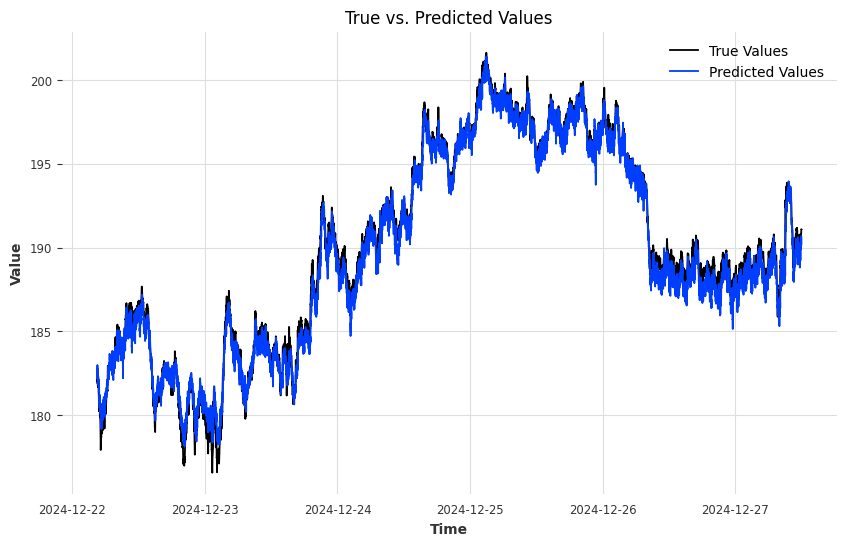

In [ ]:
eval = timeseries_evaluation(y_test, forecast_original.values())
eval.print_evaluation()
eval.plot_evaluation()


# 特に日足でやりたい場合

In [ ]:

import pandas as pd


# 日足にリサンプリング
# 価格データを日足にリサンプル
df.index = pd.to_datetime(df.index)  # 'timestamp' がカラムとして存在する場合
daily_data = df[df['symbol'] == 'SOL'].resample('D').agg({
    'value': ['first', 'max', 'min', 'last'],  # 始値、最高値、最安値、終値
    'unixTime': 'count'  # 出来高の代わりに分足の数をカウント（別の出来高データがない場合）
})

# 列名を整理
daily_data.columns = ['open', 'high', 'low', 'close', 'volume']  # 名前を適宜変更
daily_data.reset_index(inplace=True)

print(daily_data)


     timestamp        open        high         low       close  volume
0   2024-01-01  102.349664  109.667838  101.578446  109.667838    1440
1   2024-01-02  109.140788  116.828718  106.248980  106.777413    1440
2   2024-01-03  106.798976  109.880645   95.789205   98.537214    1440
3   2024-01-04   98.435792  108.066510   97.033356  104.977196    1440
4   2024-01-05  105.111475  105.343843   95.663072   99.990575    1440
..         ...         ...         ...         ...         ...     ...
297 2024-10-24  170.707110  179.261195  170.305814  176.798036    1440
298 2024-10-25  177.239057  177.685919  159.516699  164.621249    1440
299 2024-10-26  164.779431  172.903600  162.290985  170.614942    1440
300 2024-10-27  170.643345  177.986161  170.118810  176.460725    1440
301 2024-10-28  176.400778  176.400778  176.379708  176.379708       2

[302 rows x 6 columns]


In [ ]:
daily_data.columns = ['timestamp','open','high','low','value','volume']
daily_data

timestamp        open        high         low       value  volume
0   2024-01-01  102.349664  109.667838  101.578446  109.667838    1440
1   2024-01-02  109.140788  116.828718  106.248980  106.777413    1440
2   2024-01-03  106.798976  109.880645   95.789205   98.537214    1440
3   2024-01-04   98.435792  108.066510   97.033356  104.977196    1440
4   2024-01-05  105.111475  105.343843   95.663072   99.990575    1440
..         ...         ...         ...         ...         ...     ...
297 2024-10-24  170.707110  179.261195  170.305814  176.798036    1440
298 2024-10-25  177.239057  177.685919  159.516699  164.621249    1440
299 2024-10-26  164.779431  172.903600  162.290985  170.614942    1440
300 2024-10-27  170.643345  177.986161  170.118810  176.460725    1440
301 2024-10-28  176.400778  176.400778  176.379708  176.379708       2

[302 rows x 6 columns]

In [ ]:

indicators = CryptoTechnicalIndicators(daily_data)
all_indicators_df = indicators.all_indicators()
print(all_indicators_df.iloc[:15,:])
print(all_indicators_df.iloc[-15:,:])

         value         MA        RSI  Bollinger Upper  Bollinger MA  \
0   109.667838        NaN        NaN              NaN           NaN   
1   106.777413        NaN   0.000000              NaN           NaN   
2    98.537214        NaN   0.000000              NaN           NaN   
3   104.977196        NaN  36.652017              NaN           NaN   
4    99.990575        NaN  28.549527              NaN           NaN   
5    93.783842        NaN  22.389065              NaN           NaN   
6    89.411297        NaN  19.434704              NaN           NaN   
7    97.929871        NaN  35.910520              NaN           NaN   
8    99.308263        NaN  37.963351              NaN           NaN   
9   102.048942        NaN  41.677730              NaN           NaN   
10   99.871048        NaN  39.784804              NaN           NaN   
11   91.727875        NaN  34.009364              NaN           NaN   
12   95.807537        NaN  38.483316              NaN           NaN   
13   9

In [ ]:

df = pd.DataFrame([])
symbols = ["SOL", "SUI", "USDC", "WBNB", "WBTC", "WETH"]
for symbol in symbols:
  file_name = f"history_price_{symbol}.snappy.parquet"
  tmp_df = pd.read_parquet(f"{dir_name}/{file_name}")
  tmp_df['symbol'] = symbol
  df = pd.concat([df, tmp_df])
  print(f"*** {file_name} ***")
  print(tmp_df.agg({"timestamp": ["min", "max", "count"], "value": ["min", "max", "count"]}))

df.set_index("timestamp", inplace=True)
df.sort_index(inplace=True)
print(df.head())


# Volume dataも取得する。
dir_name = "drive/MyDrive/ColabNotebooks/price_feed"


symbols = ["SOL", "SUI", "USDC", "BNB", "BTC", "ETH"] # USDCはないことと、BNB, BTC, ETHはwrappedではないことに注意
for symbol in symbols:
  file_name = f"histominute_{symbol}.snappy.parquet"
  tmp_df = pd.read_parquet(f"{dir_name}/{file_name}")
  tmp_df['symbol'] = symbol
  df = pd.concat([df, tmp_df])
  print(f"*** {file_name} ***")
#  print(tmp_df.agg({"timestamp": ["min", "max", "count"], "value": ["min", "max", "count"]}))

df.set_index("timestamp", inplace=True)
df.sort_index(inplace=True)
print(df.head())

*** history_price_SOL.snappy.parquet ***
                 timestamp          value
min    2024-01-01 00:00:00      74.654429
max    2024-12-11 00:00:00     264.241233
count               496801  496801.000000
*** history_price_SUI.snappy.parquet ***
                 timestamp          value
min    2024-08-01 00:00:00       0.461745
max    2024-12-11 00:00:00       4.481224
count               190081  190081.000000
*** history_price_USDC.snappy.parquet ***
                 timestamp          value
min    2024-08-01 00:00:00       0.999228
max    2024-12-11 00:00:00       1.000800
count               190081  190081.000000
*** history_price_WBNB.snappy.parquet ***
                 timestamp          value
min    2024-08-01 00:00:00     405.743855
max    2024-12-11 00:00:00     794.333076
count               190081  190081.000000
*** history_price_WBTC.snappy.parquet ***
                 timestamp          value
min    2024-08-01 00:00:00   48915.373544
max    2024-12-11 00:00:00  103448.5

In [ ]:
df

unixTime         value symbol  year  month  day
timestamp                                                             
2024-01-01 00:00:00  1704067200    102.349664    SOL  2024      1    1
2024-01-01 00:01:00  1704067260    102.501617    SOL  2024      1    1
2024-01-01 00:02:00  1704067320    102.486118    SOL  2024      1    1
2024-01-01 00:03:00  1704067380    102.516573    SOL  2024      1    1
2024-01-01 00:04:00  1704067440    102.484537    SOL  2024      1    1
...                         ...           ...    ...   ...    ...  ...
2024-12-11 00:00:00  1733875200    213.844310    SOL  2024     12   11
2024-12-11 00:00:00  1733875200      0.999950   USDC  2024     12   11
2024-12-11 00:00:00  1733875200      3.720070    SUI  2024     12   11
2024-12-11 00:00:00  1733875200  96377.383389   WBTC  2024     12   11
2024-12-11 00:00:00  1733875200   3626.831511   WETH  2024     12   11

[1447183 rows x 6 columns]

In [ ]:
import pandas as pd
import numpy as np

class CryptoTechnicalIndicators:
    def __init__(self, price_data, volume_data=None):
        """
        Parameters:
            price_data (pd.DataFrame): 分足の価格データ、カラムには 'close', 'high', 'low', 'open' が含まれる
            volume_data (pd.Series, optional): 分足の取引量データ (VWAPに使用)
            df: 分足の価格および取引量データ、カラムには'open', 'high', 'low', 'close', 'volme', 'unixtime','symbol','year','month','day'
                インデックスは'timestamp'
        """
        self.price_data = price_data
        self.volume_data = volume_data


    def moving_average(self, window=14):
        """単純移動平均 (MA)"""
        return self.price_data['value'].rolling(window=window).mean()

    def rsi(self, window=14):
        """相対力指数 (RSI)"""
        delta = self.price_data['value'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))

    def bollinger_bands(self, window=20, num_std=2):
        """ボリンジャーバンド"""
        ma = self.moving_average(window=window)
        std_dev = self.price_data['value'].rolling(window=window).std()
        upper_band = ma + (std_dev * num_std)
        lower_band = ma - (std_dev * num_std)
        return upper_band, ma, lower_band

    def macd(self, short_window=12, long_window=26, signal_window=9):
        """MACDとシグナルライン"""
        short_ema = self.price_data['value'].ewm(span=short_window, adjust=False).mean()
        long_ema = self.price_data['value'].ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    def vwap(self):
        """出来高加重平均価格 (VWAP)"""
        if self.volume_data is None:
            raise ValueError("Volume data is required for VWAP calculation.")
        vwap = (self.price_data['value'] * self.volume_data).cumsum() / self.volume_data.cumsum()
        return vwap

    def momentum(self, window=10):
        """モメンタム"""
        return self.price_data['value'].diff(window)

    def volume_trend(self):
        """取引量の変化率"""
        if self.volume_data is None:
            raise ValueError("Volume data is required for volume trend calculation.")
        return self.volume_data.pct_change()

    def all_indicators(self):
        """すべてのテクニカル指標を含むDataFrameを返す"""
        indicators = pd.DataFrame(index=self.price_data.index)
        indicators['value'] = self.price_data['value']
        indicators['MA'] = self.moving_average()
        indicators['RSI'] = self.rsi()
        upper_band, ma, lower_band = self.bollinger_bands()
        indicators['Bollinger Upper'] = upper_band
        indicators['Bollinger MA'] = ma
        indicators['Bollinger Lower'] = lower_band
        macd, signal_line = self.macd()
        indicators['MACD'] = macd
        indicators['Signal Line'] = signal_line
        if self.volume_data is not None:
            indicators['VWAP'] = self.vwap()
            indicators['Volume Trend'] = self.volume_trend()
        indicators['Momentum'] = self.momentum()
        indicators['Volume'] = self.volume_data if self.volume_data is not None else np.nan
        return indicators


In [ ]:
indicators = CryptoTechnicalIndicators(df[df['symbol'] == 'SOL'])
all_indicators_df = indicators.all_indicators()
print(all_indicators_df.iloc[:15,:])
print(all_indicators_df.iloc[-15:,:])


                          value          MA         RSI  Bollinger Upper  \
timestamp                                                                  
2024-01-01 00:00:00  102.349664         NaN         NaN              NaN   
2024-01-01 00:01:00  102.501617         NaN  100.000000              NaN   
2024-01-01 00:02:00  102.486118         NaN   90.743889              NaN   
2024-01-01 00:03:00  102.516573         NaN   92.168262              NaN   
2024-01-01 00:04:00  102.484537         NaN   79.327549              NaN   
2024-01-01 00:05:00  102.497302         NaN   80.414794              NaN   
2024-01-01 00:06:00  102.669225         NaN   88.535624              NaN   
2024-01-01 00:07:00  102.547002         NaN   68.379030              NaN   
2024-01-01 00:08:00  102.557364         NaN   68.977844              NaN   
2024-01-01 00:09:00  102.537544         NaN   66.566728              NaN   
2024-01-01 00:10:00  102.727650         NaN   74.961272              NaN   
2024-01-01 0

In [ ]:
df_sol = all_indicators_df[all_indicators_df.columns[all_indicators_df.columns != 'Volume']].dropna()
# ラグ付き価格データの作成
#df_sol['value_lag'] = df_sol['value'].shift(-6000)
df_sol['value_lag'] = df_sol['value'].shift(-1000)
df_sol = df_sol.dropna()
df_sol

value          MA        RSI  Bollinger Upper  \
timestamp                                                                 
2024-01-01 00:19:00  102.520463  102.594901  51.071309       102.752000   
2024-01-01 00:20:00  102.509170  102.583468  41.304206       102.735406   
2024-01-01 00:21:00  102.146885  102.554889  32.759026       102.800342   
2024-01-01 00:22:00  102.228226  102.531379  36.635002       102.824556   
2024-01-01 00:23:00  102.355281  102.518360  43.191923       102.827515   
...                         ...         ...        ...              ...   
2024-12-10 07:16:00  217.060437  217.160216  37.588224       218.429642   
2024-12-10 07:17:00  217.255508  217.150902  46.624223       218.254269   
2024-12-10 07:18:00  217.245267  217.133063  43.185125       218.059738   
2024-12-10 07:19:00  216.938304  217.094043  37.170346       217.883557   
2024-12-10 07:20:00  217.257571  217.094205  50.051173       217.762689   

                     Bollinger MA  Bollinger Lower      MACD  Signal Line  \
timestamp                                                                   
2024-01-01 00:19:00    102.558221       102.364443  0.038506     0.053223   
2024-01-01 00:20:00    102.566197       102.396987  0.031655     0.048909   
2024-01-01 00:21:00    102.548460       102.296578 -0.002975     0.038532   
2024-01-01 00:22:00    102.535565       102.246575 -0.023583     0.026109   
2024-01-01 00:23:00    102.527501       102.227487 -0.029325     0.015022   
...                           ...              ...       ...          ...   
2024-12-10 07:16:00    217.433362       216.437081 -0.285925    -0.254915   
2024-12-10 07:17:00    217.374464       216.494658 -0.257093    -0.255351   
2024-12-10 07:18:00    217.317672       216.575606 -0.232391    -0.250759   
2024-12-10 07:19:00    217.254079       216.624602 -0.234876    -0.247582   
2024-12-10 07:20:00    217.220276       216.677863 -0.208678    -0.239801   

                     Momentum   value_lag  
timestamp                                  
2024-01-01 00:19:00 -0.017081  106.611350  
2024-01-01 00:20:00 -0.218481  106.714618  
2024-01-01 00:21:00 -0.637930  106.615216  
2024-01-01 00:22:00 -0.441941  106.747421  
2024-01-01 00:23:00 -0.225954  106.672908  
...                       ...         ...  
2024-12-10 07:16:00 -0.194862  213.812736  
2024-12-10 07:17:00  0.067574  213.635450  
2024-12-10 07:18:00 -0.138436  213.755972  
2024-12-10 07:19:00 -0.218233  213.705634  
2024-12-10 07:20:00  0.212465  213.844310  

[495259 rows x 10 columns]

In [ ]:
# 線型回帰でウォームアップ

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 説明変数と目的変数を指定
X = df_sol.drop(columns=['value','value_lag'])
y = df_sol['value_lag']

# トレーニングセットと検証セット、テストセットを指定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルをトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# テストセットを使ってモデルを評価
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 31.31502380041393
R-squared: 0.9761805971730468


In [ ]:
from darts import TimeSeries
from sklearn.preprocessing import MinMaxScaler

# 時系列データの準備
series = TimeSeries.from_dataframe(df_sol.drop(columns = 'value'), value_cols="value_lag")

# 訓練データとテストデータに分割
train_series, test_series = series.split_before(0.8)  # 80%を訓練データ、20%をテストデータ

# スケーリング
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_series.pd_series().values.reshape(-1, 1))
test_scaled = scaler.transform(test_series.pd_series().values.reshape(-1, 1))

# スケーリング後のデータを TimeSeries に戻す
train_scaled = TimeSeries.from_values(train_scaled, time_index=train_series.time_index)
test_scaled = TimeSeries.from_values(test_scaled, time_index=test_series.time_index)

# モデルの学習と予測
model.fit(train_scaled)
prediction = model.predict(n=len(test_series))

# 予測結果をスケールを戻す
prediction_original = scaler.inverse_transform(prediction.values().reshape(-1, 1))


TypeError: TimeSeries.from_values() got an unexpected keyword argument 'time_index'

# 新しいデータフィード方式で収集したデータを整理する


In [ ]:
# Volume dataも取得する。
dir_name = "drive/MyDrive/ColabNotebooks/price_feed"


df = pd.DataFrame([])
symbols = ["SOL", "SUI", "USDC", "BNB", "BTC", "ETH"] # USDCはないことと、BNB, BTC, ETHはwrappedではないことに注意
for symbol in symbols:
  file_name = f"histominute_{symbol}.snappy.parquet"
  tmp_df = pd.read_parquet(f"{dir_name}/{file_name}")
  tmp_df['symbol'] = symbol
  df = pd.concat([df, tmp_df])
  print(f"*** {file_name} ***")
#  print(tmp_df.agg({"timestamp": ["min", "max", "count"], "value": ["min", "max", "count"]}))

df.set_index("timestamp", inplace=True)
df.sort_index(inplace=True)
print(df.head())

*** histominute_SOL.snappy.parquet ***
*** histominute_SUI.snappy.parquet ***
*** histominute_USDC.snappy.parquet ***
*** histominute_BNB.snappy.parquet ***
*** histominute_BTC.snappy.parquet ***
*** histominute_ETH.snappy.parquet ***
                          open       high        low      close      volume  \
timestamp                                                                     
2024-11-30 21:49:00    240.490    240.850    240.480    240.480   806190.88   
2024-11-30 21:49:00    656.770    657.740    657.000    657.000     5135.12   
2024-11-30 21:49:00  96866.750  96866.750  96861.720  96862.640   197722.39   
2024-11-30 21:49:00   3708.460   3713.970   3708.460   3713.970  1890347.32   
2024-11-30 21:49:00      3.512      3.516      3.512      3.516    17932.23   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340   

In [ ]:
# データの保存
dir_name_EXPM = "drive/MyDrive/ColabNotebooks/CryptTrade" # 実験用保存先ディレクトリ

# データに日付をつけて保存
today = pd.Timestamp.today().strftime('%Y%m%d')
df.to_parquet(f"{dir_name_EXPM}/price_data.snappy.parquet_{today}")

In [ ]:
# データの呼び出し
df = pd.read_parquet(f"{dir_name_EXPM}/price_data.snappy.parquet_{today}")
df

open        high         low       close  \
timestamp                                                             
2024-11-30 21:49:00     240.490     240.850     240.480     240.480   
2024-11-30 21:49:00     656.770     657.740     657.000     657.000   
2024-11-30 21:49:00   96866.750   96866.750   96861.720   96862.640   
2024-11-30 21:49:00    3708.460    3713.970    3708.460    3713.970   
2024-11-30 21:49:00       3.512       3.516       3.512       3.516   
...                         ...         ...         ...         ...   
2024-12-12 00:00:00     227.420     227.540     227.380     227.390   
2024-12-12 00:00:00       4.375       4.379       4.373       4.376   
2024-12-12 00:00:00     711.760     712.740     712.130     712.540   
2024-12-12 00:00:00  101203.070  101263.070  101203.030  101255.780   
2024-12-12 00:00:00    3834.970    3836.390    3834.470    3835.100   

                         volume    unixTime symbol  year  month  day  
timestamp                                                             
2024-11-30 21:49:00   806190.88  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00     5135.12  1733003340    BNB  2024     11   30  
2024-11-30 21:49:00   197722.39  1733003340    BTC  2024     11   30  
2024-11-30 21:49:00  1890347.32  1733003340    ETH  2024     11   30  
2024-11-30 21:49:00    17932.23  1733003340    SUI  2024     11   30  
...                         ...         ...    ...   ...    ...  ...  
2024-12-12 00:00:00    94688.59  1733961600    SOL  2024     12   12  
2024-12-12 00:00:00   103369.15  1733961600    SUI  2024     12   12  
2024-12-12 00:00:00    41305.77  1733961600    BNB  2024     12   12  
2024-12-12 00:00:00  2063661.48  1733961600    BTC  2024     12   12  
2024-12-12 00:00:00  2075307.38  1733961600    ETH  2024     12   12  

[92710 rows x 10 columns]

In [ ]:
import pandas as pd
import numpy as np

class CryptoTechnicalIndicators:
#    def __init__(self, price_data, volume_data=None):
    def __init__(self, df):
        """
        Parameters:
            price_data (pd.DataFrame): 分足の価格データ、カラムには 'close', 'high', 'low', 'open' が含まれる
            volume_data (pd.Series, optional): 分足の取引量データ (VWAPに使用)
            df: 分足の価格および取引量データ、カラムには'open', 'high', 'low', 'close', 'volme', 'unixtime','symbol','year','month','day'
                インデックスは'timestamp'
        """
        self.data = df
#        self.price_data = price_data
#        self.volume_data = volume_data


    def moving_average(self, window=14):
        """単純移動平均 (MA)"""
#        return self.price_data['value'].rolling(window=window).mean()
        return self.data['close'].rolling(window=window).mean()

    def rsi(self, window=14):
        """相対力指数 (RSI)"""
#        delta = self.price_data['value'].diff()
        delta = self.data['close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))

    def bollinger_bands(self, window=20, num_std=2):
        """ボリンジャーバンド"""
        ma = self.moving_average(window=window)
#        std_dev = self.price_data['value'].rolling(window=window).std()
        std_dev = self.data['close'].rolling(window=window).std()
        upper_band = ma + (std_dev * num_std)
        lower_band = ma - (std_dev * num_std)
        return upper_band, ma, lower_band

    def macd(self, short_window=12, long_window=26, signal_window=9):
        """MACDとシグナルライン"""
#        short_ema = self.price_data['value'].ewm(span=short_window, adjust=False).mean()
#        long_ema = self.price_data['value'].ewm(span=long_window, adjust=False).mean()
        short_ema = self.data['close'].ewm(span=short_window, adjust=False).mean()
        long_ema = self.data['close'].ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    def vwap(self):
        """出来高加重平均価格 (VWAP)"""
#        if self.volume_data is None:
#            raise ValueError("Volume data is required for VWAP calculation.")
#        vwap = (self.price_data['value'] * self.volume_data).cumsum() / self.volume_data.cumsum()
        vwap = (self.data['close'] * self.data['volume']).cumsum() / self.data['volume'].cumsum()
        return vwap

    def momentum(self, window=10):
        """モメンタム"""
#        return self.price_data['value'].diff(window)
        return self.data['close'].diff(window)

    def volume_trend(self):
        """取引量の変化率"""
#        if self.volume_data is None:
#            raise ValueError("Volume data is required for volume trend calculation.")
#        return self.volume_data.pct_change()
        return self.data['volume'].pct_change()

    def amihud_measure(self):
        """ Amihud, Y. (2002).
            "Illiquidity and stock returns: cross-section and time-series effects."
            Journal of Financial Markets, 5(1), 31–56.
        """
        return self.data['close'].diff(1) / self.data['volume']

    def high_low_liq_measure(self):
        """ 高値と安値の変動から流動性を測る"""
        return (self.data['high'] - self.data['low'])/self.data['volume']

    def all_indicators(self):
        """すべてのテクニカル指標を含むDataFrameを返す"""
#        indicators = pd.DataFrame(index=self.price_data.index)
        indicators = pd.DataFrame(index=self.data.index)
#        indicators['value'] = self.price_data['value']
        indicators['value'] = self.data['close']
        indicators['MA'] = self.moving_average()
        indicators['RSI'] = self.rsi()
        upper_band, ma, lower_band = self.bollinger_bands()
        indicators['Bollinger Upper'] = upper_band
        indicators['Bollinger MA'] = ma
        indicators['Bollinger Lower'] = lower_band
        macd, signal_line = self.macd()
        indicators['MACD'] = macd
        indicators['Signal Line'] = signal_line
#        if self.volume_data is not None:
#            indicators['VWAP'] = self.vwap()
#            indicators['Volume Trend'] = self.volume_trend()
        indicators['VWAP'] = self.vwap()
        indicators['Volume Trend'] = self.volume_trend()
        indicators['Momentum'] = self.momentum()
#        indicators['Volume'] = self.volume_data if self.volume_data is not None else np.nan
        indicators['Volume'] = self.data['volume']
        return indicators


In [ ]:
indicators = CryptoTechnicalIndicators(df[df['symbol'] == 'SOL'])
all_indicators_df = indicators.all_indicators()
print(all_indicators_df.iloc[:15,:])
print(all_indicators_df.iloc[-15:,:])



                      value          MA         RSI  Bollinger Upper  \
timestamp                                                              
2024-11-30 21:49:00  240.48         NaN         NaN              NaN   
2024-11-30 21:50:00  240.60         NaN  100.000000              NaN   
2024-11-30 21:51:00  240.77         NaN  100.000000              NaN   
2024-11-30 21:52:00  240.97         NaN  100.000000              NaN   
2024-11-30 21:53:00  240.92         NaN   90.740741              NaN   
2024-11-30 21:54:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:55:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:56:00  240.82         NaN   76.562500              NaN   
2024-11-30 21:57:00  240.76         NaN   70.000000              NaN   
2024-11-30 21:58:00  240.69         NaN   63.636364              NaN   
2024-11-30 21:59:00  240.73         NaN   65.432099              NaN   
2024-11-30 22:00:00  240.54         NaN   53.000000             

In [ ]:
indicators = CryptoTechnicalIndicators(df[df['symbol'] == 'SOL'])
all_indicators_df = indicators.all_indicators()
print(all_indicators_df.iloc[:15,:])
print(all_indicators_df.iloc[-15:,:])


                      value          MA         RSI  Bollinger Upper  \
timestamp                                                              
2024-11-30 21:49:00  240.48         NaN         NaN              NaN   
2024-11-30 21:50:00  240.60         NaN  100.000000              NaN   
2024-11-30 21:51:00  240.77         NaN  100.000000              NaN   
2024-11-30 21:52:00  240.97         NaN  100.000000              NaN   
2024-11-30 21:53:00  240.92         NaN   90.740741              NaN   
2024-11-30 21:54:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:55:00  240.91         NaN   89.090909              NaN   
2024-11-30 21:56:00  240.82         NaN   76.562500              NaN   
2024-11-30 21:57:00  240.76         NaN   70.000000              NaN   
2024-11-30 21:58:00  240.69         NaN   63.636364              NaN   
2024-11-30 21:59:00  240.73         NaN   65.432099              NaN   
2024-11-30 22:00:00  240.54         NaN   53.000000             

In [ ]:
all_indicators_df.columns

Index(['value', 'MA', 'RSI', 'Bollinger Upper', 'Bollinger MA',
       'Bollinger Lower', 'MACD', 'Signal Line', 'VWAP', 'Volume Trend',
       'Momentum', 'Volume'],
      dtype='object')

In [ ]:
#df_sol = all_indicators_df[all_indicators_df.columns[all_indicators_df.columns != 'Volume']].dropna()
df_sol = all_indicators_df
# ラグ付き価格データの作成
#df_sol['value_lag'] = df_sol['value'].shift(-6000)
df_sol['value_lag'] = df_sol['value'].shift(-1000)
df_sol = df_sol.dropna()
df_sol

value          MA        RSI  Bollinger Upper  \
timestamp                                                             
2024-11-30 22:08:00  239.66  240.370714  13.872832       241.252875   
2024-11-30 22:09:00  239.60  240.277143  13.407821       241.307219   
2024-11-30 22:10:00  239.63  240.192143  15.606936       241.329208   
2024-11-30 22:11:00  239.73  240.118571  20.903955       241.305851   
2024-11-30 22:12:00  239.66  240.045000  20.903955       241.240279   
...                     ...         ...        ...              ...   
2024-12-11 07:16:00  219.71  219.999286  42.801556       220.416883   
2024-12-11 07:17:00  219.68  219.957143  37.759336       220.425158   
2024-12-11 07:18:00  219.49  219.897143  33.464567       220.450558   
2024-12-11 07:19:00  219.38  219.833571  32.818533       220.485807   
2024-12-11 07:20:00  219.67  219.797857  41.007194       220.488230   

                     Bollinger MA  Bollinger Lower      MACD  Signal Line  \
timestamp                                                                   
2024-11-30 22:08:00      240.4920       239.731125 -0.171107    -0.074309   
2024-11-30 22:09:00      240.4480       239.588781 -0.206817    -0.100810   
2024-11-30 22:10:00      240.3995       239.469792 -0.230046    -0.126657   
2024-11-30 22:11:00      240.3475       239.389149 -0.237646    -0.148855   
2024-11-30 22:12:00      240.2820       239.323721 -0.246476    -0.168379   
...                           ...              ...       ...          ...   
2024-12-11 07:16:00      219.9785       219.540117 -0.012948     0.032073   
2024-12-11 07:17:00      219.9690       219.512842 -0.030539     0.019550   
2024-12-11 07:18:00      219.9465       219.442442 -0.059130     0.003814   
2024-12-11 07:19:00      219.9220       219.358193 -0.089632    -0.014875   
2024-12-11 07:20:00      219.9165       219.344770 -0.089374    -0.029775   

                           VWAP  Volume Trend  Momentum      Volume  value_lag  
timestamp                                                                       
2024-11-30 22:08:00  240.279403      1.080216     -1.03  1771564.13     237.99  
2024-11-30 22:09:00  240.255948     -0.857424     -1.13   252582.59     238.28  
2024-11-30 22:10:00  240.251879     -0.810456     -0.91    47875.53     238.22  
2024-11-30 22:11:00  240.236167      3.774650     -0.72   228588.92     238.27  
2024-11-30 22:12:00  240.233649     -0.854171     -0.47    33334.78     238.31  
...                         ...           ...       ...         ...        ...  
2024-12-11 07:16:00  229.543322     -0.321349     -0.46    97529.21     227.46  
2024-12-11 07:17:00  229.543196     -0.354456     -0.41    62959.38     227.45  
2024-12-11 07:18:00  229.542009      8.272438     -0.75   583786.96     227.50  
2024-12-11 07:19:00  229.541820     -0.843172     -0.56    91554.35     227.42  
2024-12-11 07:20:00  229.540895      4.058756      0.10   463151.14     227.39  

[14953 rows x 13 columns]

# モデル構築
- 暗号資産価格を決定するファクター
    - 供給と需要の力学：新しい供給の流入や、ユーザーの需要が価値に大きく影響します。
    - 採用率：暗号資産の利用が広まるかどうかが価値を左右します。特に機関投資家や企業の採用が増えると価格が上昇する可能性があります。
    - ネットワーク効果：より多くのユーザーや開発者がそのブロックチェーンを採用するほど、価値が高まります（例：Bitcoinの普及やEthereumのDeFiエコシステムの成長）。
    - 規制や政策：暗号資産に関する政府の規制や法律が変更されると、市場に大きな影響を与えます。例えば、取引の自由度や課税が変わると、需要が変化するかもしれません。
    - 投機や市場感情：暗号資産はしばしば投機の対象となり、ニュースやマーケットのトレンドに敏感に反応します。
- 機械学習モデル
    - アンサンブルの方法は別途実装が必要
    - Transformerのパッケージ
        - Hugging Face's Transformers: Although known for NLP, this library can be adapted for time-series tasks, with support for fine-tuning models like TimeSeriesTransformer.
        - PyTorch Forecasting: This is built on PyTorch Lightning and includes a Temporal Fusion Transformer (TFT) designed for time-series.
        - DeepAR from GluonTS: While not strictly a transformer, this package by Amazon works well for probabilistic forecasting.



In [ ]:
import gen_data
from price_prediction import data_collector, CryptoTechnicalIndicators

from price_prediction import MyTransformerModel
from price_prediction import LinearRegressionModel, RandomForestModel, LightGBMModel

In [ ]:
# コイン、予測時間、モデルを指定して価格予測するクラスを定義する
import json
import datetime
import pandas as pd



today = datetime.datetime.now().strftime("%Y-%m-%d")


params_path = "drive/MyDrive/ColabNotebooks/CryptTrade/HyperParams/"

# LightGBMのパラメータ
params_lgb = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'subsample':0.6,
            'num_leaves': 10, # 20 , 50 #70,
            'n_estimators': 400, # 300,
            'min_child_samples': 10,
            'max_depth': -1,
            'learning_rate': 0.01,
            'colsample_bytree': 0.6
        }

# ハイパーパラメータの保存
#with open(params_path + "params_lgb.json", "w") as f:
#    json.dump(params_lgb, f)
# ハイパーパラメータの読み込み
#with open(params_path + "params_lgb.json", "r") as f:
#    params_lgb = json.load(f)


# RandomForestのパラメータ
params_rf = {
    'max_depth': 10, # 10 #20,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 50, #10,
    'n_estimators': 200 #100
}

# ハイパーパラメータの保存
#with open(params_path + "params_rf.json", "w") as f:
#    json.dump(params_rf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_rf.json", "r") as f:
#    params_rf = json.load(f)

# Transformerのパラメータ
params_tf = {
    'input_chunk_length': 100, #100, #50, #100, #10, #8,
    'output_chunk_length':50, #3,
    'num_encoder_layers':1, # updated
    'num_decoder_layers':1, # updated
    'd_model':128,
    'nhead':4,
    'dropout':0.1,
    'batch_size':64, #32, #64,
    'n_epochs':1, #5, #5
    'model_name':"price_prediction_transformer",
    'random_state':42
}

# ハイパーパラメータの保存
#with open(params_path + "params_tf.json", "w") as f:
#    json.dump(params_tf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_tf.json", "r") as f:
#    params_tf = json.load(f)

# Linear regressionのパラメータ
params_lr = {"scaling": False,
           "scaler":"StandardScaler", # "StandardScaler", "MinMaxScaler", "RobustScaler",
           "model_type":"Ridge", # "Ridge","Lasso","None"
           'alpha': 100000}  # Lassoの場合は10、Ridgeの場合は100,000

# モデルごとのパラメータ
params_dict = {
    'LR': params_lr,
    'RF': params_rf,
    'LGB': params_lgb,
    'trans': params_tf
}

# モデルの辞書（クラスのみ登録）
#models = {
#    'LR': LinearRegressionModel,
#    'RF':RandomForestModel,
#    'LGB': LightGBMModel,
#    'trans': MyTransformerModel
    #'ens':ensemble,
#}

# 各通貨のモデル
#symbols_models = {
#    'BTC': 'LR',
#    'ETH': 'LGB',
#    'SOL': 'RF'
#}
models = {
    'BTC':['LR','RF','trans'],
    'ETH':['LR'],
    'SOL':['LR','LGB']
}

#for symbol,model_names in models.items():
    # モデル名を表示
#    print(symbol)
#    for model in model_names:
#        print(model)

# 予測値を計算する時間
forecast_times = [15,30,45,60] # 予測時間（分）


class CryptPricePrediction():
    def __init__(self,
       #          symbols = ["SOL", "ETH", "BTC"],
                 forecast_times = forecast_times,
        #         model_name = 'LR', # Linear Regression (LR), Random Forest (RF), LightGBM (LGB), Transformer (trans))
                 data_dir = "drive/MyDrive/ColabNotebooks/price_feed",
                 model_dir = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/",
         #        model = None,
                 params_dict = params_dict,
#                 symbols_models = symbols_models,
                 models = models,
                 features = None  #{'MA','Amihud Measure','Momentum'}
                 ):
      #  self.symbols = symbols
        self.forecast_times = forecast_times
     #   self.model_name = model_name
    #    self.model = model
        self.params_dict = params_dict
        self.data_dir = data_dir
        self.model_dir = model_dir
#        self.symbols_models = symbols_models
        self.models = models
        self.features = features

    def predict(self,is_volume = True,
                num_add_data = 0 # テスト用にデータを人工的に追加する場合の追加データ数
                ):
        dfs = {}
        latest_dfs = {}
        latest_times = {}
        preds = {}
        output = {}
        ## データの取得
        #dir_name = "drive/MyDrive/ColabNotebooks/price_feed"
        df_col = data_collector(self.data_dir)
        df = df_col.collect_price_data(self.models.keys(), is_volume = is_volume)
        # 特にBTCは取引量がゼロになることがあるので処理する。
        if is_volume:
            df['volume'] = df['volume'].replace(0, 1e-10)
#        print("Volume zero",df[df['volume'] == 0])
        # データの加工（テクニカル指標の作成）
#        tech_indexes = {'MA','Amihud Measure','Momentum'}
#        for symbol, model_name in self.symbols_models.items():
        for symbol, model_names in self.models.items():
            # テスト用にデータを人工的に追加
            num_add_data = num_add_data
            df = pd.concat([df,gen_data.add_artificial_data(df[df['symbol'] == symbol],num_add_data = num_add_data)])
#            print('df',df[df['symbol'] == "BTC"])
        #for symbol in self.symbols:
#            dfs[symbol] = df[df['symbol'] == symbol]
            indicators = CryptoTechnicalIndicators(df[df['symbol'] == symbol], is_volume = is_volume)
            for model_name in model_names:
                output[symbol + '_' + model_name] = pd.DataFrame()
                for forecast_time in self.forecast_times:
                    if self.features is not None:
                        dfs[symbol] = indicators.selected_indicators(
                            tech_indexes=self.features,
                            time_diff = forecast_time)
                    else:
                        dfs[symbol] = indicators.all_indicators(time_diff = forecast_time)
#            unixTimes = indicators.data['unixTime']
#            print('UnixTime',unixTimes[-1],datetime.datetime.fromtimestamp(unixTimes[-1]))
#            datetime.datetime.fromtimestamp(unixTimes)
#
                # BTC以外のコインにはBTC価格、ラグつきBTC価格、BTC利回りを特徴量に加える
                # 'BTC' または 'WBTC' を特定
                    btc_symbol = 'BTC' if 'BTC' in self.models.keys() else 'WBTC' if 'WBTC' in self.models.keys() else None
                    # 特徴量追加処理
                    # 変化率やラグは予測時間time_diffに合わせて設定する
                    if symbol != btc_symbol and btc_symbol is not None:
                        dfs[symbol] = indicators.add_coin_features(dfs[symbol],df[df['symbol'] == btc_symbol], 'btc', time_diff = forecast_time)

                    # インデックスはdatetimeに変換しておく必要がある
                    dfs[symbol].index = pd.to_datetime(dfs[symbol].index)

                    # データの最新の箇所のみ抽出する（予測に用いる）
                    latest_dfs[symbol] = dfs[symbol].copy().iloc[-1]
                    latest_dfs[symbol] = latest_dfs[symbol].to_frame().T
                    # 日本時間はUTC＋９であることを踏まえて換算
                    latest_times[symbol] = dfs[symbol].index[-1] +  datetime.timedelta(hours=9)
#             print(f"shape of dfs: {dfs[symbol].shape}")
#            print(f"shape of latest dfs: {latest_dfs[symbol].shape}")
#            print(dfs[symbol])
 #           print(latest_dfs[symbol])
 #           print('Latest time', latest_times[symbol])

                    # ラグ付き価格データの作成：ターゲットになるが、学習済みなら作成不要
                    dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(-forecast_time)
                    dfs[symbol] = dfs[symbol].dropna()

                    X = dfs[symbol].drop(columns=['value_lag'])
                    y = dfs[symbol]['value_lag']

            #    for model_name in model_names:
                    # outputが空ならばlatest_timesのデータを入れる
                    if output[symbol + '_' + model_name].empty:
                        output[symbol + '_' + model_name] = pd.DataFrame({symbol + '_' + model_name:latest_dfs[symbol]['value'].values},
                                          index = [latest_times[symbol]])


#            date = '2025-01-21'
                    date = today
#            file_name = symbol + '_' + model_name + '_' + date + '_' + str(self.forecast_time) + 'min'
                    file_name = symbol + '_' + model_name + '_' + str(forecast_time) + 'min'
                    if model_name == "LR":
                        model = LinearRegressionModel(self.params_dict['LR'])
                    elif model_name == "RF":
                        model = RandomForestModel(self.params_dict['RF'])
                    elif model_name == "LGB":
                        model = LightGBMModel(self.params_dict['LGB'])
                    elif model_name == "trans":
                        model = MyTransformerModel(self.params_dict['trans'])
                    else:
                        # 適切なモデル名が入力されない場合はストップ
                        raise ValueError("Invalid model name")
                        continue
#                continue
#            LR = LinearRegressionModel(params_lr)
#LR.save_model('/','tmp_model')

                # 学習済みモデルの呼び出し
                    try:
#                model._load_model(self.model_dir, file_name)
#                model = LinearRegressionModel()
#                print(f'file path = {self.model_dir}, file name = {file_name}')
                        model = model._load_model(self.model_dir, file_name)
                        print(f'We loaded the {model_name} for {symbol}')
                    # データに差分がある場合は既存データにない部分だけを抽出してファインチューニング
                        X_only = X.loc[~X.index.isin(model.X_train.index)]
                        y_only = y.loc[~y.index.isin(model.y_train.index)]
                        print('X_only',X_only)
                        print('y_only',y_only)

                    # X_only,y_onlyのサイズは最低150(200?)ないとスケーリングができない模様（transformerの場合）
                    # そこでX,yの末尾200のデータとX_only,y_onlyを結合する
                        if len(X_only) < 150:
                            X_only = pd.concat([X[-151:-num_add_data],X_only])
                            y_only = pd.concat([y[-151:-num_add_data],y_only])
#                    X_only = pd.concat([X[:-1],X_only])
#                    y_only = pd.concat([y[:-1],y_only])
#                    X_only = pd.concat([X[-1000:-1],X_only])
#                    y_only = pd.concat([y[-1000:-1],y_only])
#                    X_only = X[-1000:-1]
#                    y_only = y[-1000:-1]
                        print('X_only',X_only)
                        print('y_only',y_only)
#                print('X',X.tail())
#                print('y',y.tail())
                        print('X_size',X_only.shape)
                        print('y_size',y_only.shape)
#                model = model.fine_tune(X_only,y_only,n_epochs = 1)
                        model = model.fine_tune(X_only,y_only)
#                model = model.fine_tune(X,y,n_epochs = 1)
                        print('reserved model is used')
                        model.save_model(self.model_dir,file_name)
                        print('model is updated')


    #            print('params',model.params)
#                print('model is fitted?',model.is_fitted)
 #               print(model)
            #    Loaded_LR = LinearRegressionModel()
            #    Loaded_LR = Loaded_LR._load_model('/','tmp_model')
            #    print(Loaded_LR)

#                print(model.model.is_fitted_)

                # 学習済みモデルがなければ学習用のデータセットを作成
                    except:
        # モデルをパラメータ付きで再インスタンス化
#        try:
#            params = params_dict.get(model_name, {})  # 該当するパラメータを取得
#            model = model_class(params)  # パラメータを渡して初期化
#        except TypeError as e:
#            print(f"Error while initializing {model_name}: {e}")
#            continue

                # モデルの学習と評価
                        print('try fitting again')
                        model.fit(X, y)
                        print(f'{model_name} for {symbol} is fitted again')
                        model.save_model(self.model_dir,file_name)
#                model.save_model(self.model_dir,file_name)

#                LR.fit(X,y)
#                LR.save_model('/','tmp_model')

#        file_name = symbol + '_' + model_name
#        try:
#            model.save_model(file_path,file_name + '_' + today)
#        except Exception as e:
#            print('cannot save model with '+ str(e))

#        coin_models[file_name] = model
#        predictions[file_name] = model.predict(X_test)


#            else:
#                preds[symbol] = model.predict(latest_dfs)
#            print('tmp prediction',Loaded_LR.predict(X))
#            print('model prediction',model.predict(X))
#            print('I am here before prediction')
#            print(latest_dfs[symbol].values)
#            preds[symbol] = model.X_train
#            preds[symbol] = model.predict([[0,0,0,0]])
#            preds[symbol] = model.predict()
#            print(model.is_fitted_)
#                    preds[symbol + '_' + model_name] = model.predict(latest_dfs[symbol])
#            preds[symbol] = model.predict(X)

            # latest_timeをインデックスに、latest_dfsの'value'を値とするデータを追加
                    output[symbol + '_' + model_name].loc[latest_times[symbol] + datetime.timedelta(minutes=forecast_time)] = model.predict(latest_dfs[symbol])
        return(output)



if __name__ == '__main__':
    crypt_pred = CryptPricePrediction()
    output = crypt_pred.predict()
    print(output)


BTC
*** histominute_BTC.snappy.parquet ***
ETH
*** histominute_ETH.snappy.parquet ***
SOL
*** histominute_SOL.snappy.parquet ***
                         open      high       low     close      volume  \
timestamp                                                                 
2024-11-30 21:49:00  96866.75  96866.75  96861.72  96862.64   197722.39   
2024-11-30 21:49:00    240.49    240.85    240.48    240.48   806190.88   
2024-11-30 21:49:00   3708.46   3713.97   3708.46   3713.97  1890347.32   
2024-11-30 21:50:00  96862.64  96899.00  96861.51  96898.31   914553.38   
2024-11-30 21:50:00    240.48    241.01    240.60    240.60   776314.59   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    BTC  2024     11   30  
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340    ETH  2024     11   30  
2024-11-30 21:50:00  1733003400    BTC  2024     1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.80151e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for BTC
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 14)
y_size (0,)
try fitting again
LR for BTC is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.01868e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for BTC
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 14)
y_size (0,)
try fitting again
LR for BTC is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.82897e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for BTC
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 14)
y_size (0,)
try fitting again
LR for BTC is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.68165e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the RF for BTC
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 14)
y_size (0,)
Fine tune in RF 1
Fine tune in RF 2
Fine tune in RF 3
reserved model is used
model is updated
We loaded the RF for BTC
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bol

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      

preprocess 1
preprocess 2
preprocess 3
preprocess 4.1
preprocess 5
Scaled input values in preprocess: [[1.84015993e-01 1.76771539e-01 6.77473786e-01 1.66971369e-01
  1.74551010e-01 1.83402011e-01 4.68578938e-01 4.40457792e-01
  6.28555372e-01 1.75714201e-01 3.46298774e-17 2.33839236e-01
  1.35339584e-16 6.77364361e-04]
 [1.85167521e-01 1.77201108e-01 7.14369067e-01 1.67241271e-01
  1.75034458e-01 1.84090282e-01 4.69693557e-01 4.40881181e-01
  6.25327450e-01 1.75708760e-01 2.72118004e-17 2.33839236e-01
  1.37075435e-16 7.52026253e-04]
 [1.83432198e-01 1.77455926e-01 6.17990630e-01 1.67026241e-01
  1.75421544e-01 1.85082407e-01 4.68382166e-01 4.40891497e-01
  6.26557183e-01 1.75707009e-01 3.57565862e-18 2.33839236e-01
  5.38005287e-16 2.41030059e-04]]
Scaled target values in preprocess: [[0.18354062]
 [0.18399005]
 [0.18302323]]
Confirmation
Scaled input values: [[1.84015993e-01 1.76771539e-01 6.77473786e-01 1.66971369e-01
  1.74551010e-01 1.83402011e-01 4.68578938e-01 4.40457792e-01
  6

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


fine tuning after fitting 8
reserved model is used


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


model is updated
I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None) ... DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None)
X_train tail: DatetimeIndex(['2025-03-16 22:06:00', '2025-03-16 22:07:00',
               '2025-03-16 22:08:00', '2025-03-16 22:09:00',
               '2025-03-16 22:10:00', '2025-03-16 22:11:00',
               '2025-03-16 22:12:00', '2025-03-16 22:13:00',
               '2025-03-16 22:14:00', '2025-03-16 22:15:00',
               '2025-03-16 22:16:00', '2025-03-16 22:17:00',
               '2025-03-16 22:18:00', '2025-03-16 22:19:00',
               '2025-03-16 22:20:00', '2025-03-16 22:21:00',
               '2025-03-16 22:22:00', '2025-03-16 22:23:00',
               '2025-03-16 22:24:00', '2025-03-16 22:25:00',
               '2025-03-16 22:26:00', '2025-03-16 22:27:00',
               '2025-03-16 22:28:

Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast values: [[0.14058277]]
I am here in Prediction 8
Original forecast: [[81167.08727471]]
try load 0
try load 1
checkpoint_file drive/MyDrive/ColabNotebooks/CryptTrade/Models/BTC_trans_30min.pth.ckpt
try load 2
model name price_prediction_transformer
try load 3


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


try load 4
try load 6
We loaded the trans for BTC
X_only                         value            MA        RSI  Bollinger Upper  \
2024-11-30 22:19:00  96768.07  96819.057857  33.674170     96882.381793   
2024-11-30 22:20:00  96738.05  96809.853571  25.161912     96888.717801   
2024-11-30 22:21:00  96722.12  96800.535714  25.008621     96895.908152   
2024-11-30 22:22:00  96758.09  96794.493571  35.266660     96897.222876   
2024-11-30 22:23:00  96730.10  96787.170000  33.192354     96900.835439   
...                       ...           ...        ...              ...   
2025-03-16 23:26:00  82357.96  82331.457857  69.175190     82509.720982   
2025-03-16 23:27:00  82402.32  82339.957143  60.853385     82515.898821   
2025-03-16 23:28:00  82391.83  82350.720714  64.588456     82511.959132   
2025-03-16 23:29:00  82425.96  82361.852143  64.938078     82510.404755   
2025-03-16 23:30:00  82419.44  82366.555714  57.404367     82512.873211   

                     Bollinger MA  Bolling

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 2.0 K  | train
6 | positional_encoding | _PositionalEncoding | 0      | train
7 | transformer         | Transformer         | 463

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


fine tuning after fitting 8
reserved model is used


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


model is updated
I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None) ... DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None)
X_train tail: DatetimeIndex(['2025-03-16 21:51:00', '2025-03-16 21:52:00',
               '2025-03-16 21:53:00', '2025-03-16 21:54:00',
               '2025-03-16 21:55:00', '2025-03-16 21:56:00',
               '2025-03-16 21:57:00', '2025-03-16 21:58:00',
               '2025-03-16 21:59:00', '2025-03-16 22:00:00',
               '2025-03-16 22:01:00', '2025-03-16 22:02:00',
               '2025-03-16 22:03:00', '2025-03-16 22:04:00',
               '2025-03-16 22:05:00', '2025-03-16 22:06:00',
               '2025-03-16 22:07:00', '2025-03-16 22:08:00',
               '2025-03-16 22:09:00', '2025-03-16 22:10:00',
               '2025-03-16 22:11:00', '2025-03-16 22:12:00',
               '2025-03-16 22:13:

Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast values: [[0.14149058]]
I am here in Prediction 8
Original forecast: [[81196.47706241]]
try load 0
try load 1
checkpoint_file drive/MyDrive/ColabNotebooks/CryptTrade/Models/BTC_trans_45min.pth.ckpt
try load 2
model name price_prediction_transformer
try load 3


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


try load 4
try load 6
We loaded the trans for BTC
X_only                         value            MA        RSI  Bollinger Upper  \
2024-11-30 22:34:00  96638.77  96709.393571  27.707922     96820.990955   
2024-11-30 22:35:00  96608.05  96701.245714  25.982229     96819.483551   
2024-11-30 22:36:00  96618.94  96691.306429  17.241866     96814.747906   
2024-11-30 22:37:00  96636.08  96684.590714  26.674606     96807.425471   
2024-11-30 22:38:00  96661.17  96678.470000  29.584981     96797.965850   
...                       ...           ...        ...              ...   
2025-03-16 23:11:00  82088.17  82104.943571  44.731189     82255.108004   
2025-03-16 23:12:00  82090.98  82101.477857  46.313182     82234.701974   
2025-03-16 23:13:00  82283.33  82114.976429  61.734681     82257.133350   
2025-03-16 23:14:00  82241.14  82121.036429  55.400657     82267.591668   
2025-03-16 23:15:00  82270.12  82128.376429  56.395479     82289.116064   

                     Bollinger MA  Bolling

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 2.0 K  | train
6 | positional_encoding | _PositionalEncoding | 0      | train
7 | transformer         | Transformer         | 463

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


fine tuning after fitting 8
reserved model is used


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


model is updated
I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None) ... DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None)
X_train tail: DatetimeIndex(['2025-03-16 21:36:00', '2025-03-16 21:37:00',
               '2025-03-16 21:38:00', '2025-03-16 21:39:00',
               '2025-03-16 21:40:00', '2025-03-16 21:41:00',
               '2025-03-16 21:42:00', '2025-03-16 21:43:00',
               '2025-03-16 21:44:00', '2025-03-16 21:45:00',
               '2025-03-16 21:46:00', '2025-03-16 21:47:00',
               '2025-03-16 21:48:00', '2025-03-16 21:49:00',
               '2025-03-16 21:50:00', '2025-03-16 21:51:00',
               '2025-03-16 21:52:00', '2025-03-16 21:53:00',
               '2025-03-16 21:54:00', '2025-03-16 21:55:00',
               '2025-03-16 21:56:00', '2025-03-16 21:57:00',
               '2025-03-16 21:58:

Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast values: [[0.16740203]]
I am here in Prediction 8
Original forecast: [[82035.34353942]]
try load 0
try load 1
checkpoint_file drive/MyDrive/ColabNotebooks/CryptTrade/Models/BTC_trans_60min.pth.ckpt
try load 2
model name price_prediction_transformer
try load 3


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


try load 4
try load 6
We loaded the trans for BTC
X_only                         value            MA        RSI  Bollinger Upper  \
2024-11-30 22:49:00  96502.23  96618.860000  32.274707     96741.985032   
2024-11-30 22:50:00  96464.92  96607.858571  26.298781     96746.273097   
2024-11-30 22:51:00  96494.46  96597.742857  29.008064     96742.189579   
2024-11-30 22:52:00  96422.21  96580.674286  18.924261     96750.103599   
2024-11-30 22:53:00  96415.20  96563.720000  19.003343     96758.240705   
...                       ...           ...        ...              ...   
2025-03-16 22:56:00  82197.68  82288.039286  34.616524     82468.479780   
2025-03-16 22:57:00  82159.30  82273.060714  33.366648     82473.692508   
2025-03-16 22:58:00  82139.50  82252.870000  26.325399     82479.489072   
2025-03-16 22:59:00  82094.35  82229.215714  24.079524     82482.919045   
2025-03-16 23:00:00  82156.30  82217.294286  36.055411     82478.714583   

                     Bollinger MA  Bolling

INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 2.0 K  | train
6 | positional_encoding | _PositionalEncoding | 0      | train
7 | transformer         | Transformer         | 463 K  | train
8 | decoder             | Linear              | 6.5 K  | train
--------------------------------------------------------------------
471 K     Trainable params
0         Non-trainable params
471 K     Total params
1.887     Total estimated model params size (MB)
40        Modules in train mode
0         Modules in e

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


fine tuning after fitting 8
reserved model is used


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


model is updated
I am here in Prediction 1
I am here in Prediction 2
I am here in Prediction 3
I am here in Prediction 4
X index: DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None) ... DatetimeIndex(['2025-03-17 12:00:00'], dtype='datetime64[ns]', freq=None)
X_train tail: DatetimeIndex(['2025-03-16 21:21:00', '2025-03-16 21:22:00',
               '2025-03-16 21:23:00', '2025-03-16 21:24:00',
               '2025-03-16 21:25:00', '2025-03-16 21:26:00',
               '2025-03-16 21:27:00', '2025-03-16 21:28:00',
               '2025-03-16 21:29:00', '2025-03-16 21:30:00',
               '2025-03-16 21:31:00', '2025-03-16 21:32:00',
               '2025-03-16 21:33:00', '2025-03-16 21:34:00',
               '2025-03-16 21:35:00', '2025-03-16 21:36:00',
               '2025-03-16 21:37:00', '2025-03-16 21:38:00',
               '2025-03-16 21:39:00', '2025-03-16 21:40:00',
               '2025-03-16 21:41:00', '2025-03-16 21:42:00',
               '2025-03-16 21:43:

Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast values: [[0.16156426]]
I am here in Prediction 8
Original forecast: [[81846.3495916]]
We loaded the LR for ETH
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
try fitting again
LR for ETH is fitted again


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.62741e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Wrapper's prediction
We loaded the LR for ETH
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
try fitting again
LR for ETH is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.42236e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for ETH
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
try fitting again
LR for ETH is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.46175e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for ETH
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
try fitting again
LR for ETH is fitted again
Wrapper's prediction


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.97792e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We loaded the LR for SOL
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
try fitting again
LR for SOL is fitted again
Wrapper's prediction
We loaded the LR for SOL
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Na

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(


We loaded the LGB for SOL
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
Before fine-tune for LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the tr

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(


We loaded the LGB for SOL
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
Before fine-tune for LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the tr

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(


We loaded the LGB for SOL
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, RSI, Bollinger Upper, Bollinger MA, Bollinger Lower, MACD, Signal Line, Momentum, VWAP, Volume Trend, Amihud Measure, High-Low Liquidity Measure, Volume, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 18)
y_size (0,)
Before fine-tune for LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] T

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# 既存のデータフレームに人工的なデータを追加する関数
def add_artificial_data(df, # データフレーム
                        num_add_data = 10, # 追加するデータ数
                        time_delta = 1 # 追加するデータのタイムインターバル. デフォルトは1分
                        ):
    # まず、インデックスをdatetime型に変換します。
    df.index = pd.to_datetime(df.index)

    # 最後のタイムスタンプを取得し、1*time_delta分刻みでnum_add_data個の新しいタイムスタンプを生成します。
    last_time = df.index[-1]
    new_index = [last_time + timedelta(minutes=i*time_delta) for i in range(1, num_add_data + 1)]

    # 最後の行の値を参照します。
    last_row = df.iloc[-1]

    # 再現性のためのシード設定（必要に応じて）
    np.random.seed(42)

    # 価格に±0.1%のランダム性を追加
    open_values = last_row["open"] * (1 + np.random.uniform(-0.001, 0.001, size=num_add_data))
    high_values = last_row["high"] * (1 + np.random.uniform(-0.001, 0.001, size=num_add_data))
    low_values = last_row["low"] * (1 + np.random.uniform(-0.001, 0.001, size=num_add_data))
    close_values = last_row["close"] * (1 + np.random.uniform(-0.001, 0.001, size=num_add_data))

    # volumeに±1%のランダム性を追加
    volume_values = last_row["volume"] * (1 + np.random.uniform(-0.01, 0.01, size=num_add_data))

    # 新しいデータを辞書形式で作成します。
    new_data = {
        "open": open_values,
        "high": high_values,
        "low": low_values,
        "close": close_values,
        "volume": volume_values,
        "unixTime": [last_row["unixTime"] + 60 * i for i in range(1, num_add_data + 1)],
        "symbol": [last_row["symbol"]] * num_add_data,
        "year": [ts.year for ts in new_index],
        "month": [ts.month for ts in new_index],
        "day": [ts.day for ts in new_index]
    }

    # 新しいデータフレームを作成し、元のデータフレームに追加します。
    new_df = pd.DataFrame(new_data, index=new_index)
    #df = pd.concat([df, new_df])

    return(new_df)


#data_dir = "drive/MyDrive/ColabNotebooks/price_feed"
#df_col = data_collector(data_dir)
#df = df_col.collect_price_data(symbols_models.keys(), is_volume = True)
#add_artificial_data(tmp_df,20)
#df = pd.concat([df,add_artificial_data(df[df['symbol'] == 'BTC'])])

In [ ]:
# コイン、予測時間、モデルを指定して価格予測するクラスを定義する
import json
import datetime
import pandas as pd



today = datetime.datetime.now().strftime("%Y-%m-%d")


params_path = "drive/MyDrive/ColabNotebooks/CryptTrade/HyperParams/"

# LightGBMのパラメータ
params_lgb = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'subsample':0.6,
            'num_leaves': 10, # 20 , 50 #70,
            'n_estimators': 400, # 300,
            'min_child_samples': 10,
            'max_depth': -1,
            'learning_rate': 0.01,
            'colsample_bytree': 0.6
        }

# ハイパーパラメータの保存
#with open(params_path + "params_lgb.json", "w") as f:
#    json.dump(params_lgb, f)
# ハイパーパラメータの読み込み
#with open(params_path + "params_lgb.json", "r") as f:
#    params_lgb = json.load(f)


# RandomForestのパラメータ
params_rf = {
    'max_depth': 10, # 10 #20,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 50, #10,
    'n_estimators': 200 #100
}

# ハイパーパラメータの保存
#with open(params_path + "params_rf.json", "w") as f:
#    json.dump(params_rf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_rf.json", "r") as f:
#    params_rf = json.load(f)

# Transformerのパラメータ
params_tf = {
    'input_chunk_length': 100, #100, #50, #100, #10, #8,
    'output_chunk_length':50, #3,
    'num_encoder_layers':1, # updated
    'num_decoder_layers':1, # updated
    'd_model':128,
    'nhead':4,
    'dropout':0.1,
    'batch_size':64, #32, #64,
    'n_epochs':1, #5, #5
    'model_name':"price_prediction_transformer",
    'random_state':42
}

# ハイパーパラメータの保存
#with open(params_path + "params_tf.json", "w") as f:
#    json.dump(params_tf, f)

# ハイパーパラメータの読み込み
#with open(params_path + "params_tf.json", "r") as f:
#    params_tf = json.load(f)

# Transformerのパラメータ
params_lr = {"scaling": True,
           "scaler":"StandardScaler", # "StandardScaler", "MinMaxScaler", "RobustScaler",
           "model_type":"Ridge", # "Ridge","Lasso","None"
           'alpha': 100000}  # Lassoの場合は10、Ridgeの場合は100,000

# モデルごとのパラメータ
params_dict = {
    'LR': params_lr,
    'RF': params_rf,
    'LGB': params_lgb,
    'trans': params_tf
}

# モデルの辞書（クラスのみ登録）
#models = {
#    'LR': LinearRegressionModel,
#    'RF':RandomForestModel,
#    'LGB': LightGBMModel,
#    'trans': MyTransformerModel
    #'ens':ensemble,
#}

# 各通貨のモデル
symbols_models = {
    'BTC': 'LR',
    'ETH': 'LGB',
    'SOL': 'RF'
}

class CryptPricePrediction():
    def __init__(self,
       #          symbols = ["SOL", "ETH", "BTC"],
                 forecast_time = 60, # デフォルトは60分
        #         model_name = 'LR', # Linear Regression (LR), Random Forest (RF), LightGBM (LGB), Transformer (trans))
                 data_dir = "drive/MyDrive/ColabNotebooks/price_feed",
                 model_dir = "drive/MyDrive/ColabNotebooks/CryptTrade/Models/",
         #        model = None,
                 param = None,
                 symbols_models = symbols_models
                 ):
      #  self.symbols = symbols
        self.forecast_time = forecast_time
     #   self.model_name = model_name
    #    self.model = model
        self.param = param
        self.data_dir = data_dir
        self.model_dir = model_dir
        self.symbols_models = symbols_models


    def predict(self,is_volume = True):
        dfs = {}
        latest_dfs = {}
        latest_times = {}
        preds = {}
        output = {}
        ## データの取得
        #dir_name = "drive/MyDrive/ColabNotebooks/price_feed"
        df_col = data_collector(self.data_dir)
        df = df_col.collect_price_data(self.symbols_models.keys(), is_volume = is_volume)
        # 特にBTCは取引量がゼロになることがあるので処理する。
        if is_volume:
            df['volume'] = df['volume'].replace(0, 1e-10)
#        print("Volume zero",df[df['volume'] == 0])
        # データの加工（テクニカル指標の作成）
        tech_indexes = {'MA','Amihud Measure','Momentum'}
        for symbol, model_name in self.symbols_models.items():
            # テスト用にデータを人工的に追加
            num_add_data = 0
            df = pd.concat([df,gen_data.add_artificial_data(df[df['symbol'] == symbol],num_add_data = num_add_data)])
#            print('df',df[df['symbol'] == "BTC"])
        #for symbol in self.symbols:
#            dfs[symbol] = df[df['symbol'] == symbol]
            indicators = CryptoTechnicalIndicators(df[df['symbol'] == symbol], is_volume = is_volume)
        #    dfs[symbol] = indicators.all_indicators()
            dfs[symbol] = indicators.selected_indicators(tech_indexes=tech_indexes,
                                                 time_diff = self.forecast_time)
#            unixTimes = indicators.data['unixTime']
#            print('UnixTime',unixTimes[-1],datetime.datetime.fromtimestamp(unixTimes[-1]))
#            datetime.datetime.fromtimestamp(unixTimes)
#
            # BTC以外のコインにはBTC価格、ラグつきBTC価格、BTC利回りを特徴量に加える
            # 'BTC' または 'WBTC' を特定
            btc_symbol = 'BTC' if 'BTC' in self.symbols_models.keys() else 'WBTC' if 'WBTC' in self.symbols_models.keys() else None
            # 特徴量追加処理
            # 変化率やラグは予測時間time_diffに合わせて設定する
            if symbol != btc_symbol and btc_symbol is not None:
                dfs[symbol] = indicators.add_coin_features(dfs[symbol],df[df['symbol'] == btc_symbol], 'btc', time_diff = self.forecast_time)

            # インデックスはdatetimeに変換しておく必要がある
            dfs[symbol].index = pd.to_datetime(dfs[symbol].index)

            # データの最新の箇所のみ抽出する（予測に用いる）
            latest_dfs[symbol] = dfs[symbol].copy().iloc[-1]
            latest_dfs[symbol] = latest_dfs[symbol].to_frame().T
            # 日本時間はUTC＋９であることを踏まえて換算
            latest_times[symbol] = dfs[symbol].index[-1] +  datetime.timedelta(hours=9)
#             print(f"shape of dfs: {dfs[symbol].shape}")
#            print(f"shape of latest dfs: {latest_dfs[symbol].shape}")
#            print(dfs[symbol])
 #           print(latest_dfs[symbol])
 #           print('Latest time', latest_times[symbol])

            # ラグ付き価格データの作成：ターゲットになるが、学習済みなら作成不要
            dfs[symbol]['value_lag'] = dfs[symbol]['value'].shift(-self.forecast_time)
            dfs[symbol] = dfs[symbol].dropna()

            X = dfs[symbol].drop(columns=['value_lag'])
            y = dfs[symbol]['value_lag']

#            date = '2025-01-21'
            date = today
#            file_name = symbol + '_' + model_name + '_' + date + '_' + str(self.forecast_time) + 'min'
            file_name = symbol + '_' + model_name + '_' + str(self.forecast_time) + 'min'
            if model_name == "LR":
                model = LinearRegressionModel(params_lr)
            elif model_name == "RF":
                model = RandomForestModel(params_rf)
            elif model_name == "LGB":
                model = LightGBMModel(params_lgb)
            elif model_name == "trans":
                model = MyTransformerModel(params_tf)
            else:
                # 適切なモデル名が入力されない場合はストップ
                raise ValueError("Invalid model name")
                continue
#                continue
#            LR = LinearRegressionModel(params_lr)
#LR.save_model('/','tmp_model')

            # 学習済みモデルの呼び出し
            try:
#                model._load_model(self.model_dir, file_name)
#                model = LinearRegressionModel()
#                print(f'file path = {self.model_dir}, file name = {file_name}')
                model = model._load_model(self.model_dir, file_name)
                print(f'We loaded the {model_name} for {symbol}')
                # データに差分がある場合は既存データにない部分だけを抽出してファインチューニング
                X_only = X.loc[~X.index.isin(model.X_train.index)]
                y_only = y.loc[~y.index.isin(model.y_train.index)]
                print('X_only',X_only)
                print('y_only',y_only)

                # X_only,y_onlyのサイズは最低150(200?)ないとスケーリングができない模様（transformerの場合）
                # そこでX,yの末尾200のデータとX_only,y_onlyを結合する
                if len(X_only) < 150:
                    X_only = pd.concat([X[-151:-num_add_data],X_only])
                    y_only = pd.concat([y[-151:-num_add_data],y_only])
#                    X_only = pd.concat([X[:-1],X_only])
#                    y_only = pd.concat([y[:-1],y_only])
#                    X_only = pd.concat([X[-1000:-1],X_only])
#                    y_only = pd.concat([y[-1000:-1],y_only])
#                    X_only = X[-1000:-1]
#                    y_only = y[-1000:-1]
                print('X_only',X_only)
                print('y_only',y_only)
#                print('X',X.tail())
#                print('y',y.tail())
                print('X_size',X_only.shape)
                print('y_size',y_only.shape)
#                model = model.fine_tune(X_only,y_only,n_epochs = 1)
                model = model.fine_tune(X_only,y_only)
#                model = model.fine_tune(X,y,n_epochs = 1)
                print('reserved model is used')
                model.save_model(self.model_dir,file_name)
                print('model is updated')


    #            print('params',model.params)
#                print('model is fitted?',model.is_fitted)
 #               print(model)
            #    Loaded_LR = LinearRegressionModel()
            #    Loaded_LR = Loaded_LR._load_model('/','tmp_model')
            #    print(Loaded_LR)

#                print(model.model.is_fitted_)

            # 学習済みモデルがなければ学習用のデータセットを作成
            except:
        # モデルをパラメータ付きで再インスタンス化
#        try:
#            params = params_dict.get(model_name, {})  # 該当するパラメータを取得
#            model = model_class(params)  # パラメータを渡して初期化
#        except TypeError as e:
#            print(f"Error while initializing {model_name}: {e}")
#            continue

                # モデルの学習と評価
                print('try fitting again')
                model.fit(X, y)
                print(f'{model_name} for {symbol} is fitted again')
                model.save_model(self.model_dir,file_name)
#                model.save_model(self.model_dir,file_name)

#                LR.fit(X,y)
#                LR.save_model('/','tmp_model')

#        file_name = symbol + '_' + model_name
#        try:
#            model.save_model(file_path,file_name + '_' + today)
#        except Exception as e:
#            print('cannot save model with '+ str(e))

#        coin_models[file_name] = model
#        predictions[file_name] = model.predict(X_test)


#            else:
#                preds[symbol] = model.predict(latest_dfs)
#            print('tmp prediction',Loaded_LR.predict(X))
#            print('model prediction',model.predict(X))
#            print('I am here before prediction')
#            print(latest_dfs[symbol].values)
#            preds[symbol] = model.X_train
#            preds[symbol] = model.predict([[0,0,0,0]])
#            preds[symbol] = model.predict()
#            print(model.is_fitted_)
            preds[symbol] = model.predict(latest_dfs[symbol])
#            preds[symbol] = model.predict(X)

            # latest_timeをインデックスに、latest_dfsの'value'を値とするデータフレームの作成
            output[symbol] = pd.DataFrame({symbol:[latest_dfs[symbol]['value'].values,
                                                   preds[symbol]]},
                                          index = [latest_times[symbol],
                                                   latest_times[symbol] + datetime.timedelta(minutes=self.forecast_time)])

        return(output)



if __name__ == '__main__':
    crypt_pred = CryptPricePrediction(forecast_time = 60)
    output = crypt_pred.predict()
    print(output)


BTC
*** histominute_BTC.snappy.parquet ***
ETH
*** histominute_ETH.snappy.parquet ***
SOL
*** histominute_SOL.snappy.parquet ***
                         open      high       low     close      volume  \
timestamp                                                                 
2024-11-30 21:49:00  96866.75  96866.75  96861.72  96862.64   197722.39   
2024-11-30 21:49:00    240.49    240.85    240.48    240.48   806190.88   
2024-11-30 21:49:00   3708.46   3713.97   3708.46   3713.97  1890347.32   
2024-11-30 21:50:00  96862.64  96899.00  96861.51  96898.31   914553.38   
2024-11-30 21:50:00    240.48    241.01    240.60    240.60   776314.59   

                       unixTime symbol  year  month  day  
timestamp                                                 
2024-11-30 21:49:00  1733003340    BTC  2024     11   30  
2024-11-30 21:49:00  1733003340    SOL  2024     11   30  
2024-11-30 21:49:00  1733003340    ETH  2024     11   30  
2024-11-30 21:50:00  1733003400    BTC  2024     1

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:722: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning(


We loaded the RF for SOL
X_only Empty DataFrame
Columns: [value, MA, Momentum, Amihud Measure, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_only Empty DataFrame
Columns: [value, MA, Momentum, Amihud Measure, btc, btc_lag1, btc_lag2, btc_return]
Index: []
y_only Series([], Name: value_lag, dtype: float64)
X_size (0, 8)
y_size (0,)
Fine tune in RF 1
Fine tune in RF 2
Fine tune in RF 3
reserved model is used
model is updated
{'BTC':                                      BTC
2025-03-17 21:00:00           [83737.97]
2025-03-17 22:00:00  [83767.31750530256], 'ETH':                                      ETH
2025-03-17 21:00:00            [1918.28]
2025-03-17 22:00:00  [1914.758519278553], 'SOL':                                       SOL
2025-03-17 21:00:00              [129.75]
2025-03-17 22:00:00  [128.46995893546335]}


In [ ]:
y_test.index

Index(['2024-12-09 05:30:00', '2024-12-09 05:31:00', '2024-12-09 05:32:00',
       '2024-12-09 05:33:00', '2024-12-09 05:34:00', '2024-12-09 05:35:00',
       '2024-12-09 05:36:00', '2024-12-09 05:37:00', '2024-12-09 05:38:00',
       '2024-12-09 05:39:00',
       ...
       '2024-12-11 07:11:00', '2024-12-11 07:12:00', '2024-12-11 07:13:00',
       '2024-12-11 07:14:00', '2024-12-11 07:15:00', '2024-12-11 07:16:00',
       '2024-12-11 07:17:00', '2024-12-11 07:18:00', '2024-12-11 07:19:00',
       '2024-12-11 07:20:00'],
      dtype='object', name='timestamp', length=2991)

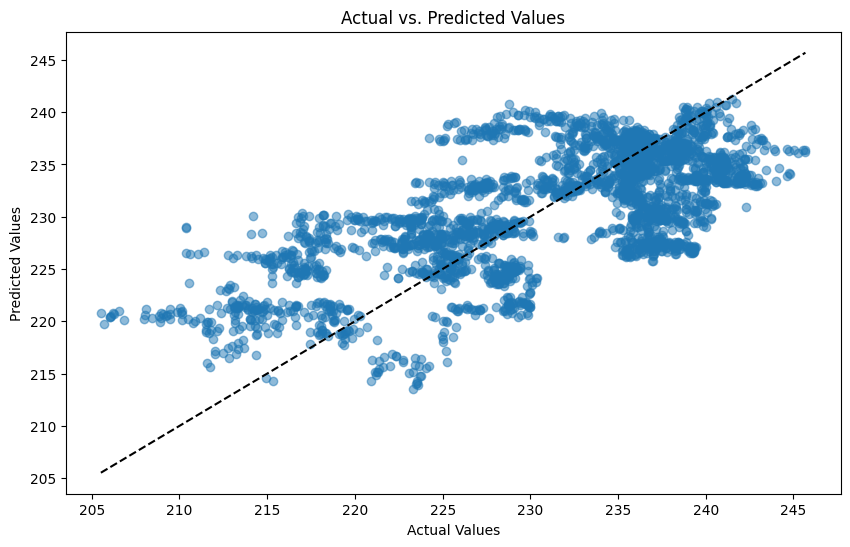

In [ ]:
# 結果を図示する
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
# lightGBMのハイパーパラメータを決める
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# ハイパーパラメータの候補
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [10, 20, -1],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# モデルのインスタンス
model = LGBMRegressor(random_state=42)

# GridSearchCVの設定
grid_search_lgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                          # クロスバリデーション分割数
    scoring='neg_mean_squared_error', # 評価指標（MSEの負値）
    n_jobs=-1,                     # 並列処理
    verbose=2                      # ログの出力レベル
)

# グリッドサーチの実行
grid_search_lgb.fit(X_train, y_train)

# 最適なパラメータとスコアの表示
print("Best Parameters:", grid_search_lgb.best_params_)
print("Best Negative MSE:", grid_search_lgb.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class CNNModel:
    def __init__(self, #input_shape,
                 num_filters=32, kernel_size=3, pool_size=2, dropout_rate=0.5, learning_rate=0.001,
                 time_steps = 3):
        """
        CNNモデルを初期化する
        Args:
            input_shape: 入力データの形状 (タイムステップ数, 特徴量数)
            num_filters: 畳み込みフィルタの数
            kernel_size: 畳み込みカーネルのサイズ
            pool_size: プーリング層のサイズ
            dropout_rate: ドロップアウト率
            learning_rate: 学習率
        """
        self.time_steps = time_steps

        self.model = Sequential()

        # 畳み込み層 + プーリング層
        self.model.add(Conv1D(
            filters=num_filters,
            kernel_size=kernel_size,
            activation='relu'#,
#            input_shape=input_shape
        ))
        self.model.add(MaxPooling1D(pool_size=pool_size))

        # Flatten層
        self.model.add(Flatten())

        # 全結合層
        self.model.add(Dense(64, activation='relu'))  # 隠れ層
        self.model.add(Dropout(dropout_rate))  # ドロップアウト

        # 出力層
        self.model.add(Dense(1, activation='linear'))  # 回帰タスク用

        # モデルのコンパイル
        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mse',  # 回帰タスクの場合
            metrics=['mse']
        )

    def create_sequences(self, X, y, time_steps):
    """
    特徴量データとターゲットデータを基にタイムステップ形式に変換する
    Args:
        X: 特徴量データ (2次元配列、形状: (サンプル数, 特徴量数))
        y: ターゲットデータ (1次元配列、形状: (サンプル数,))
        time_steps: 使用するタイムステップ数
    Returns:
        X_seq: タイムステップ形式の特徴量データ (サンプル数, タイムステップ数, 特徴量数)
        y_seq: 対応するターゲットデータ (サンプル数,)
    """
        X_seq, y_seq = [], []
        for i in range(len(X) - time_steps):
            X_seq.append(X[i:i + time_steps])  # 特徴量のタイムステップ分のスライス
            y_seq.append(y[i + time_steps])   # 対応するターゲット
        return np.array(X_seq), np.array(y_seq)

#    def create_sequences(self, data, time_steps):
        """
        時系列データをタイムステップを持つ形に変換する
        Args:
            data: 1次元配列またはリスト（時系列データ）
            time_steps: 使用するタイムステップ数
        Returns:
            numpy.ndarray: (サンプル数, タイムステップ数, 特徴量数)の形に変換されたデータ
        """
#        sequences = []
#        for i in range(len(data) - time_steps + 1):
#            sequences.append(data[i:i + time_steps])
#        return np.array(sequences).reshape(-1, time_steps, 1)  # 特徴量数は1（単変量時系列の場合）

    def fit(self, X, y, validation_data=None, epochs=100, batch_size=32):
        """
        モデルを訓練する
        Args:
            X: 訓練データ
            y: 訓練データのラベル
            validation_data: 検証データ (X_val, y_val)
            epochs: エポック数
            batch_size: バッチサイズ
        """
        # EarlyStoppingコールバック
        early_stopping = EarlyStopping(
            monitor='val_loss' if validation_data else 'loss',
            patience=10,
            restore_best_weights=True
        )

        # データにシーケンスをもたせる
        X_timestep,y_timestep = self.create_sequences(X, y, self.time_steps)
#        y_timestep = y[self.time_steps:]
        # モデルの訓練
        self.model.fit(
            X_timestep, y_timestep,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

    def predict(self, X):
        """
        モデルで予測を行う
        Args:
            X: 入力データ
        Returns:
            モデルの予測結果
        """
        return self.model.predict(X).ravel()


IndentationError: expected an indented block after function definition on line 51 (<ipython-input-34-c7010d26e19a>, line 52)